In [1]:
# !git clone https://github.com/analokmaus/kuma_utils.git
# # import sys
# # sys.path.append("kuma_utils/")



import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.impute import SimpleImputer,MissingIndicator, KNNImputer
from sklearn.model_selection import train_test_split, cross_validate,GridSearchCV,KFold,RepeatedStratifiedKFold,StratifiedKFold,StratifiedGroupKFold,cross_val_score,cross_val_predict,KFold
from sklearn.preprocessing import PowerTransformer,OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression,LassoCV
from sklearn.compose import make_column_transformer,make_column_selector,ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor,RandomForestClassifier,ExtraTreesRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as sk
from sklearn.impute import  KNNImputer
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb

import warnings; warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
#from kuma_utils.preprocessing.imputer import LGBMImputer 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
# import holidays
# import gc
#import reverse_geocoder as rg
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import SplineTransformer
from sklearn.preprocessing import PolynomialFeatures
import geopy
from geopy.distance import geodesic 
from sklearn.decomposition import PCA
#import gc
from feature_engine.datetime import DatetimeFeatures
from feature_engine.outliers import Winsorizer
#from category_encoders import OrdinalEncoder

from feature_engine.selection import SelectByShuffling,DropHighPSIFeatures,SelectByInformationValue
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import feature_engine
from sklearn.preprocessing import KBinsDiscretizer,LabelEncoder
from feature_engine.encoding import OrdinalEncoder,PRatioEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import RareLabelEncoder,DecisionTreeEncoder,WoEEncoder
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures
from feature_engine.selection import (RecursiveFeatureElimination, RecursiveFeatureAddition,
    DropConstantFeatures,
    DropDuplicateFeatures,
    SmartCorrelatedSelection,DropCorrelatedFeatures
)
from feature_engine.creation import MathFeatures,RelativeFeatures
#from scipy.stats import chi2_contingency
# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.encoding import StringSimilarityEncoder
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import MeanEncoder
from sklearn import metrics
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.cluster import KMeans
#from category_encoders import MEstimateEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import metrics as sk_metrics

from sklearn.ensemble import StackingRegressor,StackingClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor ,AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet, LassoLars, PassiveAggressiveRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score,f1_score,make_scorer
from catboost import CatBoostRegressor,CatBoostClassifier, metrics, Pool, cv
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',50)
#from nsepy import get_history
#from datetime import date
from sklearn.metrics import *

from scipy.stats import rankdata
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier

import optuna
from optuna.samplers import TPESampler
from optuna.samplers import TPESampler
from optuna.samplers import RandomSampler
from optuna.samplers import CmaEsSampler
from optuna.samplers import GridSampler
#from optuna.samplers import SuccessiveHalvingSampler
from optuna.samplers import RandomSampler
from optuna.samplers import TPESampler
from optuna.samplers import CmaEsSampler
from optuna.samplers import GridSampler
#from optuna.samplers import SuccessiveHalvingSampler
from optuna.pruners import MedianPruner
from optuna.integration import SkoptSampler
from optuna.integration import OptunaSearchCV
from catboost.utils import eval_metric
# from optuna import MedianStopper
# early_stopper = MedianStopper(n_startup_trials=5, n_warmup_steps=5)
n_train_iter = 100
sampler = TPESampler(seed=123)

In [2]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from keras import metrics
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, PReLU
from tensorflow.keras.callbacks import (
    CSVLogger,
    EarlyStopping,
    ModelCheckpoint,
)

In [388]:
train=pd.read_csv("train.csv")

test=pd.read_csv("test.csv")


id = test['id']
data=pd.concat((train,test)).reset_index(drop=True)


y=train['cltv']
data=data.drop(columns=['id','cltv'],axis=1)

train=data[:len(train)]
test=data[len(train):]
#train['target']=y

## EDA

In [353]:
train.isna().sum()

gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

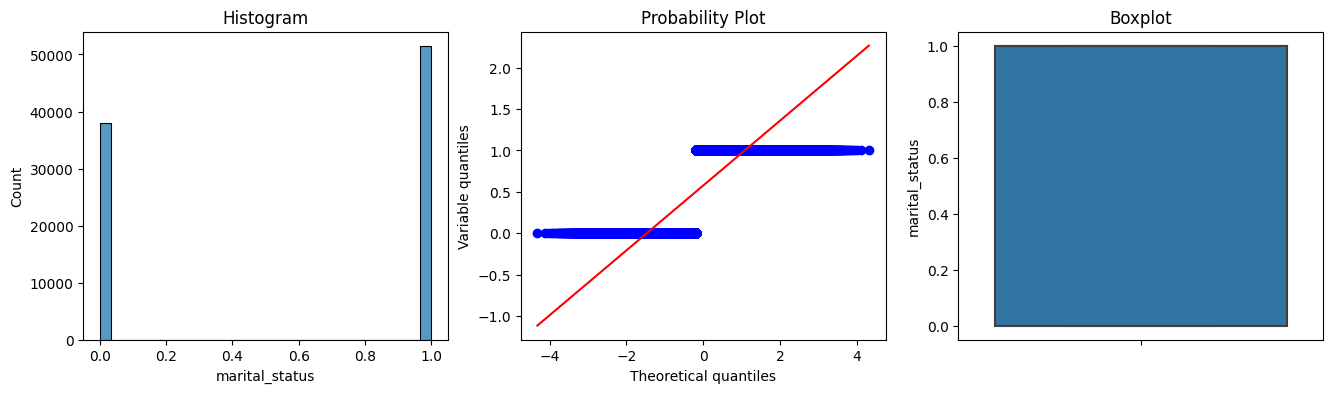

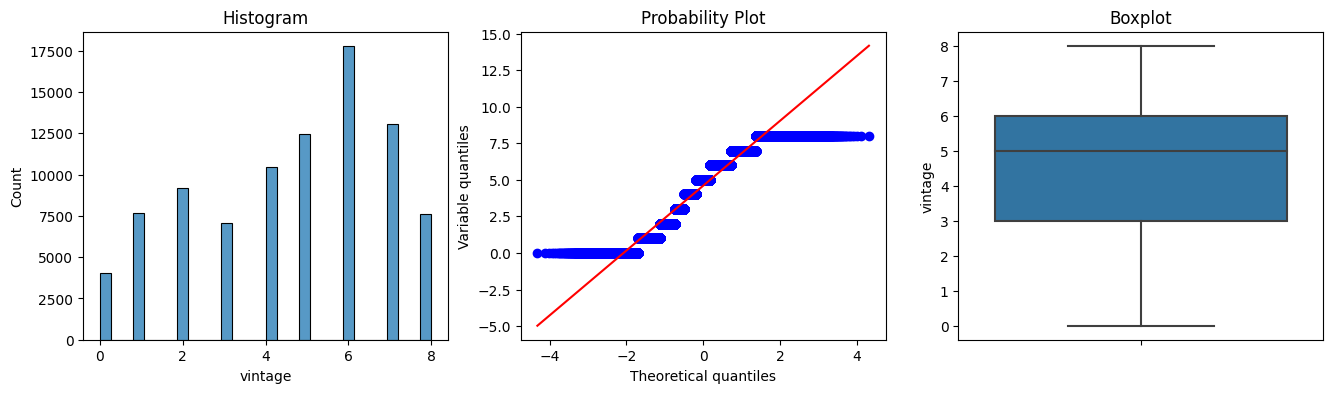

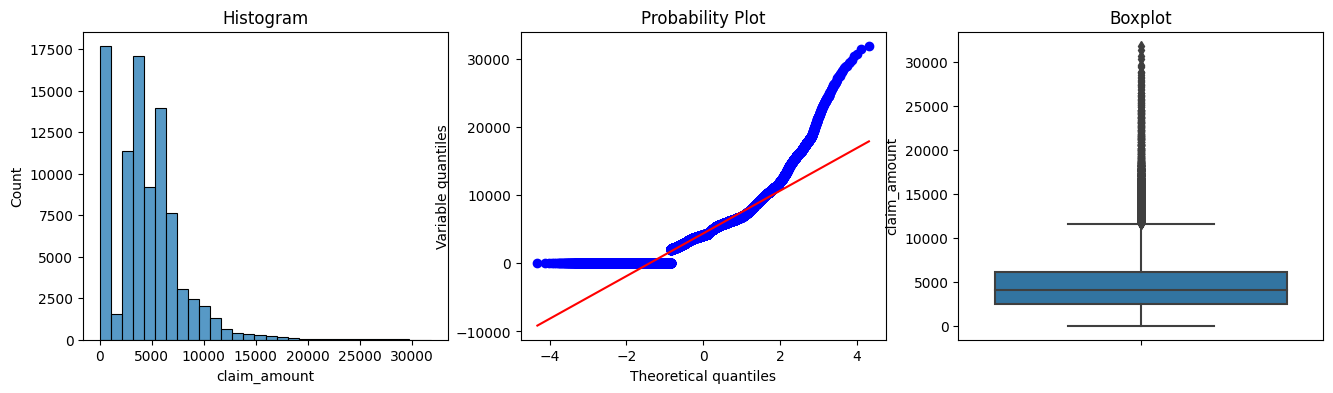

In [4]:
num_ft=train.select_dtypes(include=['int', 'float']).columns
def diagnostic_plots(df, variable):
        # function takes a dataframe (df) and
        # the variable of interest as arguments

        # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

for col in num_ft:
    diagnostic_plots(train,col)

<AxesSubplot: >

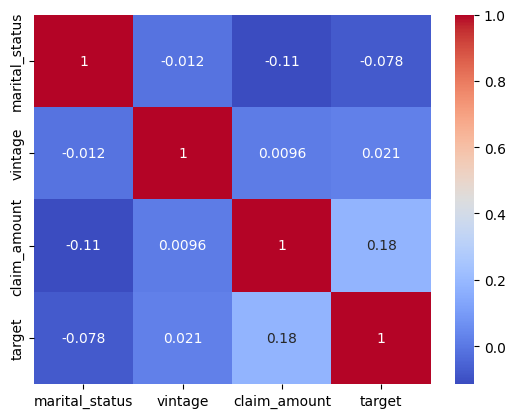

In [138]:
corr = train[num_ft].corr()

# Create the heatmap
sns.heatmap(corr, 
            annot=True, # Add the correlation coefficients to the heatmap
            cmap='coolwarm') 

In [62]:
for col in train.columns:
    print(train[col].value_counts())

Male      50497
Female    38895
Name: gender, dtype: int64
Urban    62455
Rural    26937
Name: area, dtype: int64
High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64
5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64
1    51444
0    37948
Name: marital_status, dtype: int64
6    17769
7    13095
5    12481
4    10471
2     9165
1     7671
8     7624
3     7085
0     4031
Name: vintage, dtype: int64
0        17671
4006        38
3912        33
3834        32
3833        32
         ...  
10979        1
12593        1
23063        1
21695        1
17143        1
Name: claim_amount, Length: 10889, dtype: int64
More than 1    60263
1              29129
Name: num_policies, dtype: int64
A    56644
B    24635
C     8113
Name: policy, dtype: int64
Platinum    47796
Silver      21010
Gold        20586
Name: type_of_policy, dtype: int64
3    47796
1    21010
2    20586
Name: cat_type_o

## Feature Engineering

In [328]:
def addFeatures(df):
    
    
    



#     df['type_of_policy']=df['type_of_policy'].apply(lambda x: 3 if x=='Platinum' else 2 if x=='Gold' else 1)
#     df['cat_claim_amount']=df['claim_amount'].apply(lambda x: 1 if x== 0  else 0)
  #  df['f_1']=df.groupby(['area',"qualification"])['claim_amount'].transform("mean")
    
  #  df['car_age_vintage']=df['vintage'].apply(lambda x: 60 if x>=5 else 50 if x>=4 else 40 if x>=3 else 30 if x>=2 else 20 if x>=1 else 1)

#     df['claim_amount_per_policy_type'] = np.where(
#     (df['area'] == 'Urban') & (df['vintage'] >= 10), 
#     3.55, 
#     np.where(
#         (df['area'] == 'Urban') & (df['vintage'] < 5), 
#         3.44, 
#         np.where(
#             (df['area'] == 'Urban') & (df['vintage'] < 5), 
#             3.28, 
#             np.where(
#                 (df['area'] == 'Rural') & (df['vintage'] >= 10), 
#                 3.43, 
#                 np.where(
#                     (df['area'] == 'Rural') & (df['vintage'] < 5), 
#                     3.35, 
#                     3.191
#                 )
#             )
#         )
#     )
# )

                                           

  
    return df

train,test=addFeatures(train),addFeatures(test)

In [389]:
train['combo_1']=train['qualification'].astype("str") +train['income'].astype("str")
train['combo_2']=train['num_policies'].astype("str") +train['policy'].astype("str") +train['type_of_policy'].astype("str")

test['combo_1']=test['qualification'].astype("str") +test['income'].astype("str")
test['combo_2']=test['num_policies'].astype("str") +test['policy'].astype("str") +test['type_of_policy'].astype("str")

In [390]:
# data=pd.concat((train,test)).reset_index(drop=True)


# cat_cols=test.select_dtypes(include=['object'])

# # for other categorical features, doing simple numeric representation of feature by identifying distinct values.
# for col in cat_cols:
#     data[col],_ = data[col].factorize()

data=pd.concat((train,test)).reset_index(drop=True)

data=pd.get_dummies(data)
    
train=data[:len(train)]
test=data[len(train):]



train=pd.get_dummies(train)
test=pd.get_dummies(test)

## Hyperparameter tunning

In [98]:
def objective(trial,train,y):
    
    param = {
       
       # "objective": trial.suggest_categorical("objective", ["Logloss"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
        
        
    cv = KFold(n_splits=5, shuffle=True, random_state=1121218)

    roc_auc = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(train, y)):
        X_train, X_test = train.iloc[train_idx], train.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        gbm = CatBoostRegressor(n_estimators=6000,**param)
    #    categorical_features_indices = np.where((train.dtypes == object).values.astype(int) == 1)[0]
        gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=500)

        preds = gbm.predict(X_test)
        r2[idx] = r2_score(y_test, preds)
    return np.mean(r2)

In [99]:
      
study = optuna.create_study(direction="maximize",pruner=optuna.pruners.HyperbandPruner(
        min_resource=1, max_resource=n_train_iter, reduction_factor=3))
func = lambda trial: objective(trial, train, y)
study.optimize(func, n_trials=500, timeout=1000)

print(f"\tBest value (r2): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-01-22 18:34:51,614] A new study created in memory with name: no-name-fca6beec-5b79-4c9f-ac73-fca5411d7712
[I 2023-01-22 18:36:49,155] Trial 0 finished with value: 0.15546301018190098 and parameters: {'colsample_bylevel': 0.09415804134813832, 'depth': 1, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 5.166694514432545}. Best is trial 0 with value: 0.15546301018190098.
[I 2023-01-22 18:38:19,333] Trial 1 finished with value: 0.16059065427300662 and parameters: {'colsample_bylevel': 0.03269596676120837, 'depth': 5, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 1.188822678332525}. Best is trial 1 with value: 0.16059065427300662.
[I 2023-01-22 18:39:46,024] Trial 2 finished with value: 0.16042014155150913 and parameters: {'colsample_bylevel': 0.024151698164063713, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.24960277747035947}. Best is trial 1 with value: 0.16059065427300662

	Best value (r2): 0.16089
	Best params:
		colsample_bylevel: 0.08159898595627349
		depth: 4
		boosting_type: Ordered
		bootstrap_type: MVS


In [41]:
from optuna.integration import LightGBMPruningCallback


def objective(trial, X, y):
    param_grid = {
      "boosting_type":  trial.suggest_categorical("boosting_type", ["gbdt",  "dart"]),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        'max_bin':trial.suggest_int("max_bin", 50, 800),
        
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(train, y)):
        X_train, X_test = train.iloc[train_idx], train.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgb.LGBMRegressor( **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            early_stopping_rounds=100,  # Add a pruning callback
        )
        preds = model.predict(X_test)
        cv_scores[idx] = r2_score(y_test, preds)

    return np.mean(cv_scores)

In [42]:
study = optuna.create_study(direction="maximize",pruner=optuna.pruners.HyperbandPruner(
        min_resource=1, max_resource=n_train_iter, reduction_factor=3))
func = lambda trial: objective(trial, train, y)
study.optimize(func, n_trials=100, timeout=600)

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    


[I 2023-01-20 23:17:56,403] A new study created in memory with name: no-name-80d8097e-8b35-4627-9aac-3a7c22c5b578


[1]	valid_0's l2: 7.98886e+09
[2]	valid_0's l2: 7.79008e+09
[3]	valid_0's l2: 7.63718e+09
[4]	valid_0's l2: 7.49592e+09
[5]	valid_0's l2: 7.46088e+09
[6]	valid_0's l2: 7.44638e+09
[7]	valid_0's l2: 7.34978e+09
[8]	valid_0's l2: 7.38942e+09
[9]	valid_0's l2: 7.30346e+09
[10]	valid_0's l2: 7.22713e+09
[11]	valid_0's l2: 7.17213e+09
[12]	valid_0's l2: 7.191e+09
[13]	valid_0's l2: 7.14103e+09
[14]	valid_0's l2: 7.09526e+09
[15]	valid_0's l2: 7.06345e+09
[16]	valid_0's l2: 7.03252e+09
[17]	valid_0's l2: 7.00701e+09
[18]	valid_0's l2: 6.9903e+09
[19]	valid_0's l2: 6.98649e+09
[20]	valid_0's l2: 6.9832e+09
[21]	valid_0's l2: 6.98525e+09
[22]	valid_0's l2: 6.97287e+09
[23]	valid_0's l2: 6.96551e+09
[24]	valid_0's l2: 6.96361e+09
[25]	valid_0's l2: 6.95705e+09
[26]	valid_0's l2: 6.94852e+09
[27]	valid_0's l2: 6.94541e+09
[28]	valid_0's l2: 6.94778e+09
[29]	valid_0's l2: 6.94459e+09
[30]	valid_0's l2: 6.94135e+09
[31]	valid_0's l2: 6.94398e+09
[32]	valid_0's l2: 6.94429e+09
[33]	valid_0's l2: 6.

[65]	valid_0's l2: 7.40876e+09
[66]	valid_0's l2: 7.33093e+09
[67]	valid_0's l2: 7.27215e+09
[68]	valid_0's l2: 7.22212e+09
[69]	valid_0's l2: 7.22493e+09
[70]	valid_0's l2: 7.22119e+09
[71]	valid_0's l2: 7.21958e+09
[72]	valid_0's l2: 7.17813e+09
[73]	valid_0's l2: 7.14341e+09
[74]	valid_0's l2: 7.14705e+09
[75]	valid_0's l2: 7.11969e+09
[76]	valid_0's l2: 7.12116e+09
[77]	valid_0's l2: 7.12438e+09
[78]	valid_0's l2: 7.13275e+09
[79]	valid_0's l2: 7.10756e+09
[80]	valid_0's l2: 7.09068e+09
[81]	valid_0's l2: 7.09833e+09
[82]	valid_0's l2: 7.07899e+09
[83]	valid_0's l2: 7.0857e+09
[84]	valid_0's l2: 7.0883e+09
[85]	valid_0's l2: 7.0967e+09
[86]	valid_0's l2: 7.07843e+09
[87]	valid_0's l2: 7.06713e+09
[88]	valid_0's l2: 7.0736e+09
[89]	valid_0's l2: 7.07606e+09
[90]	valid_0's l2: 7.08223e+09
[91]	valid_0's l2: 7.2814e+09
[92]	valid_0's l2: 7.23352e+09
[93]	valid_0's l2: 7.18888e+09
[94]	valid_0's l2: 7.20454e+09
[95]	valid_0's l2: 7.2089e+09
[96]	valid_0's l2: 7.21821e+09
[97]	valid_0's

[I 2023-01-20 23:17:59,732] Trial 0 finished with value: 0.1423562266863176 and parameters: {'boosting_type': 'dart', 'lambda_l1': 6.416164061355269, 'lambda_l2': 0.007787955189429413, 'num_leaves': 105, 'feature_fraction': 0.6505972333575538, 'bagging_fraction': 0.9136445046845714, 'bagging_freq': 6, 'min_child_samples': 68, 'max_bin': 274}. Best is trial 0 with value: 0.1423562266863176.


[96]	valid_0's l2: 7.24644e+09
[97]	valid_0's l2: 7.20494e+09
[98]	valid_0's l2: 7.21287e+09
[99]	valid_0's l2: 7.17734e+09
[100]	valid_0's l2: 7.14688e+09
[LightGBM] [Warning] feature_fraction is set=0.7715220823462707, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7715220823462707
[LightGBM] [Warning] lambda_l1 is set=1.7519183371139602, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7519183371139602
[LightGBM] [Warning] bagging_fraction is set=0.8083562609534328, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8083562609534328
[LightGBM] [Warning] lambda_l2 is set=1.0978066184521447, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0978066184521447
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[1]	valid_0's l2: 7.96583e+09
[2]	valid_0's l2: 7.77271e+09
[3]	valid_0's l2: 7.61467e+09
[4]	valid_0's l2: 7.48295e+09
[5]	valid_0's l2: 7.38084e+09
[6]	valid_0's l2: 

[11]	valid_0's l2: 7.19141e+09
[12]	valid_0's l2: 7.21079e+09
[13]	valid_0's l2: 7.16661e+09
[14]	valid_0's l2: 7.133e+09
[15]	valid_0's l2: 7.10553e+09
[16]	valid_0's l2: 7.08416e+09
[17]	valid_0's l2: 7.06744e+09
[18]	valid_0's l2: 7.05608e+09
[19]	valid_0's l2: 7.05258e+09
[20]	valid_0's l2: 7.04887e+09
[21]	valid_0's l2: 7.05716e+09
[22]	valid_0's l2: 7.04538e+09
[23]	valid_0's l2: 7.03487e+09
[24]	valid_0's l2: 7.03509e+09
[25]	valid_0's l2: 7.02627e+09
[26]	valid_0's l2: 7.02125e+09
[27]	valid_0's l2: 7.01768e+09
[28]	valid_0's l2: 7.01976e+09
[29]	valid_0's l2: 7.01918e+09
[30]	valid_0's l2: 7.01615e+09
[31]	valid_0's l2: 7.01703e+09
[32]	valid_0's l2: 7.01748e+09
[33]	valid_0's l2: 7.01923e+09
[34]	valid_0's l2: 7.02014e+09
[35]	valid_0's l2: 7.02131e+09
[36]	valid_0's l2: 7.02427e+09
[37]	valid_0's l2: 7.02263e+09
[38]	valid_0's l2: 7.02185e+09
[39]	valid_0's l2: 7.01908e+09
[40]	valid_0's l2: 7.0197e+09
[41]	valid_0's l2: 7.02043e+09
[42]	valid_0's l2: 7.02304e+09
[43]	valid_

[42]	valid_0's l2: 7.05533e+09
[43]	valid_0's l2: 7.05722e+09
[44]	valid_0's l2: 7.05608e+09
[45]	valid_0's l2: 7.05447e+09
[46]	valid_0's l2: 7.18901e+09
[47]	valid_0's l2: 7.16401e+09
[48]	valid_0's l2: 7.15537e+09
[49]	valid_0's l2: 7.15418e+09
[50]	valid_0's l2: 7.15814e+09
[51]	valid_0's l2: 7.1369e+09
[52]	valid_0's l2: 7.12491e+09
[53]	valid_0's l2: 7.13229e+09
[54]	valid_0's l2: 7.11957e+09
[55]	valid_0's l2: 7.1089e+09
[56]	valid_0's l2: 7.11265e+09
[57]	valid_0's l2: 7.10505e+09
[58]	valid_0's l2: 7.35725e+09
[59]	valid_0's l2: 7.36242e+09
[60]	valid_0's l2: 7.30805e+09
[61]	valid_0's l2: 7.67917e+09
[62]	valid_0's l2: 7.56437e+09
[63]	valid_0's l2: 7.47159e+09
[64]	valid_0's l2: 7.4613e+09
[65]	valid_0's l2: 7.46622e+09
[66]	valid_0's l2: 7.38991e+09
[67]	valid_0's l2: 7.33314e+09
[68]	valid_0's l2: 7.28323e+09
[69]	valid_0's l2: 7.285e+09
[70]	valid_0's l2: 7.28167e+09
[71]	valid_0's l2: 7.27727e+09
[72]	valid_0's l2: 7.2386e+09
[73]	valid_0's l2: 7.20872e+09
[74]	valid_0's

[I 2023-01-20 23:18:04,259] Trial 1 finished with value: 0.1371905645429259 and parameters: {'boosting_type': 'dart', 'lambda_l1': 1.7519183371139602, 'lambda_l2': 1.0978066184521447, 'num_leaves': 212, 'feature_fraction': 0.7715220823462707, 'bagging_fraction': 0.8083562609534328, 'bagging_freq': 2, 'min_child_samples': 53, 'max_bin': 494}. Best is trial 0 with value: 0.1423562266863176.


[95]	valid_0's l2: 7.26419e+09
[96]	valid_0's l2: 7.27224e+09
[97]	valid_0's l2: 7.2348e+09
[98]	valid_0's l2: 7.24066e+09
[99]	valid_0's l2: 7.20886e+09
[100]	valid_0's l2: 7.18483e+09
[LightGBM] [Warning] feature_fraction is set=0.8499321786555589, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8499321786555589
[LightGBM] [Warning] lambda_l1 is set=1.1877057298068705e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1877057298068705e-05
[LightGBM] [Warning] bagging_fraction is set=0.6751534466825067, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6751534466825067
[LightGBM] [Warning] lambda_l2 is set=1.6212363615464965e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6212363615464965e-08
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[1]	valid_0's l2: 7.96754e+09
[2]	valid_0's l2: 7.77678e+09
[3]	valid_0's l2: 7.62044e+09
[4]	valid_0's l2: 7.49095e+09
[5

[1]	valid_0's l2: 8.04344e+09
[2]	valid_0's l2: 7.85249e+09
[3]	valid_0's l2: 7.69047e+09
[4]	valid_0's l2: 7.55358e+09
[5]	valid_0's l2: 7.45346e+09
[6]	valid_0's l2: 7.43409e+09
[7]	valid_0's l2: 7.35298e+09
[8]	valid_0's l2: 7.38768e+09
[9]	valid_0's l2: 7.31416e+09
[10]	valid_0's l2: 7.25734e+09
[11]	valid_0's l2: 7.21018e+09
[12]	valid_0's l2: 7.22991e+09
[13]	valid_0's l2: 7.18983e+09
[14]	valid_0's l2: 7.15422e+09
[15]	valid_0's l2: 7.12479e+09
[16]	valid_0's l2: 7.10302e+09
[17]	valid_0's l2: 7.0864e+09
[18]	valid_0's l2: 7.07456e+09
[19]	valid_0's l2: 7.07359e+09
[20]	valid_0's l2: 7.06974e+09
[21]	valid_0's l2: 7.07781e+09
[22]	valid_0's l2: 7.06758e+09
[23]	valid_0's l2: 7.06191e+09
[24]	valid_0's l2: 7.064e+09
[25]	valid_0's l2: 7.05416e+09
[26]	valid_0's l2: 7.04992e+09
[27]	valid_0's l2: 7.04366e+09
[28]	valid_0's l2: 7.04542e+09
[29]	valid_0's l2: 7.0431e+09
[30]	valid_0's l2: 7.0391e+09
[31]	valid_0's l2: 7.03926e+09
[32]	valid_0's l2: 7.0397e+09
[33]	valid_0's l2: 7.03

[35]	valid_0's l2: 7.09108e+09
[36]	valid_0's l2: 7.09451e+09
[37]	valid_0's l2: 7.09372e+09
[38]	valid_0's l2: 7.09517e+09
[39]	valid_0's l2: 7.09229e+09
[40]	valid_0's l2: 7.09315e+09
[41]	valid_0's l2: 7.09223e+09
[42]	valid_0's l2: 7.09206e+09
[43]	valid_0's l2: 7.09229e+09
[44]	valid_0's l2: 7.09024e+09
[45]	valid_0's l2: 7.0913e+09
[46]	valid_0's l2: 7.22516e+09
[47]	valid_0's l2: 7.2045e+09
[48]	valid_0's l2: 7.19475e+09
[49]	valid_0's l2: 7.19208e+09
[50]	valid_0's l2: 7.19489e+09
[51]	valid_0's l2: 7.17461e+09
[52]	valid_0's l2: 7.16008e+09
[53]	valid_0's l2: 7.1653e+09
[54]	valid_0's l2: 7.15304e+09
[55]	valid_0's l2: 7.14216e+09
[56]	valid_0's l2: 7.14605e+09
[57]	valid_0's l2: 7.14111e+09
[58]	valid_0's l2: 7.39345e+09
[59]	valid_0's l2: 7.39735e+09
[60]	valid_0's l2: 7.34128e+09
[61]	valid_0's l2: 7.71347e+09
[62]	valid_0's l2: 7.59842e+09
[63]	valid_0's l2: 7.50878e+09
[64]	valid_0's l2: 7.49703e+09
[65]	valid_0's l2: 7.5008e+09
[66]	valid_0's l2: 7.42556e+09
[67]	valid_0

[I 2023-01-20 23:18:08,618] Trial 2 finished with value: 0.13306895065704097 and parameters: {'boosting_type': 'dart', 'lambda_l1': 1.1877057298068705e-05, 'lambda_l2': 1.6212363615464965e-08, 'num_leaves': 250, 'feature_fraction': 0.8499321786555589, 'bagging_fraction': 0.6751534466825067, 'bagging_freq': 6, 'min_child_samples': 15, 'max_bin': 406}. Best is trial 0 with value: 0.1423562266863176.


[88]	valid_0's l2: 7.17296e+09
[89]	valid_0's l2: 7.17344e+09
[90]	valid_0's l2: 7.17832e+09
[91]	valid_0's l2: 7.36862e+09
[92]	valid_0's l2: 7.31966e+09
[93]	valid_0's l2: 7.28346e+09
[94]	valid_0's l2: 7.29735e+09
[95]	valid_0's l2: 7.30019e+09
[96]	valid_0's l2: 7.3082e+09
[97]	valid_0's l2: 7.26776e+09
[98]	valid_0's l2: 7.27272e+09
[99]	valid_0's l2: 7.24367e+09
[100]	valid_0's l2: 7.22128e+09
[LightGBM] [Warning] feature_fraction is set=0.8994286657221574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8994286657221574
[LightGBM] [Warning] lambda_l1 is set=0.009016744108589535, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009016744108589535
[LightGBM] [Warning] bagging_fraction is set=0.7866437360978418, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7866437360978418
[LightGBM] [Warning] lambda_l2 is set=0.06043867281547015, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06043867281547015
[LightGBM] [Warning] ba

[17]	valid_0's l2: 7.0628e+09
[18]	valid_0's l2: 7.05012e+09
[19]	valid_0's l2: 7.04283e+09
[20]	valid_0's l2: 7.04191e+09
[21]	valid_0's l2: 7.04745e+09
[22]	valid_0's l2: 7.04031e+09
[23]	valid_0's l2: 7.03293e+09
[24]	valid_0's l2: 7.0339e+09
[25]	valid_0's l2: 7.02811e+09
[26]	valid_0's l2: 7.0257e+09
[27]	valid_0's l2: 7.02647e+09
[28]	valid_0's l2: 7.02809e+09
[29]	valid_0's l2: 7.02589e+09
[30]	valid_0's l2: 7.02611e+09
[31]	valid_0's l2: 7.02758e+09
[32]	valid_0's l2: 7.02919e+09
[33]	valid_0's l2: 7.02851e+09
[34]	valid_0's l2: 7.02759e+09
[35]	valid_0's l2: 7.02758e+09
[36]	valid_0's l2: 7.03128e+09
[37]	valid_0's l2: 7.03052e+09
[38]	valid_0's l2: 7.02932e+09
[39]	valid_0's l2: 7.03e+09
[40]	valid_0's l2: 7.03107e+09
[41]	valid_0's l2: 7.03229e+09
[42]	valid_0's l2: 7.03133e+09
[43]	valid_0's l2: 7.03153e+09
[44]	valid_0's l2: 7.03152e+09
[45]	valid_0's l2: 7.03238e+09
[46]	valid_0's l2: 7.17638e+09
[47]	valid_0's l2: 7.15228e+09
[48]	valid_0's l2: 7.14208e+09
[49]	valid_0's

[46]	valid_0's l2: 7.18794e+09
[47]	valid_0's l2: 7.16296e+09
[48]	valid_0's l2: 7.15409e+09
[49]	valid_0's l2: 7.15194e+09
[50]	valid_0's l2: 7.15552e+09
[51]	valid_0's l2: 7.13116e+09
[52]	valid_0's l2: 7.11674e+09
[53]	valid_0's l2: 7.12181e+09
[54]	valid_0's l2: 7.10998e+09
[55]	valid_0's l2: 7.09802e+09
[56]	valid_0's l2: 7.10095e+09
[57]	valid_0's l2: 7.09068e+09
[58]	valid_0's l2: 7.3429e+09
[59]	valid_0's l2: 7.34482e+09
[60]	valid_0's l2: 7.28659e+09
[61]	valid_0's l2: 7.65677e+09
[62]	valid_0's l2: 7.54004e+09
[63]	valid_0's l2: 7.44576e+09
[64]	valid_0's l2: 7.43355e+09
[65]	valid_0's l2: 7.43834e+09
[66]	valid_0's l2: 7.36523e+09
[67]	valid_0's l2: 7.30837e+09
[68]	valid_0's l2: 7.26248e+09
[69]	valid_0's l2: 7.26311e+09
[70]	valid_0's l2: 7.25926e+09
[71]	valid_0's l2: 7.25307e+09
[72]	valid_0's l2: 7.21716e+09
[73]	valid_0's l2: 7.18725e+09
[74]	valid_0's l2: 7.1909e+09
[75]	valid_0's l2: 7.16388e+09
[76]	valid_0's l2: 7.16528e+09
[77]	valid_0's l2: 7.16825e+09
[78]	valid

[I 2023-01-20 23:18:13,286] Trial 3 finished with value: 0.13691660138815717 and parameters: {'boosting_type': 'dart', 'lambda_l1': 0.009016744108589535, 'lambda_l2': 0.06043867281547015, 'num_leaves': 209, 'feature_fraction': 0.8994286657221574, 'bagging_fraction': 0.7866437360978418, 'bagging_freq': 4, 'min_child_samples': 89, 'max_bin': 128}. Best is trial 0 with value: 0.1423562266863176.


[96]	valid_0's l2: 7.25892e+09
[97]	valid_0's l2: 7.22533e+09
[98]	valid_0's l2: 7.23102e+09
[99]	valid_0's l2: 7.20217e+09
[100]	valid_0's l2: 7.17658e+09
[LightGBM] [Warning] feature_fraction is set=0.6423729739226882, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6423729739226882
[LightGBM] [Warning] lambda_l1 is set=1.0037361253510803e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0037361253510803e-05
[LightGBM] [Warning] bagging_fraction is set=0.9060638997411676, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9060638997411676
[LightGBM] [Warning] lambda_l2 is set=0.004385864971749845, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004385864971749845
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's l2: 8.18658e+09
[2]	valid_0's l2: 7.95175e+09
[3]	valid_0's l2: 7.77063e+09
[4]	valid_0's l2: 7.617e+09
[5]	valid_0's l2: 7.57558e+09
[6]	vali

[10]	valid_0's l2: 7.4581e+09
[11]	valid_0's l2: 7.37028e+09
[12]	valid_0's l2: 7.35669e+09
[13]	valid_0's l2: 7.28742e+09
[14]	valid_0's l2: 7.27603e+09
[15]	valid_0's l2: 7.27053e+09
[16]	valid_0's l2: 7.21055e+09
[17]	valid_0's l2: 7.20403e+09
[18]	valid_0's l2: 7.15787e+09
[19]	valid_0's l2: 7.15513e+09
[20]	valid_0's l2: 7.15175e+09
[21]	valid_0's l2: 7.14839e+09
[22]	valid_0's l2: 7.14614e+09
[23]	valid_0's l2: 7.11235e+09
[24]	valid_0's l2: 7.11192e+09
[25]	valid_0's l2: 7.08462e+09
[26]	valid_0's l2: 7.0604e+09
[27]	valid_0's l2: 7.04331e+09
[28]	valid_0's l2: 7.02753e+09
[29]	valid_0's l2: 7.02676e+09
[30]	valid_0's l2: 7.01453e+09
[31]	valid_0's l2: 7.0147e+09
[32]	valid_0's l2: 7.01498e+09
[33]	valid_0's l2: 7.01491e+09
[34]	valid_0's l2: 7.00433e+09
[35]	valid_0's l2: 7.00379e+09
[36]	valid_0's l2: 7.00412e+09
[37]	valid_0's l2: 6.99531e+09
[38]	valid_0's l2: 6.99491e+09
[39]	valid_0's l2: 6.98812e+09
[40]	valid_0's l2: 6.9833e+09
[41]	valid_0's l2: 6.97967e+09
[42]	valid_0

[I 2023-01-20 23:18:15,160] Trial 4 finished with value: 0.15827966223759743 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 1.0037361253510803e-05, 'lambda_l2': 0.004385864971749845, 'num_leaves': 45, 'feature_fraction': 0.6423729739226882, 'bagging_fraction': 0.9060638997411676, 'bagging_freq': 1, 'min_child_samples': 44, 'max_bin': 480}. Best is trial 4 with value: 0.15827966223759743.


[76]	valid_0's l2: 7.01489e+09
[77]	valid_0's l2: 7.01453e+09
[78]	valid_0's l2: 7.01553e+09
[79]	valid_0's l2: 7.01621e+09
[80]	valid_0's l2: 7.01719e+09
[81]	valid_0's l2: 7.01778e+09
[82]	valid_0's l2: 7.01802e+09
[83]	valid_0's l2: 7.01886e+09
[84]	valid_0's l2: 7.01837e+09
[85]	valid_0's l2: 7.01818e+09
[86]	valid_0's l2: 7.01918e+09
[87]	valid_0's l2: 7.01939e+09
[88]	valid_0's l2: 7.01965e+09
[89]	valid_0's l2: 7.02006e+09
[90]	valid_0's l2: 7.02059e+09
[91]	valid_0's l2: 7.01998e+09
[92]	valid_0's l2: 7.02038e+09
[93]	valid_0's l2: 7.02088e+09
[94]	valid_0's l2: 7.02107e+09
[95]	valid_0's l2: 7.02031e+09
[96]	valid_0's l2: 7.02061e+09
[97]	valid_0's l2: 7.02041e+09
[98]	valid_0's l2: 7.02101e+09
[99]	valid_0's l2: 7.02192e+09
[100]	valid_0's l2: 7.02185e+09
[LightGBM] [Warning] feature_fraction is set=0.8232616094540788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8232616094540788
[LightGBM] [Warning] lambda_l1 is set=0.21104109647799071, reg_alpha=0

[LightGBM] [Warning] feature_fraction is set=0.8232616094540788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8232616094540788
[LightGBM] [Warning] lambda_l1 is set=0.21104109647799071, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21104109647799071
[LightGBM] [Warning] bagging_fraction is set=0.6368900957178705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6368900957178705
[LightGBM] [Warning] lambda_l2 is set=0.00020072633629936615, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00020072633629936615
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[1]	valid_0's l2: 8.08483e+09
[2]	valid_0's l2: 7.91847e+09
[3]	valid_0's l2: 7.78534e+09
[4]	valid_0's l2: 7.67718e+09
[5]	valid_0's l2: 7.58835e+09
[6]	valid_0's l2: 7.56688e+09
[7]	valid_0's l2: 7.49535e+09
[8]	valid_0's l2: 7.47162e+09
[9]	valid_0's l2: 7.41357e+09
[10]	valid_0's l2: 7.36652e+09
[11]	valid_0'

[I 2023-01-20 23:18:16,242] Trial 5 finished with value: 0.15225075798528126 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.21104109647799071, 'lambda_l2': 0.00020072633629936615, 'num_leaves': 2, 'feature_fraction': 0.8232616094540788, 'bagging_fraction': 0.6368900957178705, 'bagging_freq': 2, 'min_child_samples': 63, 'max_bin': 335}. Best is trial 4 with value: 0.15827966223759743.


[LightGBM] [Warning] feature_fraction is set=0.8232616094540788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8232616094540788
[LightGBM] [Warning] lambda_l1 is set=0.21104109647799071, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21104109647799071
[LightGBM] [Warning] bagging_fraction is set=0.6368900957178705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6368900957178705
[LightGBM] [Warning] lambda_l2 is set=0.00020072633629936615, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00020072633629936615
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[1]	valid_0's l2: 8.1586e+09
[2]	valid_0's l2: 7.99255e+09
[3]	valid_0's l2: 7.85667e+09
[4]	valid_0's l2: 7.74641e+09
[5]	valid_0's l2: 7.65708e+09
[6]	valid_0's l2: 7.63632e+09
[7]	valid_0's l2: 7.56618e+09
[8]	valid_0's l2: 7.5397e+09
[9]	valid_0's l2: 7.48272e+09
[10]	valid_0's l2: 7.4364e+09
[11]	valid_0's l

[18]	valid_0's l2: 6.80977e+09
[19]	valid_0's l2: 6.80479e+09
[20]	valid_0's l2: 6.80069e+09
[21]	valid_0's l2: 6.80229e+09
[22]	valid_0's l2: 6.79171e+09
[23]	valid_0's l2: 6.78138e+09
[24]	valid_0's l2: 6.78216e+09
[25]	valid_0's l2: 6.77653e+09
[26]	valid_0's l2: 6.77226e+09
[27]	valid_0's l2: 6.77057e+09
[28]	valid_0's l2: 6.77248e+09
[29]	valid_0's l2: 6.77144e+09
[30]	valid_0's l2: 6.76847e+09
[31]	valid_0's l2: 6.7684e+09
[32]	valid_0's l2: 6.76925e+09
[33]	valid_0's l2: 6.76668e+09
[34]	valid_0's l2: 6.76534e+09
[35]	valid_0's l2: 6.76696e+09
[36]	valid_0's l2: 6.77171e+09
[37]	valid_0's l2: 6.7692e+09
[38]	valid_0's l2: 6.76874e+09
[39]	valid_0's l2: 6.76651e+09
[40]	valid_0's l2: 6.76675e+09
[41]	valid_0's l2: 6.76675e+09
[42]	valid_0's l2: 6.76671e+09
[43]	valid_0's l2: 6.76782e+09
[44]	valid_0's l2: 6.76642e+09
[45]	valid_0's l2: 6.76361e+09
[46]	valid_0's l2: 6.87973e+09
[47]	valid_0's l2: 6.85632e+09
[48]	valid_0's l2: 6.84854e+09
[49]	valid_0's l2: 6.8451e+09
[50]	valid_

[41]	valid_0's l2: 6.9414e+09
[42]	valid_0's l2: 6.94299e+09
[43]	valid_0's l2: 6.94429e+09
[44]	valid_0's l2: 6.94347e+09
[45]	valid_0's l2: 6.94195e+09
[46]	valid_0's l2: 7.06005e+09
[47]	valid_0's l2: 7.03586e+09
[48]	valid_0's l2: 7.02724e+09
[49]	valid_0's l2: 7.02589e+09
[50]	valid_0's l2: 7.03069e+09
[51]	valid_0's l2: 7.0115e+09
[52]	valid_0's l2: 6.998e+09
[53]	valid_0's l2: 7.00576e+09
[54]	valid_0's l2: 6.99517e+09
[55]	valid_0's l2: 6.98334e+09
[56]	valid_0's l2: 6.98693e+09
[57]	valid_0's l2: 6.97971e+09
[58]	valid_0's l2: 7.21469e+09
[59]	valid_0's l2: 7.21845e+09
[60]	valid_0's l2: 7.16456e+09
[61]	valid_0's l2: 7.52271e+09
[62]	valid_0's l2: 7.4105e+09
[63]	valid_0's l2: 7.31949e+09
[64]	valid_0's l2: 7.3083e+09
[65]	valid_0's l2: 7.31262e+09
[66]	valid_0's l2: 7.24078e+09
[67]	valid_0's l2: 7.18768e+09
[68]	valid_0's l2: 7.14156e+09
[69]	valid_0's l2: 7.14328e+09
[70]	valid_0's l2: 7.13968e+09
[71]	valid_0's l2: 7.13801e+09
[72]	valid_0's l2: 7.10328e+09
[73]	valid_0's

[I 2023-01-20 23:18:20,686] Trial 6 finished with value: 0.13769990672587823 and parameters: {'boosting_type': 'dart', 'lambda_l1': 0.0034509269822180005, 'lambda_l2': 0.0009566533923768188, 'num_leaves': 193, 'feature_fraction': 0.710617832097735, 'bagging_fraction': 0.531929857894794, 'bagging_freq': 6, 'min_child_samples': 73, 'max_bin': 601}. Best is trial 4 with value: 0.15827966223759743.


[95]	valid_0's l2: 7.27215e+09
[96]	valid_0's l2: 7.28123e+09
[97]	valid_0's l2: 7.24222e+09
[98]	valid_0's l2: 7.24957e+09
[99]	valid_0's l2: 7.21515e+09
[100]	valid_0's l2: 7.19157e+09
[LightGBM] [Warning] feature_fraction is set=0.8947077180561518, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8947077180561518
[LightGBM] [Warning] lambda_l1 is set=3.77162134394519e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.77162134394519e-07
[LightGBM] [Warning] bagging_fraction is set=0.6971743212358856, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6971743212358856
[LightGBM] [Warning] lambda_l2 is set=1.1319381275241855e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1319381275241855e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's l2: 7.96716e+09
[2]	valid_0's l2: 7.76875e+09
[3]	valid_0's l2: 7.60452e+09
[4]	valid_0's l2: 7.47939e+09
[5]	v

[38]	valid_0's l2: 7.06781e+09
[39]	valid_0's l2: 7.07375e+09
[40]	valid_0's l2: 7.07712e+09
[41]	valid_0's l2: 7.08099e+09
[42]	valid_0's l2: 7.08039e+09
[43]	valid_0's l2: 7.08066e+09
[44]	valid_0's l2: 7.08179e+09
[45]	valid_0's l2: 7.08791e+09
[46]	valid_0's l2: 7.09277e+09
[47]	valid_0's l2: 7.09363e+09
[48]	valid_0's l2: 7.09829e+09
[49]	valid_0's l2: 7.10302e+09
[50]	valid_0's l2: 7.1061e+09
[51]	valid_0's l2: 7.10833e+09
[52]	valid_0's l2: 7.11434e+09
[53]	valid_0's l2: 7.11722e+09
[54]	valid_0's l2: 7.11894e+09
[55]	valid_0's l2: 7.1199e+09
[56]	valid_0's l2: 7.12359e+09
[57]	valid_0's l2: 7.12949e+09
[58]	valid_0's l2: 7.13179e+09
[59]	valid_0's l2: 7.13765e+09
[60]	valid_0's l2: 7.13904e+09
[61]	valid_0's l2: 7.14116e+09
[62]	valid_0's l2: 7.14793e+09
[63]	valid_0's l2: 7.15024e+09
[64]	valid_0's l2: 7.15274e+09
[65]	valid_0's l2: 7.15934e+09
[66]	valid_0's l2: 7.15983e+09
[67]	valid_0's l2: 7.16194e+09
[68]	valid_0's l2: 7.16435e+09
[69]	valid_0's l2: 7.16875e+09
[70]	valid

[62]	valid_0's l2: 7.16165e+09
[63]	valid_0's l2: 7.16581e+09
[64]	valid_0's l2: 7.16773e+09
[65]	valid_0's l2: 7.17272e+09
[66]	valid_0's l2: 7.17834e+09
[67]	valid_0's l2: 7.18308e+09
[68]	valid_0's l2: 7.184e+09
[69]	valid_0's l2: 7.18595e+09
[70]	valid_0's l2: 7.18856e+09
[71]	valid_0's l2: 7.19192e+09
[72]	valid_0's l2: 7.19461e+09
[73]	valid_0's l2: 7.19715e+09
[74]	valid_0's l2: 7.2016e+09
[75]	valid_0's l2: 7.20419e+09
[76]	valid_0's l2: 7.2069e+09
[77]	valid_0's l2: 7.2099e+09
[78]	valid_0's l2: 7.21248e+09
[79]	valid_0's l2: 7.21395e+09
[80]	valid_0's l2: 7.21803e+09
[81]	valid_0's l2: 7.22024e+09
[82]	valid_0's l2: 7.2209e+09
[83]	valid_0's l2: 7.22092e+09
[84]	valid_0's l2: 7.2224e+09
[85]	valid_0's l2: 7.22737e+09
[86]	valid_0's l2: 7.2303e+09
[87]	valid_0's l2: 7.22926e+09
[88]	valid_0's l2: 7.23107e+09
[89]	valid_0's l2: 7.23232e+09
[90]	valid_0's l2: 7.23376e+09
[91]	valid_0's l2: 7.23784e+09
[92]	valid_0's l2: 7.24201e+09
[93]	valid_0's l2: 7.24466e+09
[94]	valid_0's l

[I 2023-01-20 23:18:23,529] Trial 7 finished with value: 0.15079475311090768 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 3.77162134394519e-07, 'lambda_l2': 1.1319381275241855e-08, 'num_leaves': 231, 'feature_fraction': 0.8947077180561518, 'bagging_fraction': 0.6971743212358856, 'bagging_freq': 1, 'min_child_samples': 12, 'max_bin': 381}. Best is trial 4 with value: 0.15827966223759743.


[LightGBM] [Warning] feature_fraction is set=0.632706849358085, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.632706849358085
[LightGBM] [Warning] lambda_l1 is set=0.0015586698962496341, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015586698962496341
[LightGBM] [Warning] bagging_fraction is set=0.4313620891323703, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4313620891323703
[LightGBM] [Warning] lambda_l2 is set=1.398136154437827e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.398136154437827e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	valid_0's l2: 8.18596e+09
[2]	valid_0's l2: 7.95542e+09
[3]	valid_0's l2: 7.77745e+09
[4]	valid_0's l2: 7.62488e+09
[5]	valid_0's l2: 7.58757e+09
[6]	valid_0's l2: 7.57369e+09
[7]	valid_0's l2: 7.46191e+09
[8]	valid_0's l2: 7.43563e+09
[9]	valid_0's l2: 7.42213e+09
[10]	valid_0's l2: 7.4003e+09
[11]	valid_0's

[55]	valid_0's l2: 7.0439e+09
[56]	valid_0's l2: 7.04461e+09
[57]	valid_0's l2: 7.0444e+09
[58]	valid_0's l2: 7.04506e+09
[59]	valid_0's l2: 7.04511e+09
[60]	valid_0's l2: 7.04652e+09
[61]	valid_0's l2: 7.04684e+09
[62]	valid_0's l2: 7.05085e+09
[63]	valid_0's l2: 7.04999e+09
[64]	valid_0's l2: 7.05177e+09
[65]	valid_0's l2: 7.05262e+09
[66]	valid_0's l2: 7.05371e+09
[67]	valid_0's l2: 7.05635e+09
[68]	valid_0's l2: 7.05702e+09
[69]	valid_0's l2: 7.0574e+09
[70]	valid_0's l2: 7.05908e+09
[71]	valid_0's l2: 7.06079e+09
[72]	valid_0's l2: 7.06004e+09
[73]	valid_0's l2: 7.06409e+09
[74]	valid_0's l2: 7.06634e+09
[75]	valid_0's l2: 7.06688e+09
[76]	valid_0's l2: 7.06723e+09
[77]	valid_0's l2: 7.06704e+09
[78]	valid_0's l2: 7.06701e+09
[79]	valid_0's l2: 7.06905e+09
[80]	valid_0's l2: 7.07032e+09
[81]	valid_0's l2: 7.07285e+09
[82]	valid_0's l2: 7.07294e+09
[83]	valid_0's l2: 7.07329e+09
[84]	valid_0's l2: 7.07559e+09
[85]	valid_0's l2: 7.07511e+09
[86]	valid_0's l2: 7.07729e+09
[87]	valid_

[I 2023-01-20 23:18:26,204] Trial 8 finished with value: 0.15210049588329388 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.0015586698962496341, 'lambda_l2': 1.398136154437827e-07, 'num_leaves': 153, 'feature_fraction': 0.632706849358085, 'bagging_fraction': 0.4313620891323703, 'bagging_freq': 7, 'min_child_samples': 65, 'max_bin': 193}. Best is trial 4 with value: 0.15827966223759743.


[100]	valid_0's l2: 7.1329e+09
[LightGBM] [Warning] feature_fraction is set=0.8088218810575218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8088218810575218
[LightGBM] [Warning] lambda_l1 is set=9.412468585026439e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.412468585026439e-08
[LightGBM] [Warning] bagging_fraction is set=0.9809746188030187, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9809746188030187
[LightGBM] [Warning] lambda_l2 is set=5.806059314958489e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.806059314958489e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[1]	valid_0's l2: 7.97357e+09
[2]	valid_0's l2: 7.78316e+09
[3]	valid_0's l2: 7.62925e+09
[4]	valid_0's l2: 7.49908e+09
[5]	valid_0's l2: 7.39527e+09
[6]	valid_0's l2: 7.37674e+09
[7]	valid_0's l2: 7.29418e+09
[8]	valid_0's l2: 7.33094e+09
[9]	valid_0's l2: 7.25804e+09
[10]	valid_

[96]	valid_0's l2: 7.19087e+09
[97]	valid_0's l2: 7.1498e+09
[98]	valid_0's l2: 7.15694e+09
[99]	valid_0's l2: 7.12185e+09
[100]	valid_0's l2: 7.0932e+09
[LightGBM] [Warning] feature_fraction is set=0.8088218810575218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8088218810575218
[LightGBM] [Warning] lambda_l1 is set=9.412468585026439e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.412468585026439e-08
[LightGBM] [Warning] bagging_fraction is set=0.9809746188030187, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9809746188030187
[LightGBM] [Warning] lambda_l2 is set=5.806059314958489e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.806059314958489e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[1]	valid_0's l2: 7.96031e+09
[2]	valid_0's l2: 7.77123e+09
[3]	valid_0's l2: 7.61953e+09
[4]	valid_0's l2: 7.49209e+09
[5]	valid_0's l2: 7.38958e+09
[6]	vali

[I 2023-01-20 23:18:27,863] Trial 9 finished with value: 0.14576843572799703 and parameters: {'boosting_type': 'dart', 'lambda_l1': 9.412468585026439e-08, 'lambda_l2': 5.806059314958489e-08, 'num_leaves': 6, 'feature_fraction': 0.8088218810575218, 'bagging_fraction': 0.9809746188030187, 'bagging_freq': 4, 'min_child_samples': 75, 'max_bin': 83}. Best is trial 4 with value: 0.15827966223759743.


[84]	valid_0's l2: 7.10407e+09
[85]	valid_0's l2: 7.11354e+09
[86]	valid_0's l2: 7.09381e+09
[87]	valid_0's l2: 7.07782e+09
[88]	valid_0's l2: 7.08581e+09
[89]	valid_0's l2: 7.08851e+09
[90]	valid_0's l2: 7.09604e+09
[91]	valid_0's l2: 7.28898e+09
[92]	valid_0's l2: 7.23704e+09
[93]	valid_0's l2: 7.1937e+09
[94]	valid_0's l2: 7.21014e+09
[95]	valid_0's l2: 7.21501e+09
[96]	valid_0's l2: 7.22477e+09
[97]	valid_0's l2: 7.18399e+09
[98]	valid_0's l2: 7.19194e+09
[99]	valid_0's l2: 7.15745e+09
[100]	valid_0's l2: 7.12851e+09
[LightGBM] [Warning] feature_fraction is set=0.4465922573550597, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4465922573550597
[LightGBM] [Warning] lambda_l1 is set=2.801627643366673e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.801627643366673e-05
[LightGBM] [Warning] bagging_fraction is set=0.8685306686637255, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8685306686637255
[LightGBM] [Warning] lambda_l2 is

[77]	valid_0's l2: 6.9926e+09
[78]	valid_0's l2: 6.99299e+09
[79]	valid_0's l2: 6.99325e+09
[80]	valid_0's l2: 6.99336e+09
[81]	valid_0's l2: 6.99344e+09
[82]	valid_0's l2: 6.99403e+09
[83]	valid_0's l2: 6.994e+09
[84]	valid_0's l2: 6.99504e+09
[85]	valid_0's l2: 6.99674e+09
[86]	valid_0's l2: 6.99786e+09
[87]	valid_0's l2: 6.99811e+09
[88]	valid_0's l2: 6.99846e+09
[89]	valid_0's l2: 6.99944e+09
[90]	valid_0's l2: 6.99825e+09
[91]	valid_0's l2: 6.99812e+09
[92]	valid_0's l2: 6.99888e+09
[93]	valid_0's l2: 6.99878e+09
[94]	valid_0's l2: 6.99873e+09
[95]	valid_0's l2: 6.9988e+09
[96]	valid_0's l2: 6.99868e+09
[97]	valid_0's l2: 7.00134e+09
[98]	valid_0's l2: 7.00221e+09
[99]	valid_0's l2: 7.00361e+09
[100]	valid_0's l2: 7.00239e+09
[LightGBM] [Warning] feature_fraction is set=0.4465922573550597, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4465922573550597
[LightGBM] [Warning] lambda_l1 is set=2.801627643366673e-05, reg_alpha=0.0 will be ignored. Current value

[I 2023-01-20 23:18:29,663] Trial 10 finished with value: 0.1565397994815207 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 2.801627643366673e-05, 'lambda_l2': 3.202982415588416e-05, 'num_leaves': 67, 'feature_fraction': 0.4465922573550597, 'bagging_fraction': 0.8685306686637255, 'bagging_freq': 1, 'min_child_samples': 31, 'max_bin': 789}. Best is trial 4 with value: 0.15827966223759743.


[14]	valid_0's l2: 7.59239e+09
[15]	valid_0's l2: 7.58882e+09
[16]	valid_0's l2: 7.5797e+09
[17]	valid_0's l2: 7.48505e+09
[18]	valid_0's l2: 7.40707e+09
[19]	valid_0's l2: 7.33404e+09
[20]	valid_0's l2: 7.28293e+09
[21]	valid_0's l2: 7.24027e+09
[22]	valid_0's l2: 7.23593e+09
[23]	valid_0's l2: 7.23457e+09
[24]	valid_0's l2: 7.20102e+09
[25]	valid_0's l2: 7.19828e+09
[26]	valid_0's l2: 7.19693e+09
[27]	valid_0's l2: 7.19546e+09
[28]	valid_0's l2: 7.19399e+09
[29]	valid_0's l2: 7.19239e+09
[30]	valid_0's l2: 7.19033e+09
[31]	valid_0's l2: 7.16026e+09
[32]	valid_0's l2: 7.16108e+09
[33]	valid_0's l2: 7.13589e+09
[34]	valid_0's l2: 7.13438e+09
[35]	valid_0's l2: 7.13368e+09
[36]	valid_0's l2: 7.1339e+09
[37]	valid_0's l2: 7.13161e+09
[38]	valid_0's l2: 7.13134e+09
[39]	valid_0's l2: 7.11318e+09
[40]	valid_0's l2: 7.11298e+09
[41]	valid_0's l2: 7.09893e+09
[42]	valid_0's l2: 7.0851e+09
[43]	valid_0's l2: 7.08501e+09
[44]	valid_0's l2: 7.07212e+09
[45]	valid_0's l2: 7.06395e+09
[46]	valid_

[43]	valid_0's l2: 6.77809e+09
[44]	valid_0's l2: 6.76848e+09
[45]	valid_0's l2: 6.76222e+09
[46]	valid_0's l2: 6.76393e+09
[47]	valid_0's l2: 6.75967e+09
[48]	valid_0's l2: 6.75508e+09
[49]	valid_0's l2: 6.75511e+09
[50]	valid_0's l2: 6.75473e+09
[51]	valid_0's l2: 6.75191e+09
[52]	valid_0's l2: 6.75148e+09
[53]	valid_0's l2: 6.74865e+09
[54]	valid_0's l2: 6.74904e+09
[55]	valid_0's l2: 6.74951e+09
[56]	valid_0's l2: 6.75034e+09
[57]	valid_0's l2: 6.75065e+09
[58]	valid_0's l2: 6.75055e+09
[59]	valid_0's l2: 6.74808e+09
[60]	valid_0's l2: 6.74677e+09
[61]	valid_0's l2: 6.74839e+09
[62]	valid_0's l2: 6.74764e+09
[63]	valid_0's l2: 6.7474e+09
[64]	valid_0's l2: 6.74776e+09
[65]	valid_0's l2: 6.74574e+09
[66]	valid_0's l2: 6.74403e+09
[67]	valid_0's l2: 6.74502e+09
[68]	valid_0's l2: 6.7431e+09
[69]	valid_0's l2: 6.74355e+09
[70]	valid_0's l2: 6.7433e+09
[71]	valid_0's l2: 6.74317e+09
[72]	valid_0's l2: 6.74321e+09
[73]	valid_0's l2: 6.74293e+09
[74]	valid_0's l2: 6.74317e+09
[75]	valid_

[100]	valid_0's l2: 6.91716e+09
[LightGBM] [Warning] feature_fraction is set=0.4175621936258526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4175621936258526
[LightGBM] [Warning] lambda_l1 is set=2.07264175048075e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.07264175048075e-05
[LightGBM] [Warning] bagging_fraction is set=0.8696698712940562, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8696698712940562
[LightGBM] [Warning] lambda_l2 is set=1.6381988986044722e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6381988986044722e-05
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's l2: 8.30109e+09
[2]	valid_0's l2: 8.2455e+09
[3]	valid_0's l2: 8.04427e+09
[4]	valid_0's l2: 8.03047e+09
[5]	valid_0's l2: 8.01833e+09
[6]	valid_0's l2: 7.98077e+09
[7]	valid_0's l2: 7.94772e+09
[8]	valid_0's l2: 7.92932e+09
[9]	valid_0's l2: 7.75865e+09
[10]	valid_

[I 2023-01-20 23:18:31,558] Trial 11 finished with value: 0.15693069299772308 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 2.07264175048075e-05, 'lambda_l2': 1.6381988986044722e-05, 'num_leaves': 67, 'feature_fraction': 0.4175621936258526, 'bagging_fraction': 0.8696698712940562, 'bagging_freq': 1, 'min_child_samples': 34, 'max_bin': 780}. Best is trial 4 with value: 0.15827966223759743.


[61]	valid_0's l2: 7.03676e+09
[62]	valid_0's l2: 7.03953e+09
[63]	valid_0's l2: 7.03938e+09
[64]	valid_0's l2: 7.03919e+09
[65]	valid_0's l2: 7.03451e+09
[66]	valid_0's l2: 7.03204e+09
[67]	valid_0's l2: 7.0311e+09
[68]	valid_0's l2: 7.02872e+09
[69]	valid_0's l2: 7.02872e+09
[70]	valid_0's l2: 7.03051e+09
[71]	valid_0's l2: 7.03073e+09
[72]	valid_0's l2: 7.03017e+09
[73]	valid_0's l2: 7.02994e+09
[74]	valid_0's l2: 7.02976e+09
[75]	valid_0's l2: 7.02874e+09
[76]	valid_0's l2: 7.02864e+09
[77]	valid_0's l2: 7.02866e+09
[78]	valid_0's l2: 7.02882e+09
[79]	valid_0's l2: 7.02894e+09
[80]	valid_0's l2: 7.0288e+09
[81]	valid_0's l2: 7.02867e+09
[82]	valid_0's l2: 7.02872e+09
[83]	valid_0's l2: 7.02858e+09
[84]	valid_0's l2: 7.0289e+09
[85]	valid_0's l2: 7.02917e+09
[86]	valid_0's l2: 7.03057e+09
[87]	valid_0's l2: 7.03087e+09
[88]	valid_0's l2: 7.03267e+09
[89]	valid_0's l2: 7.03399e+09
[90]	valid_0's l2: 7.03229e+09
[91]	valid_0's l2: 7.0323e+09
[92]	valid_0's l2: 7.03223e+09
[93]	valid_0

[LightGBM] [Warning] feature_fraction is set=0.43724836974847625, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43724836974847625
[LightGBM] [Warning] lambda_l1 is set=7.234216955533114e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.234216955533114e-06
[LightGBM] [Warning] bagging_fraction is set=0.9991282732366524, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9991282732366524
[LightGBM] [Warning] lambda_l2 is set=5.174984217923684e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.174984217923684e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[1]	valid_0's l2: 8.23005e+09
[2]	valid_0's l2: 8.17332e+09
[3]	valid_0's l2: 7.97183e+09
[4]	valid_0's l2: 7.95724e+09
[5]	valid_0's l2: 7.94498e+09
[6]	valid_0's l2: 7.90817e+09
[7]	valid_0's l2: 7.87507e+09
[8]	valid_0's l2: 7.85582e+09
[9]	valid_0's l2: 7.68915e+09
[10]	valid_0's l2: 7.56066e+09
[11]	vali

[4]	valid_0's l2: 8.03113e+09
[5]	valid_0's l2: 8.01898e+09
[6]	valid_0's l2: 7.98228e+09
[7]	valid_0's l2: 7.9489e+09
[8]	valid_0's l2: 7.93055e+09
[9]	valid_0's l2: 7.761e+09
[10]	valid_0's l2: 7.63124e+09
[11]	valid_0's l2: 7.61653e+09
[12]	valid_0's l2: 7.60271e+09
[13]	valid_0's l2: 7.59948e+09
[14]	valid_0's l2: 7.59121e+09
[15]	valid_0's l2: 7.58795e+09
[16]	valid_0's l2: 7.57788e+09
[17]	valid_0's l2: 7.48343e+09
[18]	valid_0's l2: 7.40528e+09
[19]	valid_0's l2: 7.33399e+09
[20]	valid_0's l2: 7.28255e+09
[21]	valid_0's l2: 7.23984e+09
[22]	valid_0's l2: 7.23407e+09
[23]	valid_0's l2: 7.23285e+09
[24]	valid_0's l2: 7.19937e+09
[25]	valid_0's l2: 7.19647e+09
[26]	valid_0's l2: 7.19513e+09
[27]	valid_0's l2: 7.19378e+09
[28]	valid_0's l2: 7.19104e+09
[29]	valid_0's l2: 7.18929e+09
[30]	valid_0's l2: 7.1875e+09
[31]	valid_0's l2: 7.15852e+09
[32]	valid_0's l2: 7.15901e+09
[33]	valid_0's l2: 7.13391e+09
[34]	valid_0's l2: 7.13267e+09
[35]	valid_0's l2: 7.132e+09
[36]	valid_0's l2: 7

[I 2023-01-20 23:18:33,577] Trial 12 finished with value: 0.15647434630401555 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 7.234216955533114e-06, 'lambda_l2': 5.174984217923684e-06, 'num_leaves': 69, 'feature_fraction': 0.43724836974847625, 'bagging_fraction': 0.9991282732366524, 'bagging_freq': 3, 'min_child_samples': 35, 'max_bin': 761}. Best is trial 4 with value: 0.15827966223759743.


[96]	valid_0's l2: 7.03092e+09
[97]	valid_0's l2: 7.03199e+09
[98]	valid_0's l2: 7.03259e+09
[99]	valid_0's l2: 7.0329e+09
[100]	valid_0's l2: 7.03188e+09
[LightGBM] [Warning] feature_fraction is set=0.5435195434132802, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5435195434132802
[LightGBM] [Warning] lambda_l1 is set=1.1963423325094926e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1963423325094926e-06
[LightGBM] [Warning] bagging_fraction is set=0.8012314867994973, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8012314867994973
[LightGBM] [Warning] lambda_l2 is set=1.8884544825691956e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8884544825691956e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[1]	valid_0's l2: 8.18779e+09
[2]	valid_0's l2: 7.95174e+09
[3]	valid_0's l2: 7.77218e+09
[4]	valid_0's l2: 7.74091e+09
[5]	valid_0's l2: 7.69793e+09
[6]

[11]	valid_0's l2: 7.44898e+09
[12]	valid_0's l2: 7.43435e+09
[13]	valid_0's l2: 7.35065e+09
[14]	valid_0's l2: 7.33846e+09
[15]	valid_0's l2: 7.33309e+09
[16]	valid_0's l2: 7.32526e+09
[17]	valid_0's l2: 7.31931e+09
[18]	valid_0's l2: 7.25292e+09
[19]	valid_0's l2: 7.25038e+09
[20]	valid_0's l2: 7.24835e+09
[21]	valid_0's l2: 7.24651e+09
[22]	valid_0's l2: 7.24445e+09
[23]	valid_0's l2: 7.1947e+09
[24]	valid_0's l2: 7.19323e+09
[25]	valid_0's l2: 7.15191e+09
[26]	valid_0's l2: 7.11731e+09
[27]	valid_0's l2: 7.08972e+09
[28]	valid_0's l2: 7.06502e+09
[29]	valid_0's l2: 7.06429e+09
[30]	valid_0's l2: 7.04606e+09
[31]	valid_0's l2: 7.04545e+09
[32]	valid_0's l2: 7.04524e+09
[33]	valid_0's l2: 7.04612e+09
[34]	valid_0's l2: 7.0305e+09
[35]	valid_0's l2: 7.03029e+09
[36]	valid_0's l2: 7.03079e+09
[37]	valid_0's l2: 7.01899e+09
[38]	valid_0's l2: 7.01915e+09
[39]	valid_0's l2: 7.01912e+09
[40]	valid_0's l2: 7.0097e+09
[41]	valid_0's l2: 7.00266e+09
[42]	valid_0's l2: 7.00316e+09
[43]	valid_

[I 2023-01-20 23:18:35,747] Trial 13 finished with value: 0.1574602617732604 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 1.1963423325094926e-06, 'lambda_l2': 1.8884544825691956e-06, 'num_leaves': 62, 'feature_fraction': 0.5435195434132802, 'bagging_fraction': 0.8012314867994973, 'bagging_freq': 2, 'min_child_samples': 39, 'max_bin': 641}. Best is trial 4 with value: 0.15827966223759743.


[54]	valid_0's l2: 7.0247e+09
[55]	valid_0's l2: 7.02281e+09
[56]	valid_0's l2: 7.02088e+09
[57]	valid_0's l2: 7.02068e+09
[58]	valid_0's l2: 7.02089e+09
[59]	valid_0's l2: 7.02079e+09
[60]	valid_0's l2: 7.02016e+09
[61]	valid_0's l2: 7.02062e+09
[62]	valid_0's l2: 7.02102e+09
[63]	valid_0's l2: 7.02051e+09
[64]	valid_0's l2: 7.02137e+09
[65]	valid_0's l2: 7.0198e+09
[66]	valid_0's l2: 7.01876e+09
[67]	valid_0's l2: 7.01895e+09
[68]	valid_0's l2: 7.01878e+09
[69]	valid_0's l2: 7.0186e+09
[70]	valid_0's l2: 7.01804e+09
[71]	valid_0's l2: 7.01812e+09
[72]	valid_0's l2: 7.01828e+09
[73]	valid_0's l2: 7.018e+09
[74]	valid_0's l2: 7.01832e+09
[75]	valid_0's l2: 7.01794e+09
[76]	valid_0's l2: 7.01767e+09
[77]	valid_0's l2: 7.01729e+09
[78]	valid_0's l2: 7.01683e+09
[79]	valid_0's l2: 7.01656e+09
[80]	valid_0's l2: 7.01704e+09
[81]	valid_0's l2: 7.01799e+09
[82]	valid_0's l2: 7.01791e+09
[83]	valid_0's l2: 7.01896e+09
[84]	valid_0's l2: 7.0196e+09
[85]	valid_0's l2: 7.01892e+09
[86]	valid_0's

[1]	valid_0's l2: 8.26464e+09
[2]	valid_0's l2: 8.02716e+09
[3]	valid_0's l2: 7.84396e+09
[4]	valid_0's l2: 7.68819e+09
[5]	valid_0's l2: 7.64822e+09
[6]	valid_0's l2: 7.63561e+09
[7]	valid_0's l2: 7.51884e+09
[8]	valid_0's l2: 7.49195e+09
[9]	valid_0's l2: 7.47817e+09
[10]	valid_0's l2: 7.45726e+09
[11]	valid_0's l2: 7.36836e+09
[12]	valid_0's l2: 7.35519e+09
[13]	valid_0's l2: 7.2868e+09
[14]	valid_0's l2: 7.27613e+09
[15]	valid_0's l2: 7.27124e+09
[16]	valid_0's l2: 7.21279e+09
[17]	valid_0's l2: 7.20656e+09
[18]	valid_0's l2: 7.16051e+09
[19]	valid_0's l2: 7.15813e+09
[20]	valid_0's l2: 7.15413e+09
[21]	valid_0's l2: 7.15092e+09
[22]	valid_0's l2: 7.14946e+09
[23]	valid_0's l2: 7.11587e+09
[24]	valid_0's l2: 7.11507e+09
[25]	valid_0's l2: 7.08697e+09
[26]	valid_0's l2: 7.06265e+09
[27]	valid_0's l2: 7.04453e+09
[28]	valid_0's l2: 7.02913e+09
[29]	valid_0's l2: 7.02945e+09
[30]	valid_0's l2: 7.01715e+09
[31]	valid_0's l2: 7.01709e+09
[32]	valid_0's l2: 7.01675e+09
[33]	valid_0's l2:

[I 2023-01-20 23:18:37,461] Trial 14 finished with value: 0.15896149586651961 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 1.7782883339211682e-08, 'lambda_l2': 8.126105421074637e-07, 'num_leaves': 35, 'feature_fraction': 0.5648279061462704, 'bagging_fraction': 0.7992388740311039, 'bagging_freq': 2, 'min_child_samples': 46, 'max_bin': 578}. Best is trial 14 with value: 0.15896149586651961.


[84]	valid_0's l2: 7.00582e+09
[85]	valid_0's l2: 7.00715e+09
[86]	valid_0's l2: 7.00745e+09
[87]	valid_0's l2: 7.00745e+09
[88]	valid_0's l2: 7.00757e+09
[89]	valid_0's l2: 7.00755e+09
[90]	valid_0's l2: 7.00771e+09
[91]	valid_0's l2: 7.00752e+09
[92]	valid_0's l2: 7.00786e+09
[93]	valid_0's l2: 7.00936e+09
[94]	valid_0's l2: 7.00927e+09
[95]	valid_0's l2: 7.00967e+09
[96]	valid_0's l2: 7.00956e+09
[97]	valid_0's l2: 7.00979e+09
[98]	valid_0's l2: 7.01017e+09
[99]	valid_0's l2: 7.00988e+09
[100]	valid_0's l2: 7.01016e+09
[LightGBM] [Warning] feature_fraction is set=0.9974963214346806, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9974963214346806
[LightGBM] [Warning] lambda_l1 is set=2.3200267825359407e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3200267825359407e-08
[LightGBM] [Warning] bagging_fraction is set=0.7625350149220508, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7625350149220508
[LightGBM] [Warning] lambda_l2

[1]	valid_0's l2: 8.03995e+09
[2]	valid_0's l2: 7.83783e+09
[3]	valid_0's l2: 7.67195e+09
[4]	valid_0's l2: 7.54199e+09
[5]	valid_0's l2: 7.43563e+09
[6]	valid_0's l2: 7.3506e+09
[7]	valid_0's l2: 7.28102e+09
[8]	valid_0's l2: 7.22372e+09
[9]	valid_0's l2: 7.17694e+09
[10]	valid_0's l2: 7.13779e+09
[11]	valid_0's l2: 7.10638e+09
[12]	valid_0's l2: 7.07962e+09
[13]	valid_0's l2: 7.05789e+09
[14]	valid_0's l2: 7.04e+09
[15]	valid_0's l2: 7.026e+09
[16]	valid_0's l2: 7.01459e+09
[17]	valid_0's l2: 7.004e+09
[18]	valid_0's l2: 6.99807e+09
[19]	valid_0's l2: 6.99305e+09
[20]	valid_0's l2: 6.98778e+09
[21]	valid_0's l2: 6.9827e+09
[22]	valid_0's l2: 6.97919e+09
[23]	valid_0's l2: 6.9767e+09
[24]	valid_0's l2: 6.976e+09
[25]	valid_0's l2: 6.97395e+09
[26]	valid_0's l2: 6.97272e+09
[27]	valid_0's l2: 6.97218e+09
[28]	valid_0's l2: 6.97112e+09
[29]	valid_0's l2: 6.97046e+09
[30]	valid_0's l2: 6.96955e+09
[31]	valid_0's l2: 6.96878e+09
[32]	valid_0's l2: 6.96759e+09
[33]	valid_0's l2: 6.96706e+0

[I 2023-01-20 23:18:39,002] Trial 15 finished with value: 0.1591783626402927 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 2.3200267825359407e-08, 'lambda_l2': 1.3162291262806736, 'num_leaves': 28, 'feature_fraction': 0.9974963214346806, 'bagging_fraction': 0.7625350149220508, 'bagging_freq': 3, 'min_child_samples': 48, 'max_bin': 532}. Best is trial 15 with value: 0.1591783626402927.


[23]	valid_0's l2: 7.01441e+09
[24]	valid_0's l2: 7.01145e+09
[25]	valid_0's l2: 7.00883e+09
[26]	valid_0's l2: 7.00638e+09
[27]	valid_0's l2: 7.00572e+09
[28]	valid_0's l2: 7.00428e+09
[29]	valid_0's l2: 7.00439e+09
[30]	valid_0's l2: 7.00455e+09
[31]	valid_0's l2: 7.00412e+09
[32]	valid_0's l2: 7.00276e+09
[33]	valid_0's l2: 7.00306e+09
[34]	valid_0's l2: 7.00307e+09
[35]	valid_0's l2: 7.0023e+09
[36]	valid_0's l2: 7.0011e+09
[37]	valid_0's l2: 7.00044e+09
[38]	valid_0's l2: 7.00153e+09
[39]	valid_0's l2: 7.00194e+09
[40]	valid_0's l2: 7.00211e+09
[41]	valid_0's l2: 7.00177e+09
[42]	valid_0's l2: 7.00207e+09
[43]	valid_0's l2: 7.00065e+09
[44]	valid_0's l2: 6.99995e+09
[45]	valid_0's l2: 7.00047e+09
[46]	valid_0's l2: 7.00093e+09
[47]	valid_0's l2: 7.00122e+09
[48]	valid_0's l2: 7.00192e+09
[49]	valid_0's l2: 7.00221e+09
[50]	valid_0's l2: 7.00319e+09
[51]	valid_0's l2: 7.00337e+09
[52]	valid_0's l2: 7.00318e+09
[53]	valid_0's l2: 7.00425e+09
[54]	valid_0's l2: 7.00561e+09
[55]	valid

[70]	valid_0's l2: 6.82612e+09
[71]	valid_0's l2: 6.83007e+09
[72]	valid_0's l2: 6.8328e+09
[73]	valid_0's l2: 6.83582e+09
[74]	valid_0's l2: 6.83623e+09
[75]	valid_0's l2: 6.83711e+09
[76]	valid_0's l2: 6.83888e+09
[77]	valid_0's l2: 6.84257e+09
[78]	valid_0's l2: 6.84395e+09
[79]	valid_0's l2: 6.84516e+09
[80]	valid_0's l2: 6.84848e+09
[81]	valid_0's l2: 6.84891e+09
[82]	valid_0's l2: 6.84892e+09
[83]	valid_0's l2: 6.84959e+09
[84]	valid_0's l2: 6.85086e+09
[85]	valid_0's l2: 6.85198e+09
[86]	valid_0's l2: 6.85451e+09
[87]	valid_0's l2: 6.85555e+09
[88]	valid_0's l2: 6.85588e+09
[89]	valid_0's l2: 6.85699e+09
[90]	valid_0's l2: 6.85771e+09
[91]	valid_0's l2: 6.86005e+09
[92]	valid_0's l2: 6.86155e+09
[93]	valid_0's l2: 6.8625e+09
[94]	valid_0's l2: 6.8606e+09
[95]	valid_0's l2: 6.86063e+09
[96]	valid_0's l2: 6.86128e+09
[97]	valid_0's l2: 6.8654e+09
[98]	valid_0's l2: 6.86809e+09
[99]	valid_0's l2: 6.87258e+09
[100]	valid_0's l2: 6.87165e+09
[LightGBM] [Warning] feature_fraction is s

[24]	valid_0's l2: 7.05635e+09
[25]	valid_0's l2: 7.05527e+09
[26]	valid_0's l2: 7.05485e+09
[27]	valid_0's l2: 7.05783e+09
[28]	valid_0's l2: 7.05771e+09
[29]	valid_0's l2: 7.05933e+09
[30]	valid_0's l2: 7.06045e+09
[31]	valid_0's l2: 7.0599e+09
[32]	valid_0's l2: 7.05702e+09
[33]	valid_0's l2: 7.05629e+09
[34]	valid_0's l2: 7.05685e+09
[35]	valid_0's l2: 7.05914e+09
[36]	valid_0's l2: 7.05958e+09
[37]	valid_0's l2: 7.06169e+09
[38]	valid_0's l2: 7.06364e+09
[39]	valid_0's l2: 7.06349e+09
[40]	valid_0's l2: 7.06296e+09
[41]	valid_0's l2: 7.06375e+09
[42]	valid_0's l2: 7.06427e+09
[43]	valid_0's l2: 7.0635e+09
[44]	valid_0's l2: 7.06214e+09
[45]	valid_0's l2: 7.06493e+09
[46]	valid_0's l2: 7.06505e+09
[47]	valid_0's l2: 7.06437e+09
[48]	valid_0's l2: 7.06726e+09
[49]	valid_0's l2: 7.06932e+09
[50]	valid_0's l2: 7.07022e+09
[51]	valid_0's l2: 7.07218e+09
[52]	valid_0's l2: 7.07434e+09
[53]	valid_0's l2: 7.07574e+09
[54]	valid_0's l2: 7.07777e+09
[55]	valid_0's l2: 7.07725e+09
[56]	valid

[I 2023-01-20 23:18:41,242] Trial 16 finished with value: 0.153905332225376 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 1.400410942927286e-08, 'lambda_l2': 4.7856834611268475, 'num_leaves': 112, 'feature_fraction': 0.991161615873963, 'bagging_fraction': 0.5840115216269354, 'bagging_freq': 3, 'min_child_samples': 53, 'max_bin': 606}. Best is trial 15 with value: 0.1591783626402927.


[99]	valid_0's l2: 7.1246e+09
[100]	valid_0's l2: 7.12486e+09
[LightGBM] [Warning] feature_fraction is set=0.5548019162921058, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5548019162921058
[LightGBM] [Warning] lambda_l1 is set=1.0291896028360581e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0291896028360581e-08
[LightGBM] [Warning] bagging_fraction is set=0.7495696152659981, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7495696152659981
[LightGBM] [Warning] lambda_l2 is set=3.7398829458161145e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7398829458161145e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[1]	valid_0's l2: 8.18657e+09
[2]	valid_0's l2: 7.95178e+09
[3]	valid_0's l2: 7.77136e+09
[4]	valid_0's l2: 7.6179e+09
[5]	valid_0's l2: 7.57621e+09
[6]	valid_0's l2: 7.56279e+09
[7]	valid_0's l2: 7.44821e+09
[8]	valid_0's l2: 7.41941e+09
[9]	val

[14]	valid_0's l2: 7.27244e+09
[15]	valid_0's l2: 7.26658e+09
[16]	valid_0's l2: 7.20738e+09
[17]	valid_0's l2: 7.20117e+09
[18]	valid_0's l2: 7.15435e+09
[19]	valid_0's l2: 7.15126e+09
[20]	valid_0's l2: 7.14792e+09
[21]	valid_0's l2: 7.14541e+09
[22]	valid_0's l2: 7.1438e+09
[23]	valid_0's l2: 7.11084e+09
[24]	valid_0's l2: 7.10954e+09
[25]	valid_0's l2: 7.08247e+09
[26]	valid_0's l2: 7.05844e+09
[27]	valid_0's l2: 7.04059e+09
[28]	valid_0's l2: 7.02452e+09
[29]	valid_0's l2: 7.02377e+09
[30]	valid_0's l2: 7.01247e+09
[31]	valid_0's l2: 7.01228e+09
[32]	valid_0's l2: 7.01209e+09
[33]	valid_0's l2: 7.01189e+09
[34]	valid_0's l2: 7.00168e+09
[35]	valid_0's l2: 7.00201e+09
[36]	valid_0's l2: 7.00132e+09
[37]	valid_0's l2: 6.99197e+09
[38]	valid_0's l2: 6.99137e+09
[39]	valid_0's l2: 6.98496e+09
[40]	valid_0's l2: 6.97959e+09
[41]	valid_0's l2: 6.97563e+09
[42]	valid_0's l2: 6.97494e+09
[43]	valid_0's l2: 6.97556e+09
[44]	valid_0's l2: 6.972e+09
[45]	valid_0's l2: 6.96928e+09
[46]	valid_

[I 2023-01-20 23:18:42,711] Trial 17 finished with value: 0.15924505965687935 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 1.0291896028360581e-08, 'lambda_l2': 3.7398829458161145e-07, 'num_leaves': 32, 'feature_fraction': 0.5548019162921058, 'bagging_fraction': 0.7495696152659981, 'bagging_freq': 3, 'min_child_samples': 23, 'max_bin': 533}. Best is trial 17 with value: 0.15924505965687935.


[35]	valid_0's l2: 7.06132e+09
[36]	valid_0's l2: 7.06027e+09
[37]	valid_0's l2: 7.05232e+09
[38]	valid_0's l2: 7.05147e+09
[39]	valid_0's l2: 7.04286e+09
[40]	valid_0's l2: 7.03666e+09
[41]	valid_0's l2: 7.03226e+09
[42]	valid_0's l2: 7.03309e+09
[43]	valid_0's l2: 7.03303e+09
[44]	valid_0's l2: 7.02875e+09
[45]	valid_0's l2: 7.02524e+09
[46]	valid_0's l2: 7.02493e+09
[47]	valid_0's l2: 7.0237e+09
[48]	valid_0's l2: 7.02075e+09
[49]	valid_0's l2: 7.01798e+09
[50]	valid_0's l2: 7.01867e+09
[51]	valid_0's l2: 7.0171e+09
[52]	valid_0's l2: 7.01512e+09
[53]	valid_0's l2: 7.01498e+09
[54]	valid_0's l2: 7.01283e+09
[55]	valid_0's l2: 7.01172e+09
[56]	valid_0's l2: 7.01005e+09
[57]	valid_0's l2: 7.01014e+09
[58]	valid_0's l2: 7.00934e+09
[59]	valid_0's l2: 7.01e+09
[60]	valid_0's l2: 7.00902e+09
[61]	valid_0's l2: 7.00891e+09
[62]	valid_0's l2: 7.00954e+09
[63]	valid_0's l2: 7.00974e+09
[64]	valid_0's l2: 7.01018e+09
[65]	valid_0's l2: 7.00901e+09
[66]	valid_0's l2: 7.0094e+09
[67]	valid_0's

[9]	valid_0's l2: 7.57746e+09
[10]	valid_0's l2: 7.55673e+09
[11]	valid_0's l2: 7.45159e+09
[12]	valid_0's l2: 7.4374e+09
[13]	valid_0's l2: 7.35373e+09
[14]	valid_0's l2: 7.3425e+09
[15]	valid_0's l2: 7.33722e+09
[16]	valid_0's l2: 7.32858e+09
[17]	valid_0's l2: 7.32306e+09
[18]	valid_0's l2: 7.25485e+09
[19]	valid_0's l2: 7.25222e+09
[20]	valid_0's l2: 7.24868e+09
[21]	valid_0's l2: 7.24624e+09
[22]	valid_0's l2: 7.24418e+09
[23]	valid_0's l2: 7.19328e+09
[24]	valid_0's l2: 7.19193e+09
[25]	valid_0's l2: 7.15113e+09
[26]	valid_0's l2: 7.11546e+09
[27]	valid_0's l2: 7.08809e+09
[28]	valid_0's l2: 7.06493e+09
[29]	valid_0's l2: 7.06437e+09
[30]	valid_0's l2: 7.04599e+09
[31]	valid_0's l2: 7.04725e+09
[32]	valid_0's l2: 7.04715e+09
[33]	valid_0's l2: 7.04852e+09
[34]	valid_0's l2: 7.03315e+09
[35]	valid_0's l2: 7.0349e+09
[36]	valid_0's l2: 7.03532e+09
[37]	valid_0's l2: 7.02461e+09
[38]	valid_0's l2: 7.02609e+09
[39]	valid_0's l2: 7.02752e+09
[40]	valid_0's l2: 7.0188e+09
[41]	valid_0'

[I 2023-01-20 23:18:44,866] Trial 18 finished with value: 0.15639350806981117 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 1.2557884068181067e-07, 'lambda_l2': 0.12668761783473198, 'num_leaves': 98, 'feature_fraction': 0.5226233629654664, 'bagging_fraction': 0.745803832639573, 'bagging_freq': 5, 'min_child_samples': 22, 'max_bin': 503}. Best is trial 17 with value: 0.15924505965687935.


[38]	valid_0's l2: 7.07319e+09
[39]	valid_0's l2: 7.07307e+09
[40]	valid_0's l2: 7.06352e+09
[41]	valid_0's l2: 7.05616e+09
[42]	valid_0's l2: 7.05616e+09
[43]	valid_0's l2: 7.05684e+09
[44]	valid_0's l2: 7.04983e+09
[45]	valid_0's l2: 7.04497e+09
[46]	valid_0's l2: 7.04543e+09
[47]	valid_0's l2: 7.04188e+09
[48]	valid_0's l2: 7.0391e+09
[49]	valid_0's l2: 7.03953e+09
[50]	valid_0's l2: 7.03944e+09
[51]	valid_0's l2: 7.03749e+09
[52]	valid_0's l2: 7.03651e+09
[53]	valid_0's l2: 7.04003e+09
[54]	valid_0's l2: 7.03676e+09
[55]	valid_0's l2: 7.03576e+09
[56]	valid_0's l2: 7.0338e+09
[57]	valid_0's l2: 7.03137e+09
[58]	valid_0's l2: 7.03003e+09
[59]	valid_0's l2: 7.02989e+09
[60]	valid_0's l2: 7.02592e+09
[61]	valid_0's l2: 7.02816e+09
[62]	valid_0's l2: 7.02679e+09
[63]	valid_0's l2: 7.02617e+09
[64]	valid_0's l2: 7.02716e+09
[65]	valid_0's l2: 7.02526e+09
[66]	valid_0's l2: 7.02553e+09
[67]	valid_0's l2: 7.02634e+09
[68]	valid_0's l2: 7.02627e+09
[69]	valid_0's l2: 7.02621e+09
[70]	valid

[65]	valid_0's l2: 6.90068e+09
[66]	valid_0's l2: 6.90428e+09
[67]	valid_0's l2: 6.90769e+09
[68]	valid_0's l2: 6.91092e+09
[69]	valid_0's l2: 6.91321e+09
[70]	valid_0's l2: 6.91693e+09
[71]	valid_0's l2: 6.92057e+09
[72]	valid_0's l2: 6.9225e+09
[73]	valid_0's l2: 6.92454e+09
[74]	valid_0's l2: 6.92861e+09
[75]	valid_0's l2: 6.92949e+09
[76]	valid_0's l2: 6.93133e+09
[77]	valid_0's l2: 6.93299e+09
[78]	valid_0's l2: 6.9339e+09
[79]	valid_0's l2: 6.93734e+09
[80]	valid_0's l2: 6.94062e+09
[81]	valid_0's l2: 6.94374e+09
[82]	valid_0's l2: 6.94597e+09
[83]	valid_0's l2: 6.94836e+09
[84]	valid_0's l2: 6.94977e+09
[85]	valid_0's l2: 6.9511e+09
[86]	valid_0's l2: 6.95215e+09
[87]	valid_0's l2: 6.95459e+09
[88]	valid_0's l2: 6.95929e+09
[89]	valid_0's l2: 6.9598e+09
[90]	valid_0's l2: 6.96313e+09
[91]	valid_0's l2: 6.96218e+09
[92]	valid_0's l2: 6.96392e+09
[93]	valid_0's l2: 6.96273e+09
[94]	valid_0's l2: 6.96289e+09
[95]	valid_0's l2: 6.96284e+09
[96]	valid_0's l2: 6.96437e+09
[97]	valid_0

[LightGBM] [Warning] feature_fraction is set=0.9924947444095156, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9924947444095156
[LightGBM] [Warning] lambda_l1 is set=1.0393396120560098e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0393396120560098e-08
[LightGBM] [Warning] bagging_fraction is set=0.6135153666984609, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6135153666984609
[LightGBM] [Warning] lambda_l2 is set=0.00015301268072679308, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00015301268072679308
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[1]	valid_0's l2: 8.11167e+09
[2]	valid_0's l2: 7.91031e+09
[3]	valid_0's l2: 7.74634e+09
[4]	valid_0's l2: 7.61181e+09
[5]	valid_0's l2: 7.50452e+09
[6]	valid_0's l2: 7.41695e+09
[7]	valid_0's l2: 7.3479e+09
[8]	valid_0's l2: 7.28969e+09
[9]	valid_0's l2: 7.24578e+09
[10]	valid_0's l2: 7.20355e+09
[11]	val

[I 2023-01-20 23:18:47,278] Trial 19 finished with value: 0.1506876503188824 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 1.0393396120560098e-08, 'lambda_l2': 0.00015301268072679308, 'num_leaves': 152, 'feature_fraction': 0.9924947444095156, 'bagging_fraction': 0.6135153666984609, 'bagging_freq': 3, 'min_child_samples': 21, 'max_bin': 674}. Best is trial 17 with value: 0.15924505965687935.


[52]	valid_0's l2: 7.11454e+09
[53]	valid_0's l2: 7.11626e+09
[54]	valid_0's l2: 7.11735e+09
[55]	valid_0's l2: 7.11607e+09
[56]	valid_0's l2: 7.11859e+09
[57]	valid_0's l2: 7.11893e+09
[58]	valid_0's l2: 7.12152e+09
[59]	valid_0's l2: 7.12511e+09
[60]	valid_0's l2: 7.12918e+09
[61]	valid_0's l2: 7.13056e+09
[62]	valid_0's l2: 7.13227e+09
[63]	valid_0's l2: 7.13619e+09
[64]	valid_0's l2: 7.13998e+09
[65]	valid_0's l2: 7.14264e+09
[66]	valid_0's l2: 7.14566e+09
[67]	valid_0's l2: 7.14331e+09
[68]	valid_0's l2: 7.14618e+09
[69]	valid_0's l2: 7.15089e+09
[70]	valid_0's l2: 7.15456e+09
[71]	valid_0's l2: 7.15685e+09
[72]	valid_0's l2: 7.16036e+09
[73]	valid_0's l2: 7.16331e+09
[74]	valid_0's l2: 7.16755e+09
[75]	valid_0's l2: 7.16966e+09
[76]	valid_0's l2: 7.17147e+09
[77]	valid_0's l2: 7.17208e+09
[78]	valid_0's l2: 7.17288e+09
[79]	valid_0's l2: 7.17533e+09
[80]	valid_0's l2: 7.17747e+09
[81]	valid_0's l2: 7.17726e+09
[82]	valid_0's l2: 7.17992e+09
[83]	valid_0's l2: 7.1853e+09
[84]	vali

[19]	valid_0's l2: 7.0228e+09
[20]	valid_0's l2: 7.02048e+09
[21]	valid_0's l2: 7.01832e+09
[22]	valid_0's l2: 7.00666e+09
[23]	valid_0's l2: 6.99746e+09
[24]	valid_0's l2: 6.99595e+09
[25]	valid_0's l2: 6.98731e+09
[26]	valid_0's l2: 6.98196e+09
[27]	valid_0's l2: 6.97647e+09
[28]	valid_0's l2: 6.97286e+09
[29]	valid_0's l2: 6.9704e+09
[30]	valid_0's l2: 6.96819e+09
[31]	valid_0's l2: 6.96782e+09
[32]	valid_0's l2: 6.96764e+09
[33]	valid_0's l2: 6.96719e+09
[34]	valid_0's l2: 6.96444e+09
[35]	valid_0's l2: 6.96323e+09
[36]	valid_0's l2: 6.96323e+09
[37]	valid_0's l2: 6.96209e+09
[38]	valid_0's l2: 6.96242e+09
[39]	valid_0's l2: 6.96133e+09
[40]	valid_0's l2: 6.95973e+09
[41]	valid_0's l2: 6.96006e+09
[42]	valid_0's l2: 6.95937e+09
[43]	valid_0's l2: 6.95949e+09
[44]	valid_0's l2: 6.9594e+09
[45]	valid_0's l2: 6.95855e+09
[46]	valid_0's l2: 6.95877e+09
[47]	valid_0's l2: 6.95866e+09
[48]	valid_0's l2: 6.95813e+09
[49]	valid_0's l2: 6.95868e+09
[50]	valid_0's l2: 6.95967e+09
[51]	valid_

[I 2023-01-20 23:18:48,705] Trial 20 finished with value: 0.15957262892066645 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.00019211404441382983, 'lambda_l2': 7.457771189580961, 'num_leaves': 26, 'feature_fraction': 0.7176871541647983, 'bagging_fraction': 0.53003994602204, 'bagging_freq': 4, 'min_child_samples': 100, 'max_bin': 694}. Best is trial 20 with value: 0.15957262892066645.


[69]	valid_0's l2: 7.00552e+09
[70]	valid_0's l2: 7.00603e+09
[71]	valid_0's l2: 7.00598e+09
[72]	valid_0's l2: 7.00697e+09
[73]	valid_0's l2: 7.00781e+09
[74]	valid_0's l2: 7.00744e+09
[75]	valid_0's l2: 7.00765e+09
[76]	valid_0's l2: 7.00726e+09
[77]	valid_0's l2: 7.0072e+09
[78]	valid_0's l2: 7.00608e+09
[79]	valid_0's l2: 7.00696e+09
[80]	valid_0's l2: 7.00688e+09
[81]	valid_0's l2: 7.00659e+09
[82]	valid_0's l2: 7.00453e+09
[83]	valid_0's l2: 7.00457e+09
[84]	valid_0's l2: 7.00484e+09
[85]	valid_0's l2: 7.00661e+09
[86]	valid_0's l2: 7.00824e+09
[87]	valid_0's l2: 7.00832e+09
[88]	valid_0's l2: 7.00838e+09
[89]	valid_0's l2: 7.00888e+09
[90]	valid_0's l2: 7.01056e+09
[91]	valid_0's l2: 7.01217e+09
[92]	valid_0's l2: 7.01142e+09
[93]	valid_0's l2: 7.01166e+09
[94]	valid_0's l2: 7.0126e+09
[95]	valid_0's l2: 7.0129e+09
[96]	valid_0's l2: 7.01386e+09
[97]	valid_0's l2: 7.01565e+09
[98]	valid_0's l2: 7.01619e+09
[99]	valid_0's l2: 7.01724e+09
[100]	valid_0's l2: 7.01782e+09
[LightGBM]

[36]	valid_0's l2: 6.97472e+09
[37]	valid_0's l2: 6.97388e+09
[38]	valid_0's l2: 6.97346e+09
[39]	valid_0's l2: 6.97246e+09
[40]	valid_0's l2: 6.97198e+09
[41]	valid_0's l2: 6.97147e+09
[42]	valid_0's l2: 6.97109e+09
[43]	valid_0's l2: 6.97094e+09
[44]	valid_0's l2: 6.97156e+09
[45]	valid_0's l2: 6.97032e+09
[46]	valid_0's l2: 6.97102e+09
[47]	valid_0's l2: 6.97129e+09
[48]	valid_0's l2: 6.97027e+09
[49]	valid_0's l2: 6.97105e+09
[50]	valid_0's l2: 6.97077e+09
[51]	valid_0's l2: 6.97125e+09
[52]	valid_0's l2: 6.9715e+09
[53]	valid_0's l2: 6.97168e+09
[54]	valid_0's l2: 6.97087e+09
[55]	valid_0's l2: 6.97083e+09
[56]	valid_0's l2: 6.97165e+09
[57]	valid_0's l2: 6.9733e+09
[58]	valid_0's l2: 6.97351e+09
[59]	valid_0's l2: 6.97332e+09
[60]	valid_0's l2: 6.97379e+09
[61]	valid_0's l2: 6.97272e+09
[62]	valid_0's l2: 6.9732e+09
[63]	valid_0's l2: 6.97424e+09
[64]	valid_0's l2: 6.97423e+09
[65]	valid_0's l2: 6.97375e+09
[66]	valid_0's l2: 6.97319e+09
[67]	valid_0's l2: 6.97314e+09
[68]	valid_

[I 2023-01-20 23:18:50,115] Trial 21 finished with value: 0.15905030515554844 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.045744298182891364, 'lambda_l2': 8.292603617952409, 'num_leaves': 28, 'feature_fraction': 0.7238022323908385, 'bagging_fraction': 0.49508613676859237, 'bagging_freq': 4, 'min_child_samples': 99, 'max_bin': 547}. Best is trial 20 with value: 0.15957262892066645.


[91]	valid_0's l2: 7.02496e+09
[92]	valid_0's l2: 7.02457e+09
[93]	valid_0's l2: 7.02449e+09
[94]	valid_0's l2: 7.0246e+09
[95]	valid_0's l2: 7.02435e+09
[96]	valid_0's l2: 7.02493e+09
[97]	valid_0's l2: 7.02459e+09
[98]	valid_0's l2: 7.0254e+09
[99]	valid_0's l2: 7.02523e+09
[100]	valid_0's l2: 7.02568e+09
[LightGBM] [Warning] feature_fraction is set=0.49176380258194874, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49176380258194874
[LightGBM] [Warning] lambda_l1 is set=0.00020788179445726463, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020788179445726463
[LightGBM] [Warning] bagging_fraction is set=0.7355240850931491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7355240850931491
[LightGBM] [Warning] lambda_l2 is set=0.6252331158812862, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6252331158812862
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[1]	v

[19]	valid_0's l2: 7.24679e+09
[20]	valid_0's l2: 7.2424e+09
[21]	valid_0's l2: 7.24005e+09
[22]	valid_0's l2: 7.2378e+09
[23]	valid_0's l2: 7.18665e+09
[24]	valid_0's l2: 7.18501e+09
[25]	valid_0's l2: 7.1425e+09
[26]	valid_0's l2: 7.10672e+09
[27]	valid_0's l2: 7.07919e+09
[28]	valid_0's l2: 7.05471e+09
[29]	valid_0's l2: 7.05438e+09
[30]	valid_0's l2: 7.03567e+09
[31]	valid_0's l2: 7.03559e+09
[32]	valid_0's l2: 7.03522e+09
[33]	valid_0's l2: 7.03546e+09
[34]	valid_0's l2: 7.01948e+09
[35]	valid_0's l2: 7.0202e+09
[36]	valid_0's l2: 7.0204e+09
[37]	valid_0's l2: 7.00927e+09
[38]	valid_0's l2: 7.00943e+09
[39]	valid_0's l2: 7.00932e+09
[40]	valid_0's l2: 7.00067e+09
[41]	valid_0's l2: 6.99327e+09
[42]	valid_0's l2: 6.9933e+09
[43]	valid_0's l2: 6.99441e+09
[44]	valid_0's l2: 6.98811e+09
[45]	valid_0's l2: 6.98204e+09
[46]	valid_0's l2: 6.98177e+09
[47]	valid_0's l2: 6.97745e+09
[48]	valid_0's l2: 6.97395e+09
[49]	valid_0's l2: 6.97095e+09
[50]	valid_0's l2: 6.97075e+09
[51]	valid_0's

[I 2023-01-20 23:18:51,679] Trial 22 finished with value: 0.15996056464760047 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.00020788179445726463, 'lambda_l2': 0.6252331158812862, 'num_leaves': 23, 'feature_fraction': 0.49176380258194874, 'bagging_fraction': 0.7355240850931491, 'bagging_freq': 5, 'min_child_samples': 85, 'max_bin': 675}. Best is trial 22 with value: 0.15996056464760047.


[5]	valid_0's l2: 7.84598e+09
[6]	valid_0's l2: 7.83274e+09
[7]	valid_0's l2: 7.69153e+09
[8]	valid_0's l2: 7.66255e+09
[9]	valid_0's l2: 7.65016e+09
[10]	valid_0's l2: 7.62674e+09
[11]	valid_0's l2: 7.52016e+09
[12]	valid_0's l2: 7.50427e+09
[13]	valid_0's l2: 7.41884e+09
[14]	valid_0's l2: 7.40642e+09
[15]	valid_0's l2: 7.40228e+09
[16]	valid_0's l2: 7.39132e+09
[17]	valid_0's l2: 7.38287e+09
[18]	valid_0's l2: 7.31213e+09
[19]	valid_0's l2: 7.30902e+09
[20]	valid_0's l2: 7.30418e+09
[21]	valid_0's l2: 7.29975e+09
[22]	valid_0's l2: 7.29779e+09
[23]	valid_0's l2: 7.24657e+09
[24]	valid_0's l2: 7.24596e+09
[25]	valid_0's l2: 7.20308e+09
[26]	valid_0's l2: 7.16869e+09
[27]	valid_0's l2: 7.14211e+09
[28]	valid_0's l2: 7.1177e+09
[29]	valid_0's l2: 7.11738e+09
[30]	valid_0's l2: 7.09829e+09
[31]	valid_0's l2: 7.09706e+09
[32]	valid_0's l2: 7.09667e+09
[33]	valid_0's l2: 7.09575e+09
[34]	valid_0's l2: 7.07777e+09
[35]	valid_0's l2: 7.07762e+09
[36]	valid_0's l2: 7.07729e+09
[37]	valid_0's

[14]	valid_0's l2: 7.34158e+09
[15]	valid_0's l2: 7.33632e+09
[16]	valid_0's l2: 7.32783e+09
[17]	valid_0's l2: 7.32045e+09
[18]	valid_0's l2: 7.24984e+09
[19]	valid_0's l2: 7.24717e+09
[20]	valid_0's l2: 7.24365e+09
[21]	valid_0's l2: 7.24111e+09
[22]	valid_0's l2: 7.23913e+09
[23]	valid_0's l2: 7.18765e+09
[24]	valid_0's l2: 7.18604e+09
[25]	valid_0's l2: 7.14445e+09
[26]	valid_0's l2: 7.10943e+09
[27]	valid_0's l2: 7.08315e+09
[28]	valid_0's l2: 7.05871e+09
[29]	valid_0's l2: 7.05849e+09
[30]	valid_0's l2: 7.04007e+09
[31]	valid_0's l2: 7.0393e+09
[32]	valid_0's l2: 7.03862e+09
[33]	valid_0's l2: 7.03991e+09
[34]	valid_0's l2: 7.02369e+09
[35]	valid_0's l2: 7.02406e+09
[36]	valid_0's l2: 7.02437e+09
[37]	valid_0's l2: 7.01313e+09
[38]	valid_0's l2: 7.0132e+09
[39]	valid_0's l2: 7.01277e+09
[40]	valid_0's l2: 7.00381e+09
[41]	valid_0's l2: 6.99654e+09
[42]	valid_0's l2: 6.99782e+09
[43]	valid_0's l2: 6.99813e+09
[44]	valid_0's l2: 6.99189e+09
[45]	valid_0's l2: 6.98701e+09
[46]	valid

[I 2023-01-20 23:18:53,138] Trial 23 finished with value: 0.15937677819849305 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.00018931110936309877, 'lambda_l2': 0.046735788832760486, 'num_leaves': 21, 'feature_fraction': 0.4922336261243283, 'bagging_fraction': 0.5364835799625607, 'bagging_freq': 5, 'min_child_samples': 100, 'max_bin': 715}. Best is trial 22 with value: 0.15996056464760047.


[61]	valid_0's l2: 7.01126e+09
[62]	valid_0's l2: 7.0125e+09
[63]	valid_0's l2: 7.01187e+09
[64]	valid_0's l2: 7.0133e+09
[65]	valid_0's l2: 7.01085e+09
[66]	valid_0's l2: 7.00923e+09
[67]	valid_0's l2: 7.00988e+09
[68]	valid_0's l2: 7.00971e+09
[69]	valid_0's l2: 7.0094e+09
[70]	valid_0's l2: 7.00816e+09
[71]	valid_0's l2: 7.00802e+09
[72]	valid_0's l2: 7.00632e+09
[73]	valid_0's l2: 7.0042e+09
[74]	valid_0's l2: 7.00323e+09
[75]	valid_0's l2: 7.00203e+09
[76]	valid_0's l2: 7.00184e+09
[77]	valid_0's l2: 7.00209e+09
[78]	valid_0's l2: 7.0017e+09
[79]	valid_0's l2: 7.0015e+09
[80]	valid_0's l2: 7.00198e+09
[81]	valid_0's l2: 7.0013e+09
[82]	valid_0's l2: 7.00052e+09
[83]	valid_0's l2: 7.00069e+09
[84]	valid_0's l2: 7.00109e+09
[85]	valid_0's l2: 7.00057e+09
[86]	valid_0's l2: 7.00163e+09
[87]	valid_0's l2: 7.00133e+09
[88]	valid_0's l2: 7.00179e+09
[89]	valid_0's l2: 7.00143e+09
[90]	valid_0's l2: 7.0014e+09
[91]	valid_0's l2: 7.00108e+09
[92]	valid_0's l2: 7.00129e+09
[93]	valid_0's l

[5]	valid_0's l2: 7.77955e+09
[6]	valid_0's l2: 7.7668e+09
[7]	valid_0's l2: 7.62787e+09
[8]	valid_0's l2: 7.60267e+09
[9]	valid_0's l2: 7.58975e+09
[10]	valid_0's l2: 7.56875e+09
[11]	valid_0's l2: 7.46297e+09
[12]	valid_0's l2: 7.44463e+09
[13]	valid_0's l2: 7.36046e+09
[14]	valid_0's l2: 7.34559e+09
[15]	valid_0's l2: 7.34064e+09
[16]	valid_0's l2: 7.33361e+09
[17]	valid_0's l2: 7.32595e+09
[18]	valid_0's l2: 7.25797e+09
[19]	valid_0's l2: 7.25565e+09
[20]	valid_0's l2: 7.25454e+09
[21]	valid_0's l2: 7.25262e+09
[22]	valid_0's l2: 7.2509e+09
[23]	valid_0's l2: 7.19921e+09
[24]	valid_0's l2: 7.1981e+09
[25]	valid_0's l2: 7.15856e+09
[26]	valid_0's l2: 7.12489e+09
[27]	valid_0's l2: 7.09867e+09
[28]	valid_0's l2: 7.07567e+09
[29]	valid_0's l2: 7.0757e+09
[30]	valid_0's l2: 7.05769e+09
[31]	valid_0's l2: 7.05876e+09
[32]	valid_0's l2: 7.05847e+09
[33]	valid_0's l2: 7.0593e+09
[34]	valid_0's l2: 7.04222e+09
[35]	valid_0's l2: 7.04547e+09
[36]	valid_0's l2: 7.04568e+09
[37]	valid_0's l2:

[39]	valid_0's l2: 7.07738e+09
[40]	valid_0's l2: 7.06757e+09
[41]	valid_0's l2: 7.06094e+09
[42]	valid_0's l2: 7.06163e+09
[43]	valid_0's l2: 7.06389e+09
[44]	valid_0's l2: 7.05673e+09
[45]	valid_0's l2: 7.05072e+09
[46]	valid_0's l2: 7.05111e+09
[47]	valid_0's l2: 7.04867e+09
[48]	valid_0's l2: 7.0468e+09
[49]	valid_0's l2: 7.04403e+09
[50]	valid_0's l2: 7.04413e+09
[51]	valid_0's l2: 7.04193e+09
[52]	valid_0's l2: 7.0354e+09
[53]	valid_0's l2: 7.03611e+09
[54]	valid_0's l2: 7.03368e+09
[55]	valid_0's l2: 7.0301e+09
[56]	valid_0's l2: 7.02858e+09
[57]	valid_0's l2: 7.02798e+09
[58]	valid_0's l2: 7.03001e+09
[59]	valid_0's l2: 7.03111e+09
[60]	valid_0's l2: 7.03074e+09
[61]	valid_0's l2: 7.03271e+09
[62]	valid_0's l2: 7.03433e+09
[63]	valid_0's l2: 7.03266e+09
[64]	valid_0's l2: 7.0345e+09
[65]	valid_0's l2: 7.03209e+09
[66]	valid_0's l2: 7.0333e+09
[67]	valid_0's l2: 7.03466e+09
[68]	valid_0's l2: 7.03434e+09
[69]	valid_0's l2: 7.03454e+09
[70]	valid_0's l2: 7.03478e+09
[71]	valid_0'

[I 2023-01-20 23:18:55,359] Trial 24 finished with value: 0.15534932331839907 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.0002956517002350173, 'lambda_l2': 0.143677075073344, 'num_leaves': 84, 'feature_fraction': 0.4838850557823039, 'bagging_fraction': 0.4379613621978584, 'bagging_freq': 5, 'min_child_samples': 99, 'max_bin': 699}. Best is trial 22 with value: 0.15996056464760047.


[LightGBM] [Warning] feature_fraction is set=0.6004876763743304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6004876763743304
[LightGBM] [Warning] lambda_l1 is set=0.0003496655410716382, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003496655410716382
[LightGBM] [Warning] bagging_fraction is set=0.556256364301626, subsample=1.0 will be ignored. Current value: bagging_fraction=0.556256364301626
[LightGBM] [Warning] lambda_l2 is set=0.6299374838191315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6299374838191315
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[1]	valid_0's l2: 8.18963e+09
[2]	valid_0's l2: 7.95705e+09
[3]	valid_0's l2: 7.77813e+09
[4]	valid_0's l2: 7.62512e+09
[5]	valid_0's l2: 7.58579e+09
[6]	valid_0's l2: 7.5726e+09
[7]	valid_0's l2: 7.45869e+09
[8]	valid_0's l2: 7.4321e+09
[9]	valid_0's l2: 7.41903e+09
[10]	valid_0's l2: 7.39718e+09
[11]	valid_0's l2: 7.

[70]	valid_0's l2: 6.96458e+09
[71]	valid_0's l2: 6.9647e+09
[72]	valid_0's l2: 6.96522e+09
[73]	valid_0's l2: 6.96475e+09
[74]	valid_0's l2: 6.96501e+09
[75]	valid_0's l2: 6.9653e+09
[76]	valid_0's l2: 6.96533e+09
[77]	valid_0's l2: 6.9647e+09
[78]	valid_0's l2: 6.96417e+09
[79]	valid_0's l2: 6.96329e+09
[80]	valid_0's l2: 6.96293e+09
[81]	valid_0's l2: 6.962e+09
[82]	valid_0's l2: 6.96169e+09
[83]	valid_0's l2: 6.96137e+09
[84]	valid_0's l2: 6.96155e+09
[85]	valid_0's l2: 6.96163e+09
[86]	valid_0's l2: 6.96192e+09
[87]	valid_0's l2: 6.96271e+09
[88]	valid_0's l2: 6.963e+09
[89]	valid_0's l2: 6.96351e+09
[90]	valid_0's l2: 6.9634e+09
[91]	valid_0's l2: 6.96333e+09
[92]	valid_0's l2: 6.96316e+09
[93]	valid_0's l2: 6.96416e+09
[94]	valid_0's l2: 6.964e+09
[95]	valid_0's l2: 6.96421e+09
[96]	valid_0's l2: 6.96401e+09
[97]	valid_0's l2: 6.96429e+09
[98]	valid_0's l2: 6.96453e+09
[99]	valid_0's l2: 6.96537e+09
[100]	valid_0's l2: 6.96591e+09
[LightGBM] [Warning] feature_fraction is set=0.6

[I 2023-01-20 23:18:56,672] Trial 25 finished with value: 0.16015403520169363 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.0003496655410716382, 'lambda_l2': 0.6299374838191315, 'num_leaves': 12, 'feature_fraction': 0.6004876763743304, 'bagging_fraction': 0.556256364301626, 'bagging_freq': 5, 'min_child_samples': 87, 'max_bin': 720}. Best is trial 25 with value: 0.16015403520169363.


[1]	valid_0's l2: 8.34124e+09
[2]	valid_0's l2: 8.10247e+09
[3]	valid_0's l2: 7.91931e+09
[4]	valid_0's l2: 7.7612e+09
[5]	valid_0's l2: 7.72137e+09
[6]	valid_0's l2: 7.70963e+09
[7]	valid_0's l2: 7.59253e+09
[8]	valid_0's l2: 7.56481e+09
[9]	valid_0's l2: 7.5537e+09
[10]	valid_0's l2: 7.53115e+09
[11]	valid_0's l2: 7.44141e+09
[12]	valid_0's l2: 7.42666e+09
[13]	valid_0's l2: 7.35686e+09
[14]	valid_0's l2: 7.34507e+09
[15]	valid_0's l2: 7.34065e+09
[16]	valid_0's l2: 7.27839e+09
[17]	valid_0's l2: 7.27106e+09
[18]	valid_0's l2: 7.22198e+09
[19]	valid_0's l2: 7.2187e+09
[20]	valid_0's l2: 7.21449e+09
[21]	valid_0's l2: 7.21145e+09
[22]	valid_0's l2: 7.20961e+09
[23]	valid_0's l2: 7.17481e+09
[24]	valid_0's l2: 7.17457e+09
[25]	valid_0's l2: 7.14533e+09
[26]	valid_0's l2: 7.12074e+09
[27]	valid_0's l2: 7.10114e+09
[28]	valid_0's l2: 7.08514e+09
[29]	valid_0's l2: 7.08533e+09
[30]	valid_0's l2: 7.07287e+09
[31]	valid_0's l2: 7.07127e+09
[32]	valid_0's l2: 7.07073e+09
[33]	valid_0's l2: 7

[72]	valid_0's l2: 6.74187e+09
[73]	valid_0's l2: 6.74421e+09
[74]	valid_0's l2: 6.7452e+09
[75]	valid_0's l2: 6.7448e+09
[76]	valid_0's l2: 6.74503e+09
[77]	valid_0's l2: 6.74438e+09
[78]	valid_0's l2: 6.74495e+09
[79]	valid_0's l2: 6.74499e+09
[80]	valid_0's l2: 6.74673e+09
[81]	valid_0's l2: 6.74685e+09
[82]	valid_0's l2: 6.7481e+09
[83]	valid_0's l2: 6.74919e+09
[84]	valid_0's l2: 6.75114e+09
[85]	valid_0's l2: 6.75259e+09
[86]	valid_0's l2: 6.75325e+09
[87]	valid_0's l2: 6.75363e+09
[88]	valid_0's l2: 6.75389e+09
[89]	valid_0's l2: 6.75526e+09
[90]	valid_0's l2: 6.75614e+09
[91]	valid_0's l2: 6.75642e+09
[92]	valid_0's l2: 6.75739e+09
[93]	valid_0's l2: 6.75783e+09
[94]	valid_0's l2: 6.7583e+09
[95]	valid_0's l2: 6.75856e+09
[96]	valid_0's l2: 6.75765e+09
[97]	valid_0's l2: 6.75705e+09
[98]	valid_0's l2: 6.75801e+09
[99]	valid_0's l2: 6.75855e+09
[100]	valid_0's l2: 6.75911e+09
[LightGBM] [Warning] feature_fraction is set=0.5915215169920229, colsample_bytree=1.0 will be ignored. C

[LightGBM] [Warning] feature_fraction is set=0.5915215169920229, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5915215169920229
[LightGBM] [Warning] lambda_l1 is set=9.522929477478694e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.522929477478694e-05
[LightGBM] [Warning] bagging_fraction is set=0.486329823356167, subsample=1.0 will be ignored. Current value: bagging_fraction=0.486329823356167
[LightGBM] [Warning] lambda_l2 is set=0.7252382329849855, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7252382329849855
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[1]	valid_0's l2: 8.33986e+09
[2]	valid_0's l2: 8.09897e+09
[3]	valid_0's l2: 7.91626e+09
[4]	valid_0's l2: 7.75665e+09
[5]	valid_0's l2: 7.71498e+09
[6]	valid_0's l2: 7.70302e+09
[7]	valid_0's l2: 7.58623e+09
[8]	valid_0's l2: 7.55983e+09
[9]	valid_0's l2: 7.54832e+09
[10]	valid_0's l2: 7.5244e+09
[11]	valid_0's l2: 7

[I 2023-01-20 23:18:58,603] Trial 26 finished with value: 0.15759709955544224 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 9.522929477478694e-05, 'lambda_l2': 0.7252382329849855, 'num_leaves': 49, 'feature_fraction': 0.5915215169920229, 'bagging_fraction': 0.486329823356167, 'bagging_freq': 5, 'min_child_samples': 87, 'max_bin': 723}. Best is trial 25 with value: 0.16015403520169363.


[65]	valid_0's l2: 7.02056e+09
[66]	valid_0's l2: 7.02007e+09
[67]	valid_0's l2: 7.01962e+09
[68]	valid_0's l2: 7.02006e+09
[69]	valid_0's l2: 7.02059e+09
[70]	valid_0's l2: 7.01969e+09
[71]	valid_0's l2: 7.02027e+09
[72]	valid_0's l2: 7.01902e+09
[73]	valid_0's l2: 7.02147e+09
[74]	valid_0's l2: 7.022e+09
[75]	valid_0's l2: 7.02264e+09
[76]	valid_0's l2: 7.02238e+09
[77]	valid_0's l2: 7.02266e+09
[78]	valid_0's l2: 7.02345e+09
[79]	valid_0's l2: 7.02488e+09
[80]	valid_0's l2: 7.0266e+09
[81]	valid_0's l2: 7.02768e+09
[82]	valid_0's l2: 7.02665e+09
[83]	valid_0's l2: 7.02755e+09
[84]	valid_0's l2: 7.02711e+09
[85]	valid_0's l2: 7.02827e+09
[86]	valid_0's l2: 7.02854e+09
[87]	valid_0's l2: 7.02855e+09
[88]	valid_0's l2: 7.02884e+09
[89]	valid_0's l2: 7.02889e+09
[90]	valid_0's l2: 7.02858e+09
[91]	valid_0's l2: 7.02782e+09
[92]	valid_0's l2: 7.02944e+09
[93]	valid_0's l2: 7.02964e+09
[94]	valid_0's l2: 7.03005e+09
[95]	valid_0's l2: 7.03073e+09
[96]	valid_0's l2: 7.03128e+09
[97]	valid_

[39]	valid_0's l2: 6.98914e+09
[40]	valid_0's l2: 6.98499e+09
[41]	valid_0's l2: 6.98101e+09
[42]	valid_0's l2: 6.97986e+09
[43]	valid_0's l2: 6.97881e+09
[44]	valid_0's l2: 6.97503e+09
[45]	valid_0's l2: 6.9709e+09
[46]	valid_0's l2: 6.97039e+09
[47]	valid_0's l2: 6.96814e+09
[48]	valid_0's l2: 6.96578e+09
[49]	valid_0's l2: 6.96351e+09
[50]	valid_0's l2: 6.96422e+09
[51]	valid_0's l2: 6.96333e+09
[52]	valid_0's l2: 6.96281e+09
[53]	valid_0's l2: 6.96214e+09
[54]	valid_0's l2: 6.9611e+09
[55]	valid_0's l2: 6.96029e+09
[56]	valid_0's l2: 6.95982e+09
[57]	valid_0's l2: 6.96077e+09
[58]	valid_0's l2: 6.96144e+09
[59]	valid_0's l2: 6.9616e+09
[60]	valid_0's l2: 6.96192e+09
[61]	valid_0's l2: 6.96269e+09
[62]	valid_0's l2: 6.9633e+09
[63]	valid_0's l2: 6.96305e+09
[64]	valid_0's l2: 6.9624e+09
[65]	valid_0's l2: 6.96217e+09
[66]	valid_0's l2: 6.96156e+09
[67]	valid_0's l2: 6.96217e+09
[68]	valid_0's l2: 6.96194e+09
[69]	valid_0's l2: 6.96201e+09
[70]	valid_0's l2: 6.96138e+09
[71]	valid_0'

[I 2023-01-20 23:18:59,942] Trial 27 finished with value: 0.16009350180580956 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.00099474618960181, 'lambda_l2': 0.4129661467142361, 'num_leaves': 12, 'feature_fraction': 0.6089826272124461, 'bagging_fraction': 0.5644109795463808, 'bagging_freq': 7, 'min_child_samples': 86, 'max_bin': 642}. Best is trial 25 with value: 0.16015403520169363.


[92]	valid_0's l2: 6.89773e+09
[93]	valid_0's l2: 6.89812e+09
[94]	valid_0's l2: 6.8979e+09
[95]	valid_0's l2: 6.89756e+09
[96]	valid_0's l2: 6.89811e+09
[97]	valid_0's l2: 6.8985e+09
[98]	valid_0's l2: 6.89859e+09
[99]	valid_0's l2: 6.89773e+09
[100]	valid_0's l2: 6.89821e+09
[LightGBM] [Warning] feature_fraction is set=0.6089826272124461, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6089826272124461
[LightGBM] [Warning] lambda_l1 is set=0.00099474618960181, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00099474618960181
[LightGBM] [Warning] bagging_fraction is set=0.5644109795463808, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5644109795463808
[LightGBM] [Warning] lambda_l2 is set=0.4129661467142361, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4129661467142361
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	valid_0's l2: 8.34116e+09
[2]	valid_0's 

[39]	valid_0's l2: 6.73369e+09
[40]	valid_0's l2: 6.73017e+09
[41]	valid_0's l2: 6.7281e+09
[42]	valid_0's l2: 6.72679e+09
[43]	valid_0's l2: 6.72719e+09
[44]	valid_0's l2: 6.72535e+09
[45]	valid_0's l2: 6.72407e+09
[46]	valid_0's l2: 6.72413e+09
[47]	valid_0's l2: 6.7233e+09
[48]	valid_0's l2: 6.72311e+09
[49]	valid_0's l2: 6.7228e+09
[50]	valid_0's l2: 6.72242e+09
[51]	valid_0's l2: 6.72158e+09
[52]	valid_0's l2: 6.72058e+09
[53]	valid_0's l2: 6.72003e+09
[54]	valid_0's l2: 6.71889e+09
[55]	valid_0's l2: 6.71719e+09
[56]	valid_0's l2: 6.7171e+09
[57]	valid_0's l2: 6.71711e+09
[58]	valid_0's l2: 6.71676e+09
[59]	valid_0's l2: 6.71706e+09
[60]	valid_0's l2: 6.71654e+09
[61]	valid_0's l2: 6.71657e+09
[62]	valid_0's l2: 6.7168e+09
[63]	valid_0's l2: 6.71666e+09
[64]	valid_0's l2: 6.71729e+09
[65]	valid_0's l2: 6.71687e+09
[66]	valid_0's l2: 6.71678e+09
[67]	valid_0's l2: 6.71698e+09
[68]	valid_0's l2: 6.71738e+09
[69]	valid_0's l2: 6.71736e+09
[70]	valid_0's l2: 6.71746e+09
[71]	valid_0'

[I 2023-01-20 23:19:01,303] Trial 28 finished with value: 0.1601138563892163 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.001857592187915311, 'lambda_l2': 0.010535556948292099, 'num_leaves': 12, 'feature_fraction': 0.585654850509268, 'bagging_fraction': 0.6520708537365535, 'bagging_freq': 7, 'min_child_samples': 83, 'max_bin': 625}. Best is trial 25 with value: 0.16015403520169363.


[LightGBM] [Warning] feature_fraction is set=0.585654850509268, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.585654850509268
[LightGBM] [Warning] lambda_l1 is set=0.001857592187915311, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001857592187915311
[LightGBM] [Warning] bagging_fraction is set=0.6520708537365535, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6520708537365535
[LightGBM] [Warning] lambda_l2 is set=0.010535556948292099, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010535556948292099
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	valid_0's l2: 8.34162e+09
[2]	valid_0's l2: 8.102e+09
[3]	valid_0's l2: 7.91932e+09
[4]	valid_0's l2: 7.76133e+09
[5]	valid_0's l2: 7.72266e+09
[6]	valid_0's l2: 7.70965e+09
[7]	valid_0's l2: 7.59291e+09
[8]	valid_0's l2: 7.56426e+09
[9]	valid_0's l2: 7.55144e+09
[10]	valid_0's l2: 7.52927e+09
[11]	valid_0's l2: 

[38]	valid_0's l2: 6.88633e+09
[39]	valid_0's l2: 6.87503e+09
[40]	valid_0's l2: 6.87224e+09
[41]	valid_0's l2: 6.87514e+09
[42]	valid_0's l2: 6.86987e+09
[43]	valid_0's l2: 6.87745e+09
[44]	valid_0's l2: 6.86843e+09
[45]	valid_0's l2: 6.86122e+09
[46]	valid_0's l2: 6.98467e+09
[47]	valid_0's l2: 6.95586e+09
[48]	valid_0's l2: 6.94577e+09
[49]	valid_0's l2: 6.9485e+09
[50]	valid_0's l2: 6.95719e+09
[51]	valid_0's l2: 6.93197e+09
[52]	valid_0's l2: 6.91187e+09
[53]	valid_0's l2: 6.92131e+09
[54]	valid_0's l2: 6.90312e+09
[55]	valid_0's l2: 6.88868e+09
[56]	valid_0's l2: 6.89376e+09
[57]	valid_0's l2: 6.88278e+09
[58]	valid_0's l2: 7.11833e+09
[59]	valid_0's l2: 7.1226e+09
[60]	valid_0's l2: 7.0684e+09
[61]	valid_0's l2: 7.42483e+09
[62]	valid_0's l2: 7.31186e+09
[63]	valid_0's l2: 7.22068e+09
[64]	valid_0's l2: 7.21142e+09
[65]	valid_0's l2: 7.21738e+09
[66]	valid_0's l2: 7.14202e+09
[67]	valid_0's l2: 7.08193e+09
[68]	valid_0's l2: 7.03214e+09
[69]	valid_0's l2: 7.03566e+09
[70]	valid_

[I 2023-01-20 23:19:02,610] Trial 29 finished with value: 0.13118419959340238 and parameters: {'boosting_type': 'dart', 'lambda_l1': 0.0015359070898175663, 'lambda_l2': 0.016524538769900707, 'num_leaves': 2, 'feature_fraction': 0.6088359247670193, 'bagging_fraction': 0.582749756145998, 'bagging_freq': 7, 'min_child_samples': 80, 'max_bin': 446}. Best is trial 25 with value: 0.16015403520169363.


[1]	valid_0's l2: 8.35436e+09
[2]	valid_0's l2: 8.14963e+09
[3]	valid_0's l2: 7.98352e+09
[4]	valid_0's l2: 7.84872e+09
[5]	valid_0's l2: 7.81717e+09
[6]	valid_0's l2: 7.81064e+09
[7]	valid_0's l2: 7.70306e+09
[8]	valid_0's l2: 7.74431e+09
[9]	valid_0's l2: 7.72452e+09
[10]	valid_0's l2: 7.70174e+09
[11]	valid_0's l2: 7.60833e+09
[12]	valid_0's l2: 7.6401e+09
[13]	valid_0's l2: 7.5586e+09
[14]	valid_0's l2: 7.54242e+09
[15]	valid_0's l2: 7.52884e+09
[16]	valid_0's l2: 7.46369e+09
[17]	valid_0's l2: 7.44861e+09
[18]	valid_0's l2: 7.39616e+09
[19]	valid_0's l2: 7.3872e+09
[20]	valid_0's l2: 7.37588e+09
[21]	valid_0's l2: 7.37955e+09
[22]	valid_0's l2: 7.37256e+09
[23]	valid_0's l2: 7.33264e+09
[24]	valid_0's l2: 7.32732e+09
[25]	valid_0's l2: 7.29509e+09
[26]	valid_0's l2: 7.26878e+09
[27]	valid_0's l2: 7.2473e+09
[28]	valid_0's l2: 7.25111e+09
[29]	valid_0's l2: 7.24281e+09
[30]	valid_0's l2: 7.22458e+09
[31]	valid_0's l2: 7.23839e+09
[32]	valid_0's l2: 7.23485e+09
[33]	valid_0's l2: 7.

[63]	valid_0's l2: 6.8116e+09
[64]	valid_0's l2: 6.81392e+09
[65]	valid_0's l2: 6.81819e+09
[66]	valid_0's l2: 6.81965e+09
[67]	valid_0's l2: 6.82147e+09
[68]	valid_0's l2: 6.82338e+09
[69]	valid_0's l2: 6.82622e+09
[70]	valid_0's l2: 6.82808e+09
[71]	valid_0's l2: 6.82889e+09
[72]	valid_0's l2: 6.8299e+09
[73]	valid_0's l2: 6.83173e+09
[74]	valid_0's l2: 6.83344e+09
[75]	valid_0's l2: 6.8352e+09
[76]	valid_0's l2: 6.83626e+09
[77]	valid_0's l2: 6.83939e+09
[78]	valid_0's l2: 6.84021e+09
[79]	valid_0's l2: 6.84227e+09
[80]	valid_0's l2: 6.84359e+09
[81]	valid_0's l2: 6.84516e+09
[82]	valid_0's l2: 6.84749e+09
[83]	valid_0's l2: 6.8481e+09
[84]	valid_0's l2: 6.85188e+09
[85]	valid_0's l2: 6.85348e+09
[86]	valid_0's l2: 6.85463e+09
[87]	valid_0's l2: 6.85465e+09
[88]	valid_0's l2: 6.85578e+09
[89]	valid_0's l2: 6.85741e+09
[90]	valid_0's l2: 6.85734e+09
[91]	valid_0's l2: 6.85841e+09
[92]	valid_0's l2: 6.85881e+09
[93]	valid_0's l2: 6.86039e+09
[94]	valid_0's l2: 6.86028e+09
[95]	valid_0

[23]	valid_0's l2: 7.05806e+09
[24]	valid_0's l2: 7.05829e+09
[25]	valid_0's l2: 7.05551e+09
[26]	valid_0's l2: 7.04558e+09
[27]	valid_0's l2: 7.04327e+09
[28]	valid_0's l2: 7.03968e+09
[29]	valid_0's l2: 7.03873e+09
[30]	valid_0's l2: 7.03523e+09
[31]	valid_0's l2: 7.0339e+09
[32]	valid_0's l2: 7.03462e+09
[33]	valid_0's l2: 7.03278e+09
[34]	valid_0's l2: 7.03282e+09
[35]	valid_0's l2: 7.03161e+09
[36]	valid_0's l2: 7.03082e+09
[37]	valid_0's l2: 7.03003e+09
[38]	valid_0's l2: 7.03187e+09
[39]	valid_0's l2: 7.03297e+09
[40]	valid_0's l2: 7.03354e+09
[41]	valid_0's l2: 7.03364e+09
[42]	valid_0's l2: 7.03412e+09
[43]	valid_0's l2: 7.0353e+09
[44]	valid_0's l2: 7.03605e+09
[45]	valid_0's l2: 7.03658e+09
[46]	valid_0's l2: 7.03801e+09
[47]	valid_0's l2: 7.04296e+09
[48]	valid_0's l2: 7.04753e+09
[49]	valid_0's l2: 7.05203e+09
[50]	valid_0's l2: 7.05307e+09
[51]	valid_0's l2: 7.05353e+09
[52]	valid_0's l2: 7.05381e+09
[53]	valid_0's l2: 7.0538e+09
[54]	valid_0's l2: 7.05614e+09
[55]	valid_

[I 2023-01-20 23:19:05,046] Trial 30 finished with value: 0.15508342275762543 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.010454119919860448, 'lambda_l2': 0.0024695079456212936, 'num_leaves': 135, 'feature_fraction': 0.6759712443042162, 'bagging_fraction': 0.6465408475531804, 'bagging_freq': 7, 'min_child_samples': 92, 'max_bin': 632}. Best is trial 25 with value: 0.16015403520169363.


[88]	valid_0's l2: 7.10905e+09
[89]	valid_0's l2: 7.1105e+09
[90]	valid_0's l2: 7.11114e+09
[91]	valid_0's l2: 7.11176e+09
[92]	valid_0's l2: 7.11239e+09
[93]	valid_0's l2: 7.11247e+09
[94]	valid_0's l2: 7.1143e+09
[95]	valid_0's l2: 7.11649e+09
[96]	valid_0's l2: 7.11693e+09
[97]	valid_0's l2: 7.11749e+09
[98]	valid_0's l2: 7.11813e+09
[99]	valid_0's l2: 7.1166e+09
[100]	valid_0's l2: 7.11717e+09
[LightGBM] [Warning] feature_fraction is set=0.5947163834472361, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5947163834472361
[LightGBM] [Warning] lambda_l1 is set=0.0008438688413313567, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008438688413313567
[LightGBM] [Warning] bagging_fraction is set=0.5874500329743481, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5874500329743481
[LightGBM] [Warning] lambda_l2 is set=0.20347453785540992, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20347453785540992
[LightGBM] [Warning] ba

[55]	valid_0's l2: 6.99149e+09
[56]	valid_0's l2: 6.99153e+09
[57]	valid_0's l2: 6.99238e+09
[58]	valid_0's l2: 6.99216e+09
[59]	valid_0's l2: 6.99245e+09
[60]	valid_0's l2: 6.9922e+09
[61]	valid_0's l2: 6.99155e+09
[62]	valid_0's l2: 6.99123e+09
[63]	valid_0's l2: 6.99219e+09
[64]	valid_0's l2: 6.99352e+09
[65]	valid_0's l2: 6.99306e+09
[66]	valid_0's l2: 6.99268e+09
[67]	valid_0's l2: 6.99312e+09
[68]	valid_0's l2: 6.99325e+09
[69]	valid_0's l2: 6.99316e+09
[70]	valid_0's l2: 6.99313e+09
[71]	valid_0's l2: 6.99291e+09
[72]	valid_0's l2: 6.99223e+09
[73]	valid_0's l2: 6.9923e+09
[74]	valid_0's l2: 6.99215e+09
[75]	valid_0's l2: 6.99202e+09
[76]	valid_0's l2: 6.99097e+09
[77]	valid_0's l2: 6.99321e+09
[78]	valid_0's l2: 6.994e+09
[79]	valid_0's l2: 6.99369e+09
[80]	valid_0's l2: 6.99238e+09
[81]	valid_0's l2: 6.99209e+09
[82]	valid_0's l2: 6.99223e+09
[83]	valid_0's l2: 6.99346e+09
[84]	valid_0's l2: 6.99431e+09
[85]	valid_0's l2: 6.99359e+09
[86]	valid_0's l2: 6.99326e+09
[87]	valid_0

[I 2023-01-20 23:19:06,754] Trial 31 finished with value: 0.15803722198255823 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.0008438688413313567, 'lambda_l2': 0.20347453785540992, 'num_leaves': 49, 'feature_fraction': 0.5947163834472361, 'bagging_fraction': 0.5874500329743481, 'bagging_freq': 6, 'min_child_samples': 84, 'max_bin': 662}. Best is trial 25 with value: 0.16015403520169363.


[29]	valid_0's l2: 7.07813e+09
[30]	valid_0's l2: 7.0656e+09
[31]	valid_0's l2: 7.06382e+09
[32]	valid_0's l2: 7.06481e+09
[33]	valid_0's l2: 7.06313e+09
[34]	valid_0's l2: 7.05248e+09
[35]	valid_0's l2: 7.05107e+09
[36]	valid_0's l2: 7.05015e+09
[37]	valid_0's l2: 7.04178e+09
[38]	valid_0's l2: 7.04176e+09
[39]	valid_0's l2: 7.03404e+09
[40]	valid_0's l2: 7.02846e+09
[41]	valid_0's l2: 7.02412e+09
[42]	valid_0's l2: 7.02358e+09
[43]	valid_0's l2: 7.02343e+09
[44]	valid_0's l2: 7.01956e+09
[45]	valid_0's l2: 7.01483e+09
[46]	valid_0's l2: 7.01499e+09
[47]	valid_0's l2: 7.01133e+09
[48]	valid_0's l2: 7.00919e+09
[49]	valid_0's l2: 7.00898e+09
[50]	valid_0's l2: 7.00936e+09
[51]	valid_0's l2: 7.00816e+09
[52]	valid_0's l2: 7.00596e+09
[53]	valid_0's l2: 7.00665e+09
[54]	valid_0's l2: 7.00636e+09
[55]	valid_0's l2: 7.00618e+09
[56]	valid_0's l2: 7.00558e+09
[57]	valid_0's l2: 7.00621e+09
[58]	valid_0's l2: 7.00724e+09
[59]	valid_0's l2: 7.00694e+09
[60]	valid_0's l2: 7.00594e+09
[61]	vali

[20]	valid_0's l2: 7.2491e+09
[21]	valid_0's l2: 7.24614e+09
[22]	valid_0's l2: 7.24374e+09
[23]	valid_0's l2: 7.19349e+09
[24]	valid_0's l2: 7.1914e+09
[25]	valid_0's l2: 7.14952e+09
[26]	valid_0's l2: 7.11387e+09
[27]	valid_0's l2: 7.0867e+09
[28]	valid_0's l2: 7.06231e+09
[29]	valid_0's l2: 7.06205e+09
[30]	valid_0's l2: 7.04355e+09
[31]	valid_0's l2: 7.04265e+09
[32]	valid_0's l2: 7.04197e+09
[33]	valid_0's l2: 7.04117e+09
[34]	valid_0's l2: 7.0248e+09
[35]	valid_0's l2: 7.02516e+09
[36]	valid_0's l2: 7.02421e+09
[37]	valid_0's l2: 7.0121e+09
[38]	valid_0's l2: 7.01087e+09
[39]	valid_0's l2: 7.01045e+09
[40]	valid_0's l2: 7.0006e+09
[41]	valid_0's l2: 6.99348e+09
[42]	valid_0's l2: 6.9934e+09
[43]	valid_0's l2: 6.99352e+09
[44]	valid_0's l2: 6.98727e+09
[45]	valid_0's l2: 6.9812e+09
[46]	valid_0's l2: 6.98106e+09
[47]	valid_0's l2: 6.97657e+09
[48]	valid_0's l2: 6.97278e+09
[49]	valid_0's l2: 6.97011e+09
[50]	valid_0's l2: 6.96987e+09
[51]	valid_0's l2: 6.96844e+09
[52]	valid_0's l

[I 2023-01-20 23:19:08,190] Trial 32 finished with value: 0.1604144757646834 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.08566812801235818, 'lambda_l2': 0.013781006799158006, 'num_leaves': 18, 'feature_fraction': 0.5011003964661738, 'bagging_fraction': 0.7148028784900037, 'bagging_freq': 7, 'min_child_samples': 78, 'max_bin': 733}. Best is trial 32 with value: 0.1604144757646834.


[50]	valid_0's l2: 7.02197e+09
[51]	valid_0's l2: 7.01954e+09
[52]	valid_0's l2: 7.01454e+09
[53]	valid_0's l2: 7.01329e+09
[54]	valid_0's l2: 7.00962e+09
[55]	valid_0's l2: 7.00643e+09
[56]	valid_0's l2: 7.0043e+09
[57]	valid_0's l2: 7.00317e+09
[58]	valid_0's l2: 7.00327e+09
[59]	valid_0's l2: 7.0036e+09
[60]	valid_0's l2: 7.00297e+09
[61]	valid_0's l2: 7.00359e+09
[62]	valid_0's l2: 7.00361e+09
[63]	valid_0's l2: 7.00317e+09
[64]	valid_0's l2: 7.0033e+09
[65]	valid_0's l2: 7.00153e+09
[66]	valid_0's l2: 7.00089e+09
[67]	valid_0's l2: 7.00113e+09
[68]	valid_0's l2: 7.00116e+09
[69]	valid_0's l2: 7.00085e+09
[70]	valid_0's l2: 7.00021e+09
[71]	valid_0's l2: 7.00058e+09
[72]	valid_0's l2: 7.00079e+09
[73]	valid_0's l2: 7.00016e+09
[74]	valid_0's l2: 6.99934e+09
[75]	valid_0's l2: 6.99979e+09
[76]	valid_0's l2: 6.99932e+09
[77]	valid_0's l2: 6.99875e+09
[78]	valid_0's l2: 6.99872e+09
[79]	valid_0's l2: 6.99859e+09
[80]	valid_0's l2: 6.99863e+09
[81]	valid_0's l2: 6.99922e+09
[82]	valid_

[LightGBM] [Warning] feature_fraction is set=0.6454184595769897, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6454184595769897
[LightGBM] [Warning] lambda_l1 is set=9.471988517892346, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.471988517892346
[LightGBM] [Warning] bagging_fraction is set=0.6679287823340447, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6679287823340447
[LightGBM] [Warning] lambda_l2 is set=0.01541878012390652, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01541878012390652
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	valid_0's l2: 8.26802e+09
[2]	valid_0's l2: 8.03047e+09
[3]	valid_0's l2: 7.84507e+09
[4]	valid_0's l2: 7.68628e+09
[5]	valid_0's l2: 7.6476e+09
[6]	valid_0's l2: 7.6349e+09
[7]	valid_0's l2: 7.51753e+09
[8]	valid_0's l2: 7.49086e+09
[9]	valid_0's l2: 7.47752e+09
[10]	valid_0's l2: 7.45801e+09
[11]	valid_0's l2: 7.3711

[I 2023-01-20 23:19:09,787] Trial 33 finished with value: 0.16009863141140088 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 9.471988517892346, 'lambda_l2': 0.01541878012390652, 'num_leaves': 13, 'feature_fraction': 0.6454184595769897, 'bagging_fraction': 0.6679287823340447, 'bagging_freq': 7, 'min_child_samples': 77, 'max_bin': 755}. Best is trial 32 with value: 0.1604144757646834.


[18]	valid_0's l2: 7.22029e+09
[19]	valid_0's l2: 7.218e+09
[20]	valid_0's l2: 7.21417e+09
[21]	valid_0's l2: 7.21063e+09
[22]	valid_0's l2: 7.20883e+09
[23]	valid_0's l2: 7.17471e+09
[24]	valid_0's l2: 7.17365e+09
[25]	valid_0's l2: 7.14464e+09
[26]	valid_0's l2: 7.11913e+09
[27]	valid_0's l2: 7.10008e+09
[28]	valid_0's l2: 7.0826e+09
[29]	valid_0's l2: 7.08171e+09
[30]	valid_0's l2: 7.0686e+09
[31]	valid_0's l2: 7.06752e+09
[32]	valid_0's l2: 7.06753e+09
[33]	valid_0's l2: 7.06755e+09
[34]	valid_0's l2: 7.05549e+09
[35]	valid_0's l2: 7.05561e+09
[36]	valid_0's l2: 7.05637e+09
[37]	valid_0's l2: 7.04737e+09
[38]	valid_0's l2: 7.0476e+09
[39]	valid_0's l2: 7.0405e+09
[40]	valid_0's l2: 7.03505e+09
[41]	valid_0's l2: 7.03091e+09
[42]	valid_0's l2: 7.03131e+09
[43]	valid_0's l2: 7.031e+09
[44]	valid_0's l2: 7.027e+09
[45]	valid_0's l2: 7.02296e+09
[46]	valid_0's l2: 7.0237e+09
[47]	valid_0's l2: 7.02078e+09
[48]	valid_0's l2: 7.0185e+09
[49]	valid_0's l2: 7.01634e+09
[50]	valid_0's l2: 7

[63]	valid_0's l2: 7.10507e+09
[64]	valid_0's l2: 7.0946e+09
[65]	valid_0's l2: 7.09944e+09
[66]	valid_0's l2: 7.02759e+09
[67]	valid_0's l2: 6.97215e+09
[68]	valid_0's l2: 6.9236e+09
[69]	valid_0's l2: 6.92597e+09
[70]	valid_0's l2: 6.92262e+09
[71]	valid_0's l2: 6.92028e+09
[72]	valid_0's l2: 6.88236e+09
[73]	valid_0's l2: 6.85317e+09
[74]	valid_0's l2: 6.85678e+09
[75]	valid_0's l2: 6.83159e+09
[76]	valid_0's l2: 6.83307e+09
[77]	valid_0's l2: 6.8362e+09
[78]	valid_0's l2: 6.84409e+09
[79]	valid_0's l2: 6.82098e+09
[80]	valid_0's l2: 6.80579e+09
[81]	valid_0's l2: 6.81323e+09
[82]	valid_0's l2: 6.7977e+09
[83]	valid_0's l2: 6.80414e+09
[84]	valid_0's l2: 6.80648e+09
[85]	valid_0's l2: 6.81396e+09
[86]	valid_0's l2: 6.79679e+09
[87]	valid_0's l2: 6.78491e+09
[88]	valid_0's l2: 6.79107e+09
[89]	valid_0's l2: 6.79265e+09
[90]	valid_0's l2: 6.79876e+09
[91]	valid_0's l2: 6.98154e+09
[92]	valid_0's l2: 6.93569e+09
[93]	valid_0's l2: 6.89526e+09
[94]	valid_0's l2: 6.91013e+09
[95]	valid_0

[98]	valid_0's l2: 7.06527e+09
[99]	valid_0's l2: 7.03424e+09
[100]	valid_0's l2: 7.00848e+09
[LightGBM] [Warning] feature_fraction is set=0.6685893008890331, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6685893008890331
[LightGBM] [Warning] lambda_l1 is set=8.09660435079219, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.09660435079219
[LightGBM] [Warning] bagging_fraction is set=0.6737153639393476, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6737153639393476
[LightGBM] [Warning] lambda_l2 is set=0.01820301097926007, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01820301097926007
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[1]	valid_0's l2: 8.13892e+09
[2]	valid_0's l2: 7.93666e+09
[3]	valid_0's l2: 7.78147e+09
[4]	valid_0's l2: 7.63616e+09
[5]	valid_0's l2: 7.60077e+09
[6]	valid_0's l2: 7.58679e+09
[7]	valid_0's l2: 7.48392e+09
[8]	valid_0's l2: 7.52

[I 2023-01-20 23:19:12,570] Trial 34 finished with value: 0.14457127797156927 and parameters: {'boosting_type': 'dart', 'lambda_l1': 8.09660435079219, 'lambda_l2': 0.01820301097926007, 'num_leaves': 42, 'feature_fraction': 0.6685893008890331, 'bagging_fraction': 0.6737153639393476, 'bagging_freq': 6, 'min_child_samples': 59, 'max_bin': 750}. Best is trial 32 with value: 0.1604144757646834.


[91]	valid_0's l2: 7.28814e+09
[92]	valid_0's l2: 7.24231e+09
[93]	valid_0's l2: 7.20085e+09
[94]	valid_0's l2: 7.21717e+09
[95]	valid_0's l2: 7.22263e+09
[96]	valid_0's l2: 7.23215e+09
[97]	valid_0's l2: 7.18871e+09
[98]	valid_0's l2: 7.19722e+09
[99]	valid_0's l2: 7.16008e+09
[100]	valid_0's l2: 7.12932e+09
[LightGBM] [Warning] feature_fraction is set=0.5745555087065419, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5745555087065419
[LightGBM] [Warning] lambda_l1 is set=1.190722726938505, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.190722726938505
[LightGBM] [Warning] bagging_fraction is set=0.6373537121040407, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6373537121040407
[LightGBM] [Warning] lambda_l2 is set=0.011468679081502594, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.011468679081502594
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	valid_0

[67]	valid_0's l2: 6.96134e+09
[68]	valid_0's l2: 6.96157e+09
[69]	valid_0's l2: 6.9617e+09
[70]	valid_0's l2: 6.96141e+09
[71]	valid_0's l2: 6.96182e+09
[72]	valid_0's l2: 6.96188e+09
[73]	valid_0's l2: 6.96175e+09
[74]	valid_0's l2: 6.9611e+09
[75]	valid_0's l2: 6.96025e+09
[76]	valid_0's l2: 6.96021e+09
[77]	valid_0's l2: 6.96048e+09
[78]	valid_0's l2: 6.9606e+09
[79]	valid_0's l2: 6.96094e+09
[80]	valid_0's l2: 6.96069e+09
[81]	valid_0's l2: 6.96076e+09
[82]	valid_0's l2: 6.9612e+09
[83]	valid_0's l2: 6.96047e+09
[84]	valid_0's l2: 6.96055e+09
[85]	valid_0's l2: 6.96036e+09
[86]	valid_0's l2: 6.95946e+09
[87]	valid_0's l2: 6.95956e+09
[88]	valid_0's l2: 6.95956e+09
[89]	valid_0's l2: 6.95986e+09
[90]	valid_0's l2: 6.95938e+09
[91]	valid_0's l2: 6.95927e+09
[92]	valid_0's l2: 6.95986e+09
[93]	valid_0's l2: 6.96025e+09
[94]	valid_0's l2: 6.96038e+09
[95]	valid_0's l2: 6.96115e+09
[96]	valid_0's l2: 6.96085e+09
[97]	valid_0's l2: 6.9612e+09
[98]	valid_0's l2: 6.96147e+09
[99]	valid_0'

[I 2023-01-20 23:19:13,929] Trial 35 finished with value: 0.16007306213845518 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 1.190722726938505, 'lambda_l2': 0.011468679081502594, 'num_leaves': 16, 'feature_fraction': 0.5745555087065419, 'bagging_fraction': 0.6373537121040407, 'bagging_freq': 7, 'min_child_samples': 72, 'max_bin': 739}. Best is trial 32 with value: 0.1604144757646834.


[82]	valid_0's l2: 6.89726e+09
[83]	valid_0's l2: 6.89719e+09
[84]	valid_0's l2: 6.89638e+09
[85]	valid_0's l2: 6.89615e+09
[86]	valid_0's l2: 6.89557e+09
[87]	valid_0's l2: 6.89556e+09
[88]	valid_0's l2: 6.8954e+09
[89]	valid_0's l2: 6.89577e+09
[90]	valid_0's l2: 6.89632e+09
[91]	valid_0's l2: 6.89648e+09
[92]	valid_0's l2: 6.89598e+09
[93]	valid_0's l2: 6.89578e+09
[94]	valid_0's l2: 6.89572e+09
[95]	valid_0's l2: 6.89599e+09
[96]	valid_0's l2: 6.89596e+09
[97]	valid_0's l2: 6.89633e+09
[98]	valid_0's l2: 6.896e+09
[99]	valid_0's l2: 6.89577e+09
[100]	valid_0's l2: 6.89605e+09
[LightGBM] [Warning] feature_fraction is set=0.5745555087065419, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5745555087065419
[LightGBM] [Warning] lambda_l1 is set=1.190722726938505, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.190722726938505
[LightGBM] [Warning] bagging_fraction is set=0.6373537121040407, subsample=1.0 will be ignored. Current value: bagging_fraction=

[21]	valid_0's l2: 7.03094e+09
[22]	valid_0's l2: 7.02726e+09
[23]	valid_0's l2: 6.97116e+09
[24]	valid_0's l2: 6.969e+09
[25]	valid_0's l2: 6.92057e+09
[26]	valid_0's l2: 6.88271e+09
[27]	valid_0's l2: 6.85369e+09
[28]	valid_0's l2: 6.85577e+09
[29]	valid_0's l2: 6.85134e+09
[30]	valid_0's l2: 6.82756e+09
[31]	valid_0's l2: 6.82893e+09
[32]	valid_0's l2: 6.82717e+09
[33]	valid_0's l2: 6.82525e+09
[34]	valid_0's l2: 6.80535e+09
[35]	valid_0's l2: 6.81062e+09
[36]	valid_0's l2: 6.8181e+09
[37]	valid_0's l2: 6.80096e+09
[38]	valid_0's l2: 6.7981e+09
[39]	valid_0's l2: 6.79747e+09
[40]	valid_0's l2: 6.79216e+09
[41]	valid_0's l2: 6.79238e+09
[42]	valid_0's l2: 6.7909e+09
[43]	valid_0's l2: 6.79965e+09
[44]	valid_0's l2: 6.78555e+09
[45]	valid_0's l2: 6.77128e+09
[46]	valid_0's l2: 6.89264e+09
[47]	valid_0's l2: 6.85721e+09
[48]	valid_0's l2: 6.84375e+09
[49]	valid_0's l2: 6.84641e+09
[50]	valid_0's l2: 6.85766e+09
[51]	valid_0's l2: 6.83271e+09
[52]	valid_0's l2: 6.81077e+09
[53]	valid_0'

[61]	valid_0's l2: 7.50343e+09
[62]	valid_0's l2: 7.39435e+09
[63]	valid_0's l2: 7.30005e+09
[64]	valid_0's l2: 7.29416e+09
[65]	valid_0's l2: 7.29955e+09
[66]	valid_0's l2: 7.22363e+09
[67]	valid_0's l2: 7.1684e+09
[68]	valid_0's l2: 7.11638e+09
[69]	valid_0's l2: 7.12103e+09
[70]	valid_0's l2: 7.11902e+09
[71]	valid_0's l2: 7.11099e+09
[72]	valid_0's l2: 7.0706e+09
[73]	valid_0's l2: 7.0359e+09
[74]	valid_0's l2: 7.04144e+09
[75]	valid_0's l2: 7.01344e+09
[76]	valid_0's l2: 7.01487e+09
[77]	valid_0's l2: 7.0191e+09
[78]	valid_0's l2: 7.03004e+09
[79]	valid_0's l2: 7.00457e+09
[80]	valid_0's l2: 6.98837e+09
[81]	valid_0's l2: 6.99689e+09
[82]	valid_0's l2: 6.97739e+09
[83]	valid_0's l2: 6.98734e+09
[84]	valid_0's l2: 6.99276e+09
[85]	valid_0's l2: 7.00025e+09
[86]	valid_0's l2: 6.98739e+09
[87]	valid_0's l2: 6.97628e+09
[88]	valid_0's l2: 6.98279e+09
[89]	valid_0's l2: 6.98434e+09
[90]	valid_0's l2: 6.99531e+09
[91]	valid_0's l2: 7.1726e+09
[92]	valid_0's l2: 7.12958e+09
[93]	valid_0'

[I 2023-01-20 23:19:17,358] Trial 36 finished with value: 0.14146858023968129 and parameters: {'boosting_type': 'dart', 'lambda_l1': 0.8831772206360633, 'lambda_l2': 0.0005608427953912808, 'num_leaves': 85, 'feature_fraction': 0.522636686007268, 'bagging_fraction': 0.6819496861944196, 'bagging_freq': 6, 'min_child_samples': 93, 'max_bin': 777}. Best is trial 32 with value: 0.1604144757646834.


[85]	valid_0's l2: 7.13087e+09
[86]	valid_0's l2: 7.11341e+09
[87]	valid_0's l2: 7.10153e+09
[88]	valid_0's l2: 7.10911e+09
[89]	valid_0's l2: 7.11091e+09
[90]	valid_0's l2: 7.12391e+09
[91]	valid_0's l2: 7.31412e+09
[92]	valid_0's l2: 7.26838e+09
[93]	valid_0's l2: 7.23054e+09
[94]	valid_0's l2: 7.24724e+09
[95]	valid_0's l2: 7.25416e+09
[96]	valid_0's l2: 7.26323e+09
[97]	valid_0's l2: 7.22719e+09
[98]	valid_0's l2: 7.23487e+09
[99]	valid_0's l2: 7.19205e+09
[100]	valid_0's l2: 7.15878e+09
[LightGBM] [Warning] feature_fraction is set=0.7715161450946011, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7715161450946011
[LightGBM] [Warning] lambda_l1 is set=0.10317788001423783, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10317788001423783
[LightGBM] [Warning] bagging_fraction is set=0.714924328717923, subsample=1.0 will be ignored. Current value: bagging_fraction=0.714924328717923
[LightGBM] [Warning] lambda_l2 is set=0.003127059063061042, reg_lambd

[4]	valid_0's l2: 7.5467e+09
[5]	valid_0's l2: 7.44195e+09
[6]	valid_0's l2: 7.42095e+09
[7]	valid_0's l2: 7.33258e+09
[8]	valid_0's l2: 7.31364e+09
[9]	valid_0's l2: 7.24948e+09
[10]	valid_0's l2: 7.19614e+09
[11]	valid_0's l2: 7.15451e+09
[12]	valid_0's l2: 7.12004e+09
[13]	valid_0's l2: 7.09144e+09
[14]	valid_0's l2: 7.0683e+09
[15]	valid_0's l2: 7.05005e+09
[16]	valid_0's l2: 7.03472e+09
[17]	valid_0's l2: 7.02305e+09
[18]	valid_0's l2: 7.01352e+09
[19]	valid_0's l2: 7.0106e+09
[20]	valid_0's l2: 7.00985e+09
[21]	valid_0's l2: 7.00869e+09
[22]	valid_0's l2: 7.0011e+09
[23]	valid_0's l2: 6.99576e+09
[24]	valid_0's l2: 6.99563e+09
[25]	valid_0's l2: 6.99012e+09
[26]	valid_0's l2: 6.98637e+09
[27]	valid_0's l2: 6.98305e+09
[28]	valid_0's l2: 6.98169e+09
[29]	valid_0's l2: 6.97831e+09
[30]	valid_0's l2: 6.97623e+09
[31]	valid_0's l2: 6.97595e+09
[32]	valid_0's l2: 6.97635e+09
[33]	valid_0's l2: 6.97616e+09
[34]	valid_0's l2: 6.97662e+09
[35]	valid_0's l2: 6.97616e+09
[36]	valid_0's l2:

[I 2023-01-20 23:19:18,915] Trial 37 finished with value: 0.15779761390571395 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.10317788001423783, 'lambda_l2': 0.003127059063061042, 'num_leaves': 50, 'feature_fraction': 0.7715161450946011, 'bagging_fraction': 0.714924328717923, 'bagging_freq': 7, 'min_child_samples': 79, 'max_bin': 267}. Best is trial 32 with value: 0.1604144757646834.


[6]	valid_0's l2: 7.49513e+09
[7]	valid_0's l2: 7.40499e+09
[8]	valid_0's l2: 7.38454e+09
[9]	valid_0's l2: 7.31734e+09
[10]	valid_0's l2: 7.25892e+09
[11]	valid_0's l2: 7.21311e+09
[12]	valid_0's l2: 7.17573e+09
[13]	valid_0's l2: 7.14655e+09
[14]	valid_0's l2: 7.11916e+09
[15]	valid_0's l2: 7.09829e+09
[16]	valid_0's l2: 7.08112e+09
[17]	valid_0's l2: 7.06827e+09
[18]	valid_0's l2: 7.05743e+09
[19]	valid_0's l2: 7.05539e+09
[20]	valid_0's l2: 7.05391e+09
[21]	valid_0's l2: 7.0517e+09
[22]	valid_0's l2: 7.04517e+09
[23]	valid_0's l2: 7.04005e+09
[24]	valid_0's l2: 7.03908e+09
[25]	valid_0's l2: 7.03334e+09
[26]	valid_0's l2: 7.02941e+09
[27]	valid_0's l2: 7.02564e+09
[28]	valid_0's l2: 7.02243e+09
[29]	valid_0's l2: 7.02161e+09
[30]	valid_0's l2: 7.01859e+09
[31]	valid_0's l2: 7.01836e+09
[32]	valid_0's l2: 7.0191e+09
[33]	valid_0's l2: 7.01823e+09
[34]	valid_0's l2: 7.01596e+09
[35]	valid_0's l2: 7.01526e+09
[36]	valid_0's l2: 7.01375e+09
[37]	valid_0's l2: 7.01342e+09
[38]	valid_0's

[61]	valid_0's l2: 6.81266e+09
[62]	valid_0's l2: 6.81646e+09
[63]	valid_0's l2: 6.81733e+09
[64]	valid_0's l2: 6.82084e+09
[65]	valid_0's l2: 6.82205e+09
[66]	valid_0's l2: 6.82383e+09
[67]	valid_0's l2: 6.82555e+09
[68]	valid_0's l2: 6.82743e+09
[69]	valid_0's l2: 6.82779e+09
[70]	valid_0's l2: 6.8314e+09
[71]	valid_0's l2: 6.83325e+09
[72]	valid_0's l2: 6.83649e+09
[73]	valid_0's l2: 6.83615e+09
[74]	valid_0's l2: 6.83862e+09
[75]	valid_0's l2: 6.84021e+09
[76]	valid_0's l2: 6.8402e+09
[77]	valid_0's l2: 6.83947e+09
[78]	valid_0's l2: 6.84319e+09
[79]	valid_0's l2: 6.84287e+09
[80]	valid_0's l2: 6.84489e+09
[81]	valid_0's l2: 6.84601e+09
[82]	valid_0's l2: 6.84696e+09
[83]	valid_0's l2: 6.85024e+09
[84]	valid_0's l2: 6.85218e+09
[85]	valid_0's l2: 6.8548e+09
[86]	valid_0's l2: 6.85856e+09
[87]	valid_0's l2: 6.85887e+09
[88]	valid_0's l2: 6.8587e+09
[89]	valid_0's l2: 6.85833e+09
[90]	valid_0's l2: 6.86063e+09
[91]	valid_0's l2: 6.86171e+09
[92]	valid_0's l2: 6.86245e+09
[93]	valid_0

[1]	valid_0's l2: 8.3382e+09
[2]	valid_0's l2: 8.09894e+09
[3]	valid_0's l2: 7.91747e+09
[4]	valid_0's l2: 7.75811e+09
[5]	valid_0's l2: 7.71937e+09
[6]	valid_0's l2: 7.70506e+09
[7]	valid_0's l2: 7.58826e+09
[8]	valid_0's l2: 7.56069e+09
[9]	valid_0's l2: 7.54908e+09
[10]	valid_0's l2: 7.52835e+09
[11]	valid_0's l2: 7.44019e+09
[12]	valid_0's l2: 7.42498e+09
[13]	valid_0's l2: 7.35619e+09
[14]	valid_0's l2: 7.34654e+09
[15]	valid_0's l2: 7.34274e+09
[16]	valid_0's l2: 7.28086e+09
[17]	valid_0's l2: 7.27719e+09
[18]	valid_0's l2: 7.23258e+09
[19]	valid_0's l2: 7.23059e+09
[20]	valid_0's l2: 7.227e+09
[21]	valid_0's l2: 7.22602e+09
[22]	valid_0's l2: 7.22453e+09
[23]	valid_0's l2: 7.19149e+09
[24]	valid_0's l2: 7.19339e+09
[25]	valid_0's l2: 7.16506e+09
[26]	valid_0's l2: 7.14063e+09
[27]	valid_0's l2: 7.12399e+09
[28]	valid_0's l2: 7.10834e+09
[29]	valid_0's l2: 7.1097e+09
[30]	valid_0's l2: 7.09723e+09
[31]	valid_0's l2: 7.09457e+09
[32]	valid_0's l2: 7.09609e+09
[33]	valid_0's l2: 7.

[I 2023-01-20 23:19:22,031] Trial 38 finished with value: 0.15238637939300026 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.3798986658921518, 'lambda_l2': 0.03938687557051213, 'num_leaves': 182, 'feature_fraction': 0.6339624336818015, 'bagging_fraction': 0.6208387560842247, 'bagging_freq': 6, 'min_child_samples': 69, 'max_bin': 583}. Best is trial 32 with value: 0.1604144757646834.


[88]	valid_0's l2: 7.13492e+09
[89]	valid_0's l2: 7.13557e+09
[90]	valid_0's l2: 7.13673e+09
[91]	valid_0's l2: 7.13603e+09
[92]	valid_0's l2: 7.13632e+09
[93]	valid_0's l2: 7.13894e+09
[94]	valid_0's l2: 7.1398e+09
[95]	valid_0's l2: 7.14159e+09
[96]	valid_0's l2: 7.14507e+09
[97]	valid_0's l2: 7.14841e+09
[98]	valid_0's l2: 7.14771e+09
[99]	valid_0's l2: 7.15096e+09
[100]	valid_0's l2: 7.15379e+09
[LightGBM] [Warning] feature_fraction is set=0.7627314407464163, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7627314407464163
[LightGBM] [Warning] lambda_l1 is set=0.031503677178875755, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.031503677178875755
[LightGBM] [Warning] bagging_fraction is set=0.6638528553066536, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6638528553066536
[LightGBM] [Warning] lambda_l2 is set=0.006702709624489424, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006702709624489424
[LightGBM] [Warning] 

[4]	valid_0's l2: 7.54989e+09
[5]	valid_0's l2: 7.44373e+09
[6]	valid_0's l2: 7.42397e+09
[7]	valid_0's l2: 7.33973e+09
[8]	valid_0's l2: 7.37874e+09
[9]	valid_0's l2: 7.30263e+09
[10]	valid_0's l2: 7.24208e+09
[11]	valid_0's l2: 7.19105e+09
[12]	valid_0's l2: 7.21266e+09
[13]	valid_0's l2: 7.16796e+09
[14]	valid_0's l2: 7.12986e+09
[15]	valid_0's l2: 7.09946e+09
[16]	valid_0's l2: 7.07565e+09
[17]	valid_0's l2: 7.05724e+09
[18]	valid_0's l2: 7.04042e+09
[19]	valid_0's l2: 7.03555e+09
[20]	valid_0's l2: 7.0311e+09
[21]	valid_0's l2: 7.03993e+09
[22]	valid_0's l2: 7.02513e+09
[23]	valid_0's l2: 7.01356e+09
[24]	valid_0's l2: 7.0112e+09
[25]	valid_0's l2: 7.00077e+09
[26]	valid_0's l2: 6.99291e+09
[27]	valid_0's l2: 6.98544e+09
[28]	valid_0's l2: 6.98881e+09
[29]	valid_0's l2: 6.98393e+09
[30]	valid_0's l2: 6.97848e+09
[31]	valid_0's l2: 6.98017e+09
[32]	valid_0's l2: 6.978e+09
[33]	valid_0's l2: 6.97421e+09
[34]	valid_0's l2: 6.97174e+09
[35]	valid_0's l2: 6.97471e+09
[36]	valid_0's l2:

[I 2023-01-20 23:19:24,001] Trial 39 finished with value: 0.1461260581901131 and parameters: {'boosting_type': 'dart', 'lambda_l1': 0.031503677178875755, 'lambda_l2': 0.006702709624489424, 'num_leaves': 14, 'feature_fraction': 0.7627314407464163, 'bagging_fraction': 0.6638528553066536, 'bagging_freq': 6, 'min_child_samples': 59, 'max_bin': 797}. Best is trial 32 with value: 0.1604144757646834.


[61]	valid_0's l2: 7.63299e+09
[62]	valid_0's l2: 7.51395e+09
[63]	valid_0's l2: 7.41794e+09
[64]	valid_0's l2: 7.40891e+09
[65]	valid_0's l2: 7.41539e+09
[66]	valid_0's l2: 7.33703e+09
[67]	valid_0's l2: 7.27747e+09
[68]	valid_0's l2: 7.22394e+09
[69]	valid_0's l2: 7.22875e+09
[70]	valid_0's l2: 7.22577e+09
[71]	valid_0's l2: 7.22269e+09
[72]	valid_0's l2: 7.17975e+09
[73]	valid_0's l2: 7.14645e+09
[74]	valid_0's l2: 7.15126e+09
[75]	valid_0's l2: 7.12383e+09
[76]	valid_0's l2: 7.12688e+09
[77]	valid_0's l2: 7.13089e+09
[78]	valid_0's l2: 7.14057e+09
[79]	valid_0's l2: 7.11426e+09
[80]	valid_0's l2: 7.09657e+09
[81]	valid_0's l2: 7.10541e+09
[82]	valid_0's l2: 7.08599e+09
[83]	valid_0's l2: 7.09422e+09
[84]	valid_0's l2: 7.09719e+09
[85]	valid_0's l2: 7.10651e+09
[86]	valid_0's l2: 7.08577e+09
[87]	valid_0's l2: 7.06776e+09
[88]	valid_0's l2: 7.07548e+09
[89]	valid_0's l2: 7.07783e+09
[90]	valid_0's l2: 7.08506e+09
[91]	valid_0's l2: 7.27751e+09
[92]	valid_0's l2: 7.22741e+09
[93]	val

[5]	valid_0's l2: 7.53251e+09
[6]	valid_0's l2: 7.51696e+09
[7]	valid_0's l2: 7.41603e+09
[8]	valid_0's l2: 7.39442e+09
[9]	valid_0's l2: 7.31679e+09
[10]	valid_0's l2: 7.2499e+09
[11]	valid_0's l2: 7.19938e+09
[12]	valid_0's l2: 7.18889e+09
[13]	valid_0's l2: 7.14922e+09
[14]	valid_0's l2: 7.11455e+09
[15]	valid_0's l2: 7.08794e+09
[16]	valid_0's l2: 7.06693e+09
[17]	valid_0's l2: 7.04972e+09
[18]	valid_0's l2: 7.03516e+09
[19]	valid_0's l2: 7.03416e+09
[20]	valid_0's l2: 7.032e+09
[21]	valid_0's l2: 7.03039e+09
[22]	valid_0's l2: 7.01918e+09
[23]	valid_0's l2: 7.01321e+09
[24]	valid_0's l2: 7.01305e+09
[25]	valid_0's l2: 7.00644e+09
[26]	valid_0's l2: 7.00208e+09
[27]	valid_0's l2: 6.9988e+09
[28]	valid_0's l2: 6.99565e+09
[29]	valid_0's l2: 6.99308e+09
[30]	valid_0's l2: 6.99032e+09
[31]	valid_0's l2: 6.9888e+09
[32]	valid_0's l2: 6.98995e+09
[33]	valid_0's l2: 6.98958e+09
[34]	valid_0's l2: 6.98722e+09
[35]	valid_0's l2: 6.98812e+09
[36]	valid_0's l2: 6.98979e+09
[37]	valid_0's l2:

[I 2023-01-20 23:19:25,955] Trial 40 finished with value: 0.1572784272488566 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.005672085458345548, 'lambda_l2': 0.0008371407270689153, 'num_leaves': 79, 'feature_fraction': 0.6708351756849651, 'bagging_fraction': 0.720702028958654, 'bagging_freq': 7, 'min_child_samples': 78, 'max_bin': 733}. Best is trial 32 with value: 0.1604144757646834.


[29]	valid_0's l2: 7.0231e+09
[30]	valid_0's l2: 7.01952e+09
[31]	valid_0's l2: 7.01611e+09
[32]	valid_0's l2: 7.01719e+09
[33]	valid_0's l2: 7.01678e+09
[34]	valid_0's l2: 7.01641e+09
[35]	valid_0's l2: 7.01606e+09
[36]	valid_0's l2: 7.01511e+09
[37]	valid_0's l2: 7.01321e+09
[38]	valid_0's l2: 7.01286e+09
[39]	valid_0's l2: 7.0127e+09
[40]	valid_0's l2: 7.01434e+09
[41]	valid_0's l2: 7.01521e+09
[42]	valid_0's l2: 7.01499e+09
[43]	valid_0's l2: 7.01628e+09
[44]	valid_0's l2: 7.01669e+09
[45]	valid_0's l2: 7.01589e+09
[46]	valid_0's l2: 7.01622e+09
[47]	valid_0's l2: 7.01485e+09
[48]	valid_0's l2: 7.01579e+09
[49]	valid_0's l2: 7.01589e+09
[50]	valid_0's l2: 7.01691e+09
[51]	valid_0's l2: 7.01697e+09
[52]	valid_0's l2: 7.01707e+09
[53]	valid_0's l2: 7.01795e+09
[54]	valid_0's l2: 7.01933e+09
[55]	valid_0's l2: 7.0204e+09
[56]	valid_0's l2: 7.01988e+09
[57]	valid_0's l2: 7.02243e+09
[58]	valid_0's l2: 7.0233e+09
[59]	valid_0's l2: 7.02382e+09
[60]	valid_0's l2: 7.0254e+09
[61]	valid_0'

[61]	valid_0's l2: 6.7169e+09
[62]	valid_0's l2: 6.71715e+09
[63]	valid_0's l2: 6.71726e+09
[64]	valid_0's l2: 6.71745e+09
[65]	valid_0's l2: 6.71741e+09
[66]	valid_0's l2: 6.71732e+09
[67]	valid_0's l2: 6.71753e+09
[68]	valid_0's l2: 6.71801e+09
[69]	valid_0's l2: 6.7182e+09
[70]	valid_0's l2: 6.7182e+09
[71]	valid_0's l2: 6.71845e+09
[72]	valid_0's l2: 6.71804e+09
[73]	valid_0's l2: 6.71873e+09
[74]	valid_0's l2: 6.71887e+09
[75]	valid_0's l2: 6.71869e+09
[76]	valid_0's l2: 6.71827e+09
[77]	valid_0's l2: 6.71878e+09
[78]	valid_0's l2: 6.7181e+09
[79]	valid_0's l2: 6.71777e+09
[80]	valid_0's l2: 6.71811e+09
[81]	valid_0's l2: 6.71692e+09
[82]	valid_0's l2: 6.71596e+09
[83]	valid_0's l2: 6.71603e+09
[84]	valid_0's l2: 6.71613e+09
[85]	valid_0's l2: 6.71543e+09
[86]	valid_0's l2: 6.71463e+09
[87]	valid_0's l2: 6.71484e+09
[88]	valid_0's l2: 6.71511e+09
[89]	valid_0's l2: 6.7149e+09
[90]	valid_0's l2: 6.71428e+09
[91]	valid_0's l2: 6.71437e+09
[92]	valid_0's l2: 6.71411e+09
[93]	valid_0'

[I 2023-01-20 23:19:27,170] Trial 41 finished with value: 0.16025958895774067 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.01680263511553601, 'lambda_l2': 0.345970077040882, 'num_leaves': 11, 'feature_fraction': 0.6154599050140767, 'bagging_fraction': 0.5524951501763354, 'bagging_freq': 7, 'min_child_samples': 92, 'max_bin': 627}. Best is trial 32 with value: 0.1604144757646834.


[69]	valid_0's l2: 7.00122e+09
[70]	valid_0's l2: 7.0009e+09
[71]	valid_0's l2: 7.00116e+09
[72]	valid_0's l2: 7.00115e+09
[73]	valid_0's l2: 7.00057e+09
[74]	valid_0's l2: 7.00075e+09
[75]	valid_0's l2: 7.00067e+09
[76]	valid_0's l2: 6.99975e+09
[77]	valid_0's l2: 7.00038e+09
[78]	valid_0's l2: 7.00122e+09
[79]	valid_0's l2: 7.00205e+09
[80]	valid_0's l2: 7.00168e+09
[81]	valid_0's l2: 7.00139e+09
[82]	valid_0's l2: 7.00211e+09
[83]	valid_0's l2: 7.00277e+09
[84]	valid_0's l2: 7.00305e+09
[85]	valid_0's l2: 7.00287e+09
[86]	valid_0's l2: 7.00272e+09
[87]	valid_0's l2: 7.00237e+09
[88]	valid_0's l2: 7.00171e+09
[89]	valid_0's l2: 7.00132e+09
[90]	valid_0's l2: 7.00113e+09
[91]	valid_0's l2: 7.00025e+09
[92]	valid_0's l2: 6.99976e+09
[93]	valid_0's l2: 6.99941e+09
[94]	valid_0's l2: 6.99915e+09
[95]	valid_0's l2: 6.99917e+09
[96]	valid_0's l2: 6.99856e+09
[97]	valid_0's l2: 6.99905e+09
[98]	valid_0's l2: 6.99905e+09
[99]	valid_0's l2: 6.99838e+09
[100]	valid_0's l2: 6.99849e+09
[LightGB

[11]	valid_0's l2: 7.37954e+09
[12]	valid_0's l2: 7.36415e+09
[13]	valid_0's l2: 7.29679e+09
[14]	valid_0's l2: 7.28625e+09
[15]	valid_0's l2: 7.28083e+09
[16]	valid_0's l2: 7.22334e+09
[17]	valid_0's l2: 7.21637e+09
[18]	valid_0's l2: 7.17119e+09
[19]	valid_0's l2: 7.1691e+09
[20]	valid_0's l2: 7.16684e+09
[21]	valid_0's l2: 7.16395e+09
[22]	valid_0's l2: 7.16233e+09
[23]	valid_0's l2: 7.12825e+09
[24]	valid_0's l2: 7.12732e+09
[25]	valid_0's l2: 7.10038e+09
[26]	valid_0's l2: 7.07556e+09
[27]	valid_0's l2: 7.05781e+09
[28]	valid_0's l2: 7.04022e+09
[29]	valid_0's l2: 7.03965e+09
[30]	valid_0's l2: 7.02762e+09
[31]	valid_0's l2: 7.02753e+09
[32]	valid_0's l2: 7.02731e+09
[33]	valid_0's l2: 7.02973e+09
[34]	valid_0's l2: 7.01856e+09
[35]	valid_0's l2: 7.01992e+09
[36]	valid_0's l2: 7.02082e+09
[37]	valid_0's l2: 7.0122e+09
[38]	valid_0's l2: 7.01323e+09
[39]	valid_0's l2: 7.00655e+09
[40]	valid_0's l2: 7.00196e+09
[41]	valid_0's l2: 6.99818e+09
[42]	valid_0's l2: 6.99883e+09
[43]	valid

[I 2023-01-20 23:19:28,689] Trial 42 finished with value: 0.1579070828555517 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 2.952273478205082, 'lambda_l2': 2.9287193848867954, 'num_leaves': 40, 'feature_fraction': 0.6319467111995987, 'bagging_fraction': 0.49540281444492096, 'bagging_freq': 7, 'min_child_samples': 92, 'max_bin': 617}. Best is trial 32 with value: 0.1604144757646834.


[16]	valid_0's l2: 7.27952e+09
[17]	valid_0's l2: 7.27457e+09
[18]	valid_0's l2: 7.22678e+09
[19]	valid_0's l2: 7.22496e+09
[20]	valid_0's l2: 7.22272e+09
[21]	valid_0's l2: 7.22092e+09
[22]	valid_0's l2: 7.21871e+09
[23]	valid_0's l2: 7.18363e+09
[24]	valid_0's l2: 7.18294e+09
[25]	valid_0's l2: 7.15389e+09
[26]	valid_0's l2: 7.12765e+09
[27]	valid_0's l2: 7.10965e+09
[28]	valid_0's l2: 7.09212e+09
[29]	valid_0's l2: 7.09097e+09
[30]	valid_0's l2: 7.07828e+09
[31]	valid_0's l2: 7.07811e+09
[32]	valid_0's l2: 7.07807e+09
[33]	valid_0's l2: 7.07814e+09
[34]	valid_0's l2: 7.06799e+09
[35]	valid_0's l2: 7.069e+09
[36]	valid_0's l2: 7.06892e+09
[37]	valid_0's l2: 7.06208e+09
[38]	valid_0's l2: 7.06167e+09
[39]	valid_0's l2: 7.05463e+09
[40]	valid_0's l2: 7.04893e+09
[41]	valid_0's l2: 7.04541e+09
[42]	valid_0's l2: 7.04525e+09
[43]	valid_0's l2: 7.04443e+09
[44]	valid_0's l2: 7.04045e+09
[45]	valid_0's l2: 7.03677e+09
[46]	valid_0's l2: 7.03649e+09
[47]	valid_0's l2: 7.03477e+09
[48]	valid

[1]	valid_0's l2: 8.07012e+09
[2]	valid_0's l2: 7.8739e+09
[3]	valid_0's l2: 7.71779e+09
[4]	valid_0's l2: 7.58391e+09
[5]	valid_0's l2: 7.55164e+09
[6]	valid_0's l2: 7.53974e+09
[7]	valid_0's l2: 7.43904e+09
[8]	valid_0's l2: 7.41634e+09
[9]	valid_0's l2: 7.3371e+09
[10]	valid_0's l2: 7.27067e+09
[11]	valid_0's l2: 7.21813e+09
[12]	valid_0's l2: 7.20615e+09
[13]	valid_0's l2: 7.16271e+09
[14]	valid_0's l2: 7.12695e+09
[15]	valid_0's l2: 7.09922e+09
[16]	valid_0's l2: 7.07513e+09
[17]	valid_0's l2: 7.05553e+09
[18]	valid_0's l2: 7.03993e+09
[19]	valid_0's l2: 7.03645e+09
[20]	valid_0's l2: 7.03354e+09
[21]	valid_0's l2: 7.03088e+09
[22]	valid_0's l2: 7.01999e+09
[23]	valid_0's l2: 7.01016e+09
[24]	valid_0's l2: 7.00897e+09
[25]	valid_0's l2: 7.0003e+09
[26]	valid_0's l2: 6.99217e+09
[27]	valid_0's l2: 6.98653e+09
[28]	valid_0's l2: 6.9808e+09
[29]	valid_0's l2: 6.97688e+09
[30]	valid_0's l2: 6.9734e+09
[31]	valid_0's l2: 6.97159e+09
[32]	valid_0's l2: 6.97168e+09
[33]	valid_0's l2: 6.9

[I 2023-01-20 23:19:29,765] Trial 43 finished with value: 0.16021896375838274 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.017429627281684155, 'lambda_l2': 0.04040612165658398, 'num_leaves': 6, 'feature_fraction': 0.6941516155504139, 'bagging_fraction': 0.5484945307685144, 'bagging_freq': 6, 'min_child_samples': 82, 'max_bin': 702}. Best is trial 32 with value: 0.1604144757646834.


[1]	valid_0's l2: 8.14195e+09
[2]	valid_0's l2: 7.94255e+09
[3]	valid_0's l2: 7.78697e+09
[4]	valid_0's l2: 7.6508e+09
[5]	valid_0's l2: 7.61649e+09
[6]	valid_0's l2: 7.60515e+09
[7]	valid_0's l2: 7.50574e+09
[8]	valid_0's l2: 7.48191e+09
[9]	valid_0's l2: 7.40246e+09
[10]	valid_0's l2: 7.33516e+09
[11]	valid_0's l2: 7.28301e+09
[12]	valid_0's l2: 7.27043e+09
[13]	valid_0's l2: 7.22778e+09
[14]	valid_0's l2: 7.19004e+09
[15]	valid_0's l2: 7.16175e+09
[16]	valid_0's l2: 7.1363e+09
[17]	valid_0's l2: 7.11614e+09
[18]	valid_0's l2: 7.09915e+09
[19]	valid_0's l2: 7.09425e+09
[20]	valid_0's l2: 7.08978e+09
[21]	valid_0's l2: 7.08683e+09
[22]	valid_0's l2: 7.07585e+09
[23]	valid_0's l2: 7.0656e+09
[24]	valid_0's l2: 7.06433e+09
[25]	valid_0's l2: 7.05631e+09
[26]	valid_0's l2: 7.04753e+09
[27]	valid_0's l2: 7.04226e+09
[28]	valid_0's l2: 7.03598e+09
[29]	valid_0's l2: 7.03161e+09
[30]	valid_0's l2: 7.02715e+09
[31]	valid_0's l2: 7.02343e+09
[32]	valid_0's l2: 7.02335e+09
[33]	valid_0's l2: 7

[I 2023-01-20 23:19:30,684] Trial 44 finished with value: 0.15209031624493613 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.029088678865997312, 'lambda_l2': 1.7031445746942766, 'num_leaves': 2, 'feature_fraction': 0.7462199828697558, 'bagging_fraction': 0.4586234558555415, 'bagging_freq': 6, 'min_child_samples': 82, 'max_bin': 366}. Best is trial 32 with value: 0.1604144757646834.


[92]	valid_0's l2: 7.03024e+09
[93]	valid_0's l2: 7.03017e+09
[94]	valid_0's l2: 7.02985e+09
[95]	valid_0's l2: 7.02982e+09
[96]	valid_0's l2: 7.02965e+09
[97]	valid_0's l2: 7.02953e+09
[98]	valid_0's l2: 7.02925e+09
[99]	valid_0's l2: 7.0292e+09
[100]	valid_0's l2: 7.02919e+09
[LightGBM] [Warning] feature_fraction is set=0.7462199828697558, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7462199828697558
[LightGBM] [Warning] lambda_l1 is set=0.029088678865997312, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.029088678865997312
[LightGBM] [Warning] bagging_fraction is set=0.4586234558555415, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4586234558555415
[LightGBM] [Warning] lambda_l2 is set=1.7031445746942766, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7031445746942766
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[1]	valid_0's l2: 7.99271e+09
[2]	valid_0

[1]	valid_0's l2: 7.77895e+09
[2]	valid_0's l2: 7.57979e+09
[3]	valid_0's l2: 7.42562e+09
[4]	valid_0's l2: 7.28756e+09
[5]	valid_0's l2: 7.25174e+09
[6]	valid_0's l2: 7.23915e+09
[7]	valid_0's l2: 7.14111e+09
[8]	valid_0's l2: 7.11771e+09
[9]	valid_0's l2: 7.04357e+09
[10]	valid_0's l2: 6.97976e+09
[11]	valid_0's l2: 6.93243e+09
[12]	valid_0's l2: 6.92132e+09
[13]	valid_0's l2: 6.88643e+09
[14]	valid_0's l2: 6.85491e+09
[15]	valid_0's l2: 6.83174e+09
[16]	valid_0's l2: 6.80828e+09
[17]	valid_0's l2: 6.79088e+09
[18]	valid_0's l2: 6.7776e+09
[19]	valid_0's l2: 6.77415e+09
[20]	valid_0's l2: 6.77192e+09
[21]	valid_0's l2: 6.77103e+09
[22]	valid_0's l2: 6.76358e+09
[23]	valid_0's l2: 6.75493e+09
[24]	valid_0's l2: 6.75509e+09
[25]	valid_0's l2: 6.75096e+09
[26]	valid_0's l2: 6.74665e+09
[27]	valid_0's l2: 6.74575e+09
[28]	valid_0's l2: 6.74245e+09
[29]	valid_0's l2: 6.74047e+09
[30]	valid_0's l2: 6.73862e+09
[31]	valid_0's l2: 6.73834e+09
[32]	valid_0's l2: 6.73855e+09
[33]	valid_0's l2:

[I 2023-01-20 23:19:32,312] Trial 45 finished with value: 0.15769790679784082 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.015738159090704824, 'lambda_l2': 0.30952861808735826, 'num_leaves': 53, 'feature_fraction': 0.6934478051801068, 'bagging_fraction': 0.5492110053360872, 'bagging_freq': 6, 'min_child_samples': 93, 'max_bin': 478}. Best is trial 32 with value: 0.1604144757646834.


[1]	valid_0's l2: 8.13967e+09
[2]	valid_0's l2: 7.9366e+09
[3]	valid_0's l2: 7.78167e+09
[4]	valid_0's l2: 7.63622e+09
[5]	valid_0's l2: 7.60187e+09
[6]	valid_0's l2: 7.58841e+09
[7]	valid_0's l2: 7.48656e+09
[8]	valid_0's l2: 7.46093e+09
[9]	valid_0's l2: 7.38236e+09
[10]	valid_0's l2: 7.31269e+09
[11]	valid_0's l2: 7.26016e+09
[12]	valid_0's l2: 7.24783e+09
[13]	valid_0's l2: 7.20607e+09
[14]	valid_0's l2: 7.17046e+09
[15]	valid_0's l2: 7.14425e+09
[16]	valid_0's l2: 7.12073e+09
[17]	valid_0's l2: 7.10353e+09
[18]	valid_0's l2: 7.08696e+09
[19]	valid_0's l2: 7.08263e+09
[20]	valid_0's l2: 7.08089e+09
[21]	valid_0's l2: 7.0798e+09
[22]	valid_0's l2: 7.06911e+09
[23]	valid_0's l2: 7.05901e+09
[24]	valid_0's l2: 7.05967e+09
[25]	valid_0's l2: 7.0527e+09
[26]	valid_0's l2: 7.0456e+09
[27]	valid_0's l2: 7.04284e+09
[28]	valid_0's l2: 7.03923e+09
[29]	valid_0's l2: 7.03613e+09
[30]	valid_0's l2: 7.03232e+09
[31]	valid_0's l2: 7.02812e+09
[32]	valid_0's l2: 7.02914e+09
[33]	valid_0's l2: 7.

[29]	valid_0's l2: 6.80431e+09
[30]	valid_0's l2: 6.78886e+09
[31]	valid_0's l2: 6.78894e+09
[32]	valid_0's l2: 6.78804e+09
[33]	valid_0's l2: 6.78725e+09
[34]	valid_0's l2: 6.7736e+09
[35]	valid_0's l2: 6.77256e+09
[36]	valid_0's l2: 6.77158e+09
[37]	valid_0's l2: 6.7623e+09
[38]	valid_0's l2: 6.76224e+09
[39]	valid_0's l2: 6.762e+09
[40]	valid_0's l2: 6.75564e+09
[41]	valid_0's l2: 6.75052e+09
[42]	valid_0's l2: 6.75097e+09
[43]	valid_0's l2: 6.75014e+09
[44]	valid_0's l2: 6.74515e+09
[45]	valid_0's l2: 6.73949e+09
[46]	valid_0's l2: 6.73939e+09
[47]	valid_0's l2: 6.73541e+09
[48]	valid_0's l2: 6.7325e+09
[49]	valid_0's l2: 6.73051e+09
[50]	valid_0's l2: 6.73035e+09
[51]	valid_0's l2: 6.72942e+09
[52]	valid_0's l2: 6.72688e+09
[53]	valid_0's l2: 6.72734e+09
[54]	valid_0's l2: 6.72564e+09
[55]	valid_0's l2: 6.72425e+09
[56]	valid_0's l2: 6.72355e+09
[57]	valid_0's l2: 6.72394e+09
[58]	valid_0's l2: 6.72379e+09
[59]	valid_0's l2: 6.72397e+09
[60]	valid_0's l2: 6.72322e+09
[61]	valid_0'

[I 2023-01-20 23:19:33,602] Trial 46 finished with value: 0.15984117395842118 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.0033333748325336606, 'lambda_l2': 0.07647577853288376, 'num_leaves': 16, 'feature_fraction': 0.464736763115634, 'bagging_fraction': 0.6156284225591997, 'bagging_freq': 6, 'min_child_samples': 73, 'max_bin': 572}. Best is trial 32 with value: 0.1604144757646834.


[LightGBM] [Warning] feature_fraction is set=0.464736763115634, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.464736763115634
[LightGBM] [Warning] lambda_l1 is set=0.0033333748325336606, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0033333748325336606
[LightGBM] [Warning] bagging_fraction is set=0.6156284225591997, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6156284225591997
[LightGBM] [Warning] lambda_l2 is set=0.07647577853288376, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07647577853288376
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[1]	valid_0's l2: 8.3421e+09
[2]	valid_0's l2: 8.10212e+09
[3]	valid_0's l2: 7.9186e+09
[4]	valid_0's l2: 7.88862e+09
[5]	valid_0's l2: 7.84792e+09
[6]	valid_0's l2: 7.83574e+09
[7]	valid_0's l2: 7.6937e+09
[8]	valid_0's l2: 7.66421e+09
[9]	valid_0's l2: 7.65169e+09
[10]	valid_0's l2: 7.62786e+09
[11]	valid_0's l2: 7

[26]	valid_0's l2: 6.88317e+09
[27]	valid_0's l2: 6.85333e+09
[28]	valid_0's l2: 6.85538e+09
[29]	valid_0's l2: 6.85228e+09
[30]	valid_0's l2: 6.82835e+09
[31]	valid_0's l2: 6.82905e+09
[32]	valid_0's l2: 6.82776e+09
[33]	valid_0's l2: 6.82542e+09
[34]	valid_0's l2: 6.80568e+09
[35]	valid_0's l2: 6.81076e+09
[36]	valid_0's l2: 6.81819e+09
[37]	valid_0's l2: 6.79998e+09
[38]	valid_0's l2: 6.79819e+09
[39]	valid_0's l2: 6.79763e+09
[40]	valid_0's l2: 6.79204e+09
[41]	valid_0's l2: 6.7918e+09
[42]	valid_0's l2: 6.79036e+09
[43]	valid_0's l2: 6.79896e+09
[44]	valid_0's l2: 6.78613e+09
[45]	valid_0's l2: 6.77479e+09
[46]	valid_0's l2: 6.89693e+09
[47]	valid_0's l2: 6.86334e+09
[48]	valid_0's l2: 6.85014e+09
[49]	valid_0's l2: 6.85288e+09
[50]	valid_0's l2: 6.86301e+09
[51]	valid_0's l2: 6.8364e+09
[52]	valid_0's l2: 6.81004e+09
[53]	valid_0's l2: 6.82384e+09
[54]	valid_0's l2: 6.79983e+09
[55]	valid_0's l2: 6.78059e+09
[56]	valid_0's l2: 6.7845e+09
[57]	valid_0's l2: 6.77317e+09
[58]	valid_

[59]	valid_0's l2: 7.20213e+09
[60]	valid_0's l2: 7.14271e+09
[61]	valid_0's l2: 7.50141e+09
[62]	valid_0's l2: 7.39185e+09
[63]	valid_0's l2: 7.29654e+09
[64]	valid_0's l2: 7.29064e+09
[65]	valid_0's l2: 7.29609e+09
[66]	valid_0's l2: 7.21617e+09
[67]	valid_0's l2: 7.15874e+09
[68]	valid_0's l2: 7.10392e+09
[69]	valid_0's l2: 7.10869e+09
[70]	valid_0's l2: 7.10612e+09
[71]	valid_0's l2: 7.09824e+09
[72]	valid_0's l2: 7.05656e+09
[73]	valid_0's l2: 7.02438e+09
[74]	valid_0's l2: 7.03054e+09
[75]	valid_0's l2: 7.00244e+09
[76]	valid_0's l2: 7.00408e+09
[77]	valid_0's l2: 7.00869e+09
[78]	valid_0's l2: 7.01945e+09
[79]	valid_0's l2: 6.99429e+09
[80]	valid_0's l2: 6.97859e+09
[81]	valid_0's l2: 6.98738e+09
[82]	valid_0's l2: 6.96985e+09
[83]	valid_0's l2: 6.98043e+09
[84]	valid_0's l2: 6.98592e+09
[85]	valid_0's l2: 6.99376e+09
[86]	valid_0's l2: 6.98052e+09
[87]	valid_0's l2: 6.96944e+09
[88]	valid_0's l2: 6.97651e+09
[89]	valid_0's l2: 6.97808e+09
[90]	valid_0's l2: 6.98993e+09
[91]	val

[I 2023-01-20 23:19:35,940] Trial 47 finished with value: 0.14233227099161402 and parameters: {'boosting_type': 'dart', 'lambda_l1': 0.09117516543613713, 'lambda_l2': 8.509234701657389e-05, 'num_leaves': 37, 'feature_fraction': 0.5270120224843283, 'bagging_fraction': 0.5209905037583791, 'bagging_freq': 7, 'min_child_samples': 66, 'max_bin': 666}. Best is trial 32 with value: 0.1604144757646834.


[81]	valid_0's l2: 7.12305e+09
[82]	valid_0's l2: 7.10239e+09
[83]	valid_0's l2: 7.1141e+09
[84]	valid_0's l2: 7.12052e+09
[85]	valid_0's l2: 7.1292e+09
[86]	valid_0's l2: 7.11527e+09
[87]	valid_0's l2: 7.10278e+09
[88]	valid_0's l2: 7.11033e+09
[89]	valid_0's l2: 7.11226e+09
[90]	valid_0's l2: 7.12518e+09
[91]	valid_0's l2: 7.31574e+09
[92]	valid_0's l2: 7.26886e+09
[93]	valid_0's l2: 7.2283e+09
[94]	valid_0's l2: 7.24484e+09
[95]	valid_0's l2: 7.25134e+09
[96]	valid_0's l2: 7.26047e+09
[97]	valid_0's l2: 7.22229e+09
[98]	valid_0's l2: 7.23044e+09
[99]	valid_0's l2: 7.18704e+09
[100]	valid_0's l2: 7.15187e+09
[LightGBM] [Warning] feature_fraction is set=0.6172685064872825, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6172685064872825
[LightGBM] [Warning] lambda_l1 is set=5.914448575306019e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.914448575306019e-05
[LightGBM] [Warning] bagging_fraction is set=0.5657986996280386, subsample=1.0 will be ig

[1]	valid_0's l2: 8.28121e+09
[2]	valid_0's l2: 8.07766e+09
[3]	valid_0's l2: 7.9125e+09
[4]	valid_0's l2: 7.77847e+09
[5]	valid_0's l2: 7.74908e+09
[6]	valid_0's l2: 7.74213e+09
[7]	valid_0's l2: 7.63543e+09
[8]	valid_0's l2: 7.61154e+09
[9]	valid_0's l2: 7.59216e+09
[10]	valid_0's l2: 7.57469e+09
[11]	valid_0's l2: 7.492e+09
[12]	valid_0's l2: 7.47673e+09
[13]	valid_0's l2: 7.41009e+09
[14]	valid_0's l2: 7.39706e+09
[15]	valid_0's l2: 7.38478e+09
[16]	valid_0's l2: 7.33109e+09
[17]	valid_0's l2: 7.32165e+09
[18]	valid_0's l2: 7.27858e+09
[19]	valid_0's l2: 7.27008e+09
[20]	valid_0's l2: 7.26261e+09
[21]	valid_0's l2: 7.25486e+09
[22]	valid_0's l2: 7.24896e+09
[23]	valid_0's l2: 7.21534e+09
[24]	valid_0's l2: 7.2108e+09
[25]	valid_0's l2: 7.18372e+09
[26]	valid_0's l2: 7.16171e+09
[27]	valid_0's l2: 7.14381e+09
[28]	valid_0's l2: 7.12924e+09
[29]	valid_0's l2: 7.12482e+09
[30]	valid_0's l2: 7.11282e+09
[31]	valid_0's l2: 7.10946e+09
[32]	valid_0's l2: 7.10719e+09
[33]	valid_0's l2: 7.

[I 2023-01-20 23:19:36,956] Trial 48 finished with value: 0.1521233560317773 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 5.914448575306019e-05, 'lambda_l2': 0.0447819015119514, 'num_leaves': 2, 'feature_fraction': 0.6172685064872825, 'bagging_fraction': 0.5657986996280386, 'bagging_freq': 7, 'min_child_samples': 90, 'max_bin': 710}. Best is trial 32 with value: 0.1604144757646834.


[19]	valid_0's l2: 7.33201e+09
[20]	valid_0's l2: 7.3233e+09
[21]	valid_0's l2: 7.31588e+09
[22]	valid_0's l2: 7.31083e+09
[23]	valid_0's l2: 7.27801e+09
[24]	valid_0's l2: 7.27415e+09
[25]	valid_0's l2: 7.24754e+09
[26]	valid_0's l2: 7.2258e+09
[27]	valid_0's l2: 7.20803e+09
[28]	valid_0's l2: 7.19349e+09
[29]	valid_0's l2: 7.1892e+09
[30]	valid_0's l2: 7.17705e+09
[31]	valid_0's l2: 7.17267e+09
[32]	valid_0's l2: 7.17004e+09
[33]	valid_0's l2: 7.16719e+09
[34]	valid_0's l2: 7.15765e+09
[35]	valid_0's l2: 7.15467e+09
[36]	valid_0's l2: 7.15156e+09
[37]	valid_0's l2: 7.14414e+09
[38]	valid_0's l2: 7.14193e+09
[39]	valid_0's l2: 7.1359e+09
[40]	valid_0's l2: 7.13095e+09
[41]	valid_0's l2: 7.12687e+09
[42]	valid_0's l2: 7.1248e+09
[43]	valid_0's l2: 7.1225e+09
[44]	valid_0's l2: 7.11896e+09
[45]	valid_0's l2: 7.11605e+09
[46]	valid_0's l2: 7.11435e+09
[47]	valid_0's l2: 7.112e+09
[48]	valid_0's l2: 7.11006e+09
[49]	valid_0's l2: 7.10847e+09
[50]	valid_0's l2: 7.10673e+09
[51]	valid_0's l

[96]	valid_0's l2: 6.79391e+09
[97]	valid_0's l2: 6.79328e+09
[98]	valid_0's l2: 6.79411e+09
[99]	valid_0's l2: 6.79559e+09
[100]	valid_0's l2: 6.79668e+09
[LightGBM] [Warning] feature_fraction is set=0.4078670399136443, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4078670399136443
[LightGBM] [Warning] lambda_l1 is set=0.3157267122886671, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3157267122886671
[LightGBM] [Warning] bagging_fraction is set=0.4558027097491309, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4558027097491309
[LightGBM] [Warning] lambda_l2 is set=0.001508559800618684, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001508559800618684
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[1]	valid_0's l2: 8.2305e+09
[2]	valid_0's l2: 8.17874e+09
[3]	valid_0's l2: 7.98002e+09
[4]	valid_0's l2: 7.96626e+09
[5]	valid_0's l2: 7.9552e+09
[6]	valid_0's l2

[46]	valid_0's l2: 7.07498e+09
[47]	valid_0's l2: 7.06862e+09
[48]	valid_0's l2: 7.06126e+09
[49]	valid_0's l2: 7.06076e+09
[50]	valid_0's l2: 7.0611e+09
[51]	valid_0's l2: 7.056e+09
[52]	valid_0's l2: 7.05548e+09
[53]	valid_0's l2: 7.05085e+09
[54]	valid_0's l2: 7.05177e+09
[55]	valid_0's l2: 7.0518e+09
[56]	valid_0's l2: 7.05435e+09
[57]	valid_0's l2: 7.05507e+09
[58]	valid_0's l2: 7.05507e+09
[59]	valid_0's l2: 7.05092e+09
[60]	valid_0's l2: 7.05221e+09
[61]	valid_0's l2: 7.05472e+09
[62]	valid_0's l2: 7.05697e+09
[63]	valid_0's l2: 7.05625e+09
[64]	valid_0's l2: 7.06032e+09
[65]	valid_0's l2: 7.05898e+09
[66]	valid_0's l2: 7.05212e+09
[67]	valid_0's l2: 7.05297e+09
[68]	valid_0's l2: 7.04654e+09
[69]	valid_0's l2: 7.0462e+09
[70]	valid_0's l2: 7.04925e+09
[71]	valid_0's l2: 7.04956e+09
[72]	valid_0's l2: 7.04983e+09
[73]	valid_0's l2: 7.04963e+09
[74]	valid_0's l2: 7.05068e+09
[75]	valid_0's l2: 7.05003e+09
[76]	valid_0's l2: 7.04998e+09
[77]	valid_0's l2: 7.04936e+09
[78]	valid_0'

[I 2023-01-20 23:19:39,412] Trial 49 finished with value: 0.15377299839422634 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.3157267122886671, 'lambda_l2': 0.001508559800618684, 'num_leaves': 241, 'feature_fraction': 0.4078670399136443, 'bagging_fraction': 0.4558027097491309, 'bagging_freq': 5, 'min_child_samples': 95, 'max_bin': 610}. Best is trial 32 with value: 0.1604144757646834.


[94]	valid_0's l2: 7.06085e+09
[95]	valid_0's l2: 7.06092e+09
[96]	valid_0's l2: 7.06294e+09
[97]	valid_0's l2: 7.06428e+09
[98]	valid_0's l2: 7.06641e+09
[99]	valid_0's l2: 7.06867e+09
[100]	valid_0's l2: 7.06976e+09
[LightGBM] [Warning] feature_fraction is set=0.8237107039832354, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8237107039832354
[LightGBM] [Warning] lambda_l1 is set=0.003093338814223638, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003093338814223638
[LightGBM] [Warning] bagging_fraction is set=0.7730176241586109, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7730176241586109
[LightGBM] [Warning] lambda_l2 is set=1.7910401541315206, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7910401541315206
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[1]	valid_0's l2: 7.96711e+09
[2]	valid_0's l2: 7.77425e+09
[3]	valid_0's l2: 7.61745e+09
[4]	valid_0'

[67]	valid_0's l2: 6.99512e+09
[68]	valid_0's l2: 6.99639e+09
[69]	valid_0's l2: 6.99695e+09
[70]	valid_0's l2: 6.99679e+09
[71]	valid_0's l2: 6.99765e+09
[72]	valid_0's l2: 6.99806e+09
[73]	valid_0's l2: 6.99861e+09
[74]	valid_0's l2: 6.99853e+09
[75]	valid_0's l2: 6.99963e+09
[76]	valid_0's l2: 7.00043e+09
[77]	valid_0's l2: 7.00066e+09
[78]	valid_0's l2: 7.00103e+09
[79]	valid_0's l2: 7.00052e+09
[80]	valid_0's l2: 7.00095e+09
[81]	valid_0's l2: 7.00216e+09
[82]	valid_0's l2: 7.00353e+09
[83]	valid_0's l2: 7.00471e+09
[84]	valid_0's l2: 7.00512e+09
[85]	valid_0's l2: 7.00526e+09
[86]	valid_0's l2: 7.00666e+09
[87]	valid_0's l2: 7.00764e+09
[88]	valid_0's l2: 7.00826e+09
[89]	valid_0's l2: 7.01001e+09
[90]	valid_0's l2: 7.01132e+09
[91]	valid_0's l2: 7.01095e+09
[92]	valid_0's l2: 7.01056e+09
[93]	valid_0's l2: 7.01096e+09
[94]	valid_0's l2: 7.01179e+09
[95]	valid_0's l2: 7.01164e+09
[96]	valid_0's l2: 7.01208e+09
[97]	valid_0's l2: 7.01198e+09
[98]	valid_0's l2: 7.01212e+09
[99]	val

[I 2023-01-20 23:19:41,339] Trial 50 finished with value: 0.15768241669169536 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.003093338814223638, 'lambda_l2': 1.7910401541315206, 'num_leaves': 58, 'feature_fraction': 0.8237107039832354, 'bagging_fraction': 0.7730176241586109, 'bagging_freq': 6, 'min_child_samples': 69, 'max_bin': 276}. Best is trial 32 with value: 0.1604144757646834.


[36]	valid_0's l2: 7.01653e+09
[37]	valid_0's l2: 7.01606e+09
[38]	valid_0's l2: 7.01762e+09
[39]	valid_0's l2: 7.01736e+09
[40]	valid_0's l2: 7.01657e+09
[41]	valid_0's l2: 7.01586e+09
[42]	valid_0's l2: 7.01484e+09
[43]	valid_0's l2: 7.01571e+09
[44]	valid_0's l2: 7.016e+09
[45]	valid_0's l2: 7.01721e+09
[46]	valid_0's l2: 7.01626e+09
[47]	valid_0's l2: 7.01665e+09
[48]	valid_0's l2: 7.01825e+09
[49]	valid_0's l2: 7.01896e+09
[50]	valid_0's l2: 7.01949e+09
[51]	valid_0's l2: 7.01874e+09
[52]	valid_0's l2: 7.01952e+09
[53]	valid_0's l2: 7.0195e+09
[54]	valid_0's l2: 7.02029e+09
[55]	valid_0's l2: 7.02152e+09
[56]	valid_0's l2: 7.02163e+09
[57]	valid_0's l2: 7.02178e+09
[58]	valid_0's l2: 7.02078e+09
[59]	valid_0's l2: 7.02036e+09
[60]	valid_0's l2: 7.02024e+09
[61]	valid_0's l2: 7.02102e+09
[62]	valid_0's l2: 7.02201e+09
[63]	valid_0's l2: 7.02196e+09
[64]	valid_0's l2: 7.02155e+09
[65]	valid_0's l2: 7.02324e+09
[66]	valid_0's l2: 7.02412e+09
[67]	valid_0's l2: 7.02434e+09
[68]	valid_

[32]	valid_0's l2: 7.01242e+09
[33]	valid_0's l2: 7.01288e+09
[34]	valid_0's l2: 7.00165e+09
[35]	valid_0's l2: 7.00163e+09
[36]	valid_0's l2: 7.00053e+09
[37]	valid_0's l2: 6.99288e+09
[38]	valid_0's l2: 6.99198e+09
[39]	valid_0's l2: 6.98535e+09
[40]	valid_0's l2: 6.98042e+09
[41]	valid_0's l2: 6.97609e+09
[42]	valid_0's l2: 6.97569e+09
[43]	valid_0's l2: 6.97572e+09
[44]	valid_0's l2: 6.97237e+09
[45]	valid_0's l2: 6.96849e+09
[46]	valid_0's l2: 6.9684e+09
[47]	valid_0's l2: 6.9664e+09
[48]	valid_0's l2: 6.96457e+09
[49]	valid_0's l2: 6.96365e+09
[50]	valid_0's l2: 6.96401e+09
[51]	valid_0's l2: 6.96335e+09
[52]	valid_0's l2: 6.96285e+09
[53]	valid_0's l2: 6.96244e+09
[54]	valid_0's l2: 6.96222e+09
[55]	valid_0's l2: 6.96225e+09
[56]	valid_0's l2: 6.96228e+09
[57]	valid_0's l2: 6.96198e+09
[58]	valid_0's l2: 6.96251e+09
[59]	valid_0's l2: 6.96242e+09
[60]	valid_0's l2: 6.96229e+09
[61]	valid_0's l2: 6.96133e+09
[62]	valid_0's l2: 6.96061e+09
[63]	valid_0's l2: 6.96017e+09
[64]	valid

[I 2023-01-20 23:19:42,792] Trial 51 finished with value: 0.16039408856094456 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.0007652031316324098, 'lambda_l2': 0.020796570769888702, 'num_leaves': 14, 'feature_fraction': 0.6483670961388596, 'bagging_fraction': 0.8245525874854805, 'bagging_freq': 7, 'min_child_samples': 76, 'max_bin': 756}. Best is trial 32 with value: 0.1604144757646834.


[71]	valid_0's l2: 6.99773e+09
[72]	valid_0's l2: 6.99814e+09
[73]	valid_0's l2: 6.9984e+09
[74]	valid_0's l2: 6.99852e+09
[75]	valid_0's l2: 6.99816e+09
[76]	valid_0's l2: 6.99789e+09
[77]	valid_0's l2: 6.99782e+09
[78]	valid_0's l2: 6.99805e+09
[79]	valid_0's l2: 6.99882e+09
[80]	valid_0's l2: 6.99915e+09
[81]	valid_0's l2: 6.99924e+09
[82]	valid_0's l2: 6.99924e+09
[83]	valid_0's l2: 6.99851e+09
[84]	valid_0's l2: 6.99805e+09
[85]	valid_0's l2: 6.99775e+09
[86]	valid_0's l2: 6.999e+09
[87]	valid_0's l2: 6.99935e+09
[88]	valid_0's l2: 6.99933e+09
[89]	valid_0's l2: 6.99961e+09
[90]	valid_0's l2: 6.99975e+09
[91]	valid_0's l2: 6.99917e+09
[92]	valid_0's l2: 6.99886e+09
[93]	valid_0's l2: 6.99899e+09
[94]	valid_0's l2: 6.99897e+09
[95]	valid_0's l2: 6.99955e+09
[96]	valid_0's l2: 6.99999e+09
[97]	valid_0's l2: 7.00006e+09
[98]	valid_0's l2: 7.00006e+09
[99]	valid_0's l2: 6.99966e+09
[100]	valid_0's l2: 6.99947e+09
[LightGBM] [Warning] feature_fraction is set=0.5800340546336694, colsamp

[1]	valid_0's l2: 8.26539e+09
[2]	valid_0's l2: 8.02935e+09
[3]	valid_0's l2: 7.84515e+09
[4]	valid_0's l2: 7.68681e+09
[5]	valid_0's l2: 7.64693e+09
[6]	valid_0's l2: 7.63389e+09
[7]	valid_0's l2: 7.51714e+09
[8]	valid_0's l2: 7.4896e+09
[9]	valid_0's l2: 7.47557e+09
[10]	valid_0's l2: 7.45475e+09
[11]	valid_0's l2: 7.36724e+09
[12]	valid_0's l2: 7.35245e+09
[13]	valid_0's l2: 7.28416e+09
[14]	valid_0's l2: 7.27244e+09
[15]	valid_0's l2: 7.26686e+09
[16]	valid_0's l2: 7.20931e+09
[17]	valid_0's l2: 7.20309e+09
[18]	valid_0's l2: 7.15574e+09
[19]	valid_0's l2: 7.15339e+09
[20]	valid_0's l2: 7.14929e+09
[21]	valid_0's l2: 7.147e+09
[22]	valid_0's l2: 7.14522e+09
[23]	valid_0's l2: 7.11154e+09
[24]	valid_0's l2: 7.11051e+09
[25]	valid_0's l2: 7.08294e+09
[26]	valid_0's l2: 7.05856e+09
[27]	valid_0's l2: 7.04011e+09
[28]	valid_0's l2: 7.0236e+09
[29]	valid_0's l2: 7.02273e+09
[30]	valid_0's l2: 7.01032e+09
[31]	valid_0's l2: 7.01109e+09
[32]	valid_0's l2: 7.01055e+09
[33]	valid_0's l2: 7.

[I 2023-01-20 23:19:44,488] Trial 52 finished with value: 0.1593461603463736 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.0004998970177668653, 'lambda_l2': 0.005359754331848121, 'num_leaves': 33, 'feature_fraction': 0.5800340546336694, 'bagging_fraction': 0.825387838856447, 'bagging_freq': 7, 'min_child_samples': 82, 'max_bin': 689}. Best is trial 32 with value: 0.1604144757646834.


[88]	valid_0's l2: 7.00271e+09
[89]	valid_0's l2: 7.00263e+09
[90]	valid_0's l2: 7.00161e+09
[91]	valid_0's l2: 7.00079e+09
[92]	valid_0's l2: 7.00118e+09
[93]	valid_0's l2: 7.00133e+09
[94]	valid_0's l2: 7.00145e+09
[95]	valid_0's l2: 7.00255e+09
[96]	valid_0's l2: 7.00269e+09
[97]	valid_0's l2: 7.00226e+09
[98]	valid_0's l2: 7.00277e+09
[99]	valid_0's l2: 7.00389e+09
[100]	valid_0's l2: 7.00457e+09
[LightGBM] [Warning] feature_fraction is set=0.6925607933904491, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6925607933904491
[LightGBM] [Warning] lambda_l1 is set=0.003836162740514364, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003836162740514364
[LightGBM] [Warning] bagging_fraction is set=0.8516586175246483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8516586175246483
[LightGBM] [Warning] lambda_l2 is set=0.025642108679054063, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.025642108679054063
[LightGBM] [Warning]

[99]	valid_0's l2: 6.95441e+09
[100]	valid_0's l2: 6.95468e+09
[LightGBM] [Warning] feature_fraction is set=0.6925607933904491, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6925607933904491
[LightGBM] [Warning] lambda_l1 is set=0.003836162740514364, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003836162740514364
[LightGBM] [Warning] bagging_fraction is set=0.8516586175246483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8516586175246483
[LightGBM] [Warning] lambda_l2 is set=0.025642108679054063, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.025642108679054063
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	valid_0's l2: 7.97737e+09
[2]	valid_0's l2: 7.78191e+09
[3]	valid_0's l2: 7.63172e+09
[4]	valid_0's l2: 7.49918e+09
[5]	valid_0's l2: 7.46694e+09
[6]	valid_0's l2: 7.45391e+09
[7]	valid_0's l2: 7.35732e+09
[8]	valid_0's l2: 7.33502e+09
[9]	valid_0's

[I 2023-01-20 23:19:45,745] Trial 53 finished with value: 0.1607351860607908 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.003836162740514364, 'lambda_l2': 0.025642108679054063, 'num_leaves': 10, 'feature_fraction': 0.6925607933904491, 'bagging_fraction': 0.8516586175246483, 'bagging_freq': 7, 'min_child_samples': 88, 'max_bin': 796}. Best is trial 53 with value: 0.1607351860607908.


[12]	valid_0's l2: 7.25884e+09
[13]	valid_0's l2: 7.21657e+09
[14]	valid_0's l2: 7.17898e+09
[15]	valid_0's l2: 7.15063e+09
[16]	valid_0's l2: 7.12388e+09
[17]	valid_0's l2: 7.10248e+09
[18]	valid_0's l2: 7.08417e+09
[19]	valid_0's l2: 7.07976e+09
[20]	valid_0's l2: 7.07651e+09
[21]	valid_0's l2: 7.07315e+09
[22]	valid_0's l2: 7.06146e+09
[23]	valid_0's l2: 7.05095e+09
[24]	valid_0's l2: 7.04883e+09
[25]	valid_0's l2: 7.04099e+09
[26]	valid_0's l2: 7.03244e+09
[27]	valid_0's l2: 7.02731e+09
[28]	valid_0's l2: 7.02145e+09
[29]	valid_0's l2: 7.01824e+09
[30]	valid_0's l2: 7.01497e+09
[31]	valid_0's l2: 7.01201e+09
[32]	valid_0's l2: 7.01149e+09
[33]	valid_0's l2: 7.00937e+09
[34]	valid_0's l2: 7.00715e+09
[35]	valid_0's l2: 7.00606e+09
[36]	valid_0's l2: 7.00385e+09
[37]	valid_0's l2: 7.00282e+09
[38]	valid_0's l2: 7.0025e+09
[39]	valid_0's l2: 7.00052e+09
[40]	valid_0's l2: 6.99928e+09
[41]	valid_0's l2: 6.99847e+09
[42]	valid_0's l2: 6.99734e+09
[43]	valid_0's l2: 6.99729e+09
[44]	vali

[21]	valid_0's l2: 7.01948e+09
[22]	valid_0's l2: 7.00757e+09
[23]	valid_0's l2: 6.99844e+09
[24]	valid_0's l2: 6.99691e+09
[25]	valid_0's l2: 6.98962e+09
[26]	valid_0's l2: 6.98248e+09
[27]	valid_0's l2: 6.97651e+09
[28]	valid_0's l2: 6.97191e+09
[29]	valid_0's l2: 6.96939e+09
[30]	valid_0's l2: 6.96626e+09
[31]	valid_0's l2: 6.9637e+09
[32]	valid_0's l2: 6.96322e+09
[33]	valid_0's l2: 6.96231e+09
[34]	valid_0's l2: 6.95983e+09
[35]	valid_0's l2: 6.95966e+09
[36]	valid_0's l2: 6.96003e+09
[37]	valid_0's l2: 6.95893e+09
[38]	valid_0's l2: 6.9592e+09
[39]	valid_0's l2: 6.95791e+09
[40]	valid_0's l2: 6.95781e+09
[41]	valid_0's l2: 6.95793e+09
[42]	valid_0's l2: 6.95744e+09
[43]	valid_0's l2: 6.9578e+09
[44]	valid_0's l2: 6.95789e+09
[45]	valid_0's l2: 6.95823e+09
[46]	valid_0's l2: 6.95843e+09
[47]	valid_0's l2: 6.95903e+09
[48]	valid_0's l2: 6.95934e+09
[49]	valid_0's l2: 6.9597e+09
[50]	valid_0's l2: 6.96011e+09
[51]	valid_0's l2: 6.95995e+09
[52]	valid_0's l2: 6.95942e+09
[53]	valid_0

[I 2023-01-20 23:19:47,224] Trial 54 finished with value: 0.16035826489208213 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.00903071439017028, 'lambda_l2': 0.10997118952957974, 'num_leaves': 24, 'feature_fraction': 0.691395948919546, 'bagging_fraction': 0.9319517180371928, 'bagging_freq': 7, 'min_child_samples': 89, 'max_bin': 769}. Best is trial 53 with value: 0.1607351860607908.


[38]	valid_0's l2: 6.99938e+09
[39]	valid_0's l2: 6.99769e+09
[40]	valid_0's l2: 6.99681e+09
[41]	valid_0's l2: 6.99666e+09
[42]	valid_0's l2: 6.99687e+09
[43]	valid_0's l2: 6.99685e+09
[44]	valid_0's l2: 6.99607e+09
[45]	valid_0's l2: 6.99555e+09
[46]	valid_0's l2: 6.99535e+09
[47]	valid_0's l2: 6.99498e+09
[48]	valid_0's l2: 6.9941e+09
[49]	valid_0's l2: 6.99457e+09
[50]	valid_0's l2: 6.99439e+09
[51]	valid_0's l2: 6.99438e+09
[52]	valid_0's l2: 6.99486e+09
[53]	valid_0's l2: 6.9952e+09
[54]	valid_0's l2: 6.99527e+09
[55]	valid_0's l2: 6.99595e+09
[56]	valid_0's l2: 6.99577e+09
[57]	valid_0's l2: 6.99653e+09
[58]	valid_0's l2: 6.99597e+09
[59]	valid_0's l2: 6.9956e+09
[60]	valid_0's l2: 6.99542e+09
[61]	valid_0's l2: 6.99555e+09
[62]	valid_0's l2: 6.99632e+09
[63]	valid_0's l2: 6.99745e+09
[64]	valid_0's l2: 6.99754e+09
[65]	valid_0's l2: 6.99757e+09
[66]	valid_0's l2: 6.99734e+09
[67]	valid_0's l2: 6.99758e+09
[68]	valid_0's l2: 6.99839e+09
[69]	valid_0's l2: 6.99829e+09
[70]	valid_

[9]	valid_0's l2: 7.3198e+09
[10]	valid_0's l2: 7.25278e+09
[11]	valid_0's l2: 7.20177e+09
[12]	valid_0's l2: 7.19029e+09
[13]	valid_0's l2: 7.14905e+09
[14]	valid_0's l2: 7.11363e+09
[15]	valid_0's l2: 7.08741e+09
[16]	valid_0's l2: 7.06339e+09
[17]	valid_0's l2: 7.04485e+09
[18]	valid_0's l2: 7.0292e+09
[19]	valid_0's l2: 7.02607e+09
[20]	valid_0's l2: 7.02349e+09
[21]	valid_0's l2: 7.02185e+09
[22]	valid_0's l2: 7.00986e+09
[23]	valid_0's l2: 7.0009e+09
[24]	valid_0's l2: 6.99975e+09
[25]	valid_0's l2: 6.992e+09
[26]	valid_0's l2: 6.98478e+09
[27]	valid_0's l2: 6.97993e+09
[28]	valid_0's l2: 6.97562e+09
[29]	valid_0's l2: 6.97287e+09
[30]	valid_0's l2: 6.96961e+09
[31]	valid_0's l2: 6.96792e+09
[32]	valid_0's l2: 6.96757e+09
[33]	valid_0's l2: 6.96626e+09
[34]	valid_0's l2: 6.96409e+09
[35]	valid_0's l2: 6.96381e+09
[36]	valid_0's l2: 6.96295e+09
[37]	valid_0's l2: 6.96313e+09
[38]	valid_0's l2: 6.96355e+09
[39]	valid_0's l2: 6.96195e+09
[40]	valid_0's l2: 6.96237e+09
[41]	valid_0's

[I 2023-01-20 23:19:48,763] Trial 55 finished with value: 0.16020997631412642 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.01514047704177172, 'lambda_l2': 0.09791804335841399, 'num_leaves': 24, 'feature_fraction': 0.7346952346313131, 'bagging_fraction': 0.9011216722119252, 'bagging_freq': 7, 'min_child_samples': 96, 'max_bin': 772}. Best is trial 53 with value: 0.1607351860607908.


[6]	valid_0's l2: 7.59012e+09
[7]	valid_0's l2: 7.48914e+09
[8]	valid_0's l2: 7.46472e+09
[9]	valid_0's l2: 7.38504e+09
[10]	valid_0's l2: 7.31436e+09
[11]	valid_0's l2: 7.26228e+09
[12]	valid_0's l2: 7.24963e+09
[13]	valid_0's l2: 7.20743e+09
[14]	valid_0's l2: 7.16882e+09
[15]	valid_0's l2: 7.14174e+09
[16]	valid_0's l2: 7.11508e+09
[17]	valid_0's l2: 7.09298e+09
[18]	valid_0's l2: 7.07577e+09
[19]	valid_0's l2: 7.07208e+09
[20]	valid_0's l2: 7.06957e+09
[21]	valid_0's l2: 7.06649e+09
[22]	valid_0's l2: 7.05457e+09
[23]	valid_0's l2: 7.04399e+09
[24]	valid_0's l2: 7.04325e+09
[25]	valid_0's l2: 7.03485e+09
[26]	valid_0's l2: 7.02665e+09
[27]	valid_0's l2: 7.02111e+09
[28]	valid_0's l2: 7.01589e+09
[29]	valid_0's l2: 7.01336e+09
[30]	valid_0's l2: 7.00963e+09
[31]	valid_0's l2: 7.00645e+09
[32]	valid_0's l2: 7.00659e+09
[33]	valid_0's l2: 7.00454e+09
[34]	valid_0's l2: 7.00193e+09
[35]	valid_0's l2: 7.0009e+09
[36]	valid_0's l2: 6.99882e+09
[37]	valid_0's l2: 6.9986e+09
[38]	valid_0's

[1]	valid_0's l2: 8.06679e+09
[2]	valid_0's l2: 7.86825e+09
[3]	valid_0's l2: 7.71212e+09
[4]	valid_0's l2: 7.57062e+09
[5]	valid_0's l2: 7.53586e+09
[6]	valid_0's l2: 7.52222e+09
[7]	valid_0's l2: 7.42174e+09
[8]	valid_0's l2: 7.39875e+09
[9]	valid_0's l2: 7.31925e+09
[10]	valid_0's l2: 7.25307e+09
[11]	valid_0's l2: 7.2022e+09
[12]	valid_0's l2: 7.19002e+09
[13]	valid_0's l2: 7.14926e+09
[14]	valid_0's l2: 7.114e+09
[15]	valid_0's l2: 7.08709e+09
[16]	valid_0's l2: 7.06292e+09
[17]	valid_0's l2: 7.04368e+09
[18]	valid_0's l2: 7.02858e+09
[19]	valid_0's l2: 7.02506e+09
[20]	valid_0's l2: 7.02221e+09
[21]	valid_0's l2: 7.02031e+09
[22]	valid_0's l2: 7.00862e+09
[23]	valid_0's l2: 7.00064e+09
[24]	valid_0's l2: 6.99898e+09
[25]	valid_0's l2: 6.99149e+09
[26]	valid_0's l2: 6.98546e+09
[27]	valid_0's l2: 6.98004e+09
[28]	valid_0's l2: 6.97563e+09
[29]	valid_0's l2: 6.97311e+09
[30]	valid_0's l2: 6.97005e+09
[31]	valid_0's l2: 6.96782e+09
[32]	valid_0's l2: 6.96748e+09
[33]	valid_0's l2: 6

[I 2023-01-20 23:19:50,399] Trial 56 finished with value: 0.15999466298702175 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.08465647738187303, 'lambda_l2': 0.02424072242559371, 'num_leaves': 33, 'feature_fraction': 0.6970028595586178, 'bagging_fraction': 0.9570829315361107, 'bagging_freq': 7, 'min_child_samples': 89, 'max_bin': 795}. Best is trial 53 with value: 0.1607351860607908.


[1]	valid_0's l2: 8.13955e+09
[2]	valid_0's l2: 7.9367e+09
[3]	valid_0's l2: 7.78078e+09
[4]	valid_0's l2: 7.63708e+09
[5]	valid_0's l2: 7.60066e+09
[6]	valid_0's l2: 7.58612e+09
[7]	valid_0's l2: 7.48503e+09
[8]	valid_0's l2: 7.46074e+09
[9]	valid_0's l2: 7.38071e+09
[10]	valid_0's l2: 7.31198e+09
[11]	valid_0's l2: 7.26041e+09
[12]	valid_0's l2: 7.24695e+09
[13]	valid_0's l2: 7.20455e+09
[14]	valid_0's l2: 7.16735e+09
[15]	valid_0's l2: 7.14035e+09
[16]	valid_0's l2: 7.114e+09
[17]	valid_0's l2: 7.0905e+09
[18]	valid_0's l2: 7.07296e+09
[19]	valid_0's l2: 7.06867e+09
[20]	valid_0's l2: 7.06541e+09
[21]	valid_0's l2: 7.06274e+09
[22]	valid_0's l2: 7.05062e+09
[23]	valid_0's l2: 7.04019e+09
[24]	valid_0's l2: 7.03921e+09
[25]	valid_0's l2: 7.03079e+09
[26]	valid_0's l2: 7.0225e+09
[27]	valid_0's l2: 7.01655e+09
[28]	valid_0's l2: 7.01187e+09
[29]	valid_0's l2: 7.00707e+09
[30]	valid_0's l2: 7.0026e+09
[31]	valid_0's l2: 6.99881e+09
[32]	valid_0's l2: 6.99902e+09
[33]	valid_0's l2: 6.99

[35]	valid_0's l2: 6.96316e+09
[36]	valid_0's l2: 6.96234e+09
[37]	valid_0's l2: 6.96169e+09
[38]	valid_0's l2: 6.96162e+09
[39]	valid_0's l2: 6.96037e+09
[40]	valid_0's l2: 6.96055e+09
[41]	valid_0's l2: 6.96081e+09
[42]	valid_0's l2: 6.96063e+09
[43]	valid_0's l2: 6.961e+09
[44]	valid_0's l2: 6.96067e+09
[45]	valid_0's l2: 6.95944e+09
[46]	valid_0's l2: 6.95957e+09
[47]	valid_0's l2: 6.95836e+09
[48]	valid_0's l2: 6.95939e+09
[49]	valid_0's l2: 6.9596e+09
[50]	valid_0's l2: 6.95933e+09
[51]	valid_0's l2: 6.95924e+09
[52]	valid_0's l2: 6.95948e+09
[53]	valid_0's l2: 6.95983e+09
[54]	valid_0's l2: 6.95924e+09
[55]	valid_0's l2: 6.95966e+09
[56]	valid_0's l2: 6.95954e+09
[57]	valid_0's l2: 6.95995e+09
[58]	valid_0's l2: 6.96019e+09
[59]	valid_0's l2: 6.96061e+09
[60]	valid_0's l2: 6.96119e+09
[61]	valid_0's l2: 6.96073e+09
[62]	valid_0's l2: 6.96039e+09
[63]	valid_0's l2: 6.95986e+09
[64]	valid_0's l2: 6.95941e+09
[65]	valid_0's l2: 6.96009e+09
[66]	valid_0's l2: 6.96005e+09
[67]	valid_

[I 2023-01-20 23:19:51,793] Trial 57 finished with value: 0.1604817533778167 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.007658734728420593, 'lambda_l2': 0.25142990586330505, 'num_leaves': 23, 'feature_fraction': 0.6594508402130289, 'bagging_fraction': 0.8427642494423859, 'bagging_freq': 7, 'min_child_samples': 61, 'max_bin': 752}. Best is trial 53 with value: 0.1607351860607908.


[91]	valid_0's l2: 7.01013e+09
[92]	valid_0's l2: 7.01029e+09
[93]	valid_0's l2: 7.01107e+09
[94]	valid_0's l2: 7.01088e+09
[95]	valid_0's l2: 7.01159e+09
[96]	valid_0's l2: 7.01178e+09
[97]	valid_0's l2: 7.01219e+09
[98]	valid_0's l2: 7.0127e+09
[99]	valid_0's l2: 7.01267e+09
[100]	valid_0's l2: 7.01263e+09
[LightGBM] [Warning] feature_fraction is set=0.6588529558684422, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6588529558684422
[LightGBM] [Warning] lambda_l1 is set=0.006666115231577354, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006666115231577354
[LightGBM] [Warning] bagging_fraction is set=0.8253591175220588, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8253591175220588
[LightGBM] [Warning] lambda_l2 is set=0.21911586000758282, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21911586000758282
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	vali

[7]	valid_0's l2: 7.41645e+09
[8]	valid_0's l2: 7.3937e+09
[9]	valid_0's l2: 7.31531e+09
[10]	valid_0's l2: 7.24731e+09
[11]	valid_0's l2: 7.19636e+09
[12]	valid_0's l2: 7.18376e+09
[13]	valid_0's l2: 7.14523e+09
[14]	valid_0's l2: 7.11126e+09
[15]	valid_0's l2: 7.08519e+09
[16]	valid_0's l2: 7.06218e+09
[17]	valid_0's l2: 7.0431e+09
[18]	valid_0's l2: 7.02747e+09
[19]	valid_0's l2: 7.02564e+09
[20]	valid_0's l2: 7.0249e+09
[21]	valid_0's l2: 7.02371e+09
[22]	valid_0's l2: 7.01279e+09
[23]	valid_0's l2: 7.00496e+09
[24]	valid_0's l2: 7.0048e+09
[25]	valid_0's l2: 6.99967e+09
[26]	valid_0's l2: 6.99319e+09
[27]	valid_0's l2: 6.99018e+09
[28]	valid_0's l2: 6.98685e+09
[29]	valid_0's l2: 6.9828e+09
[30]	valid_0's l2: 6.97962e+09
[31]	valid_0's l2: 6.97797e+09
[32]	valid_0's l2: 6.9786e+09
[33]	valid_0's l2: 6.97763e+09
[34]	valid_0's l2: 6.9763e+09
[35]	valid_0's l2: 6.97677e+09
[36]	valid_0's l2: 6.9758e+09
[37]	valid_0's l2: 6.97591e+09
[38]	valid_0's l2: 6.977e+09
[39]	valid_0's l2: 6.

[I 2023-01-20 23:19:53,814] Trial 58 finished with value: 0.1581336837532566 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.006666115231577354, 'lambda_l2': 0.21911586000758282, 'num_leaves': 67, 'feature_fraction': 0.6588529558684422, 'bagging_fraction': 0.8253591175220588, 'bagging_freq': 7, 'min_child_samples': 76, 'max_bin': 775}. Best is trial 53 with value: 0.1607351860607908.


[92]	valid_0's l2: 7.0392e+09
[93]	valid_0's l2: 7.03904e+09
[94]	valid_0's l2: 7.03907e+09
[95]	valid_0's l2: 7.03983e+09
[96]	valid_0's l2: 7.04056e+09
[97]	valid_0's l2: 7.04293e+09
[98]	valid_0's l2: 7.04305e+09
[99]	valid_0's l2: 7.04307e+09
[100]	valid_0's l2: 7.04417e+09
[LightGBM] [Warning] feature_fraction is set=0.7931780848945784, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7931780848945784
[LightGBM] [Warning] lambda_l1 is set=0.05665882731825509, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05665882731825509
[LightGBM] [Warning] bagging_fraction is set=0.8613653457499358, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8613653457499358
[LightGBM] [Warning] lambda_l2 is set=0.11140004737529655, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11140004737529655
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	valid_0's l2: 7.96683e+09
[2]	valid_0

[51]	valid_0's l2: 6.97364e+09
[52]	valid_0's l2: 6.97397e+09
[53]	valid_0's l2: 6.97355e+09
[54]	valid_0's l2: 6.97293e+09
[55]	valid_0's l2: 6.97378e+09
[56]	valid_0's l2: 6.97376e+09
[57]	valid_0's l2: 6.97477e+09
[58]	valid_0's l2: 6.9761e+09
[59]	valid_0's l2: 6.9772e+09
[60]	valid_0's l2: 6.97754e+09
[61]	valid_0's l2: 6.97834e+09
[62]	valid_0's l2: 6.97852e+09
[63]	valid_0's l2: 6.97921e+09
[64]	valid_0's l2: 6.98028e+09
[65]	valid_0's l2: 6.9804e+09
[66]	valid_0's l2: 6.9814e+09
[67]	valid_0's l2: 6.98192e+09
[68]	valid_0's l2: 6.98177e+09
[69]	valid_0's l2: 6.98214e+09
[70]	valid_0's l2: 6.9822e+09
[71]	valid_0's l2: 6.98282e+09
[72]	valid_0's l2: 6.98302e+09
[73]	valid_0's l2: 6.98345e+09
[74]	valid_0's l2: 6.98367e+09
[75]	valid_0's l2: 6.98395e+09
[76]	valid_0's l2: 6.98375e+09
[77]	valid_0's l2: 6.98309e+09
[78]	valid_0's l2: 6.98361e+09
[79]	valid_0's l2: 6.98394e+09
[80]	valid_0's l2: 6.98408e+09
[81]	valid_0's l2: 6.98429e+09
[82]	valid_0's l2: 6.98329e+09
[83]	valid_0'

[I 2023-01-20 23:19:55,519] Trial 59 finished with value: 0.15855669730766725 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.05665882731825509, 'lambda_l2': 0.11140004737529655, 'num_leaves': 41, 'feature_fraction': 0.7931780848945784, 'bagging_fraction': 0.8613653457499358, 'bagging_freq': 7, 'min_child_samples': 71, 'max_bin': 794}. Best is trial 53 with value: 0.1607351860607908.


[34]	valid_0's l2: 7.01181e+09
[35]	valid_0's l2: 7.01223e+09
[36]	valid_0's l2: 7.01115e+09
[37]	valid_0's l2: 7.01145e+09
[38]	valid_0's l2: 7.01124e+09
[39]	valid_0's l2: 7.0104e+09
[40]	valid_0's l2: 7.01079e+09
[41]	valid_0's l2: 7.0112e+09
[42]	valid_0's l2: 7.01227e+09
[43]	valid_0's l2: 7.01311e+09
[44]	valid_0's l2: 7.01118e+09
[45]	valid_0's l2: 7.01179e+09
[46]	valid_0's l2: 7.01134e+09
[47]	valid_0's l2: 7.0116e+09
[48]	valid_0's l2: 7.01249e+09
[49]	valid_0's l2: 7.0113e+09
[50]	valid_0's l2: 7.01093e+09
[51]	valid_0's l2: 7.0118e+09
[52]	valid_0's l2: 7.01234e+09
[53]	valid_0's l2: 7.013e+09
[54]	valid_0's l2: 7.01237e+09
[55]	valid_0's l2: 7.0133e+09
[56]	valid_0's l2: 7.01292e+09
[57]	valid_0's l2: 7.01259e+09
[58]	valid_0's l2: 7.01255e+09
[59]	valid_0's l2: 7.01262e+09
[60]	valid_0's l2: 7.01312e+09
[61]	valid_0's l2: 7.01406e+09
[62]	valid_0's l2: 7.01435e+09
[63]	valid_0's l2: 7.01521e+09
[64]	valid_0's l2: 7.01522e+09
[65]	valid_0's l2: 7.01446e+09
[66]	valid_0's l

[6]	valid_0's l2: 7.35284e+09
[7]	valid_0's l2: 7.27998e+09
[8]	valid_0's l2: 7.22222e+09
[9]	valid_0's l2: 7.17456e+09
[10]	valid_0's l2: 7.13596e+09
[11]	valid_0's l2: 7.10457e+09
[12]	valid_0's l2: 7.07982e+09
[13]	valid_0's l2: 7.05905e+09
[14]	valid_0's l2: 7.04293e+09
[15]	valid_0's l2: 7.03004e+09
[16]	valid_0's l2: 7.01871e+09
[17]	valid_0's l2: 7.00982e+09
[18]	valid_0's l2: 7.00229e+09
[19]	valid_0's l2: 6.99682e+09
[20]	valid_0's l2: 6.99468e+09
[21]	valid_0's l2: 6.99263e+09
[22]	valid_0's l2: 6.98699e+09
[23]	valid_0's l2: 6.98334e+09
[24]	valid_0's l2: 6.98114e+09
[25]	valid_0's l2: 6.97846e+09
[26]	valid_0's l2: 6.97637e+09
[27]	valid_0's l2: 6.9747e+09
[28]	valid_0's l2: 6.97346e+09
[29]	valid_0's l2: 6.97234e+09
[30]	valid_0's l2: 6.97115e+09
[31]	valid_0's l2: 6.9704e+09
[32]	valid_0's l2: 6.97015e+09
[33]	valid_0's l2: 6.96925e+09
[34]	valid_0's l2: 6.96879e+09
[35]	valid_0's l2: 6.96891e+09
[36]	valid_0's l2: 6.96816e+09
[37]	valid_0's l2: 6.96731e+09
[38]	valid_0's

[I 2023-01-20 23:19:57,014] Trial 60 finished with value: 0.1595461111822411 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 3.4373184212325308e-06, 'lambda_l2': 0.9183211701730074, 'num_leaves': 24, 'feature_fraction': 0.9078928213821605, 'bagging_fraction': 0.9330864629575544, 'bagging_freq': 7, 'min_child_samples': 60, 'max_bin': 755}. Best is trial 53 with value: 0.1607351860607908.


[22]	valid_0's l2: 7.02524e+09
[23]	valid_0's l2: 7.02036e+09
[24]	valid_0's l2: 7.02035e+09
[25]	valid_0's l2: 7.01593e+09
[26]	valid_0's l2: 7.01433e+09
[27]	valid_0's l2: 7.01092e+09
[28]	valid_0's l2: 7.00807e+09
[29]	valid_0's l2: 7.00661e+09
[30]	valid_0's l2: 7.00555e+09
[31]	valid_0's l2: 7.00494e+09
[32]	valid_0's l2: 7.00541e+09
[33]	valid_0's l2: 7.00476e+09
[34]	valid_0's l2: 7.00302e+09
[35]	valid_0's l2: 7.00232e+09
[36]	valid_0's l2: 7.00205e+09
[37]	valid_0's l2: 7.00228e+09
[38]	valid_0's l2: 7.00137e+09
[39]	valid_0's l2: 6.99985e+09
[40]	valid_0's l2: 6.99974e+09
[41]	valid_0's l2: 6.99973e+09
[42]	valid_0's l2: 6.99854e+09
[43]	valid_0's l2: 6.9983e+09
[44]	valid_0's l2: 6.99754e+09
[45]	valid_0's l2: 6.99735e+09
[46]	valid_0's l2: 6.99721e+09
[47]	valid_0's l2: 6.99692e+09
[48]	valid_0's l2: 6.99695e+09
[49]	valid_0's l2: 6.99705e+09
[50]	valid_0's l2: 6.99642e+09
[51]	valid_0's l2: 6.99663e+09
[52]	valid_0's l2: 6.99643e+09
[53]	valid_0's l2: 6.99575e+09
[54]	vali

[LightGBM] [Warning] feature_fraction is set=0.7060990016748062, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7060990016748062
[LightGBM] [Warning] lambda_l1 is set=0.01967624488871966, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01967624488871966
[LightGBM] [Warning] bagging_fraction is set=0.8910455210603233, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8910455210603233
[LightGBM] [Warning] lambda_l2 is set=0.03398022217427987, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03398022217427987
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[1]	valid_0's l2: 7.97785e+09
[2]	valid_0's l2: 7.78374e+09
[3]	valid_0's l2: 7.63402e+09
[4]	valid_0's l2: 7.50233e+09
[5]	valid_0's l2: 7.46963e+09
[6]	valid_0's l2: 7.45721e+09
[7]	valid_0's l2: 7.36084e+09
[8]	valid_0's l2: 7.33799e+09
[9]	valid_0's l2: 7.2635e+09
[10]	valid_0's l2: 7.19763e+09
[11]	valid_0's l2: 7

[I 2023-01-20 23:19:58,277] Trial 61 finished with value: 0.16092422767479647 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.01967624488871966, 'lambda_l2': 0.03398022217427987, 'num_leaves': 8, 'feature_fraction': 0.7060990016748062, 'bagging_fraction': 0.8910455210603233, 'bagging_freq': 6, 'min_child_samples': 63, 'max_bin': 736}. Best is trial 61 with value: 0.16092422767479647.


[37]	valid_0's l2: 7.00145e+09
[38]	valid_0's l2: 7.00124e+09
[39]	valid_0's l2: 6.99876e+09
[40]	valid_0's l2: 6.99775e+09
[41]	valid_0's l2: 6.99668e+09
[42]	valid_0's l2: 6.99581e+09
[43]	valid_0's l2: 6.99501e+09
[44]	valid_0's l2: 6.99401e+09
[45]	valid_0's l2: 6.99364e+09
[46]	valid_0's l2: 6.99373e+09
[47]	valid_0's l2: 6.99339e+09
[48]	valid_0's l2: 6.99286e+09
[49]	valid_0's l2: 6.99275e+09
[50]	valid_0's l2: 6.99269e+09
[51]	valid_0's l2: 6.99226e+09
[52]	valid_0's l2: 6.99256e+09
[53]	valid_0's l2: 6.99238e+09
[54]	valid_0's l2: 6.99276e+09
[55]	valid_0's l2: 6.99296e+09
[56]	valid_0's l2: 6.99248e+09
[57]	valid_0's l2: 6.99218e+09
[58]	valid_0's l2: 6.99233e+09
[59]	valid_0's l2: 6.99197e+09
[60]	valid_0's l2: 6.99118e+09
[61]	valid_0's l2: 6.99202e+09
[62]	valid_0's l2: 6.99192e+09
[63]	valid_0's l2: 6.99195e+09
[64]	valid_0's l2: 6.99179e+09
[65]	valid_0's l2: 6.99135e+09
[66]	valid_0's l2: 6.99106e+09
[67]	valid_0's l2: 6.99117e+09
[68]	valid_0's l2: 6.99134e+09
[69]	val

[31]	valid_0's l2: 6.969e+09
[32]	valid_0's l2: 6.9686e+09
[33]	valid_0's l2: 6.96716e+09
[34]	valid_0's l2: 6.96506e+09
[35]	valid_0's l2: 6.96513e+09
[36]	valid_0's l2: 6.96414e+09
[37]	valid_0's l2: 6.96344e+09
[38]	valid_0's l2: 6.96383e+09
[39]	valid_0's l2: 6.96271e+09
[40]	valid_0's l2: 6.96229e+09
[41]	valid_0's l2: 6.96178e+09
[42]	valid_0's l2: 6.96181e+09
[43]	valid_0's l2: 6.96241e+09
[44]	valid_0's l2: 6.96201e+09
[45]	valid_0's l2: 6.96198e+09
[46]	valid_0's l2: 6.96211e+09
[47]	valid_0's l2: 6.96292e+09
[48]	valid_0's l2: 6.96296e+09
[49]	valid_0's l2: 6.96271e+09
[50]	valid_0's l2: 6.96285e+09
[51]	valid_0's l2: 6.96306e+09
[52]	valid_0's l2: 6.96345e+09
[53]	valid_0's l2: 6.96327e+09
[54]	valid_0's l2: 6.96405e+09
[55]	valid_0's l2: 6.96476e+09
[56]	valid_0's l2: 6.96489e+09
[57]	valid_0's l2: 6.9659e+09
[58]	valid_0's l2: 6.96629e+09
[59]	valid_0's l2: 6.96666e+09
[60]	valid_0's l2: 6.96603e+09
[61]	valid_0's l2: 6.96726e+09
[62]	valid_0's l2: 6.96814e+09
[63]	valid_0

[I 2023-01-20 23:19:59,701] Trial 62 finished with value: 0.16008484599076445 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.21578978401917018, 'lambda_l2': 0.41916105887046357, 'num_leaves': 21, 'feature_fraction': 0.7045047659520517, 'bagging_fraction': 0.8954398900172559, 'bagging_freq': 7, 'min_child_samples': 56, 'max_bin': 733}. Best is trial 61 with value: 0.16092422767479647.


[70]	valid_0's l2: 7.00016e+09
[71]	valid_0's l2: 7.00059e+09
[72]	valid_0's l2: 7.00017e+09
[73]	valid_0's l2: 7.0013e+09
[74]	valid_0's l2: 7.00194e+09
[75]	valid_0's l2: 7.00207e+09
[76]	valid_0's l2: 7.00157e+09
[77]	valid_0's l2: 7.0019e+09
[78]	valid_0's l2: 7.00227e+09
[79]	valid_0's l2: 7.00191e+09
[80]	valid_0's l2: 7.00146e+09
[81]	valid_0's l2: 7.00167e+09
[82]	valid_0's l2: 7.0023e+09
[83]	valid_0's l2: 7.0023e+09
[84]	valid_0's l2: 7.00209e+09
[85]	valid_0's l2: 7.00348e+09
[86]	valid_0's l2: 7.00471e+09
[87]	valid_0's l2: 7.00493e+09
[88]	valid_0's l2: 7.00449e+09
[89]	valid_0's l2: 7.004e+09
[90]	valid_0's l2: 7.00375e+09
[91]	valid_0's l2: 7.00373e+09
[92]	valid_0's l2: 7.00369e+09
[93]	valid_0's l2: 7.00249e+09
[94]	valid_0's l2: 7.003e+09
[95]	valid_0's l2: 7.00313e+09
[96]	valid_0's l2: 7.0032e+09
[97]	valid_0's l2: 7.00343e+09
[98]	valid_0's l2: 7.00306e+09
[99]	valid_0's l2: 7.00229e+09
[100]	valid_0's l2: 7.00232e+09
[LightGBM] [Warning] feature_fraction is set=0.

[7]	valid_0's l2: 7.42251e+09
[8]	valid_0's l2: 7.39941e+09
[9]	valid_0's l2: 7.32013e+09
[10]	valid_0's l2: 7.25332e+09
[11]	valid_0's l2: 7.20177e+09
[12]	valid_0's l2: 7.18878e+09
[13]	valid_0's l2: 7.14774e+09
[14]	valid_0's l2: 7.11257e+09
[15]	valid_0's l2: 7.08632e+09
[16]	valid_0's l2: 7.06312e+09
[17]	valid_0's l2: 7.04408e+09
[18]	valid_0's l2: 7.02854e+09
[19]	valid_0's l2: 7.02577e+09
[20]	valid_0's l2: 7.02279e+09
[21]	valid_0's l2: 7.01995e+09
[22]	valid_0's l2: 7.00806e+09
[23]	valid_0's l2: 6.99832e+09
[24]	valid_0's l2: 6.99748e+09
[25]	valid_0's l2: 6.99107e+09
[26]	valid_0's l2: 6.98404e+09
[27]	valid_0's l2: 6.98023e+09
[28]	valid_0's l2: 6.97606e+09
[29]	valid_0's l2: 6.97304e+09
[30]	valid_0's l2: 6.9695e+09
[31]	valid_0's l2: 6.96639e+09
[32]	valid_0's l2: 6.96692e+09
[33]	valid_0's l2: 6.96557e+09
[34]	valid_0's l2: 6.96352e+09
[35]	valid_0's l2: 6.96222e+09
[36]	valid_0's l2: 6.96092e+09
[37]	valid_0's l2: 6.96162e+09
[38]	valid_0's l2: 6.96144e+09
[39]	valid_0

[I 2023-01-20 23:20:01,229] Trial 63 finished with value: 0.1597651303804783 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.00514166976387088, 'lambda_l2': 0.03432395590206126, 'num_leaves': 31, 'feature_fraction': 0.7352093540153193, 'bagging_fraction': 0.8548142460238352, 'bagging_freq': 6, 'min_child_samples': 64, 'max_bin': 759}. Best is trial 61 with value: 0.16092422767479647.


[21]	valid_0's l2: 7.06908e+09
[22]	valid_0's l2: 7.05692e+09
[23]	valid_0's l2: 7.04728e+09
[24]	valid_0's l2: 7.04626e+09
[25]	valid_0's l2: 7.03952e+09
[26]	valid_0's l2: 7.03331e+09
[27]	valid_0's l2: 7.02698e+09
[28]	valid_0's l2: 7.02212e+09
[29]	valid_0's l2: 7.01917e+09
[30]	valid_0's l2: 7.01531e+09
[31]	valid_0's l2: 7.01165e+09
[32]	valid_0's l2: 7.01134e+09
[33]	valid_0's l2: 7.0089e+09
[34]	valid_0's l2: 7.00619e+09
[35]	valid_0's l2: 7.0049e+09
[36]	valid_0's l2: 7.00324e+09
[37]	valid_0's l2: 7.00177e+09
[38]	valid_0's l2: 7.00216e+09
[39]	valid_0's l2: 7.00103e+09
[40]	valid_0's l2: 6.9999e+09
[41]	valid_0's l2: 6.99895e+09
[42]	valid_0's l2: 6.99854e+09
[43]	valid_0's l2: 6.9988e+09
[44]	valid_0's l2: 6.9984e+09
[45]	valid_0's l2: 6.99807e+09
[46]	valid_0's l2: 6.99875e+09
[47]	valid_0's l2: 6.99907e+09
[48]	valid_0's l2: 6.99947e+09
[49]	valid_0's l2: 6.99966e+09
[50]	valid_0's l2: 6.99942e+09
[51]	valid_0's l2: 6.9993e+09
[52]	valid_0's l2: 7e+09
[53]	valid_0's l2: 7

[9]	valid_0's l2: 7.32007e+09
[10]	valid_0's l2: 7.25258e+09
[11]	valid_0's l2: 7.20171e+09
[12]	valid_0's l2: 7.18986e+09
[13]	valid_0's l2: 7.14814e+09
[14]	valid_0's l2: 7.11215e+09
[15]	valid_0's l2: 7.08601e+09
[16]	valid_0's l2: 7.06214e+09
[17]	valid_0's l2: 7.04413e+09
[18]	valid_0's l2: 7.02873e+09
[19]	valid_0's l2: 7.02594e+09
[20]	valid_0's l2: 7.0234e+09
[21]	valid_0's l2: 7.02174e+09
[22]	valid_0's l2: 7.00951e+09
[23]	valid_0's l2: 7.00008e+09
[24]	valid_0's l2: 6.99922e+09
[25]	valid_0's l2: 6.99146e+09
[26]	valid_0's l2: 6.98481e+09
[27]	valid_0's l2: 6.97918e+09
[28]	valid_0's l2: 6.97478e+09
[29]	valid_0's l2: 6.97179e+09
[30]	valid_0's l2: 6.96861e+09
[31]	valid_0's l2: 6.96561e+09
[32]	valid_0's l2: 6.9653e+09
[33]	valid_0's l2: 6.96438e+09
[34]	valid_0's l2: 6.96189e+09
[35]	valid_0's l2: 6.96012e+09
[36]	valid_0's l2: 6.95858e+09
[37]	valid_0's l2: 6.95698e+09
[38]	valid_0's l2: 6.95707e+09
[39]	valid_0's l2: 6.95601e+09
[40]	valid_0's l2: 6.95656e+09
[41]	valid_

[I 2023-01-20 23:20:02,663] Trial 64 finished with value: 0.16050691115286148 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.001882842892414235, 'lambda_l2': 0.006172039527394756, 'num_leaves': 20, 'feature_fraction': 0.6793884512079899, 'bagging_fraction': 0.9288388185382614, 'bagging_freq': 7, 'min_child_samples': 49, 'max_bin': 659}. Best is trial 61 with value: 0.16092422767479647.


[59]	valid_0's l2: 6.99394e+09
[60]	valid_0's l2: 6.99407e+09
[61]	valid_0's l2: 6.99394e+09
[62]	valid_0's l2: 6.99426e+09
[63]	valid_0's l2: 6.9943e+09
[64]	valid_0's l2: 6.99446e+09
[65]	valid_0's l2: 6.99401e+09
[66]	valid_0's l2: 6.99384e+09
[67]	valid_0's l2: 6.9939e+09
[68]	valid_0's l2: 6.99396e+09
[69]	valid_0's l2: 6.99382e+09
[70]	valid_0's l2: 6.99397e+09
[71]	valid_0's l2: 6.99434e+09
[72]	valid_0's l2: 6.99472e+09
[73]	valid_0's l2: 6.99424e+09
[74]	valid_0's l2: 6.99483e+09
[75]	valid_0's l2: 6.99524e+09
[76]	valid_0's l2: 6.99496e+09
[77]	valid_0's l2: 6.99584e+09
[78]	valid_0's l2: 6.99574e+09
[79]	valid_0's l2: 6.99525e+09
[80]	valid_0's l2: 6.99528e+09
[81]	valid_0's l2: 6.99499e+09
[82]	valid_0's l2: 6.99498e+09
[83]	valid_0's l2: 6.99519e+09
[84]	valid_0's l2: 6.99565e+09
[85]	valid_0's l2: 6.99655e+09
[86]	valid_0's l2: 6.99675e+09
[87]	valid_0's l2: 6.99714e+09
[88]	valid_0's l2: 6.99711e+09
[89]	valid_0's l2: 6.9971e+09
[90]	valid_0's l2: 6.99661e+09
[91]	valid_

[50]	valid_0's l2: 6.95652e+09
[51]	valid_0's l2: 6.95631e+09
[52]	valid_0's l2: 6.9569e+09
[53]	valid_0's l2: 6.95672e+09
[54]	valid_0's l2: 6.9572e+09
[55]	valid_0's l2: 6.95715e+09
[56]	valid_0's l2: 6.95706e+09
[57]	valid_0's l2: 6.95768e+09
[58]	valid_0's l2: 6.95875e+09
[59]	valid_0's l2: 6.95893e+09
[60]	valid_0's l2: 6.95921e+09
[61]	valid_0's l2: 6.95906e+09
[62]	valid_0's l2: 6.95903e+09
[63]	valid_0's l2: 6.95966e+09
[64]	valid_0's l2: 6.9605e+09
[65]	valid_0's l2: 6.95971e+09
[66]	valid_0's l2: 6.95986e+09
[67]	valid_0's l2: 6.95952e+09
[68]	valid_0's l2: 6.95968e+09
[69]	valid_0's l2: 6.95973e+09
[70]	valid_0's l2: 6.96057e+09
[71]	valid_0's l2: 6.96089e+09
[72]	valid_0's l2: 6.96143e+09
[73]	valid_0's l2: 6.96127e+09
[74]	valid_0's l2: 6.96128e+09
[75]	valid_0's l2: 6.96136e+09
[76]	valid_0's l2: 6.96163e+09
[77]	valid_0's l2: 6.96212e+09
[78]	valid_0's l2: 6.96207e+09
[79]	valid_0's l2: 6.96188e+09
[80]	valid_0's l2: 6.96217e+09
[81]	valid_0's l2: 6.96216e+09
[82]	valid_

[I 2023-01-20 23:20:04,049] Trial 65 finished with value: 0.16039079841929557 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.002178305243667037, 'lambda_l2': 0.005934643265678619, 'num_leaves': 21, 'feature_fraction': 0.7493155644022848, 'bagging_fraction': 0.9301329728419323, 'bagging_freq': 7, 'min_child_samples': 49, 'max_bin': 680}. Best is trial 61 with value: 0.16092422767479647.


[98]	valid_0's l2: 7.00879e+09
[99]	valid_0's l2: 7.0088e+09
[100]	valid_0's l2: 7.00846e+09
[LightGBM] [Warning] feature_fraction is set=0.7514620501759368, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7514620501759368
[LightGBM] [Warning] lambda_l1 is set=0.002100998796282869, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002100998796282869
[LightGBM] [Warning] bagging_fraction is set=0.8415128605317972, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8415128605317972
[LightGBM] [Warning] lambda_l2 is set=0.0024691671376873086, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0024691671376873086
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	valid_0's l2: 7.96601e+09
[2]	valid_0's l2: 7.77249e+09
[3]	valid_0's l2: 7.61503e+09
[4]	valid_0's l2: 7.48186e+09
[5]	valid_0's l2: 7.38049e+09
[6]	valid_0's l2: 7.36157e+09
[7]	valid_0's l2: 7.27608e+09
[8]	valid_0

[68]	valid_0's l2: 6.97971e+09
[69]	valid_0's l2: 6.98108e+09
[70]	valid_0's l2: 6.98097e+09
[71]	valid_0's l2: 6.98046e+09
[72]	valid_0's l2: 6.98048e+09
[73]	valid_0's l2: 6.98057e+09
[74]	valid_0's l2: 6.98043e+09
[75]	valid_0's l2: 6.98124e+09
[76]	valid_0's l2: 6.98145e+09
[77]	valid_0's l2: 6.98216e+09
[78]	valid_0's l2: 6.98232e+09
[79]	valid_0's l2: 6.98213e+09
[80]	valid_0's l2: 6.98223e+09
[81]	valid_0's l2: 6.98244e+09
[82]	valid_0's l2: 6.98286e+09
[83]	valid_0's l2: 6.98395e+09
[84]	valid_0's l2: 6.98472e+09
[85]	valid_0's l2: 6.98531e+09
[86]	valid_0's l2: 6.98621e+09
[87]	valid_0's l2: 6.98722e+09
[88]	valid_0's l2: 6.9878e+09
[89]	valid_0's l2: 6.98842e+09
[90]	valid_0's l2: 6.98883e+09
[91]	valid_0's l2: 6.99024e+09
[92]	valid_0's l2: 6.98997e+09
[93]	valid_0's l2: 6.99033e+09
[94]	valid_0's l2: 6.99059e+09
[95]	valid_0's l2: 6.99076e+09
[96]	valid_0's l2: 6.99141e+09
[97]	valid_0's l2: 6.99227e+09
[98]	valid_0's l2: 6.99361e+09
[99]	valid_0's l2: 6.99417e+09
[100]	val

[I 2023-01-20 23:20:05,772] Trial 66 finished with value: 0.1580539712297861 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.002100998796282869, 'lambda_l2': 0.0024691671376873086, 'num_leaves': 56, 'feature_fraction': 0.7514620501759368, 'bagging_fraction': 0.8415128605317972, 'bagging_freq': 7, 'min_child_samples': 48, 'max_bin': 655}. Best is trial 61 with value: 0.16092422767479647.


[28]	valid_0's l2: 7.02658e+09
[29]	valid_0's l2: 7.02211e+09
[30]	valid_0's l2: 7.01947e+09
[31]	valid_0's l2: 7.01886e+09
[32]	valid_0's l2: 7.01852e+09
[33]	valid_0's l2: 7.01838e+09
[34]	valid_0's l2: 7.01854e+09
[35]	valid_0's l2: 7.01715e+09
[36]	valid_0's l2: 7.01658e+09
[37]	valid_0's l2: 7.01439e+09
[38]	valid_0's l2: 7.0139e+09
[39]	valid_0's l2: 7.01339e+09
[40]	valid_0's l2: 7.01445e+09
[41]	valid_0's l2: 7.01484e+09
[42]	valid_0's l2: 7.01606e+09
[43]	valid_0's l2: 7.01573e+09
[44]	valid_0's l2: 7.01445e+09
[45]	valid_0's l2: 7.01512e+09
[46]	valid_0's l2: 7.0165e+09
[47]	valid_0's l2: 7.0154e+09
[48]	valid_0's l2: 7.01684e+09
[49]	valid_0's l2: 7.0184e+09
[50]	valid_0's l2: 7.01882e+09
[51]	valid_0's l2: 7.01941e+09
[52]	valid_0's l2: 7.01908e+09
[53]	valid_0's l2: 7.02004e+09
[54]	valid_0's l2: 7.0208e+09
[55]	valid_0's l2: 7.01996e+09
[56]	valid_0's l2: 7.02075e+09
[57]	valid_0's l2: 7.02174e+09
[58]	valid_0's l2: 7.0227e+09
[59]	valid_0's l2: 7.02404e+09
[60]	valid_0's

[85]	valid_0's l2: 6.81127e+09
[86]	valid_0's l2: 6.79503e+09
[87]	valid_0's l2: 6.78407e+09
[88]	valid_0's l2: 6.79025e+09
[89]	valid_0's l2: 6.79213e+09
[90]	valid_0's l2: 6.79824e+09
[91]	valid_0's l2: 6.98093e+09
[92]	valid_0's l2: 6.93491e+09
[93]	valid_0's l2: 6.89481e+09
[94]	valid_0's l2: 6.9097e+09
[95]	valid_0's l2: 6.91397e+09
[96]	valid_0's l2: 6.92277e+09
[97]	valid_0's l2: 6.88552e+09
[98]	valid_0's l2: 6.8923e+09
[99]	valid_0's l2: 6.85861e+09
[100]	valid_0's l2: 6.83113e+09
[LightGBM] [Warning] feature_fraction is set=0.7168596332447649, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7168596332447649
[LightGBM] [Warning] lambda_l1 is set=0.0006462643956232093, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006462643956232093
[LightGBM] [Warning] bagging_fraction is set=0.8802731588306549, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8802731588306549
[LightGBM] [Warning] lambda_l2 is set=0.005750134667364205, reg_l

[43]	valid_0's l2: 7.02145e+09
[44]	valid_0's l2: 7.01793e+09
[45]	valid_0's l2: 7.01484e+09
[46]	valid_0's l2: 7.15073e+09
[47]	valid_0's l2: 7.12308e+09
[48]	valid_0's l2: 7.11439e+09
[49]	valid_0's l2: 7.11502e+09
[50]	valid_0's l2: 7.12349e+09
[51]	valid_0's l2: 7.10102e+09
[52]	valid_0's l2: 7.08296e+09
[53]	valid_0's l2: 7.09283e+09
[54]	valid_0's l2: 7.07619e+09
[55]	valid_0's l2: 7.06068e+09
[56]	valid_0's l2: 7.06736e+09
[57]	valid_0's l2: 7.05626e+09
[58]	valid_0's l2: 7.30872e+09
[59]	valid_0's l2: 7.3156e+09
[60]	valid_0's l2: 7.25566e+09
[61]	valid_0's l2: 7.62799e+09
[62]	valid_0's l2: 7.51024e+09
[63]	valid_0's l2: 7.41558e+09
[64]	valid_0's l2: 7.40755e+09
[65]	valid_0's l2: 7.41368e+09
[66]	valid_0's l2: 7.33558e+09
[67]	valid_0's l2: 7.27876e+09
[68]	valid_0's l2: 7.22816e+09
[69]	valid_0's l2: 7.2332e+09
[70]	valid_0's l2: 7.23041e+09
[71]	valid_0's l2: 7.23074e+09
[72]	valid_0's l2: 7.18679e+09
[73]	valid_0's l2: 7.153e+09
[74]	valid_0's l2: 7.15746e+09
[75]	valid_0

[I 2023-01-20 23:20:08,266] Trial 67 finished with value: 0.14471360933712624 and parameters: {'boosting_type': 'dart', 'lambda_l1': 0.0006462643956232093, 'lambda_l2': 0.005750134667364205, 'num_leaves': 41, 'feature_fraction': 0.7168596332447649, 'bagging_fraction': 0.8802731588306549, 'bagging_freq': 6, 'min_child_samples': 41, 'max_bin': 691}. Best is trial 61 with value: 0.16092422767479647.


[94]	valid_0's l2: 7.20685e+09
[95]	valid_0's l2: 7.21199e+09
[96]	valid_0's l2: 7.22216e+09
[97]	valid_0's l2: 7.18052e+09
[98]	valid_0's l2: 7.18887e+09
[99]	valid_0's l2: 7.15373e+09
[100]	valid_0's l2: 7.12475e+09
[LightGBM] [Warning] feature_fraction is set=0.8647920236844997, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8647920236844997
[LightGBM] [Warning] lambda_l1 is set=0.0012481400448251339, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012481400448251339
[LightGBM] [Warning] bagging_fraction is set=0.9771312473379761, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9771312473379761
[LightGBM] [Warning] lambda_l2 is set=0.00032756955487060757, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00032756955487060757
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	valid_0's l2: 7.96267e+09
[2]	valid_0's l2: 7.76536e+09
[3]	valid_0's l2: 7.60508e+09
[4

[1]	valid_0's l2: 8.04202e+09
[2]	valid_0's l2: 7.84223e+09
[3]	valid_0's l2: 7.6781e+09
[4]	valid_0's l2: 7.54777e+09
[5]	valid_0's l2: 7.44081e+09
[6]	valid_0's l2: 7.35588e+09
[7]	valid_0's l2: 7.283e+09
[8]	valid_0's l2: 7.22584e+09
[9]	valid_0's l2: 7.17994e+09
[10]	valid_0's l2: 7.14058e+09
[11]	valid_0's l2: 7.11121e+09
[12]	valid_0's l2: 7.08696e+09
[13]	valid_0's l2: 7.06915e+09
[14]	valid_0's l2: 7.05482e+09
[15]	valid_0's l2: 7.04228e+09
[16]	valid_0's l2: 7.03157e+09
[17]	valid_0's l2: 7.024e+09
[18]	valid_0's l2: 7.01738e+09
[19]	valid_0's l2: 7.01288e+09
[20]	valid_0's l2: 7.01205e+09
[21]	valid_0's l2: 7.01497e+09
[22]	valid_0's l2: 7.01182e+09
[23]	valid_0's l2: 7.00947e+09
[24]	valid_0's l2: 7.00969e+09
[25]	valid_0's l2: 7.00945e+09
[26]	valid_0's l2: 7.00854e+09
[27]	valid_0's l2: 7.00803e+09
[28]	valid_0's l2: 7.00741e+09
[29]	valid_0's l2: 7.00729e+09
[30]	valid_0's l2: 7.00624e+09
[31]	valid_0's l2: 7.00632e+09
[32]	valid_0's l2: 7.00694e+09
[33]	valid_0's l2: 7.0

[I 2023-01-20 23:20:10,262] Trial 68 finished with value: 0.15528797327112467 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.0012481400448251339, 'lambda_l2': 0.00032756955487060757, 'num_leaves': 111, 'feature_fraction': 0.8647920236844997, 'bagging_fraction': 0.9771312473379761, 'bagging_freq': 7, 'min_child_samples': 51, 'max_bin': 52}. Best is trial 61 with value: 0.16092422767479647.


[19]	valid_0's l2: 7.044e+09
[20]	valid_0's l2: 7.04235e+09
[21]	valid_0's l2: 7.04121e+09
[22]	valid_0's l2: 7.03984e+09
[23]	valid_0's l2: 7.03575e+09
[24]	valid_0's l2: 7.03484e+09
[25]	valid_0's l2: 7.03216e+09
[26]	valid_0's l2: 7.03119e+09
[27]	valid_0's l2: 7.03016e+09
[28]	valid_0's l2: 7.03067e+09
[29]	valid_0's l2: 7.03039e+09
[30]	valid_0's l2: 7.03064e+09
[31]	valid_0's l2: 7.03144e+09
[32]	valid_0's l2: 7.0308e+09
[33]	valid_0's l2: 7.03214e+09
[34]	valid_0's l2: 7.03192e+09
[35]	valid_0's l2: 7.03131e+09
[36]	valid_0's l2: 7.03204e+09
[37]	valid_0's l2: 7.03269e+09
[38]	valid_0's l2: 7.03357e+09
[39]	valid_0's l2: 7.03275e+09
[40]	valid_0's l2: 7.03469e+09
[41]	valid_0's l2: 7.03485e+09
[42]	valid_0's l2: 7.03374e+09
[43]	valid_0's l2: 7.03421e+09
[44]	valid_0's l2: 7.03513e+09
[45]	valid_0's l2: 7.0355e+09
[46]	valid_0's l2: 7.03721e+09
[47]	valid_0's l2: 7.03926e+09
[48]	valid_0's l2: 7.03942e+09
[49]	valid_0's l2: 7.04295e+09
[50]	valid_0's l2: 7.04229e+09
[51]	valid_0

[47]	valid_0's l2: 6.95893e+09
[48]	valid_0's l2: 6.95863e+09
[49]	valid_0's l2: 6.95874e+09
[50]	valid_0's l2: 6.95892e+09
[51]	valid_0's l2: 6.9589e+09
[52]	valid_0's l2: 6.95856e+09
[53]	valid_0's l2: 6.95857e+09
[54]	valid_0's l2: 6.95852e+09
[55]	valid_0's l2: 6.95915e+09
[56]	valid_0's l2: 6.95922e+09
[57]	valid_0's l2: 6.95908e+09
[58]	valid_0's l2: 6.95934e+09
[59]	valid_0's l2: 6.95967e+09
[60]	valid_0's l2: 6.95952e+09
[61]	valid_0's l2: 6.95976e+09
[62]	valid_0's l2: 6.9597e+09
[63]	valid_0's l2: 6.96019e+09
[64]	valid_0's l2: 6.96029e+09
[65]	valid_0's l2: 6.9602e+09
[66]	valid_0's l2: 6.96046e+09
[67]	valid_0's l2: 6.96117e+09
[68]	valid_0's l2: 6.96131e+09
[69]	valid_0's l2: 6.96127e+09
[70]	valid_0's l2: 6.96077e+09
[71]	valid_0's l2: 6.96086e+09
[72]	valid_0's l2: 6.96127e+09
[73]	valid_0's l2: 6.96187e+09
[74]	valid_0's l2: 6.96202e+09
[75]	valid_0's l2: 6.9632e+09
[76]	valid_0's l2: 6.96286e+09
[77]	valid_0's l2: 6.96268e+09
[78]	valid_0's l2: 6.96273e+09
[79]	valid_0

[I 2023-01-20 23:20:11,612] Trial 69 finished with value: 0.16004692725486205 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 7.63721796800065e-05, 'lambda_l2': 0.010398896863470624, 'num_leaves': 20, 'feature_fraction': 0.7892033681086753, 'bagging_fraction': 0.9328820134633448, 'bagging_freq': 7, 'min_child_samples': 56, 'max_bin': 722}. Best is trial 61 with value: 0.16092422767479647.


[78]	valid_0's l2: 6.90277e+09
[79]	valid_0's l2: 6.90331e+09
[80]	valid_0's l2: 6.90369e+09
[81]	valid_0's l2: 6.90412e+09
[82]	valid_0's l2: 6.90411e+09
[83]	valid_0's l2: 6.90455e+09
[84]	valid_0's l2: 6.90417e+09
[85]	valid_0's l2: 6.90411e+09
[86]	valid_0's l2: 6.90402e+09
[87]	valid_0's l2: 6.90423e+09
[88]	valid_0's l2: 6.90437e+09
[89]	valid_0's l2: 6.90439e+09
[90]	valid_0's l2: 6.90455e+09
[91]	valid_0's l2: 6.90468e+09
[92]	valid_0's l2: 6.90427e+09
[93]	valid_0's l2: 6.90401e+09
[94]	valid_0's l2: 6.90382e+09
[95]	valid_0's l2: 6.90365e+09
[96]	valid_0's l2: 6.90306e+09
[97]	valid_0's l2: 6.90294e+09
[98]	valid_0's l2: 6.9029e+09
[99]	valid_0's l2: 6.9026e+09
[100]	valid_0's l2: 6.90295e+09
[LightGBM] [Warning] feature_fraction is set=0.7892033681086753, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7892033681086753
[LightGBM] [Warning] lambda_l1 is set=7.63721796800065e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.63721796800065e-

[9]	valid_0's l2: 7.06106e+09
[10]	valid_0's l2: 6.99641e+09
[11]	valid_0's l2: 6.95062e+09
[12]	valid_0's l2: 6.93885e+09
[13]	valid_0's l2: 6.90442e+09
[14]	valid_0's l2: 6.87184e+09
[15]	valid_0's l2: 6.84977e+09
[16]	valid_0's l2: 6.82999e+09
[17]	valid_0's l2: 6.81391e+09
[18]	valid_0's l2: 6.80396e+09
[19]	valid_0's l2: 6.8019e+09
[20]	valid_0's l2: 6.80041e+09
[21]	valid_0's l2: 6.80021e+09
[22]	valid_0's l2: 6.7928e+09
[23]	valid_0's l2: 6.78648e+09
[24]	valid_0's l2: 6.78917e+09
[25]	valid_0's l2: 6.78816e+09
[26]	valid_0's l2: 6.78326e+09
[27]	valid_0's l2: 6.78373e+09
[28]	valid_0's l2: 6.78349e+09
[29]	valid_0's l2: 6.78336e+09
[30]	valid_0's l2: 6.78165e+09
[31]	valid_0's l2: 6.78201e+09
[32]	valid_0's l2: 6.78286e+09
[33]	valid_0's l2: 6.78533e+09
[34]	valid_0's l2: 6.78597e+09
[35]	valid_0's l2: 6.78874e+09
[36]	valid_0's l2: 6.79133e+09
[37]	valid_0's l2: 6.79349e+09
[38]	valid_0's l2: 6.7965e+09
[39]	valid_0's l2: 6.79717e+09
[40]	valid_0's l2: 6.79773e+09
[41]	valid_0

[43]	valid_0's l2: 6.96736e+09
[44]	valid_0's l2: 6.9667e+09
[45]	valid_0's l2: 6.96992e+09
[46]	valid_0's l2: 6.9708e+09
[47]	valid_0's l2: 6.97186e+09
[48]	valid_0's l2: 6.97505e+09
[49]	valid_0's l2: 6.97901e+09
[50]	valid_0's l2: 6.98136e+09
[51]	valid_0's l2: 6.98297e+09
[52]	valid_0's l2: 6.98613e+09
[53]	valid_0's l2: 6.98847e+09
[54]	valid_0's l2: 6.99018e+09
[55]	valid_0's l2: 6.99075e+09
[56]	valid_0's l2: 6.9912e+09
[57]	valid_0's l2: 6.9932e+09
[58]	valid_0's l2: 6.99364e+09
[59]	valid_0's l2: 6.9941e+09
[60]	valid_0's l2: 6.9961e+09
[61]	valid_0's l2: 6.99831e+09
[62]	valid_0's l2: 7.00012e+09
[63]	valid_0's l2: 7.00241e+09
[64]	valid_0's l2: 7.0047e+09
[65]	valid_0's l2: 7.00598e+09
[66]	valid_0's l2: 7.00633e+09
[67]	valid_0's l2: 7.00842e+09
[68]	valid_0's l2: 7.00954e+09
[69]	valid_0's l2: 7.01145e+09
[70]	valid_0's l2: 7.01165e+09
[71]	valid_0's l2: 7.01331e+09
[72]	valid_0's l2: 7.01449e+09
[73]	valid_0's l2: 7.01673e+09
[74]	valid_0's l2: 7.01822e+09
[75]	valid_0's 

[I 2023-01-20 23:20:14,980] Trial 70 finished with value: 0.15304337661462722 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.004043229104913092, 'lambda_l2': 0.0011976093912096006, 'num_leaves': 215, 'feature_fraction': 0.6775553893820019, 'bagging_fraction': 0.8844206216344241, 'bagging_freq': 6, 'min_child_samples': 45, 'max_bin': 677}. Best is trial 61 with value: 0.16092422767479647.


[83]	valid_0's l2: 7.14922e+09
[84]	valid_0's l2: 7.15165e+09
[85]	valid_0's l2: 7.1529e+09
[86]	valid_0's l2: 7.15429e+09
[87]	valid_0's l2: 7.15581e+09
[88]	valid_0's l2: 7.15698e+09
[89]	valid_0's l2: 7.15672e+09
[90]	valid_0's l2: 7.15917e+09
[91]	valid_0's l2: 7.16091e+09
[92]	valid_0's l2: 7.16185e+09
[93]	valid_0's l2: 7.16319e+09
[94]	valid_0's l2: 7.16458e+09
[95]	valid_0's l2: 7.16586e+09
[96]	valid_0's l2: 7.16721e+09
[97]	valid_0's l2: 7.16933e+09
[98]	valid_0's l2: 7.16947e+09
[99]	valid_0's l2: 7.17241e+09
[100]	valid_0's l2: 7.17607e+09
[LightGBM] [Warning] feature_fraction is set=0.6850269328887157, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6850269328887157
[LightGBM] [Warning] lambda_l1 is set=0.009905971689727039, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009905971689727039
[LightGBM] [Warning] bagging_fraction is set=0.9317689315487382, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9317689315487382
[Lig

[69]	valid_0's l2: 6.95792e+09
[70]	valid_0's l2: 6.95819e+09
[71]	valid_0's l2: 6.95816e+09
[72]	valid_0's l2: 6.95833e+09
[73]	valid_0's l2: 6.9589e+09
[74]	valid_0's l2: 6.95856e+09
[75]	valid_0's l2: 6.95874e+09
[76]	valid_0's l2: 6.95867e+09
[77]	valid_0's l2: 6.95885e+09
[78]	valid_0's l2: 6.95914e+09
[79]	valid_0's l2: 6.95908e+09
[80]	valid_0's l2: 6.95897e+09
[81]	valid_0's l2: 6.95894e+09
[82]	valid_0's l2: 6.95922e+09
[83]	valid_0's l2: 6.95916e+09
[84]	valid_0's l2: 6.95895e+09
[85]	valid_0's l2: 6.95889e+09
[86]	valid_0's l2: 6.95878e+09
[87]	valid_0's l2: 6.95857e+09
[88]	valid_0's l2: 6.95838e+09
[89]	valid_0's l2: 6.95814e+09
[90]	valid_0's l2: 6.95767e+09
[91]	valid_0's l2: 6.95758e+09
[92]	valid_0's l2: 6.95784e+09
[93]	valid_0's l2: 6.95813e+09
[94]	valid_0's l2: 6.95825e+09
[95]	valid_0's l2: 6.95859e+09
[96]	valid_0's l2: 6.9589e+09
[97]	valid_0's l2: 6.95899e+09
[98]	valid_0's l2: 6.95869e+09
[99]	valid_0's l2: 6.95931e+09
[100]	valid_0's l2: 6.95955e+09
[LightGBM

[I 2023-01-20 23:20:16,270] Trial 71 finished with value: 0.16070957647849907 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.009905971689727039, 'lambda_l2': 0.025053477200674818, 'num_leaves': 10, 'feature_fraction': 0.6850269328887157, 'bagging_fraction': 0.9317689315487382, 'bagging_freq': 7, 'min_child_samples': 51, 'max_bin': 738}. Best is trial 61 with value: 0.16092422767479647.


[LightGBM] [Warning] feature_fraction is set=0.6850269328887157, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6850269328887157
[LightGBM] [Warning] lambda_l1 is set=0.009905971689727039, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009905971689727039
[LightGBM] [Warning] bagging_fraction is set=0.9317689315487382, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9317689315487382
[LightGBM] [Warning] lambda_l2 is set=0.025053477200674818, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.025053477200674818
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	valid_0's l2: 8.14247e+09
[2]	valid_0's l2: 7.94157e+09
[3]	valid_0's l2: 7.78586e+09
[4]	valid_0's l2: 7.64635e+09
[5]	valid_0's l2: 7.61181e+09
[6]	valid_0's l2: 7.59968e+09
[7]	valid_0's l2: 7.49782e+09
[8]	valid_0's l2: 7.47412e+09
[9]	valid_0's l2: 7.3948e+09
[10]	valid_0's l2: 7.32564e+09
[11]	valid_0's l

[1]	valid_0's l2: 7.97821e+09
[2]	valid_0's l2: 7.74594e+09
[3]	valid_0's l2: 7.56785e+09
[4]	valid_0's l2: 7.41628e+09
[5]	valid_0's l2: 7.37831e+09
[6]	valid_0's l2: 7.36579e+09
[7]	valid_0's l2: 7.25254e+09
[8]	valid_0's l2: 7.22553e+09
[9]	valid_0's l2: 7.21276e+09
[10]	valid_0's l2: 7.19274e+09
[11]	valid_0's l2: 7.10856e+09
[12]	valid_0's l2: 7.09342e+09
[13]	valid_0's l2: 7.02837e+09
[14]	valid_0's l2: 7.01697e+09
[15]	valid_0's l2: 7.01124e+09
[16]	valid_0's l2: 6.95377e+09
[17]	valid_0's l2: 6.94663e+09
[18]	valid_0's l2: 6.90149e+09
[19]	valid_0's l2: 6.89889e+09
[20]	valid_0's l2: 6.89409e+09
[21]	valid_0's l2: 6.89041e+09
[22]	valid_0's l2: 6.88857e+09
[23]	valid_0's l2: 6.85726e+09
[24]	valid_0's l2: 6.85546e+09
[25]	valid_0's l2: 6.82907e+09
[26]	valid_0's l2: 6.80739e+09
[27]	valid_0's l2: 6.79087e+09
[28]	valid_0's l2: 6.77638e+09
[29]	valid_0's l2: 6.77489e+09
[30]	valid_0's l2: 6.7647e+09
[31]	valid_0's l2: 6.76258e+09
[32]	valid_0's l2: 6.76203e+09
[33]	valid_0's l2:

[47]	valid_0's l2: 6.91297e+09
[48]	valid_0's l2: 6.91108e+09
[49]	valid_0's l2: 6.90955e+09
[50]	valid_0's l2: 6.90937e+09
[51]	valid_0's l2: 6.90788e+09
[52]	valid_0's l2: 6.90651e+09
[53]	valid_0's l2: 6.90632e+09
[54]	valid_0's l2: 6.9052e+09
[55]	valid_0's l2: 6.90435e+09
[56]	valid_0's l2: 6.90358e+09
[57]	valid_0's l2: 6.9031e+09
[58]	valid_0's l2: 6.90311e+09
[59]	valid_0's l2: 6.90277e+09
[60]	valid_0's l2: 6.90227e+09
[61]	valid_0's l2: 6.90208e+09
[62]	valid_0's l2: 6.90254e+09
[63]	valid_0's l2: 6.90205e+09
[64]	valid_0's l2: 6.90194e+09
[65]	valid_0's l2: 6.90138e+09
[66]	valid_0's l2: 6.90124e+09
[67]	valid_0's l2: 6.90118e+09
[68]	valid_0's l2: 6.90038e+09
[69]	valid_0's l2: 6.90014e+09
[70]	valid_0's l2: 6.89962e+09
[71]	valid_0's l2: 6.89954e+09
[72]	valid_0's l2: 6.89901e+09
[73]	valid_0's l2: 6.89875e+09
[74]	valid_0's l2: 6.89853e+09
[75]	valid_0's l2: 6.89817e+09
[76]	valid_0's l2: 6.89826e+09
[77]	valid_0's l2: 6.89811e+09
[78]	valid_0's l2: 6.89776e+09
[79]	valid

[I 2023-01-20 23:20:17,695] Trial 72 finished with value: 0.16082825976320406 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.0022901165262767913, 'lambda_l2': 0.024391158242392567, 'num_leaves': 8, 'feature_fraction': 0.6457276691493871, 'bagging_fraction': 0.9618165946105703, 'bagging_freq': 7, 'min_child_samples': 50, 'max_bin': 735}. Best is trial 61 with value: 0.16092422767479647.


[65]	valid_0's l2: 6.99501e+09
[66]	valid_0's l2: 6.99454e+09
[67]	valid_0's l2: 6.99458e+09
[68]	valid_0's l2: 6.99442e+09
[69]	valid_0's l2: 6.9942e+09
[70]	valid_0's l2: 6.99386e+09
[71]	valid_0's l2: 6.99371e+09
[72]	valid_0's l2: 6.99305e+09
[73]	valid_0's l2: 6.99305e+09
[74]	valid_0's l2: 6.99259e+09
[75]	valid_0's l2: 6.99204e+09
[76]	valid_0's l2: 6.99158e+09
[77]	valid_0's l2: 6.99121e+09
[78]	valid_0's l2: 6.99129e+09
[79]	valid_0's l2: 6.99141e+09
[80]	valid_0's l2: 6.9912e+09
[81]	valid_0's l2: 6.99102e+09
[82]	valid_0's l2: 6.9906e+09
[83]	valid_0's l2: 6.99086e+09
[84]	valid_0's l2: 6.99089e+09
[85]	valid_0's l2: 6.99085e+09
[86]	valid_0's l2: 6.99114e+09
[87]	valid_0's l2: 6.99129e+09
[88]	valid_0's l2: 6.99112e+09
[89]	valid_0's l2: 6.99075e+09
[90]	valid_0's l2: 6.99065e+09
[91]	valid_0's l2: 6.99037e+09
[92]	valid_0's l2: 6.99007e+09
[93]	valid_0's l2: 6.99041e+09
[94]	valid_0's l2: 6.99037e+09
[95]	valid_0's l2: 6.99037e+09
[96]	valid_0's l2: 6.99033e+09
[97]	valid_

[1]	valid_0's l2: 7.97775e+09
[2]	valid_0's l2: 7.78302e+09
[3]	valid_0's l2: 7.63396e+09
[4]	valid_0's l2: 7.5009e+09
[5]	valid_0's l2: 7.46734e+09
[6]	valid_0's l2: 7.45479e+09
[7]	valid_0's l2: 7.35836e+09
[8]	valid_0's l2: 7.33602e+09
[9]	valid_0's l2: 7.26163e+09
[10]	valid_0's l2: 7.1952e+09
[11]	valid_0's l2: 7.14648e+09
[12]	valid_0's l2: 7.13461e+09
[13]	valid_0's l2: 7.09596e+09
[14]	valid_0's l2: 7.0597e+09
[15]	valid_0's l2: 7.03439e+09
[16]	valid_0's l2: 7.01055e+09
[17]	valid_0's l2: 6.99157e+09
[18]	valid_0's l2: 6.9764e+09
[19]	valid_0's l2: 6.97184e+09
[20]	valid_0's l2: 6.96795e+09
[21]	valid_0's l2: 6.96446e+09
[22]	valid_0's l2: 6.95379e+09
[23]	valid_0's l2: 6.94473e+09
[24]	valid_0's l2: 6.94294e+09
[25]	valid_0's l2: 6.93578e+09
[26]	valid_0's l2: 6.92938e+09
[27]	valid_0's l2: 6.92505e+09
[28]	valid_0's l2: 6.92112e+09
[29]	valid_0's l2: 6.91795e+09
[30]	valid_0's l2: 6.91453e+09
[31]	valid_0's l2: 6.91221e+09
[32]	valid_0's l2: 6.91113e+09
[33]	valid_0's l2: 6.

[I 2023-01-20 23:20:18,917] Trial 73 finished with value: 0.1605772297003962 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.031216106315097022, 'lambda_l2': 0.022795609969924604, 'num_leaves': 9, 'feature_fraction': 0.6559453592502379, 'bagging_fraction': 0.9581938849212968, 'bagging_freq': 7, 'min_child_samples': 6, 'max_bin': 741}. Best is trial 61 with value: 0.16092422767479647.


[68]	valid_0's l2: 6.99815e+09
[69]	valid_0's l2: 6.99803e+09
[70]	valid_0's l2: 6.99776e+09
[71]	valid_0's l2: 6.9977e+09
[72]	valid_0's l2: 6.99751e+09
[73]	valid_0's l2: 6.99704e+09
[74]	valid_0's l2: 6.99743e+09
[75]	valid_0's l2: 6.99709e+09
[76]	valid_0's l2: 6.9967e+09
[77]	valid_0's l2: 6.99673e+09
[78]	valid_0's l2: 6.99643e+09
[79]	valid_0's l2: 6.99664e+09
[80]	valid_0's l2: 6.99694e+09
[81]	valid_0's l2: 6.99719e+09
[82]	valid_0's l2: 6.99747e+09
[83]	valid_0's l2: 6.99822e+09
[84]	valid_0's l2: 6.99834e+09
[85]	valid_0's l2: 6.99843e+09
[86]	valid_0's l2: 6.99892e+09
[87]	valid_0's l2: 6.99869e+09
[88]	valid_0's l2: 6.99788e+09
[89]	valid_0's l2: 6.99761e+09
[90]	valid_0's l2: 6.99751e+09
[91]	valid_0's l2: 6.99667e+09
[92]	valid_0's l2: 6.99651e+09
[93]	valid_0's l2: 6.99649e+09
[94]	valid_0's l2: 6.99655e+09
[95]	valid_0's l2: 6.9963e+09
[96]	valid_0's l2: 6.99578e+09
[97]	valid_0's l2: 6.99614e+09
[98]	valid_0's l2: 6.99726e+09
[99]	valid_0's l2: 6.99797e+09
[100]	valid

[44]	valid_0's l2: 6.95731e+09
[45]	valid_0's l2: 6.95708e+09
[46]	valid_0's l2: 6.95706e+09
[47]	valid_0's l2: 6.95637e+09
[48]	valid_0's l2: 6.9563e+09
[49]	valid_0's l2: 6.95602e+09
[50]	valid_0's l2: 6.95617e+09
[51]	valid_0's l2: 6.95566e+09
[52]	valid_0's l2: 6.95552e+09
[53]	valid_0's l2: 6.95511e+09
[54]	valid_0's l2: 6.95509e+09
[55]	valid_0's l2: 6.95531e+09
[56]	valid_0's l2: 6.95525e+09
[57]	valid_0's l2: 6.95505e+09
[58]	valid_0's l2: 6.95473e+09
[59]	valid_0's l2: 6.95444e+09
[60]	valid_0's l2: 6.95466e+09
[61]	valid_0's l2: 6.95477e+09
[62]	valid_0's l2: 6.95482e+09
[63]	valid_0's l2: 6.95513e+09
[64]	valid_0's l2: 6.95495e+09
[65]	valid_0's l2: 6.95474e+09
[66]	valid_0's l2: 6.95462e+09
[67]	valid_0's l2: 6.95422e+09
[68]	valid_0's l2: 6.95394e+09
[69]	valid_0's l2: 6.95421e+09
[70]	valid_0's l2: 6.95428e+09
[71]	valid_0's l2: 6.95421e+09
[72]	valid_0's l2: 6.95396e+09
[73]	valid_0's l2: 6.95403e+09
[74]	valid_0's l2: 6.95381e+09
[75]	valid_0's l2: 6.9539e+09
[76]	valid

[I 2023-01-20 23:20:20,287] Trial 74 finished with value: 0.16071666002014978 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.03489738550312224, 'lambda_l2': 0.05717396073644824, 'num_leaves': 7, 'feature_fraction': 0.657483671525251, 'bagging_fraction': 0.9633336702047345, 'bagging_freq': 7, 'min_child_samples': 7, 'max_bin': 740}. Best is trial 61 with value: 0.16092422767479647.


[LightGBM] [Warning] feature_fraction is set=0.6577495940154776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6577495940154776
[LightGBM] [Warning] lambda_l1 is set=0.022012930338027932, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.022012930338027932
[LightGBM] [Warning] bagging_fraction is set=0.9564367730988674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9564367730988674
[LightGBM] [Warning] lambda_l2 is set=0.05326289456147627, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05326289456147627
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	valid_0's l2: 7.99297e+09
[2]	valid_0's l2: 7.79515e+09
[3]	valid_0's l2: 7.64246e+09
[4]	valid_0's l2: 7.50789e+09
[5]	valid_0's l2: 7.47205e+09
[6]	valid_0's l2: 7.46155e+09
[7]	valid_0's l2: 7.36356e+09
[8]	valid_0's l2: 7.3393e+09
[9]	valid_0's l2: 7.26307e+09
[10]	valid_0's l2: 7.19812e+09
[11]	valid_0's l2:

[LightGBM] [Warning] feature_fraction is set=0.6577495940154776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6577495940154776
[LightGBM] [Warning] lambda_l1 is set=0.022012930338027932, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.022012930338027932
[LightGBM] [Warning] bagging_fraction is set=0.9564367730988674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9564367730988674
[LightGBM] [Warning] lambda_l2 is set=0.05326289456147627, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05326289456147627
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	valid_0's l2: 7.97868e+09
[2]	valid_0's l2: 7.78521e+09
[3]	valid_0's l2: 7.63565e+09
[4]	valid_0's l2: 7.5044e+09
[5]	valid_0's l2: 7.47177e+09
[6]	valid_0's l2: 7.45957e+09
[7]	valid_0's l2: 7.36313e+09
[8]	valid_0's l2: 7.34061e+09
[9]	valid_0's l2: 7.26643e+09
[10]	valid_0's l2: 7.2005e+09
[11]	valid_0's l2: 

[I 2023-01-20 23:20:21,583] Trial 75 finished with value: 0.160705226745557 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.022012930338027932, 'lambda_l2': 0.05326289456147627, 'num_leaves': 7, 'feature_fraction': 0.6577495940154776, 'bagging_fraction': 0.9564367730988674, 'bagging_freq': 7, 'min_child_samples': 7, 'max_bin': 710}. Best is trial 61 with value: 0.16092422767479647.


[8]	valid_0's l2: 7.48038e+09
[9]	valid_0's l2: 7.40051e+09
[10]	valid_0's l2: 7.33272e+09
[11]	valid_0's l2: 7.28088e+09
[12]	valid_0's l2: 7.26757e+09
[13]	valid_0's l2: 7.22461e+09
[14]	valid_0's l2: 7.18629e+09
[15]	valid_0's l2: 7.15884e+09
[16]	valid_0's l2: 7.13236e+09
[17]	valid_0's l2: 7.11091e+09
[18]	valid_0's l2: 7.09369e+09
[19]	valid_0's l2: 7.08894e+09
[20]	valid_0's l2: 7.08516e+09
[21]	valid_0's l2: 7.08203e+09
[22]	valid_0's l2: 7.07039e+09
[23]	valid_0's l2: 7.05949e+09
[24]	valid_0's l2: 7.05786e+09
[25]	valid_0's l2: 7.04937e+09
[26]	valid_0's l2: 7.04054e+09
[27]	valid_0's l2: 7.03482e+09
[28]	valid_0's l2: 7.0285e+09
[29]	valid_0's l2: 7.02374e+09
[30]	valid_0's l2: 7.01926e+09
[31]	valid_0's l2: 7.01572e+09
[32]	valid_0's l2: 7.01529e+09
[33]	valid_0's l2: 7.01245e+09
[34]	valid_0's l2: 7.00954e+09
[35]	valid_0's l2: 7.00727e+09
[36]	valid_0's l2: 7.0057e+09
[37]	valid_0's l2: 7.00459e+09
[38]	valid_0's l2: 7.00424e+09
[39]	valid_0's l2: 7.00216e+09
[40]	valid_0

[70]	valid_0's l2: 6.95811e+09
[71]	valid_0's l2: 6.95794e+09
[72]	valid_0's l2: 6.95767e+09
[73]	valid_0's l2: 6.95748e+09
[74]	valid_0's l2: 6.95731e+09
[75]	valid_0's l2: 6.9572e+09
[76]	valid_0's l2: 6.95717e+09
[77]	valid_0's l2: 6.9565e+09
[78]	valid_0's l2: 6.95622e+09
[79]	valid_0's l2: 6.95617e+09
[80]	valid_0's l2: 6.95635e+09
[81]	valid_0's l2: 6.95605e+09
[82]	valid_0's l2: 6.95607e+09
[83]	valid_0's l2: 6.95577e+09
[84]	valid_0's l2: 6.95559e+09
[85]	valid_0's l2: 6.95569e+09
[86]	valid_0's l2: 6.95573e+09
[87]	valid_0's l2: 6.95546e+09
[88]	valid_0's l2: 6.95534e+09
[89]	valid_0's l2: 6.9551e+09
[90]	valid_0's l2: 6.9552e+09
[91]	valid_0's l2: 6.95529e+09
[92]	valid_0's l2: 6.95522e+09
[93]	valid_0's l2: 6.95542e+09
[94]	valid_0's l2: 6.95521e+09
[95]	valid_0's l2: 6.95527e+09
[96]	valid_0's l2: 6.95536e+09
[97]	valid_0's l2: 6.95537e+09
[98]	valid_0's l2: 6.95518e+09
[99]	valid_0's l2: 6.95543e+09
[100]	valid_0's l2: 6.95543e+09
[LightGBM] [Warning] feature_fraction is s

[I 2023-01-20 23:20:22,872] Trial 76 finished with value: 0.1603342468817834 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.05066355195337296, 'lambda_l2': 0.07084902001066636, 'num_leaves': 5, 'feature_fraction': 0.6286819614654674, 'bagging_fraction': 0.9968661925679863, 'bagging_freq': 6, 'min_child_samples': 11, 'max_bin': 649}. Best is trial 61 with value: 0.16092422767479647.


[1]	valid_0's l2: 8.34634e+09
[2]	valid_0's l2: 8.11103e+09
[3]	valid_0's l2: 7.92863e+09
[4]	valid_0's l2: 7.77605e+09
[5]	valid_0's l2: 7.73793e+09
[6]	valid_0's l2: 7.72789e+09
[7]	valid_0's l2: 7.61028e+09
[8]	valid_0's l2: 7.58347e+09
[9]	valid_0's l2: 7.5715e+09
[10]	valid_0's l2: 7.55109e+09
[11]	valid_0's l2: 7.46236e+09
[12]	valid_0's l2: 7.44784e+09
[13]	valid_0's l2: 7.37767e+09
[14]	valid_0's l2: 7.36577e+09
[15]	valid_0's l2: 7.36095e+09
[16]	valid_0's l2: 7.29965e+09
[17]	valid_0's l2: 7.29305e+09
[18]	valid_0's l2: 7.24414e+09
[19]	valid_0's l2: 7.24165e+09
[20]	valid_0's l2: 7.23707e+09
[21]	valid_0's l2: 7.23314e+09
[22]	valid_0's l2: 7.23123e+09
[23]	valid_0's l2: 7.19618e+09
[24]	valid_0's l2: 7.19532e+09
[25]	valid_0's l2: 7.16513e+09
[26]	valid_0's l2: 7.13825e+09
[27]	valid_0's l2: 7.11795e+09
[28]	valid_0's l2: 7.09928e+09
[29]	valid_0's l2: 7.09757e+09
[30]	valid_0's l2: 7.08504e+09
[31]	valid_0's l2: 7.08326e+09
[32]	valid_0's l2: 7.08278e+09
[33]	valid_0's l2:

[72]	valid_0's l2: 6.71582e+09
[73]	valid_0's l2: 6.71617e+09
[74]	valid_0's l2: 6.7166e+09
[75]	valid_0's l2: 6.71647e+09
[76]	valid_0's l2: 6.71649e+09
[77]	valid_0's l2: 6.71693e+09
[78]	valid_0's l2: 6.71712e+09
[79]	valid_0's l2: 6.71663e+09
[80]	valid_0's l2: 6.71694e+09
[81]	valid_0's l2: 6.71715e+09
[82]	valid_0's l2: 6.71729e+09
[83]	valid_0's l2: 6.71783e+09
[84]	valid_0's l2: 6.71799e+09
[85]	valid_0's l2: 6.71826e+09
[86]	valid_0's l2: 6.71835e+09
[87]	valid_0's l2: 6.71854e+09
[88]	valid_0's l2: 6.71831e+09
[89]	valid_0's l2: 6.7178e+09
[90]	valid_0's l2: 6.7174e+09
[91]	valid_0's l2: 6.71786e+09
[92]	valid_0's l2: 6.71777e+09
[93]	valid_0's l2: 6.71744e+09
[94]	valid_0's l2: 6.71817e+09
[95]	valid_0's l2: 6.7181e+09
[96]	valid_0's l2: 6.71794e+09
[97]	valid_0's l2: 6.71772e+09
[98]	valid_0's l2: 6.71781e+09
[99]	valid_0's l2: 6.71762e+09
[100]	valid_0's l2: 6.71778e+09
[LightGBM] [Warning] feature_fraction is set=0.6773137182379622, colsample_bytree=1.0 will be ignored. C

[I 2023-01-20 23:20:24,139] Trial 77 finished with value: 0.1606801629012041 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.02641110135271518, 'lambda_l2': 0.03124129080295032, 'num_leaves': 8, 'feature_fraction': 0.6773137182379622, 'bagging_fraction': 0.9563282066955209, 'bagging_freq': 7, 'min_child_samples': 7, 'max_bin': 712}. Best is trial 61 with value: 0.16092422767479647.


[60]	valid_0's l2: 6.99548e+09
[61]	valid_0's l2: 6.99579e+09
[62]	valid_0's l2: 6.99606e+09
[63]	valid_0's l2: 6.99665e+09
[64]	valid_0's l2: 6.99633e+09
[65]	valid_0's l2: 6.99607e+09
[66]	valid_0's l2: 6.99607e+09
[67]	valid_0's l2: 6.99567e+09
[68]	valid_0's l2: 6.99569e+09
[69]	valid_0's l2: 6.99573e+09
[70]	valid_0's l2: 6.99514e+09
[71]	valid_0's l2: 6.99507e+09
[72]	valid_0's l2: 6.9952e+09
[73]	valid_0's l2: 6.9949e+09
[74]	valid_0's l2: 6.99535e+09
[75]	valid_0's l2: 6.995e+09
[76]	valid_0's l2: 6.99461e+09
[77]	valid_0's l2: 6.99463e+09
[78]	valid_0's l2: 6.99495e+09
[79]	valid_0's l2: 6.99492e+09
[80]	valid_0's l2: 6.99473e+09
[81]	valid_0's l2: 6.99465e+09
[82]	valid_0's l2: 6.99501e+09
[83]	valid_0's l2: 6.99499e+09
[84]	valid_0's l2: 6.99509e+09
[85]	valid_0's l2: 6.99538e+09
[86]	valid_0's l2: 6.99559e+09
[87]	valid_0's l2: 6.99556e+09
[88]	valid_0's l2: 6.99523e+09
[89]	valid_0's l2: 6.99537e+09
[90]	valid_0's l2: 6.99547e+09
[91]	valid_0's l2: 6.99521e+09
[92]	valid_0

[1]	valid_0's l2: 8.26915e+09
[2]	valid_0's l2: 8.03308e+09
[3]	valid_0's l2: 7.8493e+09
[4]	valid_0's l2: 7.69183e+09
[5]	valid_0's l2: 7.65467e+09
[6]	valid_0's l2: 7.64282e+09
[7]	valid_0's l2: 7.52548e+09
[8]	valid_0's l2: 7.50014e+09
[9]	valid_0's l2: 7.48675e+09
[10]	valid_0's l2: 7.46604e+09
[11]	valid_0's l2: 7.37772e+09
[12]	valid_0's l2: 7.36306e+09
[13]	valid_0's l2: 7.29343e+09
[14]	valid_0's l2: 7.28262e+09
[15]	valid_0's l2: 7.27657e+09
[16]	valid_0's l2: 7.21677e+09
[17]	valid_0's l2: 7.21036e+09
[18]	valid_0's l2: 7.16291e+09
[19]	valid_0's l2: 7.16029e+09
[20]	valid_0's l2: 7.15643e+09
[21]	valid_0's l2: 7.15349e+09
[22]	valid_0's l2: 7.15152e+09
[23]	valid_0's l2: 7.117e+09
[24]	valid_0's l2: 7.11587e+09
[25]	valid_0's l2: 7.08725e+09
[26]	valid_0's l2: 7.06269e+09
[27]	valid_0's l2: 7.04341e+09
[28]	valid_0's l2: 7.02705e+09
[29]	valid_0's l2: 7.02585e+09
[30]	valid_0's l2: 7.01364e+09
[31]	valid_0's l2: 7.01298e+09
[32]	valid_0's l2: 7.01279e+09
[33]	valid_0's l2: 7

[I 2023-01-20 23:20:25,710] Trial 78 finished with value: 0.16060187942358362 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.03210595262922857, 'lambda_l2': 0.02880508621273076, 'num_leaves': 10, 'feature_fraction': 0.6491847759132818, 'bagging_fraction': 0.9590346107807933, 'bagging_freq': 7, 'min_child_samples': 5, 'max_bin': 713}. Best is trial 61 with value: 0.16092422767479647.


[6]	valid_0's l2: 7.71212e+09
[7]	valid_0's l2: 7.59513e+09
[8]	valid_0's l2: 7.56848e+09
[9]	valid_0's l2: 7.55584e+09
[10]	valid_0's l2: 7.53406e+09
[11]	valid_0's l2: 7.44564e+09
[12]	valid_0's l2: 7.42987e+09
[13]	valid_0's l2: 7.36004e+09
[14]	valid_0's l2: 7.34878e+09
[15]	valid_0's l2: 7.34399e+09
[16]	valid_0's l2: 7.2818e+09
[17]	valid_0's l2: 7.27506e+09
[18]	valid_0's l2: 7.2256e+09
[19]	valid_0's l2: 7.22322e+09
[20]	valid_0's l2: 7.21892e+09
[21]	valid_0's l2: 7.21493e+09
[22]	valid_0's l2: 7.21329e+09
[23]	valid_0's l2: 7.17835e+09
[24]	valid_0's l2: 7.17717e+09
[25]	valid_0's l2: 7.14766e+09
[26]	valid_0's l2: 7.12179e+09
[27]	valid_0's l2: 7.10213e+09
[28]	valid_0's l2: 7.0845e+09
[29]	valid_0's l2: 7.08338e+09
[30]	valid_0's l2: 7.07042e+09
[31]	valid_0's l2: 7.069e+09
[32]	valid_0's l2: 7.06867e+09
[33]	valid_0's l2: 7.06774e+09
[34]	valid_0's l2: 7.0564e+09
[35]	valid_0's l2: 7.05546e+09
[36]	valid_0's l2: 7.05452e+09
[37]	valid_0's l2: 7.04518e+09
[38]	valid_0's l2:

[47]	valid_0's l2: 6.95595e+09
[48]	valid_0's l2: 6.95558e+09
[49]	valid_0's l2: 6.95496e+09
[50]	valid_0's l2: 6.95548e+09
[51]	valid_0's l2: 6.95523e+09
[52]	valid_0's l2: 6.95542e+09
[53]	valid_0's l2: 6.95563e+09
[54]	valid_0's l2: 6.95582e+09
[55]	valid_0's l2: 6.95552e+09
[56]	valid_0's l2: 6.95551e+09
[57]	valid_0's l2: 6.95525e+09
[58]	valid_0's l2: 6.95552e+09
[59]	valid_0's l2: 6.95563e+09
[60]	valid_0's l2: 6.95594e+09
[61]	valid_0's l2: 6.95636e+09
[62]	valid_0's l2: 6.95614e+09
[63]	valid_0's l2: 6.95616e+09
[64]	valid_0's l2: 6.95571e+09
[65]	valid_0's l2: 6.95602e+09
[66]	valid_0's l2: 6.95578e+09
[67]	valid_0's l2: 6.95557e+09
[68]	valid_0's l2: 6.95573e+09
[69]	valid_0's l2: 6.95614e+09
[70]	valid_0's l2: 6.95572e+09
[71]	valid_0's l2: 6.95585e+09
[72]	valid_0's l2: 6.95619e+09
[73]	valid_0's l2: 6.95607e+09
[74]	valid_0's l2: 6.95612e+09
[75]	valid_0's l2: 6.95637e+09
[76]	valid_0's l2: 6.95637e+09
[77]	valid_0's l2: 6.95599e+09
[78]	valid_0's l2: 6.95617e+09
[79]	val

[I 2023-01-20 23:20:27,046] Trial 79 finished with value: 0.16077337711998357 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.19785190267272632, 'lambda_l2': 0.0647363389591461, 'num_leaves': 8, 'feature_fraction': 0.7149149487933892, 'bagging_fraction': 0.9597068876654441, 'bagging_freq': 4, 'min_child_samples': 15, 'max_bin': 148}. Best is trial 61 with value: 0.16092422767479647.


[LightGBM] [Warning] feature_fraction is set=0.7149149487933892, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7149149487933892
[LightGBM] [Warning] lambda_l1 is set=0.19785190267272632, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19785190267272632
[LightGBM] [Warning] bagging_fraction is set=0.9597068876654441, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9597068876654441
[LightGBM] [Warning] lambda_l2 is set=0.0647363389591461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0647363389591461
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[1]	valid_0's l2: 8.14337e+09
[2]	valid_0's l2: 7.94313e+09
[3]	valid_0's l2: 7.78732e+09
[4]	valid_0's l2: 7.64908e+09
[5]	valid_0's l2: 7.61439e+09
[6]	valid_0's l2: 7.60278e+09
[7]	valid_0's l2: 7.50128e+09
[8]	valid_0's l2: 7.47754e+09
[9]	valid_0's l2: 7.39728e+09
[10]	valid_0's l2: 7.32871e+09
[11]	valid_0's l2: 7.

[44]	valid_0's l2: 6.86317e+09
[45]	valid_0's l2: 6.85891e+09
[46]	valid_0's l2: 6.98137e+09
[47]	valid_0's l2: 6.95401e+09
[48]	valid_0's l2: 6.94568e+09
[49]	valid_0's l2: 6.94739e+09
[50]	valid_0's l2: 6.95398e+09
[51]	valid_0's l2: 6.93196e+09
[52]	valid_0's l2: 6.91432e+09
[53]	valid_0's l2: 6.92146e+09
[54]	valid_0's l2: 6.90571e+09
[55]	valid_0's l2: 6.89312e+09
[56]	valid_0's l2: 6.89874e+09
[57]	valid_0's l2: 6.88763e+09
[58]	valid_0's l2: 7.12763e+09
[59]	valid_0's l2: 7.13169e+09
[60]	valid_0's l2: 7.07576e+09
[61]	valid_0's l2: 7.4354e+09
[62]	valid_0's l2: 7.32125e+09
[63]	valid_0's l2: 7.22907e+09
[64]	valid_0's l2: 7.21972e+09
[65]	valid_0's l2: 7.22606e+09
[66]	valid_0's l2: 7.15234e+09
[67]	valid_0's l2: 7.09308e+09
[68]	valid_0's l2: 7.0442e+09
[69]	valid_0's l2: 7.04744e+09
[70]	valid_0's l2: 7.04538e+09
[71]	valid_0's l2: 7.04184e+09
[72]	valid_0's l2: 7.00279e+09
[73]	valid_0's l2: 6.97147e+09
[74]	valid_0's l2: 6.97658e+09
[75]	valid_0's l2: 6.95064e+09
[76]	valid

[I 2023-01-20 23:20:28,335] Trial 80 finished with value: 0.13079261083382865 and parameters: {'boosting_type': 'dart', 'lambda_l1': 0.17190194404860748, 'lambda_l2': 0.06832443186623648, 'num_leaves': 2, 'feature_fraction': 0.7181443493149943, 'bagging_fraction': 0.9768159127760315, 'bagging_freq': 4, 'min_child_samples': 17, 'max_bin': 291}. Best is trial 61 with value: 0.16092422767479647.


[58]	valid_0's l2: 7.45753e+09
[59]	valid_0's l2: 7.46433e+09
[60]	valid_0's l2: 7.40471e+09
[61]	valid_0's l2: 7.77617e+09
[62]	valid_0's l2: 7.65734e+09
[63]	valid_0's l2: 7.56098e+09
[64]	valid_0's l2: 7.55292e+09
[65]	valid_0's l2: 7.56033e+09
[66]	valid_0's l2: 7.4827e+09
[67]	valid_0's l2: 7.42173e+09
[68]	valid_0's l2: 7.36988e+09
[69]	valid_0's l2: 7.37499e+09
[70]	valid_0's l2: 7.37318e+09
[71]	valid_0's l2: 7.37226e+09
[72]	valid_0's l2: 7.32845e+09
[73]	valid_0's l2: 7.29297e+09
[74]	valid_0's l2: 7.29861e+09
[75]	valid_0's l2: 7.26896e+09
[76]	valid_0's l2: 7.27136e+09
[77]	valid_0's l2: 7.27614e+09
[78]	valid_0's l2: 7.28578e+09
[79]	valid_0's l2: 7.25882e+09
[80]	valid_0's l2: 7.2368e+09
[81]	valid_0's l2: 7.24617e+09
[82]	valid_0's l2: 7.22581e+09
[83]	valid_0's l2: 7.23471e+09
[84]	valid_0's l2: 7.23979e+09
[85]	valid_0's l2: 7.24938e+09
[86]	valid_0's l2: 7.22933e+09
[87]	valid_0's l2: 7.21324e+09
[88]	valid_0's l2: 7.22173e+09
[89]	valid_0's l2: 7.22511e+09
[90]	valid

[81]	valid_0's l2: 6.95684e+09
[82]	valid_0's l2: 6.95693e+09
[83]	valid_0's l2: 6.95749e+09
[84]	valid_0's l2: 6.95725e+09
[85]	valid_0's l2: 6.95727e+09
[86]	valid_0's l2: 6.95735e+09
[87]	valid_0's l2: 6.95749e+09
[88]	valid_0's l2: 6.95759e+09
[89]	valid_0's l2: 6.95711e+09
[90]	valid_0's l2: 6.95699e+09
[91]	valid_0's l2: 6.95674e+09
[92]	valid_0's l2: 6.95679e+09
[93]	valid_0's l2: 6.95664e+09
[94]	valid_0's l2: 6.95663e+09
[95]	valid_0's l2: 6.95642e+09
[96]	valid_0's l2: 6.95677e+09
[97]	valid_0's l2: 6.95669e+09
[98]	valid_0's l2: 6.95682e+09
[99]	valid_0's l2: 6.95701e+09
[100]	valid_0's l2: 6.95755e+09
[LightGBM] [Warning] feature_fraction is set=0.6400203439372997, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6400203439372997
[LightGBM] [Warning] lambda_l1 is set=0.505574870293675, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.505574870293675
[LightGBM] [Warning] bagging_fraction is set=0.951154275087399, subsample=1.0 will be ignored.

[I 2023-01-20 23:20:29,609] Trial 81 finished with value: 0.16056318556339128 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.505574870293675, 'lambda_l2': 0.1735752153795566, 'num_leaves': 9, 'feature_fraction': 0.6400203439372997, 'bagging_fraction': 0.951154275087399, 'bagging_freq': 4, 'min_child_samples': 6, 'max_bin': 710}. Best is trial 61 with value: 0.16092422767479647.


[1]	valid_0's l2: 8.34324e+09
[2]	valid_0's l2: 8.10509e+09
[3]	valid_0's l2: 7.92197e+09
[4]	valid_0's l2: 7.76507e+09
[5]	valid_0's l2: 7.72597e+09
[6]	valid_0's l2: 7.71389e+09
[7]	valid_0's l2: 7.59662e+09
[8]	valid_0's l2: 7.57017e+09
[9]	valid_0's l2: 7.55722e+09
[10]	valid_0's l2: 7.53549e+09
[11]	valid_0's l2: 7.4472e+09
[12]	valid_0's l2: 7.43168e+09
[13]	valid_0's l2: 7.36218e+09
[14]	valid_0's l2: 7.35053e+09
[15]	valid_0's l2: 7.34581e+09
[16]	valid_0's l2: 7.28379e+09
[17]	valid_0's l2: 7.27748e+09
[18]	valid_0's l2: 7.2277e+09
[19]	valid_0's l2: 7.22506e+09
[20]	valid_0's l2: 7.22049e+09
[21]	valid_0's l2: 7.21641e+09
[22]	valid_0's l2: 7.21487e+09
[23]	valid_0's l2: 7.17997e+09
[24]	valid_0's l2: 7.17927e+09
[25]	valid_0's l2: 7.14951e+09
[26]	valid_0's l2: 7.12335e+09
[27]	valid_0's l2: 7.10328e+09
[28]	valid_0's l2: 7.08521e+09
[29]	valid_0's l2: 7.08388e+09
[30]	valid_0's l2: 7.07116e+09
[31]	valid_0's l2: 7.06979e+09
[32]	valid_0's l2: 7.06967e+09
[33]	valid_0's l2: 

[25]	valid_0's l2: 6.99427e+09
[26]	valid_0's l2: 6.98814e+09
[27]	valid_0's l2: 6.98326e+09
[28]	valid_0's l2: 6.97925e+09
[29]	valid_0's l2: 6.97573e+09
[30]	valid_0's l2: 6.97224e+09
[31]	valid_0's l2: 6.96907e+09
[32]	valid_0's l2: 6.97039e+09
[33]	valid_0's l2: 6.96793e+09
[34]	valid_0's l2: 6.96544e+09
[35]	valid_0's l2: 6.96563e+09
[36]	valid_0's l2: 6.96552e+09
[37]	valid_0's l2: 6.96464e+09
[38]	valid_0's l2: 6.96573e+09
[39]	valid_0's l2: 6.96483e+09
[40]	valid_0's l2: 6.96377e+09
[41]	valid_0's l2: 6.9635e+09
[42]	valid_0's l2: 6.96493e+09
[43]	valid_0's l2: 6.96559e+09
[44]	valid_0's l2: 6.96524e+09
[45]	valid_0's l2: 6.96569e+09
[46]	valid_0's l2: 6.96551e+09
[47]	valid_0's l2: 6.96531e+09
[48]	valid_0's l2: 6.96646e+09
[49]	valid_0's l2: 6.967e+09
[50]	valid_0's l2: 6.96734e+09
[51]	valid_0's l2: 6.96775e+09
[52]	valid_0's l2: 6.96793e+09
[53]	valid_0's l2: 6.96876e+09
[54]	valid_0's l2: 6.96803e+09
[55]	valid_0's l2: 6.96825e+09
[56]	valid_0's l2: 6.96801e+09
[57]	valid_

[I 2023-01-20 23:20:31,041] Trial 82 finished with value: 0.1602099771197051 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.024624875949486476, 'lambda_l2': 0.029990002740487676, 'num_leaves': 31, 'feature_fraction': 0.6852835576095336, 'bagging_fraction': 0.9101358316038577, 'bagging_freq': 3, 'min_child_samples': 11, 'max_bin': 429}. Best is trial 61 with value: 0.16092422767479647.


[66]	valid_0's l2: 6.99223e+09
[67]	valid_0's l2: 6.99309e+09
[68]	valid_0's l2: 6.99354e+09
[69]	valid_0's l2: 6.99365e+09
[70]	valid_0's l2: 6.99424e+09
[71]	valid_0's l2: 6.99453e+09
[72]	valid_0's l2: 6.99535e+09
[73]	valid_0's l2: 6.99654e+09
[74]	valid_0's l2: 6.99732e+09
[75]	valid_0's l2: 6.99758e+09
[76]	valid_0's l2: 6.99685e+09
[77]	valid_0's l2: 6.99833e+09
[78]	valid_0's l2: 6.99946e+09
[79]	valid_0's l2: 7.00009e+09
[80]	valid_0's l2: 6.99962e+09
[81]	valid_0's l2: 6.99927e+09
[82]	valid_0's l2: 6.99995e+09
[83]	valid_0's l2: 7.00158e+09
[84]	valid_0's l2: 7.0021e+09
[85]	valid_0's l2: 7.00279e+09
[86]	valid_0's l2: 7.00366e+09
[87]	valid_0's l2: 7.00406e+09
[88]	valid_0's l2: 7.00379e+09
[89]	valid_0's l2: 7.00379e+09
[90]	valid_0's l2: 7.00516e+09
[91]	valid_0's l2: 7.00524e+09
[92]	valid_0's l2: 7.00551e+09
[93]	valid_0's l2: 7.00571e+09
[94]	valid_0's l2: 7.00684e+09
[95]	valid_0's l2: 7.00732e+09
[96]	valid_0's l2: 7.00766e+09
[97]	valid_0's l2: 7.00769e+09
[98]	vali

[34]	valid_0's l2: 6.96663e+09
[35]	valid_0's l2: 6.96539e+09
[36]	valid_0's l2: 6.96415e+09
[37]	valid_0's l2: 6.96308e+09
[38]	valid_0's l2: 6.96283e+09
[39]	valid_0's l2: 6.96131e+09
[40]	valid_0's l2: 6.96069e+09
[41]	valid_0's l2: 6.96017e+09
[42]	valid_0's l2: 6.9597e+09
[43]	valid_0's l2: 6.9595e+09
[44]	valid_0's l2: 6.95924e+09
[45]	valid_0's l2: 6.95872e+09
[46]	valid_0's l2: 6.95805e+09
[47]	valid_0's l2: 6.95769e+09
[48]	valid_0's l2: 6.9569e+09
[49]	valid_0's l2: 6.95627e+09
[50]	valid_0's l2: 6.95629e+09
[51]	valid_0's l2: 6.95587e+09
[52]	valid_0's l2: 6.95602e+09
[53]	valid_0's l2: 6.95581e+09
[54]	valid_0's l2: 6.95568e+09
[55]	valid_0's l2: 6.95591e+09
[56]	valid_0's l2: 6.95597e+09
[57]	valid_0's l2: 6.95579e+09
[58]	valid_0's l2: 6.95565e+09
[59]	valid_0's l2: 6.95541e+09
[60]	valid_0's l2: 6.95508e+09
[61]	valid_0's l2: 6.95465e+09
[62]	valid_0's l2: 6.95444e+09
[63]	valid_0's l2: 6.95435e+09
[64]	valid_0's l2: 6.9543e+09
[65]	valid_0's l2: 6.95424e+09
[66]	valid_0

[I 2023-01-20 23:20:32,456] Trial 83 finished with value: 0.16069010860734084 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.1289388724240154, 'lambda_l2': 0.051783748847136976, 'num_leaves': 7, 'feature_fraction': 0.7093461413426883, 'bagging_fraction': 0.9494511983537236, 'bagging_freq': 4, 'min_child_samples': 27, 'max_bin': 712}. Best is trial 61 with value: 0.16092422767479647.


[72]	valid_0's l2: 6.99321e+09
[73]	valid_0's l2: 6.99371e+09
[74]	valid_0's l2: 6.99389e+09
[75]	valid_0's l2: 6.99388e+09
[76]	valid_0's l2: 6.99338e+09
[77]	valid_0's l2: 6.99332e+09
[78]	valid_0's l2: 6.9932e+09
[79]	valid_0's l2: 6.99298e+09
[80]	valid_0's l2: 6.99328e+09
[81]	valid_0's l2: 6.99347e+09
[82]	valid_0's l2: 6.99312e+09
[83]	valid_0's l2: 6.99352e+09
[84]	valid_0's l2: 6.99294e+09
[85]	valid_0's l2: 6.99286e+09
[86]	valid_0's l2: 6.99312e+09
[87]	valid_0's l2: 6.99326e+09
[88]	valid_0's l2: 6.99306e+09
[89]	valid_0's l2: 6.99348e+09
[90]	valid_0's l2: 6.99371e+09
[91]	valid_0's l2: 6.99377e+09
[92]	valid_0's l2: 6.99403e+09
[93]	valid_0's l2: 6.99398e+09
[94]	valid_0's l2: 6.99406e+09
[95]	valid_0's l2: 6.99405e+09
[96]	valid_0's l2: 6.99414e+09
[97]	valid_0's l2: 6.99407e+09
[98]	valid_0's l2: 6.99381e+09
[99]	valid_0's l2: 6.99362e+09
[100]	valid_0's l2: 6.9933e+09
[LightGBM] [Warning] feature_fraction is set=0.7047341440660752, colsample_bytree=1.0 will be ignored.

[6]	valid_0's l2: 7.51933e+09
[7]	valid_0's l2: 7.41937e+09
[8]	valid_0's l2: 7.39829e+09
[9]	valid_0's l2: 7.31901e+09
[10]	valid_0's l2: 7.25252e+09
[11]	valid_0's l2: 7.20163e+09
[12]	valid_0's l2: 7.18984e+09
[13]	valid_0's l2: 7.15088e+09
[14]	valid_0's l2: 7.11627e+09
[15]	valid_0's l2: 7.08958e+09
[16]	valid_0's l2: 7.07011e+09
[17]	valid_0's l2: 7.05245e+09
[18]	valid_0's l2: 7.03739e+09
[19]	valid_0's l2: 7.03858e+09
[20]	valid_0's l2: 7.03778e+09
[21]	valid_0's l2: 7.03682e+09
[22]	valid_0's l2: 7.02568e+09
[23]	valid_0's l2: 7.02015e+09
[24]	valid_0's l2: 7.0225e+09
[25]	valid_0's l2: 7.01988e+09
[26]	valid_0's l2: 7.01511e+09
[27]	valid_0's l2: 7.01186e+09
[28]	valid_0's l2: 7.00939e+09
[29]	valid_0's l2: 7.00822e+09
[30]	valid_0's l2: 7.00607e+09
[31]	valid_0's l2: 7.00332e+09
[32]	valid_0's l2: 7.00467e+09
[33]	valid_0's l2: 7.00538e+09
[34]	valid_0's l2: 7.00341e+09
[35]	valid_0's l2: 7.00526e+09
[36]	valid_0's l2: 7.00696e+09
[37]	valid_0's l2: 7.00895e+09
[38]	valid_0'

[31]	valid_0's l2: 7.03611e+09
[32]	valid_0's l2: 7.03818e+09
[33]	valid_0's l2: 7.03841e+09
[34]	valid_0's l2: 7.03871e+09
[35]	valid_0's l2: 7.03761e+09
[36]	valid_0's l2: 7.03774e+09
[37]	valid_0's l2: 7.03818e+09
[38]	valid_0's l2: 7.03934e+09
[39]	valid_0's l2: 7.04056e+09
[40]	valid_0's l2: 7.04353e+09
[41]	valid_0's l2: 7.04427e+09
[42]	valid_0's l2: 7.04353e+09
[43]	valid_0's l2: 7.04466e+09
[44]	valid_0's l2: 7.04483e+09
[45]	valid_0's l2: 7.04616e+09
[46]	valid_0's l2: 7.04759e+09
[47]	valid_0's l2: 7.04916e+09
[48]	valid_0's l2: 7.04995e+09
[49]	valid_0's l2: 7.05101e+09
[50]	valid_0's l2: 7.05235e+09
[51]	valid_0's l2: 7.05287e+09
[52]	valid_0's l2: 7.05332e+09
[53]	valid_0's l2: 7.05514e+09
[54]	valid_0's l2: 7.05534e+09
[55]	valid_0's l2: 7.05826e+09
[56]	valid_0's l2: 7.05915e+09
[57]	valid_0's l2: 7.05984e+09
[58]	valid_0's l2: 7.06157e+09
[59]	valid_0's l2: 7.06321e+09
[60]	valid_0's l2: 7.06404e+09
[61]	valid_0's l2: 7.06521e+09
[62]	valid_0's l2: 7.06601e+09
[63]	val

[I 2023-01-20 23:20:34,943] Trial 84 finished with value: 0.15464853964100456 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.19653251156490295, 'lambda_l2': 0.05837379995765395, 'num_leaves': 179, 'feature_fraction': 0.7047341440660752, 'bagging_fraction': 0.9911081748509795, 'bagging_freq': 4, 'min_child_samples': 27, 'max_bin': 203}. Best is trial 61 with value: 0.16092422767479647.


[95]	valid_0's l2: 7.10874e+09
[96]	valid_0's l2: 7.11008e+09
[97]	valid_0's l2: 7.11216e+09
[98]	valid_0's l2: 7.11381e+09
[99]	valid_0's l2: 7.11472e+09
[100]	valid_0's l2: 7.11453e+09
[LightGBM] [Warning] feature_fraction is set=0.7293291915392255, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7293291915392255
[LightGBM] [Warning] lambda_l1 is set=3.3574333592330268, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3574333592330268
[LightGBM] [Warning] bagging_fraction is set=0.9462961038635292, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9462961038635292
[LightGBM] [Warning] lambda_l2 is set=0.009468324939874494, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009468324939874494
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[1]	valid_0's l2: 7.99237e+09
[2]	valid_0's l2: 7.79411e+09
[3]	valid_0's l2: 7.6414e+09
[4]	valid_0's l2: 7.50536e+09
[5]	valid_0's 

[LightGBM] [Warning] feature_fraction is set=0.7293291915392255, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7293291915392255
[LightGBM] [Warning] lambda_l1 is set=3.3574333592330268, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3574333592330268
[LightGBM] [Warning] bagging_fraction is set=0.9462961038635292, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9462961038635292
[LightGBM] [Warning] lambda_l2 is set=0.009468324939874494, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009468324939874494
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[1]	valid_0's l2: 7.97766e+09
[2]	valid_0's l2: 7.78287e+09
[3]	valid_0's l2: 7.63329e+09
[4]	valid_0's l2: 7.50057e+09
[5]	valid_0's l2: 7.46655e+09
[6]	valid_0's l2: 7.45408e+09
[7]	valid_0's l2: 7.3579e+09
[8]	valid_0's l2: 7.33557e+09
[9]	valid_0's l2: 7.26077e+09
[10]	valid_0's l2: 7.19491e+09
[11]	valid_0's l2: 7

[I 2023-01-20 23:20:36,183] Trial 85 finished with value: 0.1607833898861653 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 3.3574333592330268, 'lambda_l2': 0.009468324939874494, 'num_leaves': 9, 'feature_fraction': 0.7293291915392255, 'bagging_fraction': 0.9462961038635292, 'bagging_freq': 4, 'min_child_samples': 15, 'max_bin': 782}. Best is trial 61 with value: 0.16092422767479647.


[41]	valid_0's l2: 6.99853e+09
[42]	valid_0's l2: 6.99753e+09
[43]	valid_0's l2: 6.99742e+09
[44]	valid_0's l2: 6.99672e+09
[45]	valid_0's l2: 6.99599e+09
[46]	valid_0's l2: 6.9961e+09
[47]	valid_0's l2: 6.99566e+09
[48]	valid_0's l2: 6.99573e+09
[49]	valid_0's l2: 6.9945e+09
[50]	valid_0's l2: 6.99514e+09
[51]	valid_0's l2: 6.99485e+09
[52]	valid_0's l2: 6.99408e+09
[53]	valid_0's l2: 6.99409e+09
[54]	valid_0's l2: 6.99347e+09
[55]	valid_0's l2: 6.99344e+09
[56]	valid_0's l2: 6.99284e+09
[57]	valid_0's l2: 6.99291e+09
[58]	valid_0's l2: 6.99316e+09
[59]	valid_0's l2: 6.99301e+09
[60]	valid_0's l2: 6.993e+09
[61]	valid_0's l2: 6.99272e+09
[62]	valid_0's l2: 6.99284e+09
[63]	valid_0's l2: 6.9925e+09
[64]	valid_0's l2: 6.99232e+09
[65]	valid_0's l2: 6.9929e+09
[66]	valid_0's l2: 6.99341e+09
[67]	valid_0's l2: 6.99354e+09
[68]	valid_0's l2: 6.99344e+09
[69]	valid_0's l2: 6.99329e+09
[70]	valid_0's l2: 6.99299e+09
[71]	valid_0's l2: 6.99293e+09
[72]	valid_0's l2: 6.99275e+09
[73]	valid_0's

[4]	valid_0's l2: 7.56987e+09
[5]	valid_0's l2: 7.53507e+09
[6]	valid_0's l2: 7.52151e+09
[7]	valid_0's l2: 7.42137e+09
[8]	valid_0's l2: 7.39919e+09
[9]	valid_0's l2: 7.32012e+09
[10]	valid_0's l2: 7.25446e+09
[11]	valid_0's l2: 7.20353e+09
[12]	valid_0's l2: 7.19093e+09
[13]	valid_0's l2: 7.1491e+09
[14]	valid_0's l2: 7.1132e+09
[15]	valid_0's l2: 7.08615e+09
[16]	valid_0's l2: 7.06137e+09
[17]	valid_0's l2: 7.04202e+09
[18]	valid_0's l2: 7.02724e+09
[19]	valid_0's l2: 7.02394e+09
[20]	valid_0's l2: 7.02151e+09
[21]	valid_0's l2: 7.01977e+09
[22]	valid_0's l2: 7.00805e+09
[23]	valid_0's l2: 6.99824e+09
[24]	valid_0's l2: 6.99835e+09
[25]	valid_0's l2: 6.99015e+09
[26]	valid_0's l2: 6.98655e+09
[27]	valid_0's l2: 6.97974e+09
[28]	valid_0's l2: 6.97578e+09
[29]	valid_0's l2: 6.97221e+09
[30]	valid_0's l2: 6.96891e+09
[31]	valid_0's l2: 6.96789e+09
[32]	valid_0's l2: 6.96847e+09
[33]	valid_0's l2: 6.96757e+09
[34]	valid_0's l2: 6.96535e+09
[35]	valid_0's l2: 6.96523e+09
[36]	valid_0's l

[I 2023-01-20 23:20:37,682] Trial 86 finished with value: 0.16000359709278913 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 1.5886921195073314, 'lambda_l2': 0.003113965184415013, 'num_leaves': 29, 'feature_fraction': 0.7302474993740303, 'bagging_fraction': 0.9714712473090843, 'bagging_freq': 4, 'min_child_samples': 17, 'max_bin': 790}. Best is trial 61 with value: 0.16092422767479647.


[10]	valid_0's l2: 7.3124e+09
[11]	valid_0's l2: 7.26107e+09
[12]	valid_0's l2: 7.24637e+09
[13]	valid_0's l2: 7.20416e+09
[14]	valid_0's l2: 7.16652e+09
[15]	valid_0's l2: 7.13922e+09
[16]	valid_0's l2: 7.11392e+09
[17]	valid_0's l2: 7.09273e+09
[18]	valid_0's l2: 7.07444e+09
[19]	valid_0's l2: 7.06929e+09
[20]	valid_0's l2: 7.06734e+09
[21]	valid_0's l2: 7.06397e+09
[22]	valid_0's l2: 7.05229e+09
[23]	valid_0's l2: 7.04241e+09
[24]	valid_0's l2: 7.04124e+09
[25]	valid_0's l2: 7.0327e+09
[26]	valid_0's l2: 7.0233e+09
[27]	valid_0's l2: 7.01679e+09
[28]	valid_0's l2: 7.01171e+09
[29]	valid_0's l2: 7.00788e+09
[30]	valid_0's l2: 7.00419e+09
[31]	valid_0's l2: 7.00251e+09
[32]	valid_0's l2: 7.00278e+09
[33]	valid_0's l2: 7.00161e+09
[34]	valid_0's l2: 6.99959e+09
[35]	valid_0's l2: 6.99828e+09
[36]	valid_0's l2: 6.99679e+09
[37]	valid_0's l2: 6.99735e+09
[38]	valid_0's l2: 6.99647e+09
[39]	valid_0's l2: 6.99509e+09
[40]	valid_0's l2: 6.99479e+09
[41]	valid_0's l2: 6.99504e+09
[42]	valid_

[97]	valid_0's l2: 6.82774e+09
[98]	valid_0's l2: 6.82925e+09
[99]	valid_0's l2: 6.83109e+09
[100]	valid_0's l2: 6.83256e+09
[LightGBM] [Warning] feature_fraction is set=0.7098677828236755, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7098677828236755
[LightGBM] [Warning] lambda_l1 is set=3.351973973355132, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.351973973355132
[LightGBM] [Warning] bagging_fraction is set=0.9184144619998699, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9184144619998699
[LightGBM] [Warning] lambda_l2 is set=0.009063143462455903, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009063143462455903
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[1]	valid_0's l2: 8.06566e+09
[2]	valid_0's l2: 7.86621e+09
[3]	valid_0's l2: 7.70888e+09
[4]	valid_0's l2: 7.5676e+09
[5]	valid_0's l2: 7.53295e+09
[6]	valid_0's l2: 7.51904e+09
[7]	valid_0's l2: 

[27]	valid_0's l2: 7.03265e+09
[28]	valid_0's l2: 7.02717e+09
[29]	valid_0's l2: 7.0252e+09
[30]	valid_0's l2: 7.02215e+09
[31]	valid_0's l2: 7.02136e+09
[32]	valid_0's l2: 7.02239e+09
[33]	valid_0's l2: 7.02167e+09
[34]	valid_0's l2: 7.02021e+09
[35]	valid_0's l2: 7.01942e+09
[36]	valid_0's l2: 7.01929e+09
[37]	valid_0's l2: 7.02097e+09
[38]	valid_0's l2: 7.02105e+09
[39]	valid_0's l2: 7.02104e+09
[40]	valid_0's l2: 7.02262e+09
[41]	valid_0's l2: 7.02263e+09
[42]	valid_0's l2: 7.02412e+09
[43]	valid_0's l2: 7.02559e+09
[44]	valid_0's l2: 7.02572e+09
[45]	valid_0's l2: 7.02671e+09
[46]	valid_0's l2: 7.02808e+09
[47]	valid_0's l2: 7.02877e+09
[48]	valid_0's l2: 7.02939e+09
[49]	valid_0's l2: 7.02908e+09
[50]	valid_0's l2: 7.02892e+09
[51]	valid_0's l2: 7.02992e+09
[52]	valid_0's l2: 7.03102e+09
[53]	valid_0's l2: 7.03121e+09
[54]	valid_0's l2: 7.03171e+09
[55]	valid_0's l2: 7.0303e+09
[56]	valid_0's l2: 7.03151e+09
[57]	valid_0's l2: 7.0344e+09
[58]	valid_0's l2: 7.03542e+09
[59]	valid_

[I 2023-01-20 23:20:39,881] Trial 87 finished with value: 0.15626924105904022 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 3.351973973355132, 'lambda_l2': 0.009063143462455903, 'num_leaves': 125, 'feature_fraction': 0.7098677828236755, 'bagging_fraction': 0.9184144619998699, 'bagging_freq': 4, 'min_child_samples': 9, 'max_bin': 780}. Best is trial 61 with value: 0.16092422767479647.


[LightGBM] [Warning] feature_fraction is set=0.760800516132248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.760800516132248
[LightGBM] [Warning] lambda_l1 is set=0.6371188454448107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6371188454448107
[LightGBM] [Warning] bagging_fraction is set=0.9417329852192922, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9417329852192922
[LightGBM] [Warning] lambda_l2 is set=0.17730806593347403, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17730806593347403
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[1]	valid_0's l2: 7.96785e+09
[2]	valid_0's l2: 7.77413e+09
[3]	valid_0's l2: 7.61772e+09
[4]	valid_0's l2: 7.48487e+09
[5]	valid_0's l2: 7.38127e+09
[6]	valid_0's l2: 7.36242e+09
[7]	valid_0's l2: 7.27851e+09
[8]	valid_0's l2: 7.25767e+09
[9]	valid_0's l2: 7.19331e+09
[10]	valid_0's l2: 7.13883e+09
[11]	valid_0's l2: 7.09

[80]	valid_0's l2: 6.96088e+09
[81]	valid_0's l2: 6.96087e+09
[82]	valid_0's l2: 6.96162e+09
[83]	valid_0's l2: 6.96195e+09
[84]	valid_0's l2: 6.96243e+09
[85]	valid_0's l2: 6.9625e+09
[86]	valid_0's l2: 6.96309e+09
[87]	valid_0's l2: 6.96311e+09
[88]	valid_0's l2: 6.96331e+09
[89]	valid_0's l2: 6.9637e+09
[90]	valid_0's l2: 6.96448e+09
[91]	valid_0's l2: 6.96463e+09
[92]	valid_0's l2: 6.96373e+09
[93]	valid_0's l2: 6.96316e+09
[94]	valid_0's l2: 6.96291e+09
[95]	valid_0's l2: 6.9628e+09
[96]	valid_0's l2: 6.96301e+09
[97]	valid_0's l2: 6.96279e+09
[98]	valid_0's l2: 6.96288e+09
[99]	valid_0's l2: 6.96286e+09
[100]	valid_0's l2: 6.96258e+09
[LightGBM] [Warning] feature_fraction is set=0.760800516132248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.760800516132248
[LightGBM] [Warning] lambda_l1 is set=0.6371188454448107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6371188454448107
[LightGBM] [Warning] bagging_fraction is set=0.9417329852192922, s

[I 2023-01-20 23:20:41,229] Trial 88 finished with value: 0.1603929099020292 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.6371188454448107, 'lambda_l2': 0.17730806593347403, 'num_leaves': 16, 'feature_fraction': 0.760800516132248, 'bagging_fraction': 0.9417329852192922, 'bagging_freq': 4, 'min_child_samples': 14, 'max_bin': 178}. Best is trial 61 with value: 0.16092422767479647.


[LightGBM] [Warning] feature_fraction is set=0.760800516132248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.760800516132248
[LightGBM] [Warning] lambda_l1 is set=0.6371188454448107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6371188454448107
[LightGBM] [Warning] bagging_fraction is set=0.9417329852192922, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9417329852192922
[LightGBM] [Warning] lambda_l2 is set=0.17730806593347403, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17730806593347403
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[1]	valid_0's l2: 8.11747e+09
[2]	valid_0's l2: 7.9205e+09
[3]	valid_0's l2: 7.75979e+09
[4]	valid_0's l2: 7.62207e+09
[5]	valid_0's l2: 7.5144e+09
[6]	valid_0's l2: 7.49502e+09
[7]	valid_0's l2: 7.40635e+09
[8]	valid_0's l2: 7.38634e+09
[9]	valid_0's l2: 7.31842e+09
[10]	valid_0's l2: 7.26245e+09
[11]	valid_0's l2: 7.2175

[76]	valid_0's l2: 6.78921e+09
[77]	valid_0's l2: 6.78916e+09
[78]	valid_0's l2: 6.78875e+09
[79]	valid_0's l2: 6.78821e+09
[80]	valid_0's l2: 6.78808e+09
[81]	valid_0's l2: 6.78762e+09
[82]	valid_0's l2: 6.78731e+09
[83]	valid_0's l2: 6.78694e+09
[84]	valid_0's l2: 6.78686e+09
[85]	valid_0's l2: 6.78645e+09
[86]	valid_0's l2: 6.78603e+09
[87]	valid_0's l2: 6.78551e+09
[88]	valid_0's l2: 6.78508e+09
[89]	valid_0's l2: 6.78481e+09
[90]	valid_0's l2: 6.78447e+09
[91]	valid_0's l2: 6.78411e+09
[92]	valid_0's l2: 6.78386e+09
[93]	valid_0's l2: 6.78369e+09
[94]	valid_0's l2: 6.78364e+09
[95]	valid_0's l2: 6.78345e+09
[96]	valid_0's l2: 6.78343e+09
[97]	valid_0's l2: 6.78338e+09
[98]	valid_0's l2: 6.78305e+09
[99]	valid_0's l2: 6.78306e+09
[100]	valid_0's l2: 6.78308e+09
[LightGBM] [Warning] feature_fraction is set=0.6661494370219713, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6661494370219713
[LightGBM] [Warning] lambda_l1 is set=4.8481296506741325, reg_alpha=0.

[I 2023-01-20 23:20:42,379] Trial 89 finished with value: 0.1521460649370459 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 4.8481296506741325, 'lambda_l2': 0.015606442594876447, 'num_leaves': 2, 'feature_fraction': 0.6661494370219713, 'bagging_fraction': 0.9169566718613723, 'bagging_freq': 5, 'min_child_samples': 34, 'max_bin': 740}. Best is trial 61 with value: 0.16092422767479647.


[28]	valid_0's l2: 7.04256e+09
[29]	valid_0's l2: 7.03727e+09
[30]	valid_0's l2: 7.03342e+09
[31]	valid_0's l2: 7.02893e+09
[32]	valid_0's l2: 7.02598e+09
[33]	valid_0's l2: 7.02201e+09
[34]	valid_0's l2: 7.0187e+09
[35]	valid_0's l2: 7.01525e+09
[36]	valid_0's l2: 7.01233e+09
[37]	valid_0's l2: 7.01049e+09
[38]	valid_0's l2: 7.00786e+09
[39]	valid_0's l2: 7.00544e+09
[40]	valid_0's l2: 7.00286e+09
[41]	valid_0's l2: 7.00071e+09
[42]	valid_0's l2: 6.99807e+09
[43]	valid_0's l2: 6.9966e+09
[44]	valid_0's l2: 6.99571e+09
[45]	valid_0's l2: 6.99392e+09
[46]	valid_0's l2: 6.99215e+09
[47]	valid_0's l2: 6.99074e+09
[48]	valid_0's l2: 6.98938e+09
[49]	valid_0's l2: 6.9879e+09
[50]	valid_0's l2: 6.98578e+09
[51]	valid_0's l2: 6.98387e+09
[52]	valid_0's l2: 6.98275e+09
[53]	valid_0's l2: 6.98169e+09
[54]	valid_0's l2: 6.98011e+09
[55]	valid_0's l2: 6.97951e+09
[56]	valid_0's l2: 6.97817e+09
[57]	valid_0's l2: 6.97709e+09
[58]	valid_0's l2: 6.9762e+09
[59]	valid_0's l2: 6.9751e+09
[60]	valid_0'

[22]	valid_0's l2: 6.74775e+09
[23]	valid_0's l2: 6.74159e+09
[24]	valid_0's l2: 6.73988e+09
[25]	valid_0's l2: 6.73588e+09
[26]	valid_0's l2: 6.7327e+09
[27]	valid_0's l2: 6.72988e+09
[28]	valid_0's l2: 6.72679e+09
[29]	valid_0's l2: 6.72575e+09
[30]	valid_0's l2: 6.72388e+09
[31]	valid_0's l2: 6.72216e+09
[32]	valid_0's l2: 6.72165e+09
[33]	valid_0's l2: 6.72129e+09
[34]	valid_0's l2: 6.72047e+09
[35]	valid_0's l2: 6.71942e+09
[36]	valid_0's l2: 6.71926e+09
[37]	valid_0's l2: 6.71934e+09
[38]	valid_0's l2: 6.71813e+09
[39]	valid_0's l2: 6.71786e+09
[40]	valid_0's l2: 6.71774e+09
[41]	valid_0's l2: 6.71744e+09
[42]	valid_0's l2: 6.71706e+09
[43]	valid_0's l2: 6.71656e+09
[44]	valid_0's l2: 6.71642e+09
[45]	valid_0's l2: 6.71649e+09
[46]	valid_0's l2: 6.71704e+09
[47]	valid_0's l2: 6.71682e+09
[48]	valid_0's l2: 6.71701e+09
[49]	valid_0's l2: 6.71691e+09
[50]	valid_0's l2: 6.71639e+09
[51]	valid_0's l2: 6.71606e+09
[52]	valid_0's l2: 6.71619e+09
[53]	valid_0's l2: 6.71644e+09
[54]	vali

[73]	valid_0's l2: 6.89916e+09
[74]	valid_0's l2: 6.89896e+09
[75]	valid_0's l2: 6.899e+09
[76]	valid_0's l2: 6.89851e+09
[77]	valid_0's l2: 6.89826e+09
[78]	valid_0's l2: 6.8982e+09
[79]	valid_0's l2: 6.89789e+09
[80]	valid_0's l2: 6.89795e+09
[81]	valid_0's l2: 6.89866e+09
[82]	valid_0's l2: 6.89865e+09
[83]	valid_0's l2: 6.8987e+09
[84]	valid_0's l2: 6.89875e+09
[85]	valid_0's l2: 6.89854e+09
[86]	valid_0's l2: 6.89851e+09
[87]	valid_0's l2: 6.89818e+09
[88]	valid_0's l2: 6.89777e+09
[89]	valid_0's l2: 6.89915e+09
[90]	valid_0's l2: 6.8991e+09
[91]	valid_0's l2: 6.89943e+09
[92]	valid_0's l2: 6.89952e+09
[93]	valid_0's l2: 6.89927e+09
[94]	valid_0's l2: 6.89975e+09
[95]	valid_0's l2: 6.90019e+09
[96]	valid_0's l2: 6.90119e+09
[97]	valid_0's l2: 6.90114e+09
[98]	valid_0's l2: 6.90136e+09
[99]	valid_0's l2: 6.90164e+09
[100]	valid_0's l2: 6.90154e+09
[LightGBM] [Warning] feature_fraction is set=0.7765932987229732, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0

[I 2023-01-20 23:20:43,770] Trial 90 finished with value: 0.16035638470228045 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.1395341736557716, 'lambda_l2': 0.05560366562859036, 'num_leaves': 15, 'feature_fraction': 0.7765932987229732, 'bagging_fraction': 0.8884731569746003, 'bagging_freq': 3, 'min_child_samples': 20, 'max_bin': 800}. Best is trial 61 with value: 0.16092422767479647.


[97]	valid_0's l2: 6.98947e+09
[98]	valid_0's l2: 6.98988e+09
[99]	valid_0's l2: 6.99042e+09
[100]	valid_0's l2: 6.99106e+09
[LightGBM] [Warning] feature_fraction is set=0.6241488576087623, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6241488576087623
[LightGBM] [Warning] lambda_l1 is set=0.011847300441099867, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011847300441099867
[LightGBM] [Warning] bagging_fraction is set=0.9658834455266947, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9658834455266947
[LightGBM] [Warning] lambda_l2 is set=0.11824431625155926, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11824431625155926
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[1]	valid_0's l2: 8.19169e+09
[2]	valid_0's l2: 7.95714e+09
[3]	valid_0's l2: 7.77668e+09
[4]	valid_0's l2: 7.62529e+09
[5]	valid_0's l2: 7.58543e+09
[6]	valid_0's l2: 7.57472e+09
[7]	valid_0's

[69]	valid_0's l2: 6.95587e+09
[70]	valid_0's l2: 6.9554e+09
[71]	valid_0's l2: 6.95517e+09
[72]	valid_0's l2: 6.95492e+09
[73]	valid_0's l2: 6.95481e+09
[74]	valid_0's l2: 6.95456e+09
[75]	valid_0's l2: 6.95448e+09
[76]	valid_0's l2: 6.95446e+09
[77]	valid_0's l2: 6.95451e+09
[78]	valid_0's l2: 6.95468e+09
[79]	valid_0's l2: 6.95453e+09
[80]	valid_0's l2: 6.95444e+09
[81]	valid_0's l2: 6.95441e+09
[82]	valid_0's l2: 6.95458e+09
[83]	valid_0's l2: 6.95453e+09
[84]	valid_0's l2: 6.95436e+09
[85]	valid_0's l2: 6.95434e+09
[86]	valid_0's l2: 6.9543e+09
[87]	valid_0's l2: 6.95434e+09
[88]	valid_0's l2: 6.95416e+09
[89]	valid_0's l2: 6.95421e+09
[90]	valid_0's l2: 6.95393e+09
[91]	valid_0's l2: 6.95361e+09
[92]	valid_0's l2: 6.95355e+09
[93]	valid_0's l2: 6.95334e+09
[94]	valid_0's l2: 6.95344e+09
[95]	valid_0's l2: 6.95332e+09
[96]	valid_0's l2: 6.95315e+09
[97]	valid_0's l2: 6.95322e+09
[98]	valid_0's l2: 6.95324e+09
[99]	valid_0's l2: 6.95316e+09
[100]	valid_0's l2: 6.95327e+09
[LightGBM

[I 2023-01-20 23:20:45,064] Trial 91 finished with value: 0.1604788718520983 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.011847300441099867, 'lambda_l2': 0.11824431625155926, 'num_leaves': 6, 'feature_fraction': 0.6241488576087623, 'bagging_fraction': 0.9658834455266947, 'bagging_freq': 4, 'min_child_samples': 8, 'max_bin': 112}. Best is trial 61 with value: 0.16092422767479647.


[1]	valid_0's l2: 8.34441e+09
[2]	valid_0's l2: 8.10743e+09
[3]	valid_0's l2: 7.92457e+09
[4]	valid_0's l2: 7.77066e+09
[5]	valid_0's l2: 7.73226e+09
[6]	valid_0's l2: 7.72136e+09
[7]	valid_0's l2: 7.60393e+09
[8]	valid_0's l2: 7.57734e+09
[9]	valid_0's l2: 7.56475e+09
[10]	valid_0's l2: 7.54374e+09
[11]	valid_0's l2: 7.4553e+09
[12]	valid_0's l2: 7.4402e+09
[13]	valid_0's l2: 7.37049e+09
[14]	valid_0's l2: 7.35881e+09
[15]	valid_0's l2: 7.35411e+09
[16]	valid_0's l2: 7.29229e+09
[17]	valid_0's l2: 7.28583e+09
[18]	valid_0's l2: 7.23642e+09
[19]	valid_0's l2: 7.23405e+09
[20]	valid_0's l2: 7.2294e+09
[21]	valid_0's l2: 7.22538e+09
[22]	valid_0's l2: 7.22413e+09
[23]	valid_0's l2: 7.18923e+09
[24]	valid_0's l2: 7.18841e+09
[25]	valid_0's l2: 7.15817e+09
[26]	valid_0's l2: 7.13152e+09
[27]	valid_0's l2: 7.11154e+09
[28]	valid_0's l2: 7.09315e+09
[29]	valid_0's l2: 7.09138e+09
[30]	valid_0's l2: 7.07864e+09
[31]	valid_0's l2: 7.07693e+09
[32]	valid_0's l2: 7.07658e+09
[33]	valid_0's l2: 7

[45]	valid_0's l2: 6.71217e+09
[46]	valid_0's l2: 6.71212e+09
[47]	valid_0's l2: 6.71123e+09
[48]	valid_0's l2: 6.71106e+09
[49]	valid_0's l2: 6.71101e+09
[50]	valid_0's l2: 6.7106e+09
[51]	valid_0's l2: 6.71069e+09
[52]	valid_0's l2: 6.71017e+09
[53]	valid_0's l2: 6.71006e+09
[54]	valid_0's l2: 6.71e+09
[55]	valid_0's l2: 6.70967e+09
[56]	valid_0's l2: 6.70964e+09
[57]	valid_0's l2: 6.70966e+09
[58]	valid_0's l2: 6.70957e+09
[59]	valid_0's l2: 6.70947e+09
[60]	valid_0's l2: 6.7096e+09
[61]	valid_0's l2: 6.70944e+09
[62]	valid_0's l2: 6.70966e+09
[63]	valid_0's l2: 6.70929e+09
[64]	valid_0's l2: 6.70932e+09
[65]	valid_0's l2: 6.70916e+09
[66]	valid_0's l2: 6.70893e+09
[67]	valid_0's l2: 6.709e+09
[68]	valid_0's l2: 6.70829e+09
[69]	valid_0's l2: 6.70806e+09
[70]	valid_0's l2: 6.70764e+09
[71]	valid_0's l2: 6.70754e+09
[72]	valid_0's l2: 6.70743e+09
[73]	valid_0's l2: 6.70765e+09
[74]	valid_0's l2: 6.70753e+09
[75]	valid_0's l2: 6.70742e+09
[76]	valid_0's l2: 6.70744e+09
[77]	valid_0's 

[I 2023-01-20 23:20:46,332] Trial 92 finished with value: 0.1608492886396498 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.045001850061278374, 'lambda_l2': 5.854177593775435e-08, 'num_leaves': 8, 'feature_fraction': 0.6829797202572006, 'bagging_fraction': 0.9482054842965324, 'bagging_freq': 4, 'min_child_samples': 26, 'max_bin': 696}. Best is trial 61 with value: 0.16092422767479647.


[34]	valid_0's l2: 7.00781e+09
[35]	valid_0's l2: 7.00586e+09
[36]	valid_0's l2: 7.0041e+09
[37]	valid_0's l2: 7.00285e+09
[38]	valid_0's l2: 7.00199e+09
[39]	valid_0's l2: 7.0003e+09
[40]	valid_0's l2: 6.99923e+09
[41]	valid_0's l2: 6.99839e+09
[42]	valid_0's l2: 6.9973e+09
[43]	valid_0's l2: 6.99793e+09
[44]	valid_0's l2: 6.99707e+09
[45]	valid_0's l2: 6.99665e+09
[46]	valid_0's l2: 6.99688e+09
[47]	valid_0's l2: 6.99588e+09
[48]	valid_0's l2: 6.9951e+09
[49]	valid_0's l2: 6.99477e+09
[50]	valid_0's l2: 6.99549e+09
[51]	valid_0's l2: 6.99523e+09
[52]	valid_0's l2: 6.99459e+09
[53]	valid_0's l2: 6.99432e+09
[54]	valid_0's l2: 6.99377e+09
[55]	valid_0's l2: 6.99344e+09
[56]	valid_0's l2: 6.99266e+09
[57]	valid_0's l2: 6.99219e+09
[58]	valid_0's l2: 6.99202e+09
[59]	valid_0's l2: 6.99188e+09
[60]	valid_0's l2: 6.99178e+09
[61]	valid_0's l2: 6.99154e+09
[62]	valid_0's l2: 6.99172e+09
[63]	valid_0's l2: 6.99209e+09
[64]	valid_0's l2: 6.99185e+09
[65]	valid_0's l2: 6.99135e+09
[66]	valid_0

[LightGBM] [Warning] feature_fraction is set=0.7326923506889631, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7326923506889631
[LightGBM] [Warning] lambda_l1 is set=0.08688559609593653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08688559609593653
[LightGBM] [Warning] bagging_fraction is set=0.9433803660326304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9433803660326304
[LightGBM] [Warning] lambda_l2 is set=1.4085928134937768e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4085928134937768e-05
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[1]	valid_0's l2: 8.06722e+09
[2]	valid_0's l2: 7.86793e+09
[3]	valid_0's l2: 7.71104e+09
[4]	valid_0's l2: 7.56998e+09
[5]	valid_0's l2: 7.53448e+09
[6]	valid_0's l2: 7.52092e+09
[7]	valid_0's l2: 7.42108e+09
[8]	valid_0's l2: 7.39758e+09
[9]	valid_0's l2: 7.31889e+09
[10]	valid_0's l2: 7.25223e+09
[11]	valid_0'

[I 2023-01-20 23:20:48,037] Trial 93 finished with value: 0.15923368752841485 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.08688559609593653, 'lambda_l2': 1.4085928134937768e-05, 'num_leaves': 46, 'feature_fraction': 0.7326923506889631, 'bagging_fraction': 0.9433803660326304, 'bagging_freq': 4, 'min_child_samples': 26, 'max_bin': 732}. Best is trial 61 with value: 0.16092422767479647.


[37]	valid_0's l2: 6.9998e+09
[38]	valid_0's l2: 6.99956e+09
[39]	valid_0's l2: 6.99923e+09
[40]	valid_0's l2: 6.99875e+09
[41]	valid_0's l2: 6.99898e+09
[42]	valid_0's l2: 6.99801e+09
[43]	valid_0's l2: 6.99881e+09
[44]	valid_0's l2: 6.99861e+09
[45]	valid_0's l2: 6.99771e+09
[46]	valid_0's l2: 6.99904e+09
[47]	valid_0's l2: 6.99924e+09
[48]	valid_0's l2: 7.00103e+09
[49]	valid_0's l2: 7.00191e+09
[50]	valid_0's l2: 7.00235e+09
[51]	valid_0's l2: 7.00291e+09
[52]	valid_0's l2: 7.00243e+09
[53]	valid_0's l2: 7.00258e+09
[54]	valid_0's l2: 7.00241e+09
[55]	valid_0's l2: 7.0028e+09
[56]	valid_0's l2: 7.00286e+09
[57]	valid_0's l2: 7.00359e+09
[58]	valid_0's l2: 7.00385e+09
[59]	valid_0's l2: 7.00432e+09
[60]	valid_0's l2: 7.00394e+09
[61]	valid_0's l2: 7.00457e+09
[62]	valid_0's l2: 7.00485e+09
[63]	valid_0's l2: 7.0054e+09
[64]	valid_0's l2: 7.00482e+09
[65]	valid_0's l2: 7.00531e+09
[66]	valid_0's l2: 7.00671e+09
[67]	valid_0's l2: 7.00743e+09
[68]	valid_0's l2: 7.00864e+09
[69]	valid_

[19]	valid_0's l2: 7.02359e+09
[20]	valid_0's l2: 7.02093e+09
[21]	valid_0's l2: 7.0195e+09
[22]	valid_0's l2: 7.00817e+09
[23]	valid_0's l2: 6.99898e+09
[24]	valid_0's l2: 6.99863e+09
[25]	valid_0's l2: 6.99097e+09
[26]	valid_0's l2: 6.98436e+09
[27]	valid_0's l2: 6.97972e+09
[28]	valid_0's l2: 6.97541e+09
[29]	valid_0's l2: 6.97121e+09
[30]	valid_0's l2: 6.96813e+09
[31]	valid_0's l2: 6.9667e+09
[32]	valid_0's l2: 6.96682e+09
[33]	valid_0's l2: 6.96522e+09
[34]	valid_0's l2: 6.96304e+09
[35]	valid_0's l2: 6.96341e+09
[36]	valid_0's l2: 6.96287e+09
[37]	valid_0's l2: 6.9618e+09
[38]	valid_0's l2: 6.96368e+09
[39]	valid_0's l2: 6.9627e+09
[40]	valid_0's l2: 6.96277e+09
[41]	valid_0's l2: 6.96264e+09
[42]	valid_0's l2: 6.9615e+09
[43]	valid_0's l2: 6.96161e+09
[44]	valid_0's l2: 6.96168e+09
[45]	valid_0's l2: 6.96148e+09
[46]	valid_0's l2: 6.96157e+09
[47]	valid_0's l2: 6.96185e+09
[48]	valid_0's l2: 6.96292e+09
[49]	valid_0's l2: 6.96316e+09
[50]	valid_0's l2: 6.96317e+09
[51]	valid_0'

[I 2023-01-20 23:20:49,471] Trial 94 finished with value: 0.16022804501059662 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.05414779642346858, 'lambda_l2': 2.449852640107843e-07, 'num_leaves': 27, 'feature_fraction': 0.7067055617262499, 'bagging_fraction': 0.9855156265690403, 'bagging_freq': 4, 'min_child_samples': 29, 'max_bin': 701}. Best is trial 61 with value: 0.16092422767479647.


[52]	valid_0's l2: 6.99944e+09
[53]	valid_0's l2: 6.99924e+09
[54]	valid_0's l2: 6.99915e+09
[55]	valid_0's l2: 7.00005e+09
[56]	valid_0's l2: 7.00013e+09
[57]	valid_0's l2: 7.00013e+09
[58]	valid_0's l2: 7.00041e+09
[59]	valid_0's l2: 7.00057e+09
[60]	valid_0's l2: 7.0007e+09
[61]	valid_0's l2: 7.0005e+09
[62]	valid_0's l2: 7.00057e+09
[63]	valid_0's l2: 7.00014e+09
[64]	valid_0's l2: 7.00084e+09
[65]	valid_0's l2: 7.00131e+09
[66]	valid_0's l2: 7.0015e+09
[67]	valid_0's l2: 7.00142e+09
[68]	valid_0's l2: 7.00215e+09
[69]	valid_0's l2: 7.00224e+09
[70]	valid_0's l2: 7.00274e+09
[71]	valid_0's l2: 7.00249e+09
[72]	valid_0's l2: 7.00252e+09
[73]	valid_0's l2: 7.00274e+09
[74]	valid_0's l2: 7.00343e+09
[75]	valid_0's l2: 7.00336e+09
[76]	valid_0's l2: 7.00355e+09
[77]	valid_0's l2: 7.0037e+09
[78]	valid_0's l2: 7.00368e+09
[79]	valid_0's l2: 7.00402e+09
[80]	valid_0's l2: 7.00478e+09
[81]	valid_0's l2: 7.00539e+09
[82]	valid_0's l2: 7.00523e+09
[83]	valid_0's l2: 7.00506e+09
[84]	valid_0

[95]	valid_0's l2: 6.95925e+09
[96]	valid_0's l2: 6.95938e+09
[97]	valid_0's l2: 6.95914e+09
[98]	valid_0's l2: 6.95954e+09
[99]	valid_0's l2: 6.95983e+09
[100]	valid_0's l2: 6.95956e+09
[LightGBM] [Warning] feature_fraction is set=0.6849783982547416, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6849783982547416
[LightGBM] [Warning] lambda_l1 is set=0.3181939690965173, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3181939690965173
[LightGBM] [Warning] bagging_fraction is set=0.9158801870591512, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9158801870591512
[LightGBM] [Warning] lambda_l2 is set=0.4710259104597769, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4710259104597769
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[1]	valid_0's l2: 7.97732e+09
[2]	valid_0's l2: 7.78192e+09
[3]	valid_0's l2: 7.63109e+09
[4]	valid_0's l2: 7.497e+09
[5]	valid_0's l2: 7

[I 2023-01-20 23:20:50,751] Trial 95 finished with value: 0.16102458478924933 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.3181939690965173, 'lambda_l2': 0.4710259104597769, 'num_leaves': 11, 'feature_fraction': 0.6849783982547416, 'bagging_fraction': 0.9158801870591512, 'bagging_freq': 4, 'min_child_samples': 38, 'max_bin': 770}. Best is trial 95 with value: 0.16102458478924933.


[1]	valid_0's l2: 8.14221e+09
[2]	valid_0's l2: 7.94096e+09
[3]	valid_0's l2: 7.78511e+09
[4]	valid_0's l2: 7.64512e+09
[5]	valid_0's l2: 7.61007e+09
[6]	valid_0's l2: 7.59729e+09
[7]	valid_0's l2: 7.49601e+09
[8]	valid_0's l2: 7.4722e+09
[9]	valid_0's l2: 7.39159e+09
[10]	valid_0's l2: 7.32221e+09
[11]	valid_0's l2: 7.27053e+09
[12]	valid_0's l2: 7.25699e+09
[13]	valid_0's l2: 7.21444e+09
[14]	valid_0's l2: 7.17601e+09
[15]	valid_0's l2: 7.14891e+09
[16]	valid_0's l2: 7.12277e+09
[17]	valid_0's l2: 7.10115e+09
[18]	valid_0's l2: 7.08277e+09
[19]	valid_0's l2: 7.07812e+09
[20]	valid_0's l2: 7.07456e+09
[21]	valid_0's l2: 7.07193e+09
[22]	valid_0's l2: 7.06036e+09
[23]	valid_0's l2: 7.04922e+09
[24]	valid_0's l2: 7.04752e+09
[25]	valid_0's l2: 7.03888e+09
[26]	valid_0's l2: 7.03121e+09
[27]	valid_0's l2: 7.02547e+09
[28]	valid_0's l2: 7.0194e+09
[29]	valid_0's l2: 7.01566e+09
[30]	valid_0's l2: 7.01125e+09
[31]	valid_0's l2: 7.0085e+09
[32]	valid_0's l2: 7.00839e+09
[33]	valid_0's l2: 7

[56]	valid_0's l2: 6.7636e+09
[57]	valid_0's l2: 6.75386e+09
[58]	valid_0's l2: 6.99106e+09
[59]	valid_0's l2: 6.99578e+09
[60]	valid_0's l2: 6.94041e+09
[61]	valid_0's l2: 7.30022e+09
[62]	valid_0's l2: 7.18722e+09
[63]	valid_0's l2: 7.09643e+09
[64]	valid_0's l2: 7.08661e+09
[65]	valid_0's l2: 7.09215e+09
[66]	valid_0's l2: 7.01843e+09
[67]	valid_0's l2: 6.96208e+09
[68]	valid_0's l2: 6.91398e+09
[69]	valid_0's l2: 6.91759e+09
[70]	valid_0's l2: 6.91472e+09
[71]	valid_0's l2: 6.9131e+09
[72]	valid_0's l2: 6.87317e+09
[73]	valid_0's l2: 6.84284e+09
[74]	valid_0's l2: 6.84653e+09
[75]	valid_0's l2: 6.81876e+09
[76]	valid_0's l2: 6.82061e+09
[77]	valid_0's l2: 6.82416e+09
[78]	valid_0's l2: 6.83255e+09
[79]	valid_0's l2: 6.80945e+09
[80]	valid_0's l2: 6.79339e+09
[81]	valid_0's l2: 6.80113e+09
[82]	valid_0's l2: 6.78289e+09
[83]	valid_0's l2: 6.78944e+09
[84]	valid_0's l2: 6.7921e+09
[85]	valid_0's l2: 6.79998e+09
[86]	valid_0's l2: 6.78309e+09
[87]	valid_0's l2: 6.77146e+09
[88]	valid_

[45]	valid_0's l2: 7.01356e+09
[46]	valid_0's l2: 7.15182e+09
[47]	valid_0's l2: 7.12159e+09
[48]	valid_0's l2: 7.11327e+09
[49]	valid_0's l2: 7.11403e+09
[50]	valid_0's l2: 7.12339e+09
[51]	valid_0's l2: 7.10128e+09
[52]	valid_0's l2: 7.08232e+09
[53]	valid_0's l2: 7.09262e+09
[54]	valid_0's l2: 7.07502e+09
[55]	valid_0's l2: 7.06055e+09
[56]	valid_0's l2: 7.0677e+09
[57]	valid_0's l2: 7.05475e+09
[58]	valid_0's l2: 7.30829e+09
[59]	valid_0's l2: 7.31601e+09
[60]	valid_0's l2: 7.2572e+09
[61]	valid_0's l2: 7.6305e+09
[62]	valid_0's l2: 7.51238e+09
[63]	valid_0's l2: 7.41601e+09
[64]	valid_0's l2: 7.40779e+09
[65]	valid_0's l2: 7.41428e+09
[66]	valid_0's l2: 7.33562e+09
[67]	valid_0's l2: 7.27745e+09
[68]	valid_0's l2: 7.22618e+09
[69]	valid_0's l2: 7.2317e+09
[70]	valid_0's l2: 7.22929e+09
[71]	valid_0's l2: 7.22948e+09
[72]	valid_0's l2: 7.18613e+09
[73]	valid_0's l2: 7.1511e+09
[74]	valid_0's l2: 7.15573e+09
[75]	valid_0's l2: 7.12612e+09
[76]	valid_0's l2: 7.12817e+09
[77]	valid_0'

[I 2023-01-20 23:20:52,753] Trial 96 finished with value: 0.14538298224832394 and parameters: {'boosting_type': 'dart', 'lambda_l1': 0.28991465630982916, 'lambda_l2': 0.5258622014967038, 'num_leaves': 15, 'feature_fraction': 0.6848612129931781, 'bagging_fraction': 0.8992605284304255, 'bagging_freq': 5, 'min_child_samples': 14, 'max_bin': 769}. Best is trial 95 with value: 0.16102458478924933.


[LightGBM] [Warning] feature_fraction is set=0.6659500508076452, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6659500508076452
[LightGBM] [Warning] lambda_l1 is set=0.9403974990218894, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9403974990218894
[LightGBM] [Warning] bagging_fraction is set=0.9196166919108896, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9196166919108896
[LightGBM] [Warning] lambda_l2 is set=1.8916651246648514e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8916651246648514e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[1]	valid_0's l2: 7.98844e+09
[2]	valid_0's l2: 7.78918e+09
[3]	valid_0's l2: 7.63552e+09
[4]	valid_0's l2: 7.49725e+09
[5]	valid_0's l2: 7.46205e+09
[6]	valid_0's l2: 7.44896e+09
[7]	valid_0's l2: 7.35154e+09
[8]	valid_0's l2: 7.32688e+09
[9]	valid_0's l2: 7.24967e+09
[10]	valid_0's l2: 7.18341e+09
[11]	valid_0's 

[1]	valid_0's l2: 8.06636e+09
[2]	valid_0's l2: 7.86733e+09
[3]	valid_0's l2: 7.71104e+09
[4]	valid_0's l2: 7.57087e+09
[5]	valid_0's l2: 7.53643e+09
[6]	valid_0's l2: 7.52296e+09
[7]	valid_0's l2: 7.4233e+09
[8]	valid_0's l2: 7.40035e+09
[9]	valid_0's l2: 7.32131e+09
[10]	valid_0's l2: 7.25352e+09
[11]	valid_0's l2: 7.20184e+09
[12]	valid_0's l2: 7.18999e+09
[13]	valid_0's l2: 7.14808e+09
[14]	valid_0's l2: 7.11337e+09
[15]	valid_0's l2: 7.08607e+09
[16]	valid_0's l2: 7.0621e+09
[17]	valid_0's l2: 7.04432e+09
[18]	valid_0's l2: 7.02847e+09
[19]	valid_0's l2: 7.02504e+09
[20]	valid_0's l2: 7.02277e+09
[21]	valid_0's l2: 7.02143e+09
[22]	valid_0's l2: 7.00985e+09
[23]	valid_0's l2: 7.00141e+09
[24]	valid_0's l2: 7.00139e+09
[25]	valid_0's l2: 6.9937e+09
[26]	valid_0's l2: 6.98905e+09
[27]	valid_0's l2: 6.98325e+09
[28]	valid_0's l2: 6.97949e+09
[29]	valid_0's l2: 6.9771e+09
[30]	valid_0's l2: 6.9739e+09
[31]	valid_0's l2: 6.97191e+09
[32]	valid_0's l2: 6.97179e+09
[33]	valid_0's l2: 6.9

[I 2023-01-20 23:20:54,377] Trial 97 finished with value: 0.15985939811096223 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.9403974990218894, 'lambda_l2': 1.8916651246648514e-08, 'num_leaves': 37, 'feature_fraction': 0.6659500508076452, 'bagging_fraction': 0.9196166919108896, 'bagging_freq': 3, 'min_child_samples': 41, 'max_bin': 774}. Best is trial 95 with value: 0.16102458478924933.


[1]	valid_0's l2: 8.13967e+09
[2]	valid_0's l2: 7.93788e+09
[3]	valid_0's l2: 7.78159e+09
[4]	valid_0's l2: 7.63824e+09
[5]	valid_0's l2: 7.60118e+09
[6]	valid_0's l2: 7.58636e+09
[7]	valid_0's l2: 7.48509e+09
[8]	valid_0's l2: 7.4607e+09
[9]	valid_0's l2: 7.38047e+09
[10]	valid_0's l2: 7.31046e+09
[11]	valid_0's l2: 7.25857e+09
[12]	valid_0's l2: 7.24397e+09
[13]	valid_0's l2: 7.20183e+09
[14]	valid_0's l2: 7.16574e+09
[15]	valid_0's l2: 7.1394e+09
[16]	valid_0's l2: 7.11451e+09
[17]	valid_0's l2: 7.09336e+09
[18]	valid_0's l2: 7.07504e+09
[19]	valid_0's l2: 7.07283e+09
[20]	valid_0's l2: 7.0704e+09
[21]	valid_0's l2: 7.06878e+09
[22]	valid_0's l2: 7.05792e+09
[23]	valid_0's l2: 7.04905e+09
[24]	valid_0's l2: 7.04776e+09
[25]	valid_0's l2: 7.03833e+09
[26]	valid_0's l2: 7.03106e+09
[27]	valid_0's l2: 7.02501e+09
[28]	valid_0's l2: 7.01963e+09
[29]	valid_0's l2: 7.01638e+09
[30]	valid_0's l2: 7.01208e+09
[31]	valid_0's l2: 7.01013e+09
[32]	valid_0's l2: 7.01054e+09
[33]	valid_0's l2: 7

[57]	valid_0's l2: 6.95582e+09
[58]	valid_0's l2: 6.95564e+09
[59]	valid_0's l2: 6.95551e+09
[60]	valid_0's l2: 6.95593e+09
[61]	valid_0's l2: 6.95592e+09
[62]	valid_0's l2: 6.95564e+09
[63]	valid_0's l2: 6.95556e+09
[64]	valid_0's l2: 6.95595e+09
[65]	valid_0's l2: 6.95534e+09
[66]	valid_0's l2: 6.95503e+09
[67]	valid_0's l2: 6.95505e+09
[68]	valid_0's l2: 6.95525e+09
[69]	valid_0's l2: 6.95525e+09
[70]	valid_0's l2: 6.95551e+09
[71]	valid_0's l2: 6.95575e+09
[72]	valid_0's l2: 6.95612e+09
[73]	valid_0's l2: 6.95654e+09
[74]	valid_0's l2: 6.95606e+09
[75]	valid_0's l2: 6.95657e+09
[76]	valid_0's l2: 6.95656e+09
[77]	valid_0's l2: 6.95651e+09
[78]	valid_0's l2: 6.95626e+09
[79]	valid_0's l2: 6.95664e+09
[80]	valid_0's l2: 6.95657e+09
[81]	valid_0's l2: 6.95738e+09
[82]	valid_0's l2: 6.95773e+09
[83]	valid_0's l2: 6.95812e+09
[84]	valid_0's l2: 6.95759e+09
[85]	valid_0's l2: 6.95717e+09
[86]	valid_0's l2: 6.95698e+09
[87]	valid_0's l2: 6.95677e+09
[88]	valid_0's l2: 6.95673e+09
[89]	val

[I 2023-01-20 23:20:55,733] Trial 98 finished with value: 0.16063970969475344 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 2.0441684316216384, 'lambda_l2': 2.628755948393969e-06, 'num_leaves': 10, 'feature_fraction': 0.6079013707030627, 'bagging_fraction': 0.8704882451528809, 'bagging_freq': 4, 'min_child_samples': 38, 'max_bin': 335}. Best is trial 95 with value: 0.16102458478924933.


[75]	valid_0's l2: 6.89796e+09
[76]	valid_0's l2: 6.89797e+09
[77]	valid_0's l2: 6.89874e+09
[78]	valid_0's l2: 6.89883e+09
[79]	valid_0's l2: 6.89913e+09
[80]	valid_0's l2: 6.89894e+09
[81]	valid_0's l2: 6.89938e+09
[82]	valid_0's l2: 6.89967e+09
[83]	valid_0's l2: 6.89996e+09
[84]	valid_0's l2: 6.89981e+09
[85]	valid_0's l2: 6.90011e+09
[86]	valid_0's l2: 6.9003e+09
[87]	valid_0's l2: 6.90026e+09
[88]	valid_0's l2: 6.89996e+09
[89]	valid_0's l2: 6.90012e+09
[90]	valid_0's l2: 6.90022e+09
[91]	valid_0's l2: 6.9001e+09
[92]	valid_0's l2: 6.90036e+09
[93]	valid_0's l2: 6.90033e+09
[94]	valid_0's l2: 6.90033e+09
[95]	valid_0's l2: 6.90021e+09
[96]	valid_0's l2: 6.90027e+09
[97]	valid_0's l2: 6.90042e+09
[98]	valid_0's l2: 6.90032e+09
[99]	valid_0's l2: 6.90061e+09
[100]	valid_0's l2: 6.90119e+09
[LightGBM] [Warning] feature_fraction is set=0.6079013707030627, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6079013707030627
[LightGBM] [Warning] lambda_l1 is set=2.0

[10]	valid_0's l2: 7.1827e+09
[11]	valid_0's l2: 7.09848e+09
[12]	valid_0's l2: 7.08421e+09
[13]	valid_0's l2: 7.01912e+09
[14]	valid_0's l2: 7.00738e+09
[15]	valid_0's l2: 7.00176e+09
[16]	valid_0's l2: 6.94365e+09
[17]	valid_0's l2: 6.93691e+09
[18]	valid_0's l2: 6.89159e+09
[19]	valid_0's l2: 6.88863e+09
[20]	valid_0's l2: 6.88456e+09
[21]	valid_0's l2: 6.88108e+09
[22]	valid_0's l2: 6.87936e+09
[23]	valid_0's l2: 6.84896e+09
[24]	valid_0's l2: 6.8475e+09
[25]	valid_0's l2: 6.82245e+09
[26]	valid_0's l2: 6.8015e+09
[27]	valid_0's l2: 6.78523e+09
[28]	valid_0's l2: 6.77129e+09
[29]	valid_0's l2: 6.76971e+09
[30]	valid_0's l2: 6.75934e+09
[31]	valid_0's l2: 6.75783e+09
[32]	valid_0's l2: 6.75724e+09
[33]	valid_0's l2: 6.7579e+09
[34]	valid_0's l2: 6.74982e+09
[35]	valid_0's l2: 6.74881e+09
[36]	valid_0's l2: 6.7476e+09
[37]	valid_0's l2: 6.74074e+09
[38]	valid_0's l2: 6.74136e+09
[39]	valid_0's l2: 6.73577e+09
[40]	valid_0's l2: 6.73202e+09
[41]	valid_0's l2: 6.72978e+09
[42]	valid_0'

[45]	valid_0's l2: 6.91325e+09
[46]	valid_0's l2: 6.91358e+09
[47]	valid_0's l2: 6.91093e+09
[48]	valid_0's l2: 6.90912e+09
[49]	valid_0's l2: 6.90733e+09
[50]	valid_0's l2: 6.90714e+09
[51]	valid_0's l2: 6.90629e+09
[52]	valid_0's l2: 6.90496e+09
[53]	valid_0's l2: 6.90545e+09
[54]	valid_0's l2: 6.90405e+09
[55]	valid_0's l2: 6.90293e+09
[56]	valid_0's l2: 6.90205e+09
[57]	valid_0's l2: 6.90118e+09
[58]	valid_0's l2: 6.90106e+09
[59]	valid_0's l2: 6.90102e+09
[60]	valid_0's l2: 6.90078e+09
[61]	valid_0's l2: 6.90075e+09
[62]	valid_0's l2: 6.90062e+09
[63]	valid_0's l2: 6.89996e+09
[64]	valid_0's l2: 6.89973e+09
[65]	valid_0's l2: 6.89939e+09
[66]	valid_0's l2: 6.89932e+09
[67]	valid_0's l2: 6.89977e+09
[68]	valid_0's l2: 6.8992e+09
[69]	valid_0's l2: 6.89897e+09
[70]	valid_0's l2: 6.89826e+09
[71]	valid_0's l2: 6.89847e+09
[72]	valid_0's l2: 6.8982e+09
[73]	valid_0's l2: 6.89809e+09
[74]	valid_0's l2: 6.8987e+09
[75]	valid_0's l2: 6.89809e+09
[76]	valid_0's l2: 6.89761e+09
[77]	valid_

[I 2023-01-20 23:20:57,164] Trial 99 finished with value: 0.16004492221970476 and parameters: {'boosting_type': 'gbdt', 'lambda_l1': 0.011507847585243555, 'lambda_l2': 0.0037738514297997183, 'num_leaves': 17, 'feature_fraction': 0.642887994898819, 'bagging_fraction': 0.9052097902644621, 'bagging_freq': 4, 'min_child_samples': 23, 'max_bin': 752}. Best is trial 95 with value: 0.16102458478924933.


[57]	valid_0's l2: 7.00389e+09
[58]	valid_0's l2: 7.00311e+09
[59]	valid_0's l2: 7.00295e+09
[60]	valid_0's l2: 7.00231e+09
[61]	valid_0's l2: 7.00216e+09
[62]	valid_0's l2: 7.00235e+09
[63]	valid_0's l2: 7.00172e+09
[64]	valid_0's l2: 7.0024e+09
[65]	valid_0's l2: 7.00125e+09
[66]	valid_0's l2: 7.00062e+09
[67]	valid_0's l2: 7.00055e+09
[68]	valid_0's l2: 7.00075e+09
[69]	valid_0's l2: 7.00051e+09
[70]	valid_0's l2: 7.00041e+09
[71]	valid_0's l2: 7.00113e+09
[72]	valid_0's l2: 7.00099e+09
[73]	valid_0's l2: 7.00087e+09
[74]	valid_0's l2: 7.00017e+09
[75]	valid_0's l2: 7.00028e+09
[76]	valid_0's l2: 6.99981e+09
[77]	valid_0's l2: 6.99977e+09
[78]	valid_0's l2: 7.00017e+09
[79]	valid_0's l2: 7.00032e+09
[80]	valid_0's l2: 7.00062e+09
[81]	valid_0's l2: 7.00003e+09
[82]	valid_0's l2: 6.99957e+09
[83]	valid_0's l2: 6.99844e+09
[84]	valid_0's l2: 6.99759e+09
[85]	valid_0's l2: 6.99763e+09
[86]	valid_0's l2: 6.99787e+09
[87]	valid_0's l2: 6.99777e+09
[88]	valid_0's l2: 6.99747e+09
[89]	vali

## LightGBM

In [90]:




lgb_params_2 = {'n_estimators':15000,
    'boosting_type': 'gbdt',
                'learning_rate':0.1,
    'lambda_l1': 0.3181939690965173,
    'lambda_l2': 0.4710259104597769,
    'num_leaves': 11,
    'feature_fraction': 0.6849783982547416,
    'bagging_fraction': 0.9158801870591512,
    'bagging_freq': 4,
    'min_child_samples': 38,
    'max_bin': 770
}





lgb_model = lgb.LGBMRegressor(**lgb_params_2)

kf=KFold(n_splits=10,random_state=42,shuffle =True)


lr_test_a = np.zeros((len(test),5))
train_scores =[]
val_score =[]

oof_lgb = np.zeros(train.shape[0])
target_column = np.zeros(train.shape[0])

lgb_test_clf = []



feature_names = list(train.columns)
feature_importance_values = np.zeros(len(feature_names))


for fold_idx, (train_index, test_index) in enumerate(kf.split(train, y)):
    X_train,X_test,y_train,y_test= train.loc[train_index,:] ,train.loc[test_index,:],y[train_index], y[test_index]
   # out_of_fold_target[:,fold_idx]=y_test
    
  

    lgb_model.fit(X_train, y_train, verbose=False,
        eval_set=[(X_test, y_test)], early_stopping_rounds=500 , eval_metric='r2_lgbm')
    
    feature_importance_values += lgb_model.feature_importances_ / 10

    
    pred_1=lgb_model.predict(X_train,
                             num_iteration=lgb_model.best_iteration_)

    
    pred_2=lgb_model.predict(X_test,
                             num_iteration=lgb_model.best_iteration_)
    
    oof_lgb[test_index] = pred_2
  
    

    lgb_test_clf.append(lgb_model.predict(test,
                             num_iteration=lgb_model.best_iteration_))

  
    training_r2= r2_score(y_train,pred_1)
    val_r2 = r2_score(y_test,pred_2)
    
   
    
    print(f'fold no ----->{fold_idx+1}')
    print(f'training_r2 -->>>{training_r2}')
    print(f'training_r2 -->>>{val_r2}')
          
    print('*******************************************')
    print('*******************************************')
    

    train_scores.append(training_r2)
    val_score.append(val_r2)


print(f'train mean score  is ---->{np.mean(train_scores)}')
print(f'val mean score  is ---->{np.mean(val_score)}') 
lgb_test_clf_predictions_new_feat = np.squeeze(np.mean(lgb_test_clf, axis=0))
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

[LightGBM] [Warning] feature_fraction is set=0.6849783982547416, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6849783982547416
[LightGBM] [Warning] lambda_l1 is set=0.3181939690965173, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3181939690965173
[LightGBM] [Warning] bagging_fraction is set=0.9158801870591512, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9158801870591512
[LightGBM] [Warning] lambda_l2 is set=0.4710259104597769, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4710259104597769
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
fold no ----->1
training_r2 -->>>0.167114971710575
training_r2 -->>>0.16301354268486035
*******************************************
*******************************************
[LightGBM] [Warning] feature_fraction is set=0.6849783982547416, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.68497839825

fold no ----->10
training_r2 -->>>0.16571479642434084
training_r2 -->>>0.16229647056412
*******************************************
*******************************************
train mean score  is ---->0.16800366848865853
val mean score  is ---->0.16047906687300245


## Catboost

In [394]:
#del train['target']
cat_params= {'n_estimators':70000,
             'eval_metric':'R2',
             'learning_rate': 0.07,
             'colsample_bylevel': 0.07825921820127418,
             'depth': 5,'boosting_type': 'Ordered',
             'bootstrap_type': 'Bernoulli',
             'subsample': 0.5903406777087652
            } 


cat_model=CatBoostRegressor(**cat_params)


kf=KFold(n_splits=10,shuffle=True,random_state=42)

oof_cat = np.zeros(train.shape[0])
target_column = np.zeros(train.shape[0])

cat_test_clf = []
cat_test_clf_new_feat=[]
train_scores =[]
val_scores =[]
out_of_fold = []

#feature_names = list(train.columns)
feature_importance_values = np.zeros(len(feature_names))
for fold_idx, (train_index, test_index) in enumerate(kf.split(train, y)):
    X_train,X_test,y_train,y_test= train.loc[train_index,:] ,train.loc[test_index,:],y[train_index], y[test_index]
    

#    categorical_features_indices = np.where((test.dtypes == object).values.astype(int) == 1)[0]
    cat_model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=500,verbose=False)
    
    cat_model.n_estimators = cat_model.best_iteration_
    
    pred_1=cat_model.predict(X_train)
    pred_2=cat_model.predict(X_test)
    oof_cat[test_index] = pred_2
   # target_column[test_index] = y_test
    
    cat_test_clf_new_feat.append(cat_model.predict(test))
    #cat_test_clf.append(cat_model.predict_proba(test)[:,1])

    
    #feature_importance_values += cat_model.feature_importances_ / 10


   # loss_cliped=log_loss(y_test,np.clip(pred_1,0.055,0.975))
    training_score=r2_score(y_train,pred_1)
    val_score=r2_score(y_test,pred_2)
    
    #del pred_1,pred_2,lr_test_a
    
    print(f'fold no ----->{fold_idx+1}')
    print(f'training_roc_score-->>>{training_score}')
    print(f'val_roc_score-->>>{val_score}')
          
    print('*******************************************')
    print('*******************************************')
    
    train_scores.append(training_score)
    val_scores.append(val_score)

print(f'train mean score  is ---->{np.mean(train_scores)}')
print(f'val mean score  is ---->{np.mean(val_scores)}')  
#cat_test_clf_predictions = np.squeeze(np.mean(cat_test_clf, axis=0))
cat_test_clf_predictions_new_feat = np.squeeze(np.mean(cat_test_clf_new_feat, axis=0))
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})


fold no ----->1
training_roc_score-->>>0.16514225750661204
val_roc_score-->>>0.16297428216691956
*******************************************
*******************************************
fold no ----->2
training_roc_score-->>>0.1681500508726026
val_roc_score-->>>0.1583891623995506
*******************************************
*******************************************
fold no ----->3
training_roc_score-->>>0.16622665140556536
val_roc_score-->>>0.16194037503434666
*******************************************
*******************************************
fold no ----->4
training_roc_score-->>>0.16552351422051814
val_roc_score-->>>0.15895004327350792
*******************************************
*******************************************
fold no ----->5
training_roc_score-->>>0.1654178353020751
val_roc_score-->>>0.16530337147564367
*******************************************
*******************************************
fold no ----->6
training_roc_score-->>>0.1643098553676482
val_roc_score-->>>0.

In [ ]:
core  is ---->0.16127658744113096

In [319]:
num_cols = test.select_dtypes(include=np.number).columns.tolist()
sc = StandardScaler()
train[num_cols] = sc.fit_transform(train[num_cols])
test[num_cols] = sc.transform(test[num_cols])

## Other Models


### Neural Networks

In [93]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_dim=X_train.shape[1], activation='relu'), # 100 units
  tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),# 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# model.compile(loss=tf.keras.losses.mse,
#                           optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
#                           metrics=['mse'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# train the model

predictions=[]
nn_predictions=np.zeros((len(test),5))

# Compile the model


oof_nn = np.zeros(train.shape[0])
target_column = np.zeros(train.shape[0])

scores=[]
k = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
for fold, (train_idx, val_idx) in enumerate(k.split(train, y)):
    X_train, X_val = train.loc[train_idx,:], train.loc[val_idx,:]
    y_train, y_val = y[train_idx], y[val_idx]
        
   
    model.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mse'])
    
    model.fit(X_train, y_train, 
              validation_data=(X_val, y_val), 
              epochs=20, callbacks=[early_stop])
        
    y_pred = model.predict(X_val)
    oof_nn[val_idx] = y_pred.reshape(-1)
    target_column[val_idx] = y_val
    
    val_score = r2_score(y_val, y_pred)
    scores.append(val_score)
    
    nn_predictions += model.predict(test) /10
    predictions.append(model.predict(test))
    print(f'- FOLD {fold+1} AUC: {round(val_score, 4)}')
    
print(f'Mean AUC: {round(np.mean(scores), 4)}')
nn_predictions = np.squeeze(np.mean(predictions, axis=0))

Epoch 1/20
2515/2515 [==============================] - 7s 3ms/step - loss: 7418673152.0000 - mse: 7418673152.0000 - val_loss: 7041164800.0000 - val_mse: 7041164800.0000
Epoch 2/20
2515/2515 [==============================] - 7s 3ms/step - loss: 6924408832.0000 - mse: 6924408832.0000 - val_loss: 6976745472.0000 - val_mse: 6976745472.0000
Epoch 3/20
2515/2515 [==============================] - 7s 3ms/step - loss: 6918973952.0000 - mse: 6918973952.0000 - val_loss: 6973621248.0000 - val_mse: 6973621248.0000
Epoch 4/20
2515/2515 [==============================] - 7s 3ms/step - loss: 6912483328.0000 - mse: 6912483328.0000 - val_loss: 7028484608.0000 - val_mse: 7028484608.0000
Epoch 5/20
2515/2515 [==============================] - 7s 3ms/step - loss: 6905256448.0000 - mse: 6905256448.0000 - val_loss: 7110463488.0000 - val_mse: 7110463488.0000
Epoch 6/20
2515/2515 [==============================] - 7s 3ms/step - loss: 6908327936.0000 - mse: 6908327936.0000 - val_loss: 6990962176.0000 - val_m

Epoch 10/20
2515/2515 [==============================] - 7s 3ms/step - loss: 6874167808.0000 - mse: 6874167808.0000 - val_loss: 6977038848.0000 - val_mse: 6977038848.0000
Epoch 11/20
1863/1863 [==============================] - 2s 1ms/step
- FOLD 4 AUC: 0.1564
Epoch 1/20
2515/2515 [==============================] - 7s 3ms/step - loss: 6871493120.0000 - mse: 6871493120.0000 - val_loss: 6961807872.0000 - val_mse: 6961807872.0000
Epoch 2/20
2515/2515 [==============================] - 7s 3ms/step - loss: 6867657728.0000 - mse: 6867657728.0000 - val_loss: 6963204608.0000 - val_mse: 6963204608.0000
Epoch 3/20
2515/2515 [==============================] - 7s 3ms/step - loss: 6871184896.0000 - mse: 6871184896.0000 - val_loss: 6961020416.0000 - val_mse: 6961020416.0000
Epoch 4/20
2515/2515 [==============================] - 7s 3ms/step - loss: 6866411520.0000 - mse: 6866411520.0000 - val_loss: 7005191168.0000 - val_mse: 7005191168.0000
Epoch 5/20
2515/2515 [==============================] - 7s 

2515/2515 [==============================] - 7s 3ms/step - loss: 6813880320.0000 - mse: 6813880320.0000 - val_loss: 7038440960.0000 - val_mse: 7038440960.0000
Epoch 4/20
2515/2515 [==============================] - 7s 3ms/step - loss: 6811597824.0000 - mse: 6811597824.0000 - val_loss: 7060930048.0000 - val_mse: 7060930048.0000
Epoch 5/20
2515/2515 [==============================] - 7s 3ms/step - loss: 6805284864.0000 - mse: 6805284864.0000 - val_loss: 7073903104.0000 - val_mse: 7073903104.0000
Epoch 6/20
2515/2515 [==============================] - 7s 3ms/step - loss: 6808958464.0000 - mse: 6808958464.0000 - val_loss: 7089573376.0000 - val_mse: 7089573376.0000
Epoch 7/20
2515/2515 [==============================] - 7s 3ms/step - loss: 6807322112.0000 - mse: 6807322112.0000 - val_loss: 7077142528.0000 - val_mse: 7077142528.0000
Epoch 8/20
2515/2515 [==============================] - 7s 3ms/step - loss: 6805909504.0000 - mse: 6805909504.0000 - val_loss: 7094603264.0000 - val_mse: 7094603

In [112]:
from optuna.integration import LightGBMPruningCallback


def objective(trial, X, y):
    param_grid = {
      "n_estimators":  trial.suggest_int("n_estimators", 100,2000),
        "max_depth": trial.suggest_int("max_depth", 0,10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(train, y)):
        X_train, X_test = train.iloc[train_idx], train.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = RandomForestRegressor()
        model.fit(
            X_train,
            y_train,  # Add a pruning callback
        )
        preds = model.predict(X_test)
        cv_scores[idx] = r2_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize",pruner=optuna.pruners.HyperbandPruner(
        min_resource=1, max_resource=n_train_iter, reduction_factor=3))
func = lambda trial: objective(trial, train, y)
study.optimize(func, n_trials=100, timeout=600)

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    

[I 2023-01-21 18:57:54,737] A new study created in memory with name: no-name-34352699-ad60-4862-b2c9-bdc49f770025
[I 2023-01-21 18:59:48,250] Trial 0 finished with value: 0.03596505624665851 and parameters: {'n_estimators': 1866, 'max_depth': 0, 'min_samples_split': 6, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.03596505624665851.
[I 2023-01-21 19:01:35,913] Trial 1 finished with value: 0.0353712481515938 and parameters: {'n_estimators': 918, 'max_depth': 1, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.03596505624665851.
[I 2023-01-21 19:03:22,854] Trial 2 finished with value: 0.03725803952292854 and parameters: {'n_estimators': 1095, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.03725803952292854.
[I 2023-01-21 19:05:10,781] Trial 3 finished with value: 0.03427002698054458 and parameters: {'n_estimators': 938, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 2 with 

	Best value (rmse): 0.03726
	Best params:
		n_estimators: 1095
		max_depth: 5
		min_samples_split: 7
		min_samples_leaf: 5


In [150]:
from sklearn.ensemble import HistGradientBoostingRegressor

def objective(trial, X, y):
    param_grid = {
      'learning_rate' : trial.suggest_float("learning_rate", 0.01, 0.1, step=0.01),
    'max_depth' : trial.suggest_int("max_depth", 2, 10),
    'min_samples_leaf' : trial.suggest_int("min_samples_leaf", 1, 5),
    'max_leaf_nodes' : trial.suggest_int("max_leaf_nodes", 2, 20),
    'l2_regularization' : trial.suggest_float("l2_regularization", 0.01, 0.1, step=0.01)
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(train, y)):
        X_train, X_test = train.iloc[train_idx], train.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = HistGradientBoostingRegressor()
        model.fit(
            X_train,
            y_train,  # Add a pruning callback
        )
        preds = model.predict(X_test)
        cv_scores[idx] = r2_score(y_test, preds)

    return np.mean(cv_scores)

study = optuna.create_study(direction="maximize",pruner=optuna.pruners.HyperbandPruner(
        min_resource=1, max_resource=n_train_iter, reduction_factor=3))
func = lambda trial: objective(trial, train, y)
study.optimize(func, n_trials=100, timeout=600)

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    

[I 2023-01-21 20:48:25,940] A new study created in memory with name: no-name-51467c66-847d-4145-95f0-1c1287c598f0
[I 2023-01-21 20:48:27,985] Trial 0 finished with value: 0.1585294536048693 and parameters: {'learning_rate': 0.09999999999999999, 'max_depth': 4, 'min_samples_leaf': 3, 'max_leaf_nodes': 9, 'l2_regularization': 0.04}. Best is trial 0 with value: 0.1585294536048693.
[I 2023-01-21 20:48:30,020] Trial 1 finished with value: 0.15807617331371196 and parameters: {'learning_rate': 0.06999999999999999, 'max_depth': 10, 'min_samples_leaf': 3, 'max_leaf_nodes': 16, 'l2_regularization': 0.02}. Best is trial 0 with value: 0.1585294536048693.
[I 2023-01-21 20:48:31,991] Trial 2 finished with value: 0.15840943976565353 and parameters: {'learning_rate': 0.02, 'max_depth': 3, 'min_samples_leaf': 1, 'max_leaf_nodes': 11, 'l2_regularization': 0.02}. Best is trial 0 with value: 0.1585294536048693.
[I 2023-01-21 20:48:34,098] Trial 3 finished with value: 0.15829489353352652 and parameters: {'

[I 2023-01-21 20:49:35,856] Trial 30 finished with value: 0.15813737027520128 and parameters: {'learning_rate': 0.060000000000000005, 'max_depth': 7, 'min_samples_leaf': 4, 'max_leaf_nodes': 15, 'l2_regularization': 0.06999999999999999}. Best is trial 23 with value: 0.15862414413155196.
[I 2023-01-21 20:49:38,137] Trial 31 finished with value: 0.1584044448975987 and parameters: {'learning_rate': 0.04, 'max_depth': 5, 'min_samples_leaf': 4, 'max_leaf_nodes': 13, 'l2_regularization': 0.03}. Best is trial 23 with value: 0.15862414413155196.
[I 2023-01-21 20:49:40,791] Trial 32 finished with value: 0.15762044699231273 and parameters: {'learning_rate': 0.03, 'max_depth': 4, 'min_samples_leaf': 5, 'max_leaf_nodes': 12, 'l2_regularization': 0.02}. Best is trial 23 with value: 0.15862414413155196.
[I 2023-01-21 20:49:42,938] Trial 33 finished with value: 0.1578289737692573 and parameters: {'learning_rate': 0.02, 'max_depth': 3, 'min_samples_leaf': 4, 'max_leaf_nodes': 15, 'l2_regularization': 

[I 2023-01-21 20:50:42,838] Trial 60 finished with value: 0.1581009557229744 and parameters: {'learning_rate': 0.08, 'max_depth': 7, 'min_samples_leaf': 3, 'max_leaf_nodes': 14, 'l2_regularization': 0.06999999999999999}. Best is trial 23 with value: 0.15862414413155196.
[I 2023-01-21 20:50:44,948] Trial 61 finished with value: 0.15806059475053688 and parameters: {'learning_rate': 0.060000000000000005, 'max_depth': 6, 'min_samples_leaf': 4, 'max_leaf_nodes': 10, 'l2_regularization': 0.060000000000000005}. Best is trial 23 with value: 0.15862414413155196.
[I 2023-01-21 20:50:46,998] Trial 62 finished with value: 0.15763332293075732 and parameters: {'learning_rate': 0.06999999999999999, 'max_depth': 5, 'min_samples_leaf': 4, 'max_leaf_nodes': 9, 'l2_regularization': 0.02}. Best is trial 23 with value: 0.15862414413155196.
[I 2023-01-21 20:50:49,096] Trial 63 finished with value: 0.15799400207424902 and parameters: {'learning_rate': 0.09999999999999999, 'max_depth': 4, 'min_samples_leaf': 

[I 2023-01-21 20:51:45,554] Trial 90 finished with value: 0.1579296437786472 and parameters: {'learning_rate': 0.02, 'max_depth': 4, 'min_samples_leaf': 4, 'max_leaf_nodes': 7, 'l2_regularization': 0.09}. Best is trial 77 with value: 0.1587321994811912.
[I 2023-01-21 20:51:47,520] Trial 91 finished with value: 0.1584475602215044 and parameters: {'learning_rate': 0.04, 'max_depth': 5, 'min_samples_leaf': 4, 'max_leaf_nodes': 14, 'l2_regularization': 0.03}. Best is trial 77 with value: 0.1587321994811912.
[I 2023-01-21 20:51:49,652] Trial 92 finished with value: 0.15825405337811277 and parameters: {'learning_rate': 0.04, 'max_depth': 5, 'min_samples_leaf': 4, 'max_leaf_nodes': 9, 'l2_regularization': 0.03}. Best is trial 77 with value: 0.1587321994811912.
[I 2023-01-21 20:51:51,816] Trial 93 finished with value: 0.15817173292261674 and parameters: {'learning_rate': 0.04, 'max_depth': 4, 'min_samples_leaf': 4, 'max_leaf_nodes': 15, 'l2_regularization': 0.03}. Best is trial 77 with value: 

	Best value (rmse): 0.15873
	Best params:
		learning_rate: 0.02
		max_depth: 4
		min_samples_leaf: 4
		max_leaf_nodes: 9
		l2_regularization: 0.04


In [94]:
HistGradient=HistGradientBoostingRegressor(learning_rate=0.02,
max_depth= 4,
min_samples_leaf= 4,
max_leaf_nodes= 9,
l2_regularization=0.04)

kf=KFold(n_splits=10,shuffle=True,random_state=42)

hist_oof = np.zeros(train.shape[0])
target_column = np.zeros(train.shape[0])

hist_test_clf = []
train_scores =[]
val_scores =[]
out_of_fold = []

feature_names = list(train.columns)
feature_importance_values = np.zeros(len(feature_names))

for fold_idx, (train_index, test_index) in enumerate(kf.split(train, y)):
    X_train,X_test,y_train,y_test= train.loc[train_index,:] ,train.loc[test_index,:],y[train_index], y[test_index]
    
   
    HistGradient.fit(X_train,y_train)
    
   # xgb_model.n_estimators = xgb_model.best_iteration_
    
    pred_1=HistGradient.predict(X_train)
    pred_2=HistGradient.predict(X_test)
    hist_oof[test_index] = pred_2
    target_column[test_index] = y_test
    
    hist_test_clf.append(HistGradient.predict(test))
    
   # feature_importance_values += log_model.feature_importances_ / 5


   # loss_cliped=log_loss(y_test,np.clip(pred_1,0.055,0.975))
    training_score=r2_score(y_train,pred_1)
    val_score=r2_score(y_test,pred_2)
    
    #del pred_1,pred_2,lr_test_a
    
    print(f'fold no ----->{fold_idx+1}')
    print(f'training_roc_score-->>>{training_score}')
    print(f'val_roc_score-->>>{val_score}')
          
    print('*******************************************')
    print('*******************************************')
    
    train_scores.append(training_score)
    val_scores.append(val_score)

print(f'train mean score  is ---->{np.mean(train_scores)}')
print(f'val mean score  is ---->{np.mean(val_scores)}')  
hist_test_clf_predictions = np.squeeze(np.mean(hist_test_clf, axis=0))
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values}) 

fold no ----->1
training_roc_score-->>>0.1566746992798944
val_roc_score-->>>0.15999898728491635
*******************************************
*******************************************
fold no ----->2
training_roc_score-->>>0.1574092028036499
val_roc_score-->>>0.15239484924113567
*******************************************
*******************************************
fold no ----->3
training_roc_score-->>>0.15682734719637048
val_roc_score-->>>0.15614956905128308
*******************************************
*******************************************
fold no ----->4
training_roc_score-->>>0.15709766951144732
val_roc_score-->>>0.15338087824523672
*******************************************
*******************************************
fold no ----->5
training_roc_score-->>>0.15682149417665125
val_roc_score-->>>0.1572580812928156
*******************************************
*******************************************
fold no ----->6
training_roc_score-->>>0.15776421158724274
val_roc_score-->>>0

In [95]:
random_model=RandomForestRegressor(n_estimators= 1095,max_depth= 5,min_samples_split= 7,min_samples_leaf= 5)

kf=KFold(n_splits=10,shuffle=True,random_state=42)

oof_random = np.zeros(train.shape[0])
target_column = np.zeros(train.shape[0])

random_test_clf = []
train_scores =[]
val_scores =[]
out_of_fold = []

feature_names = list(train.columns)
feature_importance_values = np.zeros(len(feature_names))

for fold_idx, (train_index, test_index) in enumerate(kf.split(train, y)):
    X_train,X_test,y_train,y_test= train.loc[train_index,:] ,train.loc[test_index,:],y[train_index], y[test_index]
    
   
    random_model.fit(X_train,y_train)
    
   # xgb_model.n_estimators = xgb_model.best_iteration_
    
    pred_1=random_model.predict(X_train)
    pred_2=random_model.predict(X_test)
    oof_random[test_index] = pred_2
    target_column[test_index] = y_test
    
    random_test_clf.append(random_model.predict(test))
    
   # feature_importance_values += log_model.feature_importances_ / 5


   # loss_cliped=log_loss(y_test,np.clip(pred_1,0.055,0.975))
    training_score=r2_score(y_train,pred_1)
    val_score=r2_score(y_test,pred_2)
    
    #del pred_1,pred_2,lr_test_a
    
    print(f'fold no ----->{fold_idx+1}')
    print(f'training_roc_score-->>>{training_score}')
    print(f'val_roc_score-->>>{val_score}')
          
    print('*******************************************')
    print('*******************************************')
    
    train_scores.append(training_score)
    val_scores.append(val_score)

print(f'train mean score  is ---->{np.mean(train_scores)}')
print(f'val mean score  is ---->{np.mean(val_scores)}')  
random_test_clf_predictions = np.squeeze(np.mean(random_test_clf, axis=0))
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values}) 

fold no ----->1
training_roc_score-->>>0.16033149328633522
val_roc_score-->>>0.1621293913354055
*******************************************
*******************************************
fold no ----->2
training_roc_score-->>>0.16119159971514585
val_roc_score-->>>0.15414427444923573
*******************************************
*******************************************
fold no ----->3
training_roc_score-->>>0.16059638047695646
val_roc_score-->>>0.15869009340659956
*******************************************
*******************************************
fold no ----->4
training_roc_score-->>>0.16096246262287206
val_roc_score-->>>0.15404853134967467
*******************************************
*******************************************
fold no ----->5
training_roc_score-->>>0.16061476210346415
val_roc_score-->>>0.15898077725310367
*******************************************
*******************************************
fold no ----->6
training_roc_score-->>>0.16148066574556164
val_roc_score-->>

In [96]:



linear = Ridge()
kf=KFold(n_splits=10,shuffle=True,random_state=42)

oof_linear= np.zeros(train.shape[0])
target_column = np.zeros(train.shape[0])

linear_test_clf = []
train_scores =[]
val_scores =[]
out_of_fold = []

feature_names = list(train.columns)
feature_importance_values = np.zeros(len(feature_names))

for fold_idx, (train_index, test_index) in enumerate(kf.split(train, y)):
    X_train,X_test,y_train,y_test= train.loc[train_index,:] ,train.loc[test_index,:],y[train_index], y[test_index]
    
   
    linear.fit(X_train,y_train)
    
   # xgb_model.n_estimators = xgb_model.best_iteration_
    
    pred_1=linear.predict(X_train)
    pred_2=linear.predict(X_test)
    oof_linear[test_index] = pred_2
    target_column[test_index] = y_test
    
    linear_test_clf.append(linear.predict(test))
    
   # feature_importance_values += log_model.feature_importances_ / 5


   # loss_cliped=log_loss(y_test,np.clip(pred_1,0.055,0.975))
    training_score=r2_score(y_train,pred_1)
    val_score=r2_score(y_test,pred_2)
    
    #del pred_1,pred_2,lr_test_a
    
    print(f'fold no ----->{fold_idx+1}')
    print(f'training_roc_score-->>>{training_score}')
    print(f'val_roc_score-->>>{val_score}')
          
    print('*******************************************')
    print('*******************************************')
    
    train_scores.append(training_score)
    val_scores.append(val_score)

print(f'train mean score  is ---->{np.mean(train_scores)}')
print(f'val mean score  is ---->{np.mean(val_scores)}')  
linear_test_clf_predictions = np.squeeze(np.mean(linear_test_clf, axis=0))
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values}) 

fold no ----->1
training_roc_score-->>>0.15443361457904126
val_roc_score-->>>0.1550585907743881
*******************************************
*******************************************
fold no ----->2
training_roc_score-->>>0.15489233060949248
val_roc_score-->>>0.15094881744518862
*******************************************
*******************************************
fold no ----->3
training_roc_score-->>>0.15441387310645438
val_roc_score-->>>0.15533082728399283
*******************************************
*******************************************
fold no ----->4
training_roc_score-->>>0.15494873697962985
val_roc_score-->>>0.15043683607491376
*******************************************
*******************************************
fold no ----->5
training_roc_score-->>>0.15424229131626677
val_roc_score-->>>0.15702698620771982
*******************************************
*******************************************
fold no ----->6
training_roc_score-->>>0.1553149897735483
val_roc_score-->>>

In [378]:
oof_df_2=pd.DataFrame({"random":oof_random,'cat':oof_cat,'lgb':oof_lgb,'hist':hist_oof,'linear':oof_linear})
test_preds_2=pd.DataFrame({"random":random_test_clf_predictions,'lgb':lgb_test_clf_predictions_new_feat,'cat':cat_test_clf_predictions_new_feat,'hist':hist_test_clf_predictions,'linear':linear_test_clf_predictions})

oof_df_2.to_csv('oof_df_12.csv', index=False)
test_preds_2.to_csv('test_preds_12.csv', index=False)

In [395]:

submission = pd.DataFrame({"id":id,"cltv":cat_test_clf_predictions_new_feat})
submission.to_csv('cat_test_clf_predictions_new_feat_103.csv', index=False)